In [19]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement sklearn==1.0.2 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==1.0.2
You should consider upgrading via the 'C:\Users\DELL\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached pandas-1.4.1-cp39-cp39-win_amd64.whl (10.5 MB)
  Using cached session_info-1.0.0.tar.gz (24 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
import os, json, math, librosa
import IPython.display as ipd
import librosa.display
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import nn_ops
from tensorflow.python.ops import clip_ops
from tensorflow.python.layers import base as base_layer

try:
    from tensorflow.python.ops.rnn_cell_impl import LayerRNNCell
except ImportError:
    from tensorflow.python.ops.rnn_cell_impl import _LayerRNNCell as LayerRNNCell

In [21]:
MUSIC = 'E:/Data/genres_original'
music_dataset = []  
genre_target = []  
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if filename != 'genres_original/jazz/jazz.00054.wav':
            music_dataset.append(filename)
            genre_target.append(filename.split("/")[2])            

In [22]:
print(set(genre_target))

{'genres_original\\blues\\blues.00064.wav', 'genres_original\\country\\country.00013.wav', 'genres_original\\pop\\pop.00080.wav', 'genres_original\\disco\\disco.00057.wav', 'genres_original\\metal\\metal.00074.wav', 'genres_original\\rock\\rock.00089.wav', 'genres_original\\hiphop\\hiphop.00013.wav', 'genres_original\\rock\\rock.00088.wav', 'genres_original\\rock\\rock.00069.wav', 'genres_original\\hiphop\\hiphop.00090.wav', 'genres_original\\rock\\rock.00062.wav', 'genres_original\\blues\\blues.00027.wav', 'genres_original\\hiphop\\hiphop.00007.wav', 'genres_original\\blues\\blues.00093.wav', 'genres_original\\blues\\blues.00099.wav', 'genres_original\\pop\\pop.00019.wav', 'genres_original\\rock\\rock.00047.wav', 'genres_original\\classical\\classical.00087.wav', 'genres_original\\rock\\rock.00039.wav', 'genres_original\\classical\\classical.00080.wav', 'genres_original\\blues\\blues.00045.wav', 'genres_original\\rock\\rock.00064.wav', 'genres_original\\blues\\blues.00089.wav', 'genre

In [23]:
audio_path = music_dataset[500]
x , sr = librosa.load(audio_path)
librosa.load(audio_path, sr=None)
ipd.Audio(audio_path)

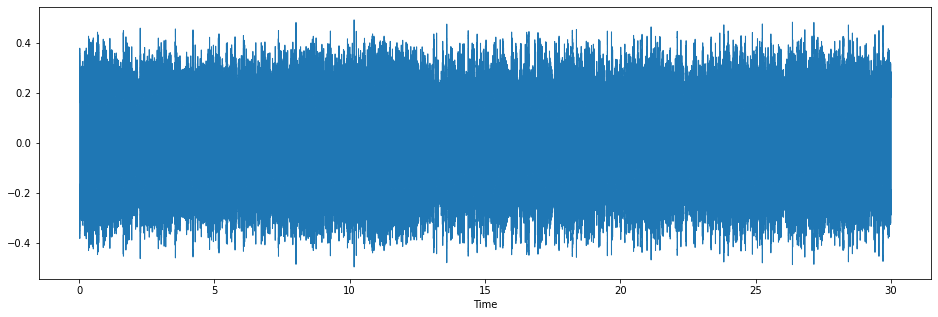

In [24]:
import librosa.display

plt.figure(figsize=(16, 5))
librosa.display.waveshow(x, sr=sr)

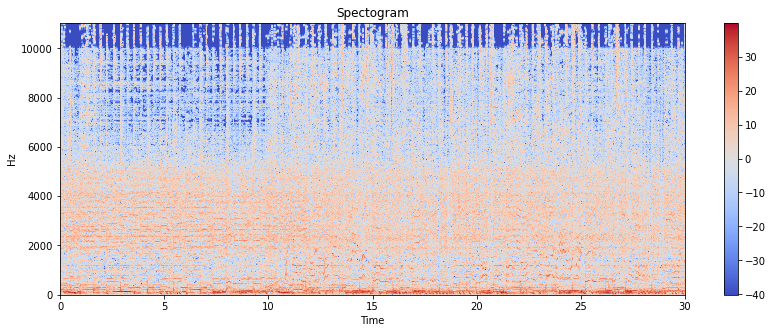

In [25]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()

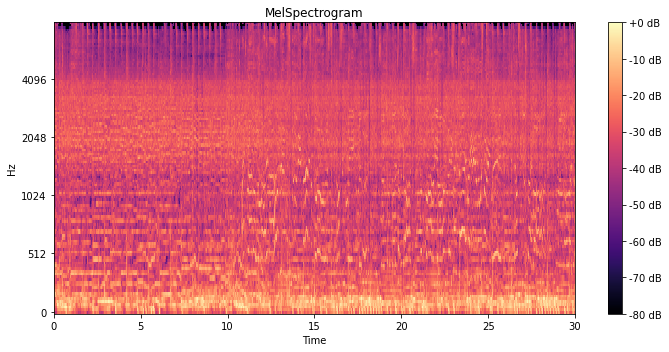

In [26]:
file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [29]:
DATASET_PATH = 'E:/Data/genres_original'
JSON_PATH = 'E:/Data/data_10.json'
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)


    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            for f in filenames:

                file_path = os.path.join(dirpath, f)
            
                if file_path != '../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav':

                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [30]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: genres_original\blues


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.10546875 -0.1083374
 -0.10559082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


E:/Data/genres_original\blues\blues.00000.wav, segment:1
E:/Data/genres_original\blues\blues.00000.wav, segment:2
E:/Data/genres_original\blues\blues.00000.wav, segment:3
E:/Data/genres_original\blues\blues.00000.wav, segment:4
E:/Data/genres_original\blues\blues.00000.wav, segment:5
E:/Data/genres_original\blues\blues.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13705444 -0.16964722 -0.19995117 ...  0.07623291  0.07675171
  0.08129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08428955  0.0763855   0.06439209 ... -0.07147217 -0.00927734
  0.06085205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10098267  0.09442139  0.05526733 ... -0.06655884 -0.13565063
 -0.07778931], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00001.wav, segment:1
E:/Data/genres_original\blues\blues.00001.wav, segment:2
E:/Data/genres_original\blues\blues.00001.wav, segment:3
E:/Data/genres_original\blues\blues.00001.wav, segment:4
E:/Data/genres_original\blues\blues.00001.wav, segment:5
E:/Data/genres_original\blues\blues.00001.wav, segment:6
E:/Data/genres_original\blues\blues.00002.wav, segment:1
E:/Data/genres_original\blues\blues.00002.wav, segment:2
E:/Data/genres_original\blues\blues.00002.wav, segment:3
E:/Data/genres_original\blues\blues.00002.wav, segment:4
E:/Data/genres_original\blues\blues.00002.wav, segment:5
E:/Data/genres_original\blues\blues.00002.wav, segment:6
E:/Data/genres_original\blues\blues.00003.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01507568 0.02926636 0.06259155 ... 0.14886475 0.18649292 0.22128296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23410034  0.23449707  0.2268982  ... -0.03213501 -0.0440979
 -0.03842163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02450562 -0.01217651 -0.00042725 ...  0.02853394  0.01495361
  0.01620483], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00003.wav, segment:2
E:/Data/genres_original\blues\blues.00003.wav, segment:3
E:/Data/genres_original\blues\blues.00003.wav, segment:4
E:/Data/genres_original\blues\blues.00003.wav, segment:5
E:/Data/genres_original\blues\blues.00003.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03494263  0.01724243  0.01293945 ... -0.01873779 -0.03579712
 -0.05276489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0664978  -0.07498169 -0.07479858 ... -0.15805054 -0.17565918
 -0.19345093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20620728 -0.21447754 -0.21774292 ...  0.16860962  0.18353271
  0.19229126], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00004.wav, segment:1
E:/Data/genres_original\blues\blues.00004.wav, segment:2
E:/Data/genres_original\blues\blues.00004.wav, segment:3
E:/Data/genres_original\blues\blues.00004.wav, segment:4
E:/Data/genres_original\blues\blues.00004.wav, segment:5
E:/Data/genres_original\blues\blues.00004.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ... -0.13632202 -0.13946533
 -0.14175415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1182251  -0.07867432 -0.03747559 ...  0.08303833  0.03665161
 -0.05581665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11572266 -0.11044312 -0.09112549 ... -0.02719116 -0.0333252
 -0.03308105], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00005.wav, segment:1
E:/Data/genres_original\blues\blues.00005.wav, segment:2
E:/Data/genres_original\blues\blues.00005.wav, segment:3
E:/Data/genres_original\blues\blues.00005.wav, segment:4
E:/Data/genres_original\blues\blues.00005.wav, segment:5
E:/Data/genres_original\blues\blues.00005.wav, segment:6
E:/Data/genres_original\blues\blues.00006.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06515503  0.06848145  0.05596924 ... -0.00094604  0.00170898
  0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00018311 -0.0022583  -0.00405884 ... -0.00250244 -0.00366211
 -0.00396729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00366211 -0.00366211 -0.00363159 ...  0.07974243  0.11230469
  0.15594482], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00006.wav, segment:2
E:/Data/genres_original\blues\blues.00006.wav, segment:3
E:/Data/genres_original\blues\blues.00006.wav, segment:4
E:/Data/genres_original\blues\blues.00006.wav, segment:5
E:/Data/genres_original\blues\blues.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01290894  0.00811768 -0.00445557 ... -0.09127808 -0.08587646
 -0.08288574], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07342529 -0.06307983 -0.05728149 ...  0.03665161  0.02890015
  0.02288818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02874756 0.03726196 0.04641724 ... 0.02862549 0.02819824 0.02709961], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00007.wav, segment:1
E:/Data/genres_original\blues\blues.00007.wav, segment:2
E:/Data/genres_original\blues\blues.00007.wav, segment:3
E:/Data/genres_original\blues\blues.00007.wav, segment:4
E:/Data/genres_original\blues\blues.00007.wav, segment:5
E:/Data/genres_original\blues\blues.00007.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01138306  0.02175903  0.0100708  ... -0.01809692 -0.0617981
 -0.10415649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07293701  0.00512695  0.04748535 ... -0.02383423 -0.02767944
 -0.02462769], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02868652 -0.02523804 -0.00405884 ...  0.01309204 -0.00289917
  0.00927734], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00008.wav, segment:1
E:/Data/genres_original\blues\blues.00008.wav, segment:2
E:/Data/genres_original\blues\blues.00008.wav, segment:3
E:/Data/genres_original\blues\blues.00008.wav, segment:4
E:/Data/genres_original\blues\blues.00008.wav, segment:5
E:/Data/genres_original\blues\blues.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04647827 0.06399536 0.04327393 ... 0.2348938  0.3913269  0.4925232 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.5291748   0.4706726   0.37457275 ... -0.0239563  -0.04330444
 -0.04171753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0262146  -0.03067017 -0.0255127  ...  0.00582886  0.02511597
  0.01361084], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00009.wav, segment:1
E:/Data/genres_original\blues\blues.00009.wav, segment:2
E:/Data/genres_original\blues\blues.00009.wav, segment:3
E:/Data/genres_original\blues\blues.00009.wav, segment:4
E:/Data/genres_original\blues\blues.00009.wav, segment:5
E:/Data/genres_original\blues\blues.00009.wav, segment:6
E:/Data/genres_original\blues\blues.00010.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13433838 -0.2687378  -0.3986206  ... -0.0284729  -0.03012085
 -0.03121948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03167725 -0.03213501 -0.03256226 ...  0.01306152  0.01287842
  0.00836182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-2.1362305e-04 -1.6479492e-02 -3.9215088e-02 ...  7.2775269e-01
  3.7484741e-01  4.1116333e-01], sr=22050 as keyword args. F

E:/Data/genres_original\blues\blues.00010.wav, segment:2
E:/Data/genres_original\blues\blues.00010.wav, segment:3
E:/Data/genres_original\blues\blues.00010.wav, segment:4
E:/Data/genres_original\blues\blues.00010.wav, segment:5
E:/Data/genres_original\blues\blues.00010.wav, segment:6
E:/Data/genres_original\blues\blues.00011.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10650635 -0.09115601 -0.08016968 ... -0.01605225 -0.01483154
 -0.02703857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00561523  0.01449585  0.00613403 ... -0.03079224 -0.02713013
 -0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03256226 -0.03787231 -0.04083252 ...  0.00476074  0.00686646
  0.0085144 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00011.wav, segment:2
E:/Data/genres_original\blues\blues.00011.wav, segment:3
E:/Data/genres_original\blues\blues.00011.wav, segment:4
E:/Data/genres_original\blues\blues.00011.wav, segment:5
E:/Data/genres_original\blues\blues.00011.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1854248   0.24972534  0.15673828 ... -0.14447021 -0.14654541
 -0.15072632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15444946 -0.15255737 -0.14385986 ...  0.08346558  0.06848145
  0.06707764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06848145  0.06549072  0.05960083 ... -0.26522827 -0.25708008
 -0.25775146], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00012.wav, segment:1
E:/Data/genres_original\blues\blues.00012.wav, segment:2
E:/Data/genres_original\blues\blues.00012.wav, segment:3
E:/Data/genres_original\blues\blues.00012.wav, segment:4
E:/Data/genres_original\blues\blues.00012.wav, segment:5
E:/Data/genres_original\blues\blues.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13864136 -0.20974731 -0.1781311  ...  0.11578369  0.11218262
  0.10943604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10650635 0.09985352 0.0932312  ... 0.23364258 0.22528076 0.21691895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.22213745  0.23623657  0.26010132 ... -0.21240234 -0.19998169
 -0.16635132], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00013.wav, segment:1
E:/Data/genres_original\blues\blues.00013.wav, segment:2
E:/Data/genres_original\blues\blues.00013.wav, segment:3
E:/Data/genres_original\blues\blues.00013.wav, segment:4
E:/Data/genres_original\blues\blues.00013.wav, segment:5
E:/Data/genres_original\blues\blues.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07705688 0.11590576 0.09234619 ... 0.01266479 0.01040649 0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 5.9204102e-03  4.0893555e-03 -2.4414062e-04 ...  4.1299438e-01
  2.9010010e-01  9.5947266e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06433105 -0.12081909 -0.00823975 ...  0.03042603  0.02670288
  0.02545166], sr=22050 as keyword args. From ver

E:/Data/genres_original\blues\blues.00014.wav, segment:1
E:/Data/genres_original\blues\blues.00014.wav, segment:2
E:/Data/genres_original\blues\blues.00014.wav, segment:3
E:/Data/genres_original\blues\blues.00014.wav, segment:4
E:/Data/genres_original\blues\blues.00014.wav, segment:5
E:/Data/genres_original\blues\blues.00014.wav, segment:6
E:/Data/genres_original\blues\blues.00015.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00146484  0.00292969 -0.00137329 ... -0.03479004 -0.0300293
 -0.02566528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02792358 -0.03659058 -0.04278564 ...  0.12200928  0.10308838
  0.08880615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06555176 0.04418945 0.03955078 ... 0.17953491 0.17111206 0.16809082], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00015.wav, segment:2
E:/Data/genres_original\blues\blues.00015.wav, segment:3
E:/Data/genres_original\blues\blues.00015.wav, segment:4
E:/Data/genres_original\blues\blues.00015.wav, segment:5
E:/Data/genres_original\blues\blues.00015.wav, segment:6
E:/Data/genres_original\blues\blues.00016.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19592285  0.07583618 -0.05200195 ... -0.13146973 -0.25888062
 -0.3517151 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.39562988 -0.37783813 -0.3381958  ...  0.05758667  0.06027222
  0.06469727], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05981445 0.04962158 0.03817749 ... 0.0145874  0.0138855  0.01132202], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00016.wav, segment:2
E:/Data/genres_original\blues\blues.00016.wav, segment:3
E:/Data/genres_original\blues\blues.00016.wav, segment:4
E:/Data/genres_original\blues\blues.00016.wav, segment:5
E:/Data/genres_original\blues\blues.00016.wav, segment:6
E:/Data/genres_original\blues\blues.00017.wav, segment:1
E:/Data/genres_original\blues\blues.00017.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14855957  0.14822388  0.15426636 ... -0.01281738 -0.01400757
 -0.02108765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02813721 -0.02371216 -0.00378418 ...  0.22491455  0.22433472
  0.20974731], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1918335   0.17330933  0.14517212 ... -0.06173706 -0.03762817
 -0.03085327], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00017.wav, segment:3
E:/Data/genres_original\blues\blues.00017.wav, segment:4
E:/Data/genres_original\blues\blues.00017.wav, segment:5
E:/Data/genres_original\blues\blues.00017.wav, segment:6
E:/Data/genres_original\blues\blues.00018.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00790405 -0.01605225 -0.02038574 ...  0.01016235  0.02197266
  0.0227356 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02145386  0.02761841  0.03097534 ... -0.06100464 -0.05944824
 -0.05975342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05862427 -0.05255127 -0.04321289 ... -0.0463562  -0.0428772
 -0.04364014], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00018.wav, segment:2
E:/Data/genres_original\blues\blues.00018.wav, segment:3
E:/Data/genres_original\blues\blues.00018.wav, segment:4
E:/Data/genres_original\blues\blues.00018.wav, segment:5
E:/Data/genres_original\blues\blues.00018.wav, segment:6
E:/Data/genres_original\blues\blues.00019.wav, segment:1
E:/Data/genres_original\blues\blues.00019.wav, segment:2
E:/Data/genres_original\blues\blues.00019.wav, segment:3
E:/Data/genres_original\blues\blues.00019.wav, segment:4
E:/Data/genres_original\blues\blues.00019.wav, segment:5
E:/Data/genres_original\blues\blues.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07525635 -0.0737915  -0.07150269 ...  0.21780396  0.1937561
  0.1524353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11245728 0.08181763 0.04400635 ... 0.03326416 0.03619385 0.03985596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04354858 0.04727173 0.0512085  ... 0.05636597 0.06231689 0.0696106 ], sr=22050 as keyword args. From version 0.10 passing these as

E:/Data/genres_original\blues\blues.00020.wav, segment:1
E:/Data/genres_original\blues\blues.00020.wav, segment:2
E:/Data/genres_original\blues\blues.00020.wav, segment:3
E:/Data/genres_original\blues\blues.00020.wav, segment:4
E:/Data/genres_original\blues\blues.00020.wav, segment:5
E:/Data/genres_original\blues\blues.00020.wav, segment:6
E:/Data/genres_original\blues\blues.00021.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04522705 0.04675293 0.04598999 ... 0.03851318 0.03643799 0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03631592 0.03463745 0.03613281 ... 0.04550171 0.12399292 0.16036987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14068604  0.05932617 -0.05209351 ...  0.06207275  0.05386353
  0.04116821], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00021.wav, segment:2
E:/Data/genres_original\blues\blues.00021.wav, segment:3
E:/Data/genres_original\blues\blues.00021.wav, segment:4
E:/Data/genres_original\blues\blues.00021.wav, segment:5
E:/Data/genres_original\blues\blues.00021.wav, segment:6
E:/Data/genres_original\blues\blues.00022.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07327271 -0.1105957  -0.10214233 ...  0.1494751   0.11270142
  0.09317017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1078186   0.13476562  0.13674927 ... -0.01730347 -0.01318359
 -0.00775146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00042725 0.01019287 0.01934814 ... 0.13568115 0.06011963 0.00769043], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00022.wav, segment:2
E:/Data/genres_original\blues\blues.00022.wav, segment:3
E:/Data/genres_original\blues\blues.00022.wav, segment:4
E:/Data/genres_original\blues\blues.00022.wav, segment:5
E:/Data/genres_original\blues\blues.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17184448 0.20730591 0.08227539 ... 0.00967407 0.01373291 0.01550293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01126099  0.00473022 -0.00198364 ...  0.04788208  0.05343628
  0.05664062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0519104   0.04272461  0.04559326 ... -0.00738525 -0.00476074
 -0.00341797], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00023.wav, segment:1
E:/Data/genres_original\blues\blues.00023.wav, segment:2
E:/Data/genres_original\blues\blues.00023.wav, segment:3
E:/Data/genres_original\blues\blues.00023.wav, segment:4
E:/Data/genres_original\blues\blues.00023.wav, segment:5
E:/Data/genres_original\blues\blues.00023.wav, segment:6
E:/Data/genres_original\blues\blues.00024.wav, segment:1
E:/Data/genres_original\blues\blues.00024.wav, segment:2
E:/Data/genres_original\blues\blues.00024.wav, segment:3
E:/Data/genres_original\blues\blues.00024.wav, segment:4
E:/Data/genres_original\blues\blues.00024.wav, segment:5
E:/Data/genres_original\blues\blues.00024.wav, segment:6
E:/Data/genres_original\blues\blues.00025.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02062988 -0.01947021 -0.01806641 ...  0.09191895  0.09979248
  0.1104126 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12008667  0.12704468  0.13153076 ... -0.03262329 -0.02844238
 -0.02502441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02072144 -0.01531982 -0.00888062 ... -0.12106323 -0.12832642
 -0.13806152], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00025.wav, segment:2
E:/Data/genres_original\blues\blues.00025.wav, segment:3
E:/Data/genres_original\blues\blues.00025.wav, segment:4
E:/Data/genres_original\blues\blues.00025.wav, segment:5
E:/Data/genres_original\blues\blues.00025.wav, segment:6
E:/Data/genres_original\blues\blues.00026.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1269226  -0.12728882 -0.13543701 ...  0.11273193  0.11004639
  0.10852051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10601807 0.10076904 0.09567261 ... 0.01998901 0.02142334 0.01992798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02139282 0.02304077 0.0234375  ... 0.04772949 0.05181885 0.05389404], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00026.wav, segment:2
E:/Data/genres_original\blues\blues.00026.wav, segment:3
E:/Data/genres_original\blues\blues.00026.wav, segment:4
E:/Data/genres_original\blues\blues.00026.wav, segment:5
E:/Data/genres_original\blues\blues.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07565308 0.07696533 0.07998657 ... 0.05249023 0.04501343 0.03515625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02267456  0.0067749  -0.00784302 ... -0.14633179 -0.15011597
 -0.13809204], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11373901 -0.0796814  -0.03485107 ... -0.14123535 -0.14035034
 -0.12930298], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00027.wav, segment:1
E:/Data/genres_original\blues\blues.00027.wav, segment:2
E:/Data/genres_original\blues\blues.00027.wav, segment:3
E:/Data/genres_original\blues\blues.00027.wav, segment:4
E:/Data/genres_original\blues\blues.00027.wav, segment:5
E:/Data/genres_original\blues\blues.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.23886108 -0.41534424 -0.3161621  ... -0.06732178 -0.06542969
 -0.06396484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05810547 -0.0531311  -0.04989624 ...  0.02835083  0.02914429
  0.03158569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03292847 0.03109741 0.02667236 ... 0.06872559 0.05838013 0.04330444], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00028.wav, segment:1
E:/Data/genres_original\blues\blues.00028.wav, segment:2
E:/Data/genres_original\blues\blues.00028.wav, segment:3
E:/Data/genres_original\blues\blues.00028.wav, segment:4
E:/Data/genres_original\blues\blues.00028.wav, segment:5
E:/Data/genres_original\blues\blues.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01669312 -0.02764893 -0.02191162 ...  0.01971436  0.02206421
  0.02130127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02099609 0.02374268 0.02542114 ... 0.03582764 0.05187988 0.05566406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06369019 0.08068848 0.08782959 ... 0.01925659 0.01803589 0.03262329], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00029.wav, segment:1
E:/Data/genres_original\blues\blues.00029.wav, segment:2
E:/Data/genres_original\blues\blues.00029.wav, segment:3
E:/Data/genres_original\blues\blues.00029.wav, segment:4
E:/Data/genres_original\blues\blues.00029.wav, segment:5
E:/Data/genres_original\blues\blues.00029.wav, segment:6
E:/Data/genres_original\blues\blues.00030.wav, segment:1
E:/Data/genres_original\blues\blues.00030.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05667114  0.04049683  0.02893066 ... -0.23788452 -0.28305054
 -0.2614746 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2411499  -0.2562256  -0.21426392 ...  0.03100586  0.05255127
  0.05047607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05639648  0.08163452  0.08203125 ... -0.20080566 -0.20526123
 -0.22564697], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00030.wav, segment:3
E:/Data/genres_original\blues\blues.00030.wav, segment:4
E:/Data/genres_original\blues\blues.00030.wav, segment:5
E:/Data/genres_original\blues\blues.00030.wav, segment:6
E:/Data/genres_original\blues\blues.00031.wav, segment:1
E:/Data/genres_original\blues\blues.00031.wav, segment:2
E:/Data/genres_original\blues\blues.00031.wav, segment:3
E:/Data/genres_original\blues\blues.00031.wav, segment:4
E:/Data/genres_original\blues\blues.00031.wav, segment:5
E:/Data/genres_original\blues\blues.00031.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04916382 0.05947876 0.05026245 ... 0.12417603 0.13128662 0.13006592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13305664  0.13504028  0.13204956 ... -0.05822754 -0.04067993
 -0.01419067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0083313   0.03829956  0.06268311 ... -0.28353882 -0.2791443
 -0.26428223], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00032.wav, segment:1
E:/Data/genres_original\blues\blues.00032.wav, segment:2
E:/Data/genres_original\blues\blues.00032.wav, segment:3
E:/Data/genres_original\blues\blues.00032.wav, segment:4
E:/Data/genres_original\blues\blues.00032.wav, segment:5
E:/Data/genres_original\blues\blues.00032.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00836182 -0.01040649 -0.01641846 ... -0.16809082 -0.162323
 -0.15975952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16964722 -0.16500854 -0.15234375 ...  0.21289062  0.2060852
  0.18609619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.212677   0.19619751 0.22827148 ... 0.04605103 0.0333252  0.02975464], sr=22050 as keyword args. From version 0.10 passing the

E:/Data/genres_original\blues\blues.00033.wav, segment:1
E:/Data/genres_original\blues\blues.00033.wav, segment:2
E:/Data/genres_original\blues\blues.00033.wav, segment:3
E:/Data/genres_original\blues\blues.00033.wav, segment:4
E:/Data/genres_original\blues\blues.00033.wav, segment:5
E:/Data/genres_original\blues\blues.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01361084  0.02810669  0.03515625 ... -0.10678101 -0.11340332
 -0.13491821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14489746 -0.14572144 -0.16091919 ...  0.19390869  0.19433594
  0.19503784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20062256  0.19299316  0.18707275 ... -0.02099609 -0.03457642
 -0.04580688], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00034.wav, segment:1
E:/Data/genres_original\blues\blues.00034.wav, segment:2
E:/Data/genres_original\blues\blues.00034.wav, segment:3
E:/Data/genres_original\blues\blues.00034.wav, segment:4
E:/Data/genres_original\blues\blues.00034.wav, segment:5
E:/Data/genres_original\blues\blues.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03277588 -0.04876709 -0.04104614 ...  0.24972534  0.25030518
  0.2548828 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20425415  0.20907593  0.24899292 ... -0.03338623 -0.03515625
 -0.03085327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03198242 -0.0378418  -0.03631592 ... -0.2324524  -0.20941162
 -0.22027588], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00035.wav, segment:1
E:/Data/genres_original\blues\blues.00035.wav, segment:2
E:/Data/genres_original\blues\blues.00035.wav, segment:3
E:/Data/genres_original\blues\blues.00035.wav, segment:4
E:/Data/genres_original\blues\blues.00035.wav, segment:5
E:/Data/genres_original\blues\blues.00035.wav, segment:6
E:/Data/genres_original\blues\blues.00036.wav, segment:1
E:/Data/genres_original\blues\blues.00036.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1076355  -0.12023926 -0.12808228 ...  0.12145996  0.09976196
  0.0776062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06143188  0.0383606   0.00845337 ... -0.28604126 -0.3314209
 -0.3486023 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.35736084 -0.40026855 -0.4381714  ... -0.26693726 -0.28588867
 -0.21194458], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00036.wav, segment:3
E:/Data/genres_original\blues\blues.00036.wav, segment:4
E:/Data/genres_original\blues\blues.00036.wav, segment:5
E:/Data/genres_original\blues\blues.00036.wav, segment:6
E:/Data/genres_original\blues\blues.00037.wav, segment:1
E:/Data/genres_original\blues\blues.00037.wav, segment:2
E:/Data/genres_original\blues\blues.00037.wav, segment:3
E:/Data/genres_original\blues\blues.00037.wav, segment:4
E:/Data/genres_original\blues\blues.00037.wav, segment:5
E:/Data/genres_original\blues\blues.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01296997  0.03488159  0.04623413 ... -0.03518677 -0.07623291
 -0.08441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11550903 -0.15216064 -0.16113281 ... -0.00592041 -0.0072937
 -0.00769043], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00842285 -0.01010132 -0.01123047 ...  0.01809692  0.01992798
  0.01727295], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00038.wav, segment:1
E:/Data/genres_original\blues\blues.00038.wav, segment:2
E:/Data/genres_original\blues\blues.00038.wav, segment:3
E:/Data/genres_original\blues\blues.00038.wav, segment:4
E:/Data/genres_original\blues\blues.00038.wav, segment:5
E:/Data/genres_original\blues\blues.00038.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13195801 -0.15338135 -0.19229126 ... -0.1953125  -0.18869019
 -0.16644287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15768433 -0.15097046 -0.15478516 ... -0.05822754 -0.06442261
 -0.06350708], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05947876 -0.0496521  -0.05169678 ... -0.09802246 -0.10702515
 -0.11148071], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00039.wav, segment:1
E:/Data/genres_original\blues\blues.00039.wav, segment:2
E:/Data/genres_original\blues\blues.00039.wav, segment:3
E:/Data/genres_original\blues\blues.00039.wav, segment:4
E:/Data/genres_original\blues\blues.00039.wav, segment:5
E:/Data/genres_original\blues\blues.00039.wav, segment:6
E:/Data/genres_original\blues\blues.00040.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05062866  0.01651001  0.02609253 ... -0.06329346 -0.01751709
  0.02267456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08407593 0.13494873 0.12216187 ... 0.00228882 0.09143066 0.10327148], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01638794 -0.19735718 -0.31817627 ... -0.13031006 -0.0909729
 -0.05230713], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00040.wav, segment:2
E:/Data/genres_original\blues\blues.00040.wav, segment:3
E:/Data/genres_original\blues\blues.00040.wav, segment:4
E:/Data/genres_original\blues\blues.00040.wav, segment:5
E:/Data/genres_original\blues\blues.00040.wav, segment:6
E:/Data/genres_original\blues\blues.00041.wav, segment:1
E:/Data/genres_original\blues\blues.00041.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05853271 0.08792114 0.11651611 ... 0.012146   0.01528931 0.01077271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01171875  0.01174927  0.00653076 ...  0.01589966 -0.06033325
 -0.16290283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14205933 -0.04498291  0.02981567 ... -0.09024048 -0.01010132
  0.06674194], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00041.wav, segment:3
E:/Data/genres_original\blues\blues.00041.wav, segment:4
E:/Data/genres_original\blues\blues.00041.wav, segment:5
E:/Data/genres_original\blues\blues.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03710938 0.07446289 0.07992554 ... 0.08084106 0.09561157 0.10949707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15438843 0.19482422 0.16867065 ... 0.18411255 0.2557373  0.1716919 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09155273 0.08575439 0.02920532 ... 0.04821777 0.09085083 0.18170166], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\blues\blues.00042.wav, segment:1
E:/Data/genres_original\blues\blues.00042.wav, segment:2
E:/Data/genres_original\blues\blues.00042.wav, segment:3
E:/Data/genres_original\blues\blues.00042.wav, segment:4
E:/Data/genres_original\blues\blues.00042.wav, segment:5
E:/Data/genres_original\blues\blues.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1104126  -0.16241455 -0.11431885 ... -0.09838867 -0.10757446
 -0.1156311 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10723877 -0.09555054 -0.09136963 ...  0.12179565  0.12298584
  0.11395264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11935425  0.11746216  0.09817505 ... -0.13821411 -0.13293457
 -0.12023926], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00043.wav, segment:1
E:/Data/genres_original\blues\blues.00043.wav, segment:2
E:/Data/genres_original\blues\blues.00043.wav, segment:3
E:/Data/genres_original\blues\blues.00043.wav, segment:4
E:/Data/genres_original\blues\blues.00043.wav, segment:5
E:/Data/genres_original\blues\blues.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11239624 0.14764404 0.11526489 ... 0.2564392  0.2668152  0.2199707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15106201  0.13616943  0.20022583 ... -0.11477661 -0.12844849
 -0.16781616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17849731 -0.19042969 -0.23043823 ...  0.10900879  0.18029785
  0.23690796], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00044.wav, segment:1
E:/Data/genres_original\blues\blues.00044.wav, segment:2
E:/Data/genres_original\blues\blues.00044.wav, segment:3
E:/Data/genres_original\blues\blues.00044.wav, segment:4
E:/Data/genres_original\blues\blues.00044.wav, segment:5
E:/Data/genres_original\blues\blues.00044.wav, segment:6
E:/Data/genres_original\blues\blues.00045.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01901245 -0.04046631 -0.05606079 ...  0.02874756  0.01620483
  0.04736328], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07754517 0.05459595 0.00665283 ... 0.1715393  0.1569519  0.18508911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18203735  0.16140747  0.15814209 ... -0.21542358 -0.21548462
 -0.23794556], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00045.wav, segment:2
E:/Data/genres_original\blues\blues.00045.wav, segment:3
E:/Data/genres_original\blues\blues.00045.wav, segment:4
E:/Data/genres_original\blues\blues.00045.wav, segment:5
E:/Data/genres_original\blues\blues.00045.wav, segment:6
E:/Data/genres_original\blues\blues.00046.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01647949  0.03048706  0.01889038 ... -0.03851318 -0.04098511
 -0.02832031], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02227783 -0.02557373 -0.0256958  ... -0.04272461 -0.02563477
 -0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02334595 -0.09082031 -0.14068604 ...  0.08630371  0.08618164
  0.0796814 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00046.wav, segment:2
E:/Data/genres_original\blues\blues.00046.wav, segment:3
E:/Data/genres_original\blues\blues.00046.wav, segment:4
E:/Data/genres_original\blues\blues.00046.wav, segment:5
E:/Data/genres_original\blues\blues.00046.wav, segment:6
E:/Data/genres_original\blues\blues.00047.wav, segment:1
E:/Data/genres_original\blues\blues.00047.wav, segment:2
E:/Data/genres_original\blues\blues.00047.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16610718 -0.15533447 -0.17355347 ...  0.037323    0.01705933
  0.03884888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05041504  0.00634766 -0.02938843 ... -0.07528687 -0.09005737
 -0.04568481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07467651 -0.11172485 -0.03240967 ... -0.1340332  -0.10971069
 -0.06622314], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00047.wav, segment:4
E:/Data/genres_original\blues\blues.00047.wav, segment:5
E:/Data/genres_original\blues\blues.00047.wav, segment:6
E:/Data/genres_original\blues\blues.00048.wav, segment:1
E:/Data/genres_original\blues\blues.00048.wav, segment:2
E:/Data/genres_original\blues\blues.00048.wav, segment:3
E:/Data/genres_original\blues\blues.00048.wav, segment:4
E:/Data/genres_original\blues\blues.00048.wav, segment:5
E:/Data/genres_original\blues\blues.00048.wav, segment:6
E:/Data/genres_original\blues\blues.00049.wav, segment:1
E:/Data/genres_original\blues\blues.00049.wav, segment:2
E:/Data/genres_original\blues\blues.00049.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06292725  0.04437256  0.06152344 ... -0.01797485 -0.00839233
  0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02767944  0.09960938  0.17041016 ... -0.00314331 -0.02423096
 -0.03317261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04974365 -0.08596802 -0.08615112 ... -0.02481079 -0.02011108
 -0.02362061], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00049.wav, segment:4
E:/Data/genres_original\blues\blues.00049.wav, segment:5
E:/Data/genres_original\blues\blues.00049.wav, segment:6
E:/Data/genres_original\blues\blues.00050.wav, segment:1
E:/Data/genres_original\blues\blues.00050.wav, segment:2
E:/Data/genres_original\blues\blues.00050.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00958252 -0.04504395 -0.04629517 ...  0.01712036  0.03118896
  0.04495239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0508728   0.04849243  0.0395813  ...  0.0027771  -0.00125122
 -0.00149536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06652832  0.09335327  0.04510498 ... -0.12197876 -0.02859497
 -0.0133667 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00050.wav, segment:4
E:/Data/genres_original\blues\blues.00050.wav, segment:5
E:/Data/genres_original\blues\blues.00050.wav, segment:6
E:/Data/genres_original\blues\blues.00051.wav, segment:1
E:/Data/genres_original\blues\blues.00051.wav, segment:2
E:/Data/genres_original\blues\blues.00051.wav, segment:3
E:/Data/genres_original\blues\blues.00051.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21224976 -0.26452637 -0.30252075 ... -0.3173828  -0.34869385
 -0.32702637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2892151  -0.27645874 -0.27572632 ...  0.1005249   0.07778931
  0.07058716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21359253 -0.35723877 -0.31430054 ... -0.13980103 -0.14297485
 -0.13391113], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00051.wav, segment:5
E:/Data/genres_original\blues\blues.00051.wav, segment:6
E:/Data/genres_original\blues\blues.00052.wav, segment:1
E:/Data/genres_original\blues\blues.00052.wav, segment:2
E:/Data/genres_original\blues\blues.00052.wav, segment:3
E:/Data/genres_original\blues\blues.00052.wav, segment:4
E:/Data/genres_original\blues\blues.00052.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04202271  0.10812378  0.21557617 ... -0.07632446 -0.08181763
 -0.12353516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01705933 0.03436279 0.03353882 ... 0.05279541 0.03353882 0.02722168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03625488 0.05154419 0.06109619 ... 0.04910278 0.02593994 0.01235962], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00052.wav, segment:6
E:/Data/genres_original\blues\blues.00053.wav, segment:1
E:/Data/genres_original\blues\blues.00053.wav, segment:2
E:/Data/genres_original\blues\blues.00053.wav, segment:3
E:/Data/genres_original\blues\blues.00053.wav, segment:4
E:/Data/genres_original\blues\blues.00053.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03381348 -0.03475952 -0.03518677 ...  0.00738525  0.02954102
  0.05264282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19836426 -0.38546753 -0.2819519  ... -0.00933838 -0.0239563
  0.03567505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05157471 0.01928711 0.01452637 ... 0.1940918  0.13757324 0.05758667], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14169312 -0.22286987 -0.19650269 ...  0.19030762  0.20941162
  0.22409058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.22094727 0.21350098 0.1819458  ... 0.5265198  0.5762329  0.5364685 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.40402222 0.21676636 0.04837036 ... 0.06384277 0.0770874  0.08300781], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00054.wav, segment:1
E:/Data/genres_original\blues\blues.00054.wav, segment:2
E:/Data/genres_original\blues\blues.00054.wav, segment:3
E:/Data/genres_original\blues\blues.00054.wav, segment:4
E:/Data/genres_original\blues\blues.00054.wav, segment:5
E:/Data/genres_original\blues\blues.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00479126  0.05578613  0.12127686 ... -0.28585815 -0.28567505
 -0.28884888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.29031372 -0.27035522 -0.24014282 ...  0.09066772 -0.00119019
 -0.03036499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0090332  0.03689575 0.02386475 ... 0.22250366 0.1607666  0.13040161], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00055.wav, segment:1
E:/Data/genres_original\blues\blues.00055.wav, segment:2
E:/Data/genres_original\blues\blues.00055.wav, segment:3
E:/Data/genres_original\blues\blues.00055.wav, segment:4
E:/Data/genres_original\blues\blues.00055.wav, segment:5
E:/Data/genres_original\blues\blues.00055.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1638794  -0.28948975 -0.26593018 ...  0.08648682  0.10662842
  0.11535645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09362793  0.09716797  0.10211182 ... -0.11694336 -0.02999878
 -0.04766846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03689575  0.03598022  0.10101318 ...  0.14614868  0.11749268
  0.06170654], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00056.wav, segment:1
E:/Data/genres_original\blues\blues.00056.wav, segment:2
E:/Data/genres_original\blues\blues.00056.wav, segment:3
E:/Data/genres_original\blues\blues.00056.wav, segment:4
E:/Data/genres_original\blues\blues.00056.wav, segment:5
E:/Data/genres_original\blues\blues.00056.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00799561 0.0022583  0.01434326 ... 0.32266235 0.48791504 0.4777832 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.22387695  0.10018921  0.03353882 ... -0.1960144  -0.19366455
 -0.21282959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24099731 -0.25097656 -0.22531128 ... -0.02084351 -0.0112915
 -0.0078125 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00057.wav, segment:1
E:/Data/genres_original\blues\blues.00057.wav, segment:2
E:/Data/genres_original\blues\blues.00057.wav, segment:3
E:/Data/genres_original\blues\blues.00057.wav, segment:4
E:/Data/genres_original\blues\blues.00057.wav, segment:5
E:/Data/genres_original\blues\blues.00057.wav, segment:6
E:/Data/genres_original\blues\blues.00058.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05645752  0.02233887  0.00631714 ... -0.12393188 -0.10873413
 -0.14981079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24404907 -0.3267517  -0.35150146 ...  0.1491394   0.15093994
  0.15118408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1850586   0.2109375   0.23483276 ... -0.09469604 -0.07580566
 -0.02697754], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00058.wav, segment:2
E:/Data/genres_original\blues\blues.00058.wav, segment:3
E:/Data/genres_original\blues\blues.00058.wav, segment:4
E:/Data/genres_original\blues\blues.00058.wav, segment:5
E:/Data/genres_original\blues\blues.00058.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00588989 0.00765991 0.0012207  ... 0.07507324 0.07302856 0.0637207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05911255  0.06521606  0.05639648 ... -0.07836914 -0.12454224
  0.04156494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.26687622 0.33355713 0.15142822 ... 0.32888794 0.21334839 0.02374268], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00059.wav, segment:1
E:/Data/genres_original\blues\blues.00059.wav, segment:2
E:/Data/genres_original\blues\blues.00059.wav, segment:3
E:/Data/genres_original\blues\blues.00059.wav, segment:4
E:/Data/genres_original\blues\blues.00059.wav, segment:5
E:/Data/genres_original\blues\blues.00059.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16952515  0.29315186  0.1512146  ... -0.13110352 -0.12680054
 -0.11941528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11090088 -0.10876465 -0.11373901 ... -0.16906738 -0.20123291
 -0.3388977 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.46362305 -0.4612732  -0.41241455 ... -0.04699707 -0.04467773
 -0.0642395 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00060.wav, segment:1
E:/Data/genres_original\blues\blues.00060.wav, segment:2
E:/Data/genres_original\blues\blues.00060.wav, segment:3
E:/Data/genres_original\blues\blues.00060.wav, segment:4
E:/Data/genres_original\blues\blues.00060.wav, segment:5
E:/Data/genres_original\blues\blues.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16659546 -0.23223877 -0.2239685  ...  0.00076294  0.00982666
  0.02246094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03079224  0.03051758  0.02563477 ... -0.15423584 -0.02990723
 -0.00860596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1288147  -0.16067505 -0.00457764 ... -0.04519653  0.00375366
  0.02832031], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00061.wav, segment:1
E:/Data/genres_original\blues\blues.00061.wav, segment:2
E:/Data/genres_original\blues\blues.00061.wav, segment:3
E:/Data/genres_original\blues\blues.00061.wav, segment:4
E:/Data/genres_original\blues\blues.00061.wav, segment:5
E:/Data/genres_original\blues\blues.00061.wav, segment:6
E:/Data/genres_original\blues\blues.00062.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03747559  0.1456604   0.08441162 ...  0.03643799  0.04406738
  0.07321167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08248901 0.06658936 0.05178833 ... 0.06292725 0.04147339 0.02209473], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01397705 0.02850342 0.05700684 ... 0.05395508 0.05630493 0.07116699], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00062.wav, segment:2
E:/Data/genres_original\blues\blues.00062.wav, segment:3
E:/Data/genres_original\blues\blues.00062.wav, segment:4
E:/Data/genres_original\blues\blues.00062.wav, segment:5
E:/Data/genres_original\blues\blues.00062.wav, segment:6
E:/Data/genres_original\blues\blues.00063.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0328064  -0.00311279 -0.12850952 ... -0.05343628 -0.06149292
 -0.037323  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00137329  0.01324463  0.00161743 ...  0.03198242  0.04516602
  0.0223999 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0017395   0.01776123  0.03359985 ... -0.0770874  -0.07998657
 -0.09576416], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00063.wav, segment:2
E:/Data/genres_original\blues\blues.00063.wav, segment:3
E:/Data/genres_original\blues\blues.00063.wav, segment:4
E:/Data/genres_original\blues\blues.00063.wav, segment:5
E:/Data/genres_original\blues\blues.00063.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02407837 -0.05328369 -0.06829834 ...  0.20245361  0.2001648
  0.15667725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15927124  0.17526245  0.16925049 ... -0.14834595 -0.17419434
 -0.1574707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11135864 -0.07012939 -0.02011108 ...  0.11660767  0.1222229
  0.01104736], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\blues\blues.00064.wav, segment:1
E:/Data/genres_original\blues\blues.00064.wav, segment:2
E:/Data/genres_original\blues\blues.00064.wav, segment:3
E:/Data/genres_original\blues\blues.00064.wav, segment:4
E:/Data/genres_original\blues\blues.00064.wav, segment:5
E:/Data/genres_original\blues\blues.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06378174 0.08837891 0.04940796 ... 0.04489136 0.05029297 0.05227661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00445557 -0.04092407 -0.06243896 ...  0.01052856 -0.04324341
 -0.06005859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11721802 -0.16766357 -0.08255005 ... -0.12030029 -0.14556885
 -0.09976196], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00065.wav, segment:1
E:/Data/genres_original\blues\blues.00065.wav, segment:2
E:/Data/genres_original\blues\blues.00065.wav, segment:3
E:/Data/genres_original\blues\blues.00065.wav, segment:4
E:/Data/genres_original\blues\blues.00065.wav, segment:5
E:/Data/genres_original\blues\blues.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07894897  0.13638306  0.13336182 ...  0.05151367  0.04138184
 -0.00979614], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00921631  0.00387573 -0.08297729 ...  0.1277771   0.13552856
  0.13916016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08807373  0.01470947 -0.00057983 ... -0.18777466 -0.16784668
 -0.14099121], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00066.wav, segment:1
E:/Data/genres_original\blues\blues.00066.wav, segment:2
E:/Data/genres_original\blues\blues.00066.wav, segment:3
E:/Data/genres_original\blues\blues.00066.wav, segment:4
E:/Data/genres_original\blues\blues.00066.wav, segment:5
E:/Data/genres_original\blues\blues.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04641724 -0.12106323 -0.13388062 ...  0.16342163  0.13735962
  0.15527344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14608765 0.10702515 0.10620117 ... 0.14831543 0.16809082 0.1454773 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08181763  0.02798462 -0.01138306 ...  0.02459717  0.03048706
 -0.01956177], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00067.wav, segment:1
E:/Data/genres_original\blues\blues.00067.wav, segment:2
E:/Data/genres_original\blues\blues.00067.wav, segment:3
E:/Data/genres_original\blues\blues.00067.wav, segment:4
E:/Data/genres_original\blues\blues.00067.wav, segment:5
E:/Data/genres_original\blues\blues.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02215576 -0.02536011 -0.0512085  ... -0.00054932 -0.00628662
 -0.02197266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03466797  0.03689575  0.05187988 ...  0.06591797  0.11727905
  0.15582275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07830811 -0.05010986 -0.05987549 ... -0.02432251 -0.025177
 -0.06298828], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\blues\blues.00068.wav, segment:1
E:/Data/genres_original\blues\blues.00068.wav, segment:2
E:/Data/genres_original\blues\blues.00068.wav, segment:3
E:/Data/genres_original\blues\blues.00068.wav, segment:4
E:/Data/genres_original\blues\blues.00068.wav, segment:5
E:/Data/genres_original\blues\blues.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06060791  0.08435059  0.06304932 ... -0.15371704 -0.1322937
 -0.10443115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1244812  -0.15466309 -0.1413269  ...  0.05856323  0.08383179
  0.01629639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11721802 -0.29748535 -0.35455322 ... -0.08666992 -0.05636597
 -0.05819702], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00069.wav, segment:1
E:/Data/genres_original\blues\blues.00069.wav, segment:2
E:/Data/genres_original\blues\blues.00069.wav, segment:3
E:/Data/genres_original\blues\blues.00069.wav, segment:4
E:/Data/genres_original\blues\blues.00069.wav, segment:5
E:/Data/genres_original\blues\blues.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03820801 -0.06240845 -0.06326294 ... -0.05328369 -0.06207275
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06811523 -0.06854248 -0.07876587 ... -0.26663208 -0.26715088
 -0.28308105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-2.9086304e-01 -2.6025391e-01 -2.0086670e-01 ...  1.8676758e-02
  2.4414062e-04 -1.7303467e-02], sr=22050 as keyword args. F

E:/Data/genres_original\blues\blues.00070.wav, segment:1
E:/Data/genres_original\blues\blues.00070.wav, segment:2
E:/Data/genres_original\blues\blues.00070.wav, segment:3
E:/Data/genres_original\blues\blues.00070.wav, segment:4
E:/Data/genres_original\blues\blues.00070.wav, segment:5
E:/Data/genres_original\blues\blues.00070.wav, segment:6
E:/Data/genres_original\blues\blues.00071.wav, segment:1
E:/Data/genres_original\blues\blues.00071.wav, segment:2
E:/Data/genres_original\blues\blues.00071.wav, segment:3
E:/Data/genres_original\blues\blues.00071.wav, segment:4
E:/Data/genres_original\blues\blues.00071.wav, segment:5
E:/Data/genres_original\blues\blues.00071.wav, segment:6
E:/Data/genres_original\blues\blues.00072.wav, segment:1
E:/Data/genres_original\blues\blues.00072.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06106567 0.12039185 0.11611938 ... 0.16726685 0.15231323 0.17810059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16674805 0.13220215 0.13153076 ... 0.12182617 0.07455444 0.06295776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06564331 0.08877563 0.1053772  ... 0.20913696 0.20611572 0.23965454], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\blues\blues.00072.wav, segment:3
E:/Data/genres_original\blues\blues.00072.wav, segment:4
E:/Data/genres_original\blues\blues.00072.wav, segment:5
E:/Data/genres_original\blues\blues.00072.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09124756 -0.10745239 -0.12088013 ... -0.24163818 -0.25097656
 -0.22143555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.25704956 -0.24014282 -0.19580078 ...  0.10354614  0.12719727
  0.07736206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.052948    0.06604004  0.10534668 ... -0.06698608 -0.08612061
 -0.09698486], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00073.wav, segment:1
E:/Data/genres_original\blues\blues.00073.wav, segment:2
E:/Data/genres_original\blues\blues.00073.wav, segment:3
E:/Data/genres_original\blues\blues.00073.wav, segment:4
E:/Data/genres_original\blues\blues.00073.wav, segment:5
E:/Data/genres_original\blues\blues.00073.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.131073   -0.11239624 -0.02319336 ...  0.13668823  0.19897461
  0.25732422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.30923462 0.39245605 0.36468506 ... 0.04498291 0.12207031 0.13952637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10134888  0.0753479   0.13430786 ... -0.00311279 -0.0149231
 -0.06616211], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00074.wav, segment:1
E:/Data/genres_original\blues\blues.00074.wav, segment:2
E:/Data/genres_original\blues\blues.00074.wav, segment:3
E:/Data/genres_original\blues\blues.00074.wav, segment:4
E:/Data/genres_original\blues\blues.00074.wav, segment:5
E:/Data/genres_original\blues\blues.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5245056  -0.81640625 -0.5826111  ... -0.6566162  -0.6439209
 -0.5354004 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.36462402 -0.18536377 -0.08483887 ... -0.11022949 -0.14657593
 -0.18292236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1559143  -0.08883667 -0.08746338 ...  0.39349365  0.32705688
  0.27752686], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00075.wav, segment:1
E:/Data/genres_original\blues\blues.00075.wav, segment:2
E:/Data/genres_original\blues\blues.00075.wav, segment:3
E:/Data/genres_original\blues\blues.00075.wav, segment:4
E:/Data/genres_original\blues\blues.00075.wav, segment:5
E:/Data/genres_original\blues\blues.00075.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24917603 -0.32904053 -0.15524292 ...  0.3796997   0.34680176
  0.23019409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2472229  0.2012024  0.04577637 ... 0.07485962 0.23580933 0.27035522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.56988525 0.7033081  0.4179077  ... 0.33114624 0.34091187 0.2355957 ], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00076.wav, segment:1
E:/Data/genres_original\blues\blues.00076.wav, segment:2
E:/Data/genres_original\blues\blues.00076.wav, segment:3
E:/Data/genres_original\blues\blues.00076.wav, segment:4
E:/Data/genres_original\blues\blues.00076.wav, segment:5
E:/Data/genres_original\blues\blues.00076.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07684326 -0.13812256 -0.118927   ...  0.2680359   0.45526123
  0.51553345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.58114624 0.588501   0.46328735 ... 0.07800293 0.0697937  0.0609436 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05664062  0.04641724  0.02737427 ... -0.2514038  -0.25497437
 -0.2453003 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00077.wav, segment:1
E:/Data/genres_original\blues\blues.00077.wav, segment:2
E:/Data/genres_original\blues\blues.00077.wav, segment:3
E:/Data/genres_original\blues\blues.00077.wav, segment:4
E:/Data/genres_original\blues\blues.00077.wav, segment:5
E:/Data/genres_original\blues\blues.00077.wav, segment:6
E:/Data/genres_original\blues\blues.00078.wav, segment:1
E:/Data/genres_original\blues\blues.00078.wav, segment:2
E:/Data/genres_original\blues\blues.00078.wav, segment:3
E:/Data/genres_original\blues\blues.00078.wav, segment:4
E:/Data/genres_original\blues\blues.00078.wav, segment:5
E:/Data/genres_original\blues\blues.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2062378  -0.3517456  -0.40576172 ... -0.03863525  0.11700439
  0.17660522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10562134 -0.01428223 -0.0317688  ...  0.50323486  0.36871338
  0.00747681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1491394  -0.05654907  0.03414917 ...  0.09106445 -0.00259399
  0.00906372], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00079.wav, segment:1
E:/Data/genres_original\blues\blues.00079.wav, segment:2
E:/Data/genres_original\blues\blues.00079.wav, segment:3
E:/Data/genres_original\blues\blues.00079.wav, segment:4
E:/Data/genres_original\blues\blues.00079.wav, segment:5
E:/Data/genres_original\blues\blues.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23739624  0.36120605  0.30667114 ... -0.15682983 -0.10586548
 -0.03424072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05157471  0.13720703  0.18655396 ... -0.01998901 -0.05108643
 -0.08966064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11618042 -0.13250732 -0.13339233 ... -0.0177002  -0.02145386
 -0.03271484], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00080.wav, segment:1
E:/Data/genres_original\blues\blues.00080.wav, segment:2
E:/Data/genres_original\blues\blues.00080.wav, segment:3
E:/Data/genres_original\blues\blues.00080.wav, segment:4
E:/Data/genres_original\blues\blues.00080.wav, segment:5
E:/Data/genres_original\blues\blues.00080.wav, segment:6
E:/Data/genres_original\blues\blues.00081.wav, segment:1
E:/Data/genres_original\blues\blues.00081.wav, segment:2
E:/Data/genres_original\blues\blues.00081.wav, segment:3
E:/Data/genres_original\blues\blues.00081.wav, segment:4
E:/Data/genres_original\blues\blues.00081.wav, segment:5
E:/Data/genres_original\blues\blues.00081.wav, segment:6
E:/Data/genres_original\blues\blues.00082.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00601196 -0.10443115 -0.3067932  ...  0.6604004   0.6013794
  0.47842407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 4.7937012e-01  4.2684937e-01  3.3459473e-01 ... -6.5185547e-02
  2.7465820e-04 -3.8269043e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02319336 -0.04202271 -0.24633789 ...  0.04428101 -0.09225464
 -0.1524353 ], sr=22050 as keyword args. Fr

E:/Data/genres_original\blues\blues.00082.wav, segment:2
E:/Data/genres_original\blues\blues.00082.wav, segment:3
E:/Data/genres_original\blues\blues.00082.wav, segment:4
E:/Data/genres_original\blues\blues.00082.wav, segment:5
E:/Data/genres_original\blues\blues.00082.wav, segment:6
E:/Data/genres_original\blues\blues.00083.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.4656067   0.39736938  0.25946045 ... -0.0916748  -0.04983521
  0.1711731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.36901855  0.36779785  0.23190308 ... -0.22634888 -0.21542358
 -0.17111206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10702515 -0.03210449  0.01998901 ...  0.18087769  0.13330078
  0.07342529], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00083.wav, segment:2
E:/Data/genres_original\blues\blues.00083.wav, segment:3
E:/Data/genres_original\blues\blues.00083.wav, segment:4
E:/Data/genres_original\blues\blues.00083.wav, segment:5
E:/Data/genres_original\blues\blues.00083.wav, segment:6
E:/Data/genres_original\blues\blues.00084.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11074829 -0.2915039  -0.44351196 ... -0.02981567 -0.15515137
 -0.14056396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0652771   0.06356812  0.10388184 ...  0.18463135  0.23083496
  0.2432251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17279053  0.17556763  0.22225952 ... -0.2987671  -0.26919556
 -0.20501709], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00084.wav, segment:2
E:/Data/genres_original\blues\blues.00084.wav, segment:3
E:/Data/genres_original\blues\blues.00084.wav, segment:4
E:/Data/genres_original\blues\blues.00084.wav, segment:5
E:/Data/genres_original\blues\blues.00084.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24630737  0.27560425  0.26141357 ... -0.02835083 -0.01034546
  0.01898193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06503296  0.07254028  0.05737305 ... -0.1699524   0.04788208
  0.14120483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16680908 0.23135376 0.37405396 ... 0.01937866 0.03863525 0.03668213], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\blues\blues.00085.wav, segment:1
E:/Data/genres_original\blues\blues.00085.wav, segment:2
E:/Data/genres_original\blues\blues.00085.wav, segment:3
E:/Data/genres_original\blues\blues.00085.wav, segment:4
E:/Data/genres_original\blues\blues.00085.wav, segment:5
E:/Data/genres_original\blues\blues.00085.wav, segment:6
E:/Data/genres_original\blues\blues.00086.wav, segment:1
E:/Data/genres_original\blues\blues.00086.wav, segment:2
E:/Data/genres_original\blues\blues.00086.wav, segment:3
E:/Data/genres_original\blues\blues.00086.wav, segment:4
E:/Data/genres_original\blues\blues.00086.wav, segment:5
E:/Data/genres_original\blues\blues.00086.wav, segment:6
E:/Data/genres_original\blues\blues.00087.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01138306 0.04946899 0.04223633 ... 0.15429688 0.15310669 0.1560669 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16033936 0.16522217 0.16772461 ... 0.14453125 0.12286377 0.05560303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03884888 -0.11956787 -0.14834595 ... -0.02362061 -0.02737427
 -0.02954102], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00087.wav, segment:2
E:/Data/genres_original\blues\blues.00087.wav, segment:3
E:/Data/genres_original\blues\blues.00087.wav, segment:4
E:/Data/genres_original\blues\blues.00087.wav, segment:5
E:/Data/genres_original\blues\blues.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.59295654  0.58740234  0.5718689  ...  0.0166626  -0.00411987
 -0.01541138], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01998901 -0.01382446 -0.00354004 ...  0.04290771  0.03274536
  0.02001953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00637817 -0.00579834 -0.02661133 ...  0.12911987  0.08578491
  0.05780029], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00088.wav, segment:1
E:/Data/genres_original\blues\blues.00088.wav, segment:2
E:/Data/genres_original\blues\blues.00088.wav, segment:3
E:/Data/genres_original\blues\blues.00088.wav, segment:4
E:/Data/genres_original\blues\blues.00088.wav, segment:5
E:/Data/genres_original\blues\blues.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.23117065 0.3553772  0.30532837 ... 0.01333618 0.01361084 0.01489258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01516724 0.01281738 0.01062012 ... 0.02194214 0.02270508 0.0241394 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02529907 0.02645874 0.02789307 ... 0.06869507 0.06628418 0.06494141], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\blues\blues.00089.wav, segment:1
E:/Data/genres_original\blues\blues.00089.wav, segment:2
E:/Data/genres_original\blues\blues.00089.wav, segment:3
E:/Data/genres_original\blues\blues.00089.wav, segment:4
E:/Data/genres_original\blues\blues.00089.wav, segment:5
E:/Data/genres_original\blues\blues.00089.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03161621 0.05133057 0.0489502  ... 0.08129883 0.07589722 0.05996704], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05795288  0.07580566  0.10906982 ... -0.03118896 -0.08895874
 -0.09417725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06869507 -0.09060669 -0.10162354 ...  0.12524414  0.1137085
  0.13394165], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00090.wav, segment:1
E:/Data/genres_original\blues\blues.00090.wav, segment:2
E:/Data/genres_original\blues\blues.00090.wav, segment:3
E:/Data/genres_original\blues\blues.00090.wav, segment:4
E:/Data/genres_original\blues\blues.00090.wav, segment:5
E:/Data/genres_original\blues\blues.00090.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04489136 0.07424927 0.06942749 ... 0.00909424 0.02264404 0.03622437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04669189 0.0536499  0.05981445 ... 0.15185547 0.16265869 0.16998291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1729126   0.1675415   0.15307617 ... -0.18063354 -0.17504883
 -0.16781616], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\blues\blues.00091.wav, segment:1
E:/Data/genres_original\blues\blues.00091.wav, segment:2
E:/Data/genres_original\blues\blues.00091.wav, segment:3
E:/Data/genres_original\blues\blues.00091.wav, segment:4
E:/Data/genres_original\blues\blues.00091.wav, segment:5
E:/Data/genres_original\blues\blues.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09863281  0.15170288  0.12884521 ... -0.0305481  -0.03042603
 -0.03091431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03121948 -0.03170776 -0.03289795 ... -0.01705933 -0.01495361
 -0.01342773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01290894 -0.01049805 -0.00753784 ... -0.01171875 -0.00744629
 -0.00292969], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00092.wav, segment:1
E:/Data/genres_original\blues\blues.00092.wav, segment:2
E:/Data/genres_original\blues\blues.00092.wav, segment:3
E:/Data/genres_original\blues\blues.00092.wav, segment:4
E:/Data/genres_original\blues\blues.00092.wav, segment:5
E:/Data/genres_original\blues\blues.00092.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04281616  0.06796265  0.06079102 ... -0.01077271 -0.01119995
 -0.01074219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00976562 -0.00906372 -0.00860596 ...  0.02523804  0.02719116
  0.02993774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0322876   0.03442383  0.03659058 ... -0.14675903 -0.15966797
 -0.17092896], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00093.wav, segment:1
E:/Data/genres_original\blues\blues.00093.wav, segment:2
E:/Data/genres_original\blues\blues.00093.wav, segment:3
E:/Data/genres_original\blues\blues.00093.wav, segment:4
E:/Data/genres_original\blues\blues.00093.wav, segment:5
E:/Data/genres_original\blues\blues.00093.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16357422 -0.18377686 -0.14898682 ... -0.00231934 -0.06671143
 -0.13000488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15045166 -0.16818237 -0.19625854 ... -0.16033936 -0.15911865
 -0.15805054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15371704 -0.14727783 -0.13729858 ...  0.08886719  0.0920105
  0.09204102], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00094.wav, segment:1
E:/Data/genres_original\blues\blues.00094.wav, segment:2
E:/Data/genres_original\blues\blues.00094.wav, segment:3
E:/Data/genres_original\blues\blues.00094.wav, segment:4
E:/Data/genres_original\blues\blues.00094.wav, segment:5
E:/Data/genres_original\blues\blues.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 3.9672852e-03  1.2207031e-04  1.6662598e-02 ... -1.4596558e-01
 -1.2542725e-01 -1.2136841e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12780762 -0.10717773 -0.07620239 ... -0.06121826  0.03860474
  0.06558228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07028198 -0.00546265 -0.17449951 ...  0.19628906  0.21728516
  0.22415161], sr=22050 as keyword args. F

E:/Data/genres_original\blues\blues.00095.wav, segment:1
E:/Data/genres_original\blues\blues.00095.wav, segment:2
E:/Data/genres_original\blues\blues.00095.wav, segment:3
E:/Data/genres_original\blues\blues.00095.wav, segment:4
E:/Data/genres_original\blues\blues.00095.wav, segment:5
E:/Data/genres_original\blues\blues.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00015259  0.00466919  0.01028442 ...  0.03536987  0.03179932
  0.02783203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02429199  0.02081299  0.01733398 ... -0.01501465 -0.01831055
 -0.02105713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02383423 -0.02587891 -0.02703857 ...  0.06851196  0.06842041
  0.07208252], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\blues\blues.00096.wav, segment:1
E:/Data/genres_original\blues\blues.00096.wav, segment:2
E:/Data/genres_original\blues\blues.00096.wav, segment:3
E:/Data/genres_original\blues\blues.00096.wav, segment:4
E:/Data/genres_original\blues\blues.00096.wav, segment:5
E:/Data/genres_original\blues\blues.00096.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06954956  0.11352539  0.10494995 ... -0.074646   -0.06414795
 -0.07095337], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1229248  -0.20349121 -0.26287842 ...  0.1402893   0.0894165
  0.11975098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18426514  0.24124146  0.25726318 ... -0.10754395 -0.09759521
 -0.09689331], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00097.wav, segment:1
E:/Data/genres_original\blues\blues.00097.wav, segment:2
E:/Data/genres_original\blues\blues.00097.wav, segment:3
E:/Data/genres_original\blues\blues.00097.wav, segment:4
E:/Data/genres_original\blues\blues.00097.wav, segment:5
E:/Data/genres_original\blues\blues.00097.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17141724 0.23706055 0.10256958 ... 0.06362915 0.07315063 0.06182861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04751587  0.06634521  0.08859253 ... -0.15881348  0.09512329
  0.3203125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20666504 -0.09753418 -0.24603271 ...  0.02706909  0.0473938
  0.05432129], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\blues\blues.00098.wav, segment:1
E:/Data/genres_original\blues\blues.00098.wav, segment:2
E:/Data/genres_original\blues\blues.00098.wav, segment:3
E:/Data/genres_original\blues\blues.00098.wav, segment:4
E:/Data/genres_original\blues\blues.00098.wav, segment:5
E:/Data/genres_original\blues\blues.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00332642 -0.01135254 -0.00799561 ... -0.08422852 -0.08377075
 -0.07800293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07913208 -0.07830811 -0.07159424 ...  0.01776123  0.0173645
  0.01809692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01876831  0.02090454  0.02514648 ... -0.24066162 -0.09136963
  0.07373047], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\blues\blues.00099.wav, segment:1
E:/Data/genres_original\blues\blues.00099.wav, segment:2
E:/Data/genres_original\blues\blues.00099.wav, segment:3
E:/Data/genres_original\blues\blues.00099.wav, segment:4
E:/Data/genres_original\blues\blues.00099.wav, segment:5
E:/Data/genres_original\blues\blues.00099.wav, segment:6

Processing: genres_original\classical


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02008057 -0.01748657  0.00418091 ... -0.01425171 -0.02069092
 -0.02282715], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0249939  -0.03121948 -0.03314209 ... -0.01968384 -0.02947998
 -0.03625488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03356934 -0.0227356  -0.01303101 ... -0.02062988 -0.02984619
 -0.03747559], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00000.wav, segment:1
E:/Data/genres_original\classical\classical.00000.wav, segment:2
E:/Data/genres_original\classical\classical.00000.wav, segment:3
E:/Data/genres_original\classical\classical.00000.wav, segment:4
E:/Data/genres_original\classical\classical.00000.wav, segment:5
E:/Data/genres_original\classical\classical.00000.wav, segment:6
E:/Data/genres_original\classical\classical.00001.wav, segment:1
E:/Data/genres_original\classical\classical.00001.wav, segment:2
E:/Data/genres_original\classical\classical.00001.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06738281  0.07980347  0.08682251 ...  0.00393677 -0.01107788
 -0.03634644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05728149 -0.0663147  -0.07070923 ... -0.01861572 -0.01425171
 -0.00527954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00692749  0.01956177  0.03561401 ...  0.00326538 -0.00811768
 -0.02017212], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00001.wav, segment:4
E:/Data/genres_original\classical\classical.00001.wav, segment:5
E:/Data/genres_original\classical\classical.00001.wav, segment:6
E:/Data/genres_original\classical\classical.00002.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02926636 -0.00650024  0.01699829 ... -0.00204468 -0.01251221
 -0.02059937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01583862 -0.00253296  0.01467896 ... -0.02590942 -0.02194214
 -0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00808716 -0.00296021  0.00231934 ...  0.00357056 -0.01504517
 -0.03485107], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00002.wav, segment:2
E:/Data/genres_original\classical\classical.00002.wav, segment:3
E:/Data/genres_original\classical\classical.00002.wav, segment:4
E:/Data/genres_original\classical\classical.00002.wav, segment:5
E:/Data/genres_original\classical\classical.00002.wav, segment:6
E:/Data/genres_original\classical\classical.00003.wav, segment:1
E:/Data/genres_original\classical\classical.00003.wav, segment:2
E:/Data/genres_original\classical\classical.00003.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00402832  0.00112915 -0.00115967 ... -0.0713501  -0.06781006
 -0.05859375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05780029 -0.06427002 -0.06164551 ... -0.06344604 -0.05636597
 -0.03018188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00311279  0.0032959  -0.00836182 ... -0.00994873 -0.00848389
 -0.00897217], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00003.wav, segment:4
E:/Data/genres_original\classical\classical.00003.wav, segment:5
E:/Data/genres_original\classical\classical.00003.wav, segment:6
E:/Data/genres_original\classical\classical.00004.wav, segment:1
E:/Data/genres_original\classical\classical.00004.wav, segment:2
E:/Data/genres_original\classical\classical.00004.wav, segment:3
E:/Data/genres_original\classical\classical.00004.wav, segment:4
E:/Data/genres_original\classical\classical.00004.wav, segment:5
E:/Data/genres_original\classical\classical.00004.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0534668  -0.02328491 -0.00448608 ...  0.01361084  0.01681519
  0.02304077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02297974  0.02163696  0.02255249 ... -0.06951904 -0.09054565
 -0.09637451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09402466 -0.08132935 -0.04968262 ... -0.01046753 -0.01950073
 -0.02636719], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00005.wav, segment:1
E:/Data/genres_original\classical\classical.00005.wav, segment:2
E:/Data/genres_original\classical\classical.00005.wav, segment:3
E:/Data/genres_original\classical\classical.00005.wav, segment:4
E:/Data/genres_original\classical\classical.00005.wav, segment:5
E:/Data/genres_original\classical\classical.00005.wav, segment:6
E:/Data/genres_original\classical\classical.00006.wav, segment:1
E:/Data/genres_original\classical\classical.00006.wav, segment:2
E:/Data/genres_original\classical\classical.00006.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00460815 -0.01647949 -0.03018188 ... -0.05303955 -0.04898071
 -0.04165649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02783203 -0.01516724 -0.01477051 ... -0.06018066 -0.08810425
 -0.09576416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08059692 -0.06018066 -0.04507446 ...  0.04632568  0.03775024
  0.03030396], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00006.wav, segment:4
E:/Data/genres_original\classical\classical.00006.wav, segment:5
E:/Data/genres_original\classical\classical.00006.wav, segment:6
E:/Data/genres_original\classical\classical.00007.wav, segment:1
E:/Data/genres_original\classical\classical.00007.wav, segment:2
E:/Data/genres_original\classical\classical.00007.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08547974 -0.08303833 -0.07168579 ... -0.00515747 -0.01553345
 -0.02838135], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03884888 -0.05050659 -0.06246948 ... -0.00164795 -0.00518799
 -0.00692749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06890869 -0.10128784 -0.07559204 ... -0.01998901 -0.02371216
 -0.02810669], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00007.wav, segment:4
E:/Data/genres_original\classical\classical.00007.wav, segment:5
E:/Data/genres_original\classical\classical.00007.wav, segment:6
E:/Data/genres_original\classical\classical.00008.wav, segment:1
E:/Data/genres_original\classical\classical.00008.wav, segment:2
E:/Data/genres_original\classical\classical.00008.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05062866  0.01773071 -0.00894165 ... -0.0140686  -0.01373291
 -0.01245117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01016235 -0.0093689  -0.01190186 ... -0.0083313  -0.00570679
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0072937   0.00061035  0.01065063 ...  0.07015991  0.07507324
  0.0798645 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00008.wav, segment:4
E:/Data/genres_original\classical\classical.00008.wav, segment:5
E:/Data/genres_original\classical\classical.00008.wav, segment:6
E:/Data/genres_original\classical\classical.00009.wav, segment:1
E:/Data/genres_original\classical\classical.00009.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03070068  0.0255127   0.02105713 ... -0.05657959 -0.04412842
 -0.03320312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02703857 -0.0138855   0.00210571 ... -0.00656128  0.00616455
  0.00701904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01455688 0.02090454 0.01434326 ... 0.03527832 0.03707886 0.03594971], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00009.wav, segment:3
E:/Data/genres_original\classical\classical.00009.wav, segment:4
E:/Data/genres_original\classical\classical.00009.wav, segment:5
E:/Data/genres_original\classical\classical.00009.wav, segment:6
E:/Data/genres_original\classical\classical.00010.wav, segment:1
E:/Data/genres_original\classical\classical.00010.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02822876  0.0244751   0.02032471 ... -0.00457764 -0.00469971
 -0.00466919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00463867 -0.00445557 -0.00421143 ... -0.02133179 -0.02590942
 -0.03140259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03109741 -0.02630615 -0.02020264 ... -0.03381348 -0.03485107
 -0.03607178], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00010.wav, segment:3
E:/Data/genres_original\classical\classical.00010.wav, segment:4
E:/Data/genres_original\classical\classical.00010.wav, segment:5
E:/Data/genres_original\classical\classical.00010.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02029419  0.02075195  0.01342773 ... -0.00228882 -0.00357056
  0.00149536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00598145  0.0007019  -0.00268555 ...  0.03543091  0.04745483
  0.05822754], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05697632 0.03778076 0.00521851 ... 0.03329468 0.03674316 0.03027344], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00011.wav, segment:1
E:/Data/genres_original\classical\classical.00011.wav, segment:2
E:/Data/genres_original\classical\classical.00011.wav, segment:3
E:/Data/genres_original\classical\classical.00011.wav, segment:4
E:/Data/genres_original\classical\classical.00011.wav, segment:5
E:/Data/genres_original\classical\classical.00011.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03338623 -0.04043579 -0.02340698 ... -0.01971436 -0.02728271
 -0.02978516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02786255 -0.02200317 -0.0138855  ...  0.0085144   0.00112915
 -0.00332642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00808716 -0.01287842 -0.01361084 ...  0.02734375  0.04348755
  0.05703735], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00012.wav, segment:1
E:/Data/genres_original\classical\classical.00012.wav, segment:2
E:/Data/genres_original\classical\classical.00012.wav, segment:3
E:/Data/genres_original\classical\classical.00012.wav, segment:4
E:/Data/genres_original\classical\classical.00012.wav, segment:5
E:/Data/genres_original\classical\classical.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00518799 -0.00723267 -0.00247192 ...  0.04766846  0.04559326
  0.04248047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03759766 0.02706909 0.01412964 ... 0.00268555 0.00314331 0.00421143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00561523 0.00698853 0.00787354 ... 0.00497437 0.0032959  0.0055542 ], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00013.wav, segment:1
E:/Data/genres_original\classical\classical.00013.wav, segment:2
E:/Data/genres_original\classical\classical.00013.wav, segment:3
E:/Data/genres_original\classical\classical.00013.wav, segment:4
E:/Data/genres_original\classical\classical.00013.wav, segment:5
E:/Data/genres_original\classical\classical.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02685547 -0.06314087 -0.05828857 ...  0.01275635  0.00668335
  0.00323486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00027466 -0.0017395   0.00271606 ... -0.17886353 -0.14297485
 -0.12384033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11859131 -0.1144104  -0.12457275 ...  0.00482178  0.00582886
  0.00372314], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00014.wav, segment:1
E:/Data/genres_original\classical\classical.00014.wav, segment:2
E:/Data/genres_original\classical\classical.00014.wav, segment:3
E:/Data/genres_original\classical\classical.00014.wav, segment:4
E:/Data/genres_original\classical\classical.00014.wav, segment:5
E:/Data/genres_original\classical\classical.00014.wav, segment:6
E:/Data/genres_original\classical\classical.00015.wav, segment:1
E:/Data/genres_original\classical\classical.00015.wav, segment:2
E:/Data/genres_original\classical\classical.00015.wav, segment:3
E:/Data/genres_original\classical\classical.00015.wav, segment:4
E:/Data/genres_original\classical\classical.00015.wav, segment:5
E:/Data/genres_original\classical\classical.00015.wav, segment:6
E:/Data/genres_original\classical\classical.00016.wav, segment:1
E:/Data/genres_original\classical\classical.00016.wav, segment:2
E:/Data/genres_original\classical\classical.00016.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00680542 0.0050354  0.0022583  ... 0.00488281 0.00588989 0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00976562  0.01266479  0.01589966 ...  0.00134277 -0.00592041
 -0.00576782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-1.3732910e-03  3.9672852e-03  9.8571777e-03 ...  6.1035156e-05
 -1.7395020e-03 -2.3498535e-03], sr=22050 as keyword args. From ver

E:/Data/genres_original\classical\classical.00016.wav, segment:4
E:/Data/genres_original\classical\classical.00016.wav, segment:5
E:/Data/genres_original\classical\classical.00016.wav, segment:6
E:/Data/genres_original\classical\classical.00017.wav, segment:1
E:/Data/genres_original\classical\classical.00017.wav, segment:2
E:/Data/genres_original\classical\classical.00017.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00598145 -0.0043335  -0.00244141 ...  0.00274658  0.00427246
  0.00549316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00671387  0.00653076  0.00714111 ... -0.01394653 -0.01187134
 -0.00924683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02362061 -0.03616333 -0.02960205 ... -0.03326416 -0.05841064
 -0.07458496], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00017.wav, segment:4
E:/Data/genres_original\classical\classical.00017.wav, segment:5
E:/Data/genres_original\classical\classical.00017.wav, segment:6
E:/Data/genres_original\classical\classical.00018.wav, segment:1
E:/Data/genres_original\classical\classical.00018.wav, segment:2
E:/Data/genres_original\classical\classical.00018.wav, segment:3
E:/Data/genres_original\classical\classical.00018.wav, segment:4
E:/Data/genres_original\classical\classical.00018.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03726196 -0.04397583 -0.04931641 ...  0.00021362 -0.00183105
 -0.00115967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00057983 -0.00161743 -0.00234985 ...  0.01425171  0.01208496
  0.01068115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00753784 0.01144409 0.01034546 ... 0.00033569 0.00344849 0.00628662], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00018.wav, segment:6
E:/Data/genres_original\classical\classical.00019.wav, segment:1
E:/Data/genres_original\classical\classical.00019.wav, segment:2
E:/Data/genres_original\classical\classical.00019.wav, segment:3
E:/Data/genres_original\classical\classical.00019.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00057983 -0.0017395  -0.00259399 ... -0.0177002  -0.01641846
 -0.01553345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01535034 -0.01547241 -0.01559448 ... -0.01138306 -0.01040649
 -0.00985718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00933838 -0.00857544 -0.00796509 ...  0.01217651  0.01535034
  0.01757812], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00019.wav, segment:5
E:/Data/genres_original\classical\classical.00019.wav, segment:6
E:/Data/genres_original\classical\classical.00020.wav, segment:1
E:/Data/genres_original\classical\classical.00020.wav, segment:2
E:/Data/genres_original\classical\classical.00020.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05187988 -0.06655884 -0.04104614 ... -0.00686646 -0.00653076
 -0.00619507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00460815 -0.00390625 -0.00415039 ...  0.01809692  0.00161743
 -0.01580811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03207397 -0.04385376 -0.04852295 ...  0.01867676  0.01034546
  0.00817871], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00020.wav, segment:4
E:/Data/genres_original\classical\classical.00020.wav, segment:5
E:/Data/genres_original\classical\classical.00020.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01937866  0.00561523 -0.02761841 ... -0.06030273 -0.04272461
 -0.0375061 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01602173  0.04486084  0.07885742 ... -0.00753784 -0.009552
 -0.00939941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00769043 -0.00646973 -0.00595093 ... -0.00650024 -0.00695801
 -0.00619507], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\classical\classical.00021.wav, segment:1
E:/Data/genres_original\classical\classical.00021.wav, segment:2
E:/Data/genres_original\classical\classical.00021.wav, segment:3
E:/Data/genres_original\classical\classical.00021.wav, segment:4
E:/Data/genres_original\classical\classical.00021.wav, segment:5
E:/Data/genres_original\classical\classical.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00952148 -0.0050354   0.00357056 ... -0.05380249 -0.02853394
  0.00546265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03198242  0.05432129  0.07202148 ... -0.04086304 -0.03088379
 -0.00671387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02246094  0.04931641  0.07064819 ... -0.07443237 -0.06994629
 -0.06677246], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00022.wav, segment:1
E:/Data/genres_original\classical\classical.00022.wav, segment:2
E:/Data/genres_original\classical\classical.00022.wav, segment:3
E:/Data/genres_original\classical\classical.00022.wav, segment:4
E:/Data/genres_original\classical\classical.00022.wav, segment:5
E:/Data/genres_original\classical\classical.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00708008 -0.00915527 -0.00579834 ... -0.01605225 -0.01428223
 -0.01312256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01266479 -0.01300049 -0.01556396 ...  0.0020752   0.00250244
  0.00274658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00012207 -0.00335693 -0.00698853 ...  0.01135254  0.00665283
  0.00354004], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00023.wav, segment:1
E:/Data/genres_original\classical\classical.00023.wav, segment:2
E:/Data/genres_original\classical\classical.00023.wav, segment:3
E:/Data/genres_original\classical\classical.00023.wav, segment:4
E:/Data/genres_original\classical\classical.00023.wav, segment:5
E:/Data/genres_original\classical\classical.00023.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03775024 -0.07223511 -0.08242798 ... -0.0809021  -0.05831909
 -0.05789185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06375122 -0.06658936 -0.08059692 ... -0.02249146  0.01446533
  0.03442383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02905273  0.01501465 -0.00354004 ...  0.05001831  0.04989624
  0.04092407], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00024.wav, segment:1
E:/Data/genres_original\classical\classical.00024.wav, segment:2
E:/Data/genres_original\classical\classical.00024.wav, segment:3
E:/Data/genres_original\classical\classical.00024.wav, segment:4
E:/Data/genres_original\classical\classical.00024.wav, segment:5
E:/Data/genres_original\classical\classical.00024.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.009552    0.01864624  0.02017212 ... -0.10192871 -0.12496948
 -0.12948608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12121582 -0.09750366 -0.059021   ... -0.0284729  -0.0177002
 -0.01635742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02069092 -0.01898193 -0.01473999 ...  0.02566528  0.03045654
  0.03445435], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00025.wav, segment:1
E:/Data/genres_original\classical\classical.00025.wav, segment:2
E:/Data/genres_original\classical\classical.00025.wav, segment:3
E:/Data/genres_original\classical\classical.00025.wav, segment:4
E:/Data/genres_original\classical\classical.00025.wav, segment:5
E:/Data/genres_original\classical\classical.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07998657 -0.09335327 -0.0329895  ...  0.12332153  0.1307373
  0.13729858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.13674927 0.12548828 0.10696411 ... 0.03088379 0.03143311 0.02792358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01824951  0.00424194 -0.01022339 ...  0.00302124  0.00268555
  0.00222778], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\classical\classical.00026.wav, segment:1
E:/Data/genres_original\classical\classical.00026.wav, segment:2
E:/Data/genres_original\classical\classical.00026.wav, segment:3
E:/Data/genres_original\classical\classical.00026.wav, segment:4
E:/Data/genres_original\classical\classical.00026.wav, segment:5
E:/Data/genres_original\classical\classical.00026.wav, segment:6
E:/Data/genres_original\classical\classical.00027.wav, segment:1
E:/Data/genres_original\classical\classical.00027.wav, segment:2
E:/Data/genres_original\classical\classical.00027.wav, segment:3
E:/Data/genres_original\classical\classical.00027.wav, segment:4
E:/Data/genres_original\classical\classical.00027.wav, segment:5
E:/Data/genres_original\classical\classical.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03222656 0.03607178 0.03405762 ... 0.0272522  0.01937866 0.01025391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0007019  -0.01333618 -0.02560425 ... -0.00393677 -0.00485229
 -0.00628662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00845337 -0.0116272  -0.0151062  ...  0.00482178  0.00646973
  0.00802612], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00028.wav, segment:1
E:/Data/genres_original\classical\classical.00028.wav, segment:2
E:/Data/genres_original\classical\classical.00028.wav, segment:3
E:/Data/genres_original\classical\classical.00028.wav, segment:4
E:/Data/genres_original\classical\classical.00028.wav, segment:5
E:/Data/genres_original\classical\classical.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06494141 0.05563354 0.037323   ... 0.05517578 0.07815552 0.09762573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10772705 0.10986328 0.10220337 ... 0.03335571 0.02145386 0.00869751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00021362 -0.00375366 -0.00531006 ...  0.03063965  0.00793457
 -0.01898193], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00029.wav, segment:1
E:/Data/genres_original\classical\classical.00029.wav, segment:2
E:/Data/genres_original\classical\classical.00029.wav, segment:3
E:/Data/genres_original\classical\classical.00029.wav, segment:4
E:/Data/genres_original\classical\classical.00029.wav, segment:5
E:/Data/genres_original\classical\classical.00029.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0039978  -0.00866699 -0.00790405 ...  0.01971436  0.02316284
  0.02603149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02545166  0.02252197  0.01846313 ... -0.01086426 -0.00683594
 -0.00296021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00106812 0.00466919 0.00720215 ... 0.1114502  0.1053772  0.09667969], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00030.wav, segment:1
E:/Data/genres_original\classical\classical.00030.wav, segment:2
E:/Data/genres_original\classical\classical.00030.wav, segment:3
E:/Data/genres_original\classical\classical.00030.wav, segment:4
E:/Data/genres_original\classical\classical.00030.wav, segment:5
E:/Data/genres_original\classical\classical.00030.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05349731 -0.08444214 -0.07592773 ...  0.04055786  0.04116821
  0.04327393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04672241 0.0489502  0.05056763 ... 0.019104   0.02078247 0.02227783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02423096 0.02667236 0.0289917  ... 0.04040527 0.04330444 0.04388428], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00031.wav, segment:1
E:/Data/genres_original\classical\classical.00031.wav, segment:2
E:/Data/genres_original\classical\classical.00031.wav, segment:3
E:/Data/genres_original\classical\classical.00031.wav, segment:4
E:/Data/genres_original\classical\classical.00031.wav, segment:5
E:/Data/genres_original\classical\classical.00031.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00079346  0.0017395   0.00183105 ... -0.00601196 -0.00619507
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00640869 -0.00640869 -0.00628662 ... -0.00341797 -0.00375366
 -0.00424194], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00466919 -0.00497437 -0.00515747 ...  0.00662231  0.00714111
  0.00759888], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00032.wav, segment:1
E:/Data/genres_original\classical\classical.00032.wav, segment:2
E:/Data/genres_original\classical\classical.00032.wav, segment:3
E:/Data/genres_original\classical\classical.00032.wav, segment:4
E:/Data/genres_original\classical\classical.00032.wav, segment:5
E:/Data/genres_original\classical\classical.00032.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00439453 -0.00662231 -0.00616455 ... -0.00582886 -0.00689697
 -0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00778198 -0.00769043 -0.00704956 ... -0.01263428 -0.01275635
 -0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.012146   -0.0105896  -0.00848389 ...  0.00082397  0.00082397
  0.00079346], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00033.wav, segment:1
E:/Data/genres_original\classical\classical.00033.wav, segment:2
E:/Data/genres_original\classical\classical.00033.wav, segment:3
E:/Data/genres_original\classical\classical.00033.wav, segment:4
E:/Data/genres_original\classical\classical.00033.wav, segment:5
E:/Data/genres_original\classical\classical.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01577759 0.03088379 0.03448486 ... 0.38989258 0.3923645  0.3691101 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.32492065  0.28240967  0.24719238 ... -0.01687622 -0.01855469
 -0.02075195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02459717 -0.02523804 -0.02148438 ... -0.02694702 -0.03201294
 -0.01974487], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00034.wav, segment:1
E:/Data/genres_original\classical\classical.00034.wav, segment:2
E:/Data/genres_original\classical\classical.00034.wav, segment:3
E:/Data/genres_original\classical\classical.00034.wav, segment:4
E:/Data/genres_original\classical\classical.00034.wav, segment:5
E:/Data/genres_original\classical\classical.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00930786  0.01437378  0.01144409 ... -0.04998779 -0.0453186
 -0.03994751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03555298 -0.03234863 -0.02999878 ...  0.00738525 -0.00476074
 -0.01028442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00872803 -0.00253296  0.00457764 ... -0.07904053 -0.07946777
 -0.07879639], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00035.wav, segment:1
E:/Data/genres_original\classical\classical.00035.wav, segment:2
E:/Data/genres_original\classical\classical.00035.wav, segment:3
E:/Data/genres_original\classical\classical.00035.wav, segment:4
E:/Data/genres_original\classical\classical.00035.wav, segment:5
E:/Data/genres_original\classical\classical.00035.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00167847  0.00393677  0.00320435 ... -0.01394653 -0.01446533
 -0.01187134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00720215 -0.00418091 -0.00146484 ...  0.0329895   0.03311157
  0.03512573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03634644 0.03518677 0.03311157 ... 0.01928711 0.02386475 0.02407837], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00036.wav, segment:1
E:/Data/genres_original\classical\classical.00036.wav, segment:2
E:/Data/genres_original\classical\classical.00036.wav, segment:3
E:/Data/genres_original\classical\classical.00036.wav, segment:4
E:/Data/genres_original\classical\classical.00036.wav, segment:5
E:/Data/genres_original\classical\classical.00036.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10583496 0.12988281 0.04690552 ... 0.01351929 0.01699829 0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02719116 0.03314209 0.03720093 ... 0.00506592 0.00689697 0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00640869  0.00445557  0.00228882 ... -0.00466919 -0.01245117
 -0.01431274], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00037.wav, segment:1
E:/Data/genres_original\classical\classical.00037.wav, segment:2
E:/Data/genres_original\classical\classical.00037.wav, segment:3
E:/Data/genres_original\classical\classical.00037.wav, segment:4
E:/Data/genres_original\classical\classical.00037.wav, segment:5
E:/Data/genres_original\classical\classical.00037.wav, segment:6
E:/Data/genres_original\classical\classical.00038.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03314209  0.03259277  0.03317261 ... -0.02160645 -0.01922607
 -0.02172852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02996826 -0.03918457 -0.04580688 ...  0.0083313   0.04327393
  0.06832886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07366943 0.06060791 0.04214478 ... 0.03015137 0.03085327 0.03109741], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00038.wav, segment:2
E:/Data/genres_original\classical\classical.00038.wav, segment:3
E:/Data/genres_original\classical\classical.00038.wav, segment:4
E:/Data/genres_original\classical\classical.00038.wav, segment:5
E:/Data/genres_original\classical\classical.00038.wav, segment:6
E:/Data/genres_original\classical\classical.00039.wav, segment:1
E:/Data/genres_original\classical\classical.00039.wav, segment:2
E:/Data/genres_original\classical\classical.00039.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02185059 -0.0085144   0.01147461 ...  0.00109863  0.00354004
  0.00473022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00390625  0.00274658  0.0022583  ... -0.00491333 -0.00848389
 -0.00897217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00650024 -0.00256348  0.00106812 ...  0.01107788  0.00741577
  0.00097656], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00039.wav, segment:4
E:/Data/genres_original\classical\classical.00039.wav, segment:5
E:/Data/genres_original\classical\classical.00039.wav, segment:6
E:/Data/genres_original\classical\classical.00040.wav, segment:1
E:/Data/genres_original\classical\classical.00040.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02383423  0.02108765  0.02084351 ... -0.00369263  0.00286865
  0.00552368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00302124 -0.00088501 -0.00323486 ... -0.00653076 -0.0105896
 -0.0177002 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02523804 -0.03286743 -0.04129028 ...  0.00830078  0.02929688
  0.0447998 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00040.wav, segment:3
E:/Data/genres_original\classical\classical.00040.wav, segment:4
E:/Data/genres_original\classical\classical.00040.wav, segment:5
E:/Data/genres_original\classical\classical.00040.wav, segment:6
E:/Data/genres_original\classical\classical.00041.wav, segment:1
E:/Data/genres_original\classical\classical.00041.wav, segment:2
E:/Data/genres_original\classical\classical.00041.wav, segment:3
E:/Data/genres_original\classical\classical.00041.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.006073   -0.00540161 -0.00466919 ... -0.02233887 -0.00582886
  0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00640869  0.00402832  0.00366211 ... -0.00106812  0.00054932
  0.00289917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0062561   0.00976562  0.01226807 ... -0.00384521 -0.00268555
 -0.00430298], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00041.wav, segment:5
E:/Data/genres_original\classical\classical.00041.wav, segment:6
E:/Data/genres_original\classical\classical.00042.wav, segment:1
E:/Data/genres_original\classical\classical.00042.wav, segment:2
E:/Data/genres_original\classical\classical.00042.wav, segment:3
E:/Data/genres_original\classical\classical.00042.wav, segment:4
E:/Data/genres_original\classical\classical.00042.wav, segment:5
E:/Data/genres_original\classical\classical.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.21716309 0.25317383 0.1949768  ... 0.04385376 0.07266235 0.08966064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05654907 0.04812622 0.03131104 ... 0.04464722 0.03997803 0.03762817], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04153442 0.04403687 0.04632568 ... 0.0223999  0.01956177 0.01342773], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\classical\classical.00043.wav, segment:1
E:/Data/genres_original\classical\classical.00043.wav, segment:2
E:/Data/genres_original\classical\classical.00043.wav, segment:3
E:/Data/genres_original\classical\classical.00043.wav, segment:4
E:/Data/genres_original\classical\classical.00043.wav, segment:5
E:/Data/genres_original\classical\classical.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02606201  0.01196289 -0.00695801 ...  0.09710693  0.09509277
  0.08905029], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08660889  0.08041382  0.0703125  ... -0.10971069 -0.11413574
 -0.11828613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12060547 -0.11172485 -0.09329224 ...  0.          0.
  0.        ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\classical\classical.00044.wav, segment:1
E:/Data/genres_original\classical\classical.00044.wav, segment:2
E:/Data/genres_original\classical\classical.00044.wav, segment:3
E:/Data/genres_original\classical\classical.00044.wav, segment:4
E:/Data/genres_original\classical\classical.00044.wav, segment:5
E:/Data/genres_original\classical\classical.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0274353  -0.03155518 -0.03274536 ... -0.03509521 -0.02670288
 -0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00787354  0.00274658  0.01318359 ...  0.04174805  0.04678345
  0.05151367], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0557251  0.05712891 0.05490112 ... 0.01361084 0.01022339 0.00854492], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00045.wav, segment:1
E:/Data/genres_original\classical\classical.00045.wav, segment:2
E:/Data/genres_original\classical\classical.00045.wav, segment:3
E:/Data/genres_original\classical\classical.00045.wav, segment:4
E:/Data/genres_original\classical\classical.00045.wav, segment:5
E:/Data/genres_original\classical\classical.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06967163  0.06594849  0.04238892 ...  0.02133179  0.03759766
 -0.11581421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.23797607 -0.21868896 -0.04171753 ... -0.16104126 -0.07409668
  0.01083374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03347778  0.00274658 -0.01556396 ...  0.2515564   0.27337646
  0.28079224], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00046.wav, segment:1
E:/Data/genres_original\classical\classical.00046.wav, segment:2
E:/Data/genres_original\classical\classical.00046.wav, segment:3
E:/Data/genres_original\classical\classical.00046.wav, segment:4
E:/Data/genres_original\classical\classical.00046.wav, segment:5
E:/Data/genres_original\classical\classical.00046.wav, segment:6
E:/Data/genres_original\classical\classical.00047.wav, segment:1
E:/Data/genres_original\classical\classical.00047.wav, segment:2
E:/Data/genres_original\classical\classical.00047.wav, segment:3
E:/Data/genres_original\classical\classical.00047.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00784302 0.00726318 0.00582886 ... 0.00921631 0.00979614 0.01034546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01019287  0.00900269  0.00704956 ... -0.00671387 -0.00985718
 -0.01229858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01507568 -0.01724243 -0.0184021  ... -0.00064087  0.00259399
  0.00442505], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00047.wav, segment:5
E:/Data/genres_original\classical\classical.00047.wav, segment:6
E:/Data/genres_original\classical\classical.00048.wav, segment:1
E:/Data/genres_original\classical\classical.00048.wav, segment:2
E:/Data/genres_original\classical\classical.00048.wav, segment:3
E:/Data/genres_original\classical\classical.00048.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01644897  0.00375366 -0.0111084  ...  0.25860596  0.21697998
  0.17733765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14309692 0.11294556 0.08422852 ... 0.5234375  0.43951416 0.35006714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2944641  0.26678467 0.27474976 ... 0.25354004 0.31140137 0.28564453], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00048.wav, segment:5
E:/Data/genres_original\classical\classical.00048.wav, segment:6
E:/Data/genres_original\classical\classical.00049.wav, segment:1
E:/Data/genres_original\classical\classical.00049.wav, segment:2
E:/Data/genres_original\classical\classical.00049.wav, segment:3
E:/Data/genres_original\classical\classical.00049.wav, segment:4
E:/Data/genres_original\classical\classical.00049.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11593628 -0.15219116 -0.12042236 ... -0.10757446 -0.14715576
 -0.1748352 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18933105 -0.17437744 -0.13842773 ...  0.04815674  0.08947754
  0.13366699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.18405151 0.24908447 0.29385376 ... 0.11245728 0.10415649 0.10861206], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00049.wav, segment:6
E:/Data/genres_original\classical\classical.00050.wav, segment:1
E:/Data/genres_original\classical\classical.00050.wav, segment:2
E:/Data/genres_original\classical\classical.00050.wav, segment:3
E:/Data/genres_original\classical\classical.00050.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00140381 0.0012207  0.00109863 ... 0.00234985 0.00158691 0.00064087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00061035 -0.00152588 -0.00216675 ... -0.00799561 -0.00762939
 -0.00778198], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0088501  -0.01052856 -0.01211548 ...  0.0032959   0.00442505
  0.00561523], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00050.wav, segment:5
E:/Data/genres_original\classical\classical.00050.wav, segment:6
E:/Data/genres_original\classical\classical.00051.wav, segment:1
E:/Data/genres_original\classical\classical.00051.wav, segment:2
E:/Data/genres_original\classical\classical.00051.wav, segment:3
E:/Data/genres_original\classical\classical.00051.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00204468 -0.00216675 -0.00149536 ... -0.00643921 -0.00772095
 -0.00869751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00875854 -0.01040649 -0.01251221 ... -0.0057373  -0.00613403
 -0.00680542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00610352 -0.00546265 -0.00509644 ...  0.15805054  0.11514282
  0.10693359], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00051.wav, segment:5
E:/Data/genres_original\classical\classical.00051.wav, segment:6
E:/Data/genres_original\classical\classical.00052.wav, segment:1
E:/Data/genres_original\classical\classical.00052.wav, segment:2
E:/Data/genres_original\classical\classical.00052.wav, segment:3
E:/Data/genres_original\classical\classical.00052.wav, segment:4
E:/Data/genres_original\classical\classical.00052.wav, segment:5
E:/Data/genres_original\classical\classical.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02078247  0.01644897  0.02160645 ... -0.00149536  0.00961304
  0.04144287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 6.4147949e-02  7.1899414e-02  7.7850342e-02 ...  4.2724609e-04
  1.2207031e-04 -9.1552734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20825195 -0.16204834 -0.12033081 ...  0.00842285 -0.04916382
 -0.06271362], sr=22050 as keyword args. F

E:/Data/genres_original\classical\classical.00053.wav, segment:1
E:/Data/genres_original\classical\classical.00053.wav, segment:2
E:/Data/genres_original\classical\classical.00053.wav, segment:3
E:/Data/genres_original\classical\classical.00053.wav, segment:4
E:/Data/genres_original\classical\classical.00053.wav, segment:5
E:/Data/genres_original\classical\classical.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16220093 -0.24996948 -0.22930908 ... -0.1104126  -0.10293579
 -0.09820557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09664917 -0.09069824 -0.07437134 ...  0.07885742  0.06442261
  0.07037354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07437134 0.05462646 0.01452637 ... 0.13842773 0.11077881 0.08078003], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00054.wav, segment:1
E:/Data/genres_original\classical\classical.00054.wav, segment:2
E:/Data/genres_original\classical\classical.00054.wav, segment:3
E:/Data/genres_original\classical\classical.00054.wav, segment:4
E:/Data/genres_original\classical\classical.00054.wav, segment:5
E:/Data/genres_original\classical\classical.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00787354  0.00527954  0.00448608 ... -0.0017395  -0.00161743
 -0.00177002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0022583  -0.00247192 -0.00210571 ...  0.00064087 -0.00033569
 -0.00119019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0020752  -0.00289917 -0.00372314 ...  0.04498291  0.04864502
  0.05105591], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00055.wav, segment:1
E:/Data/genres_original\classical\classical.00055.wav, segment:2
E:/Data/genres_original\classical\classical.00055.wav, segment:3
E:/Data/genres_original\classical\classical.00055.wav, segment:4
E:/Data/genres_original\classical\classical.00055.wav, segment:5
E:/Data/genres_original\classical\classical.00055.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05117798  0.04669189  0.10043335 ... -0.22720337 -0.2586975
 -0.22039795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14361572 -0.06741333 -0.02609253 ...  0.14431763  0.14367676
  0.1277771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14025879  0.14807129  0.14538574 ...  0.04714966 -0.00918579
 -0.07080078], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00056.wav, segment:1
E:/Data/genres_original\classical\classical.00056.wav, segment:2
E:/Data/genres_original\classical\classical.00056.wav, segment:3
E:/Data/genres_original\classical\classical.00056.wav, segment:4
E:/Data/genres_original\classical\classical.00056.wav, segment:5
E:/Data/genres_original\classical\classical.00056.wav, segment:6
E:/Data/genres_original\classical\classical.00057.wav, segment:1
E:/Data/genres_original\classical\classical.00057.wav, segment:2
E:/Data/genres_original\classical\classical.00057.wav, segment:3
E:/Data/genres_original\classical\classical.00057.wav, segment:4
E:/Data/genres_original\classical\classical.00057.wav, segment:5
E:/Data/genres_original\classical\classical.00057.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-1.4434814e-02 -1.4099121e-02 -1.0192871e-02 ...  5.4016113e-03
  3.4484863e-03 -9.1552734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00476074 -0.00747681 -0.01089478 ...  0.02133179  0.01431274
 -0.0055542 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02163696 -0.02703857 -0.01431274 ...  0.00402832  0.00390625
  0.00271606], sr=22050 as keyword args. F

E:/Data/genres_original\classical\classical.00058.wav, segment:1
E:/Data/genres_original\classical\classical.00058.wav, segment:2
E:/Data/genres_original\classical\classical.00058.wav, segment:3
E:/Data/genres_original\classical\classical.00058.wav, segment:4
E:/Data/genres_original\classical\classical.00058.wav, segment:5
E:/Data/genres_original\classical\classical.00058.wav, segment:6
E:/Data/genres_original\classical\classical.00059.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01611328 -0.00164795  0.01049805 ...  0.00994873  0.01107788
  0.01278687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01473999  0.01742554  0.02053833 ... -0.0269165  -0.02496338
 -0.02047729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01727295 -0.01657104 -0.019104   ... -0.03012085 -0.04949951
 -0.05667114], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00059.wav, segment:2
E:/Data/genres_original\classical\classical.00059.wav, segment:3
E:/Data/genres_original\classical\classical.00059.wav, segment:4
E:/Data/genres_original\classical\classical.00059.wav, segment:5
E:/Data/genres_original\classical\classical.00059.wav, segment:6
E:/Data/genres_original\classical\classical.00060.wav, segment:1
E:/Data/genres_original\classical\classical.00060.wav, segment:2
E:/Data/genres_original\classical\classical.00060.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01828003 -0.01623535 -0.00750732 ... -0.20111084 -0.17733765
 -0.13638306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08987427 -0.03585815  0.01397705 ... -0.01135254 -0.01889038
 -0.02682495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03405762 -0.04165649 -0.04669189 ... -0.07064819 -0.05789185
 -0.04153442], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00060.wav, segment:4
E:/Data/genres_original\classical\classical.00060.wav, segment:5
E:/Data/genres_original\classical\classical.00060.wav, segment:6
E:/Data/genres_original\classical\classical.00061.wav, segment:1
E:/Data/genres_original\classical\classical.00061.wav, segment:2
E:/Data/genres_original\classical\classical.00061.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04064941 -0.06106567 -0.07669067 ...  0.13696289  0.07312012
  0.07662964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07565308  0.08370972  0.08666992 ...  0.0567627   0.04296875
 -0.00018311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0173645  -0.01702881 -0.01657104 ...  0.01065063  0.00735474
  0.00463867], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00061.wav, segment:4
E:/Data/genres_original\classical\classical.00061.wav, segment:5
E:/Data/genres_original\classical\classical.00061.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01663208  0.0189209   0.02389526 ... -0.01574707 -0.02871704
 -0.03762817], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03140259 -0.01293945  0.00180054 ... -0.03436279 -0.04721069
 -0.06369019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0255127   0.01046753 -0.01168823 ...  0.05773926  0.02081299
 -0.01593018], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00062.wav, segment:1
E:/Data/genres_original\classical\classical.00062.wav, segment:2
E:/Data/genres_original\classical\classical.00062.wav, segment:3
E:/Data/genres_original\classical\classical.00062.wav, segment:4
E:/Data/genres_original\classical\classical.00062.wav, segment:5
E:/Data/genres_original\classical\classical.00062.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00540161 -0.00619507 -0.00698853 ...  0.00704956 -0.00027466
 -0.00790405], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01556396 -0.02307129 -0.03015137 ... -0.00161743  0.00198364
  0.00588989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0093689  0.01266479 0.015625   ... 0.0118103  0.01248169 0.01266479], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00063.wav, segment:1
E:/Data/genres_original\classical\classical.00063.wav, segment:2
E:/Data/genres_original\classical\classical.00063.wav, segment:3
E:/Data/genres_original\classical\classical.00063.wav, segment:4
E:/Data/genres_original\classical\classical.00063.wav, segment:5
E:/Data/genres_original\classical\classical.00063.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00656128 0.00662231 0.00665283 ... 0.04940796 0.05419922 0.0581665 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06176758 0.06448364 0.06661987 ... 0.02819824 0.03048706 0.03259277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03295898  0.03302002  0.03283691 ...  0.00952148 -0.003479
 -0.01263428], sr=22050 as keyword args. From version 0.10 passing these as 

E:/Data/genres_original\classical\classical.00064.wav, segment:1
E:/Data/genres_original\classical\classical.00064.wav, segment:2
E:/Data/genres_original\classical\classical.00064.wav, segment:3
E:/Data/genres_original\classical\classical.00064.wav, segment:4
E:/Data/genres_original\classical\classical.00064.wav, segment:5
E:/Data/genres_original\classical\classical.00064.wav, segment:6
E:/Data/genres_original\classical\classical.00065.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01324463  0.0144043   0.01495361 ... -0.0032959  -0.00500488
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00744629 -0.00808716 -0.00814819 ... -0.03036499 -0.04180908
 -0.04779053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04824829 -0.04272461 -0.03158569 ... -0.0100708  -0.00994873
 -0.00946045], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00065.wav, segment:2
E:/Data/genres_original\classical\classical.00065.wav, segment:3
E:/Data/genres_original\classical\classical.00065.wav, segment:4
E:/Data/genres_original\classical\classical.00065.wav, segment:5
E:/Data/genres_original\classical\classical.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00982666  0.0090332   0.00726318 ... -0.00091553 -0.00518799
 -0.00836182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01095581 -0.01397705 -0.01638794 ... -0.04507446 -0.05047607
 -0.05493164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05813599 -0.06054688 -0.0612793  ... -0.00674438 -0.0085144
 -0.00994873], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00066.wav, segment:1
E:/Data/genres_original\classical\classical.00066.wav, segment:2
E:/Data/genres_original\classical\classical.00066.wav, segment:3
E:/Data/genres_original\classical\classical.00066.wav, segment:4
E:/Data/genres_original\classical\classical.00066.wav, segment:5
E:/Data/genres_original\classical\classical.00066.wav, segment:6
E:/Data/genres_original\classical\classical.00067.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00491333 -0.00558472 -0.0062561  ...  0.0055542   0.00497437
  0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00549316 0.0057373  0.00640869 ... 0.0149231  0.01507568 0.01473999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01373291  0.0128479   0.01208496 ... -0.00079346 -0.00073242
 -0.00076294], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00067.wav, segment:2
E:/Data/genres_original\classical\classical.00067.wav, segment:3
E:/Data/genres_original\classical\classical.00067.wav, segment:4
E:/Data/genres_original\classical\classical.00067.wav, segment:5
E:/Data/genres_original\classical\classical.00067.wav, segment:6
E:/Data/genres_original\classical\classical.00068.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00595093 -0.00949097 -0.01473999 ... -0.00274658 -0.00561523
 -0.00732422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01037598 -0.01126099 -0.01116943 ... -0.02468872 -0.02560425
 -0.01504517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00112915  0.01693726  0.034729   ...  0.06744385  0.02462769
 -0.00048828], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00068.wav, segment:2
E:/Data/genres_original\classical\classical.00068.wav, segment:3
E:/Data/genres_original\classical\classical.00068.wav, segment:4
E:/Data/genres_original\classical\classical.00068.wav, segment:5
E:/Data/genres_original\classical\classical.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0446167   0.03884888  0.03097534 ... -0.02767944 -0.00854492
  0.01425171], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03121948  0.04043579  0.04406738 ...  0.02111816 -0.00823975
 -0.03131104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03948975 -0.0369873  -0.02529907 ... -0.00436401 -0.00476074
 -0.00448608], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00069.wav, segment:1
E:/Data/genres_original\classical\classical.00069.wav, segment:2
E:/Data/genres_original\classical\classical.00069.wav, segment:3
E:/Data/genres_original\classical\classical.00069.wav, segment:4
E:/Data/genres_original\classical\classical.00069.wav, segment:5
E:/Data/genres_original\classical\classical.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01803589 -0.02142334 -0.01879883 ... -0.02825928 -0.02688599
 -0.02536011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02371216 -0.03033447 -0.04037476 ...  0.00421143  0.00341797
  0.00350952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0045166   0.00576782  0.00585938 ... -0.01638794 -0.01992798
 -0.0229187 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00070.wav, segment:1
E:/Data/genres_original\classical\classical.00070.wav, segment:2
E:/Data/genres_original\classical\classical.00070.wav, segment:3
E:/Data/genres_original\classical\classical.00070.wav, segment:4
E:/Data/genres_original\classical\classical.00070.wav, segment:5
E:/Data/genres_original\classical\classical.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00082397  0.00814819  0.01199341 ... -0.03497314 -0.04385376
 -0.05966187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08279419 -0.11026001 -0.13195801 ... -0.00735474 -0.00964355
 -0.01403809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0163269  -0.01730347 -0.01766968 ... -0.00796509 -0.02261353
 -0.03564453], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00071.wav, segment:1
E:/Data/genres_original\classical\classical.00071.wav, segment:2
E:/Data/genres_original\classical\classical.00071.wav, segment:3
E:/Data/genres_original\classical\classical.00071.wav, segment:4
E:/Data/genres_original\classical\classical.00071.wav, segment:5
E:/Data/genres_original\classical\classical.00071.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03161621  0.02642822  0.0246582  ... -0.0128479  -0.00244141
  0.00079346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00778198 -0.02362061 -0.03436279 ...  0.00592041  0.01092529
  0.012146  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00900269  0.00335693  0.0015564  ... -0.00622559 -0.00509644
 -0.00479126], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00072.wav, segment:1
E:/Data/genres_original\classical\classical.00072.wav, segment:2
E:/Data/genres_original\classical\classical.00072.wav, segment:3
E:/Data/genres_original\classical\classical.00072.wav, segment:4
E:/Data/genres_original\classical\classical.00072.wav, segment:5
E:/Data/genres_original\classical\classical.00072.wav, segment:6
E:/Data/genres_original\classical\classical.00073.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02502441 -0.02398682 -0.02203369 ... -0.03225708 -0.03689575
 -0.03302002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02557373 -0.01846313 -0.0163269  ...  0.09030151  0.1015625
  0.10491943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1005249  0.08435059 0.05911255 ... 0.02929688 0.02688599 0.0222168 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\classical\classical.00073.wav, segment:2
E:/Data/genres_original\classical\classical.00073.wav, segment:3
E:/Data/genres_original\classical\classical.00073.wav, segment:4
E:/Data/genres_original\classical\classical.00073.wav, segment:5
E:/Data/genres_original\classical\classical.00073.wav, segment:6
E:/Data/genres_original\classical\classical.00074.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00241089 0.00131226 0.00012207 ... 0.08328247 0.0723877  0.06655884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06188965  0.06027222  0.05834961 ... -0.00192261 -0.00067139
 -0.00042725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00250244 -0.0055542  -0.00601196 ... -0.01376343 -0.01016235
 -0.00704956], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00074.wav, segment:2
E:/Data/genres_original\classical\classical.00074.wav, segment:3
E:/Data/genres_original\classical\classical.00074.wav, segment:4
E:/Data/genres_original\classical\classical.00074.wav, segment:5
E:/Data/genres_original\classical\classical.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00036621 -0.00286865 -0.00531006 ...  0.01568604  0.01824951
  0.02203369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0234375  0.02124023 0.01715088 ... 0.00259399 0.00201416 0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00372314 0.00585938 0.00827026 ... 0.02340698 0.02371216 0.02365112], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00075.wav, segment:1
E:/Data/genres_original\classical\classical.00075.wav, segment:2
E:/Data/genres_original\classical\classical.00075.wav, segment:3
E:/Data/genres_original\classical\classical.00075.wav, segment:4
E:/Data/genres_original\classical\classical.00075.wav, segment:5
E:/Data/genres_original\classical\classical.00075.wav, segment:6
E:/Data/genres_original\classical\classical.00076.wav, segment:1
E:/Data/genres_original\classical\classical.00076.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0145874  -0.01757812 -0.01702881 ...  0.22216797  0.16366577
  0.11889648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08062744  0.07095337  0.07415771 ... -0.04919434 -0.0612793
 -0.07214355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07324219 -0.06433105 -0.04995728 ...  0.05661011  0.05358887
  0.0496521 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\classical\classical.00076.wav, segment:3
E:/Data/genres_original\classical\classical.00076.wav, segment:4
E:/Data/genres_original\classical\classical.00076.wav, segment:5
E:/Data/genres_original\classical\classical.00076.wav, segment:6
E:/Data/genres_original\classical\classical.00077.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02825928 -0.01748657 -0.00622559 ...  0.0027771   0.00244141
  0.00216675], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00186157  0.00158691  0.00128174 ... -0.00595093 -0.00646973
 -0.00650024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0062561  -0.00595093 -0.0057373  ... -0.00140381  0.00018311
  0.00170898], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00077.wav, segment:2
E:/Data/genres_original\classical\classical.00077.wav, segment:3
E:/Data/genres_original\classical\classical.00077.wav, segment:4
E:/Data/genres_original\classical\classical.00077.wav, segment:5
E:/Data/genres_original\classical\classical.00077.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00167847  0.00262451  0.00344849 ... -0.00164795 -0.00115967
 -0.00061035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.00048828  0.00079346 ... -0.01367188 -0.01257324
 -0.01138306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-1.0253906e-02 -9.3994141e-03 -8.9111328e-03 ... -1.5258789e-03
  9.1552734e-05  1.8920898e-03], sr=22050 as keyword args. F

E:/Data/genres_original\classical\classical.00078.wav, segment:1
E:/Data/genres_original\classical\classical.00078.wav, segment:2
E:/Data/genres_original\classical\classical.00078.wav, segment:3
E:/Data/genres_original\classical\classical.00078.wav, segment:4
E:/Data/genres_original\classical\classical.00078.wav, segment:5
E:/Data/genres_original\classical\classical.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01782227 -0.01669312 -0.01486206 ... -0.02423096 -0.01931763
 -0.01464844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0105896  -0.00735474 -0.00454712 ... -0.01641846 -0.01742554
 -0.01687622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01382446 -0.00842285 -0.00463867 ...  0.00982666  0.00531006
  0.00268555], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00079.wav, segment:1
E:/Data/genres_original\classical\classical.00079.wav, segment:2
E:/Data/genres_original\classical\classical.00079.wav, segment:3
E:/Data/genres_original\classical\classical.00079.wav, segment:4
E:/Data/genres_original\classical\classical.00079.wav, segment:5
E:/Data/genres_original\classical\classical.00079.wav, segment:6
E:/Data/genres_original\classical\classical.00080.wav, segment:1
E:/Data/genres_original\classical\classical.00080.wav, segment:2
E:/Data/genres_original\classical\classical.00080.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00042725 0.0005188  0.00057983 ... 0.00091553 0.00073242 0.00057983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00057983  0.00045776  0.00027466 ... -0.00216675 -0.00195312
 -0.00167847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00128174 -0.00097656 -0.00064087 ...  0.00494385  0.00463867
  0.00427246], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00080.wav, segment:4
E:/Data/genres_original\classical\classical.00080.wav, segment:5
E:/Data/genres_original\classical\classical.00080.wav, segment:6
E:/Data/genres_original\classical\classical.00081.wav, segment:1
E:/Data/genres_original\classical\classical.00081.wav, segment:2
E:/Data/genres_original\classical\classical.00081.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00534058  0.00335693  0.00057983 ... -0.00482178 -0.01385498
 -0.01965332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02072144 -0.01971436 -0.01672363 ...  0.00790405  0.00216675
 -0.00585938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00976562 -0.01400757 -0.01531982 ... -0.0769043  -0.08505249
 -0.08447266], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00081.wav, segment:4
E:/Data/genres_original\classical\classical.00081.wav, segment:5
E:/Data/genres_original\classical\classical.00081.wav, segment:6
E:/Data/genres_original\classical\classical.00082.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.009552    0.00756836  0.01379395 ... -0.01550293 -0.02261353
 -0.03091431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04428101 -0.06011963 -0.07736206 ... -0.02584839 -0.03060913
 -0.03555298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03778076 -0.03927612 -0.03964233 ... -0.07382202 -0.06802368
 -0.06082153], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00082.wav, segment:2
E:/Data/genres_original\classical\classical.00082.wav, segment:3
E:/Data/genres_original\classical\classical.00082.wav, segment:4
E:/Data/genres_original\classical\classical.00082.wav, segment:5
E:/Data/genres_original\classical\classical.00082.wav, segment:6
E:/Data/genres_original\classical\classical.00083.wav, segment:1
E:/Data/genres_original\classical\classical.00083.wav, segment:2
E:/Data/genres_original\classical\classical.00083.wav, segment:3
E:/Data/genres_original\classical\classical.00083.wav, segment:4
E:/Data/genres_original\classical\classical.00083.wav, segment:5
E:/Data/genres_original\classical\classical.00083.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00872803 0.00802612 0.00708008 ... 0.04708862 0.04244995 0.0352478 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02560425  0.01693726  0.01101685 ... -0.08349609 -0.07852173
 -0.06567383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04882812 -0.03463745 -0.02908325 ...  0.01516724  0.01901245
  0.02096558], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00084.wav, segment:1
E:/Data/genres_original\classical\classical.00084.wav, segment:2
E:/Data/genres_original\classical\classical.00084.wav, segment:3
E:/Data/genres_original\classical\classical.00084.wav, segment:4
E:/Data/genres_original\classical\classical.00084.wav, segment:5
E:/Data/genres_original\classical\classical.00084.wav, segment:6
E:/Data/genres_original\classical\classical.00085.wav, segment:1
E:/Data/genres_original\classical\classical.00085.wav, segment:2
E:/Data/genres_original\classical\classical.00085.wav, segment:3
E:/Data/genres_original\classical\classical.00085.wav, segment:4
E:/Data/genres_original\classical\classical.00085.wav, segment:5
E:/Data/genres_original\classical\classical.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02853394  0.01367188  0.00247192 ... -0.00714111 -0.01376343
 -0.02062988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02371216 -0.02331543 -0.0218811  ...  0.06689453  0.04519653
  0.0184021 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00811768 -0.02502441 -0.03924561 ... -0.08508301 -0.05776978
 -0.02993774], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00086.wav, segment:1
E:/Data/genres_original\classical\classical.00086.wav, segment:2
E:/Data/genres_original\classical\classical.00086.wav, segment:3
E:/Data/genres_original\classical\classical.00086.wav, segment:4
E:/Data/genres_original\classical\classical.00086.wav, segment:5
E:/Data/genres_original\classical\classical.00086.wav, segment:6
E:/Data/genres_original\classical\classical.00087.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02020264 -0.0229187  -0.02310181 ...  0.01132202  0.00970459
  0.00454712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00149536 -0.01083374 -0.02529907 ...  0.01531982  0.01086426
  0.009552  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00872803 0.00695801 0.01333618 ... 0.00735474 0.01153564 0.01617432], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00087.wav, segment:2
E:/Data/genres_original\classical\classical.00087.wav, segment:3
E:/Data/genres_original\classical\classical.00087.wav, segment:4
E:/Data/genres_original\classical\classical.00087.wav, segment:5
E:/Data/genres_original\classical\classical.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-7.9956055e-03 -8.9721680e-03 -9.3994141e-03 ...  4.3640137e-03
  2.0141602e-03 -9.1552734e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00222778 -0.00427246 -0.00631714 ... -0.05612183 -0.05435181
 -0.05249023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05102539 -0.05200195 -0.05184937 ... -0.00595093 -0.00790405
 -0.01327515], sr=22050 as keyword args. F

E:/Data/genres_original\classical\classical.00088.wav, segment:1
E:/Data/genres_original\classical\classical.00088.wav, segment:2
E:/Data/genres_original\classical\classical.00088.wav, segment:3
E:/Data/genres_original\classical\classical.00088.wav, segment:4
E:/Data/genres_original\classical\classical.00088.wav, segment:5
E:/Data/genres_original\classical\classical.00088.wav, segment:6
E:/Data/genres_original\classical\classical.00089.wav, segment:1
E:/Data/genres_original\classical\classical.00089.wav, segment:2
E:/Data/genres_original\classical\classical.00089.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01126099 -0.01599121 -0.00488281 ... -0.0222168  -0.00579834
 -0.00134277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00360107  0.00158691 -0.00848389 ... -0.01660156 -0.02627563
 -0.03085327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03649902 -0.03634644 -0.02786255 ... -0.03128052 -0.01992798
 -0.01330566], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00089.wav, segment:4
E:/Data/genres_original\classical\classical.00089.wav, segment:5
E:/Data/genres_original\classical\classical.00089.wav, segment:6
E:/Data/genres_original\classical\classical.00090.wav, segment:1
E:/Data/genres_original\classical\classical.00090.wav, segment:2
E:/Data/genres_original\classical\classical.00090.wav, segment:3
E:/Data/genres_original\classical\classical.00090.wav, segment:4
E:/Data/genres_original\classical\classical.00090.wav, segment:5
E:/Data/genres_original\classical\classical.00090.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.00222778 -0.01028442
  0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05212402 0.07922363 0.08850098 ... 0.00192261 0.00985718 0.00958252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00402832 -0.0007019  -0.00131226 ...  0.16278076 -0.02218628
 -0.16168213], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\classical\classical.00091.wav, segment:1
E:/Data/genres_original\classical\classical.00091.wav, segment:2
E:/Data/genres_original\classical\classical.00091.wav, segment:3
E:/Data/genres_original\classical\classical.00091.wav, segment:4
E:/Data/genres_original\classical\classical.00091.wav, segment:5
E:/Data/genres_original\classical\classical.00091.wav, segment:6
E:/Data/genres_original\classical\classical.00092.wav, segment:1
E:/Data/genres_original\classical\classical.00092.wav, segment:2
E:/Data/genres_original\classical\classical.00092.wav, segment:3
E:/Data/genres_original\classical\classical.00092.wav, segment:4
E:/Data/genres_original\classical\classical.00092.wav, segment:5
E:/Data/genres_original\classical\classical.00092.wav, segment:6
E:/Data/genres_original\classical\classical.00093.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02856445 -0.02636719 -0.0227356  ... -0.17831421 -0.21472168
 -0.1486206 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00125122  0.13842773  0.18811035 ... -0.08599854 -0.10678101
 -0.1137085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09603882 -0.03717041  0.04684448 ... -0.12081909 -0.13397217
 -0.03771973], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00093.wav, segment:2
E:/Data/genres_original\classical\classical.00093.wav, segment:3
E:/Data/genres_original\classical\classical.00093.wav, segment:4
E:/Data/genres_original\classical\classical.00093.wav, segment:5
E:/Data/genres_original\classical\classical.00093.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00564575  0.02728271  0.03598022 ...  0.01849365  0.00488281
 -0.00091553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00067139 -0.00125122 -0.00372314 ... -0.03695679 -0.03097534
 -0.01147461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01281738  0.03182983  0.03713989 ... -0.10931396 -0.12512207
 -0.11877441], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00094.wav, segment:1
E:/Data/genres_original\classical\classical.00094.wav, segment:2
E:/Data/genres_original\classical\classical.00094.wav, segment:3
E:/Data/genres_original\classical\classical.00094.wav, segment:4
E:/Data/genres_original\classical\classical.00094.wav, segment:5
E:/Data/genres_original\classical\classical.00094.wav, segment:6
E:/Data/genres_original\classical\classical.00095.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00653076  0.02261353  0.01931763 ... -0.00466919 -0.00482178
 -0.00311279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00100708  0.00131226  0.0007019  ...  0.00820923  0.00845337
  0.00524902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00030518 -0.00131226  0.00933838 ... -0.00274658 -0.01647949
 -0.01657104], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00095.wav, segment:2
E:/Data/genres_original\classical\classical.00095.wav, segment:3
E:/Data/genres_original\classical\classical.00095.wav, segment:4
E:/Data/genres_original\classical\classical.00095.wav, segment:5
E:/Data/genres_original\classical\classical.00095.wav, segment:6
E:/Data/genres_original\classical\classical.00096.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11410522 0.08007812 0.06643677 ... 0.00643921 0.00497437 0.012146  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02133179 0.02685547 0.02642822 ... 0.0411377  0.04559326 0.03723145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04455566  0.04327393  0.02590942 ... -0.06433105 -0.06283569
 -0.05718994], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\classical\classical.00096.wav, segment:2
E:/Data/genres_original\classical\classical.00096.wav, segment:3
E:/Data/genres_original\classical\classical.00096.wav, segment:4
E:/Data/genres_original\classical\classical.00096.wav, segment:5
E:/Data/genres_original\classical\classical.00096.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02456665 -0.04626465 -0.03964233 ... -0.02664185 -0.02856445
 -0.03225708], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02670288 -0.01882935 -0.01367188 ...  0.02993774  0.04406738
  0.04867554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05706787  0.06930542  0.07531738 ... -0.00906372 -0.00726318
 -0.0067749 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00097.wav, segment:1
E:/Data/genres_original\classical\classical.00097.wav, segment:2
E:/Data/genres_original\classical\classical.00097.wav, segment:3
E:/Data/genres_original\classical\classical.00097.wav, segment:4
E:/Data/genres_original\classical\classical.00097.wav, segment:5
E:/Data/genres_original\classical\classical.00097.wav, segment:6
E:/Data/genres_original\classical\classical.00098.wav, segment:1
E:/Data/genres_original\classical\classical.00098.wav, segment:2
E:/Data/genres_original\classical\classical.00098.wav, segment:3
E:/Data/genres_original\classical\classical.00098.wav, segment:4
E:/Data/genres_original\classical\classical.00098.wav, segment:5
E:/Data/genres_original\classical\classical.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02532959  0.00549316  0.01504517 ...  0.01879883  0.01544189
  0.00396729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00744629 -0.00796509 -0.00186157 ... -0.00323486 -0.00439453
 -0.0038147 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00262451 -0.00210571 -0.00415039 ... -0.01187134 -0.01083374
 -0.00701904], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\classical\classical.00099.wav, segment:1
E:/Data/genres_original\classical\classical.00099.wav, segment:2
E:/Data/genres_original\classical\classical.00099.wav, segment:3
E:/Data/genres_original\classical\classical.00099.wav, segment:4
E:/Data/genres_original\classical\classical.00099.wav, segment:5
E:/Data/genres_original\classical\classical.00099.wav, segment:6

Processing: genres_original\country


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01385498 -0.00924683 -0.00869751 ...  0.00372314  0.00357056
  0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00888062  0.00665283  0.0093689  ... -0.01089478 -0.00747681
 -0.00256348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00079346 -0.00186157 -0.00363159 ... -0.00167847  0.00134277
  0.00741577], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00000.wav, segment:1
E:/Data/genres_original\country\country.00000.wav, segment:2
E:/Data/genres_original\country\country.00000.wav, segment:3
E:/Data/genres_original\country\country.00000.wav, segment:4
E:/Data/genres_original\country\country.00000.wav, segment:5
E:/Data/genres_original\country\country.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.29504395  0.23028564 -0.04922485 ... -0.08224487 -0.07012939
 -0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06262207 -0.11260986 -0.19400024 ...  0.15390015  0.16671753
  0.03579712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0696106  -0.0496521  -0.07815552 ... -0.31402588 -0.35968018
 -0.42996216], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00001.wav, segment:1
E:/Data/genres_original\country\country.00001.wav, segment:2
E:/Data/genres_original\country\country.00001.wav, segment:3
E:/Data/genres_original\country\country.00001.wav, segment:4
E:/Data/genres_original\country\country.00001.wav, segment:5
E:/Data/genres_original\country\country.00001.wav, segment:6
E:/Data/genres_original\country\country.00002.wav, segment:1
E:/Data/genres_original\country\country.00002.wav, segment:2
E:/Data/genres_original\country\country.00002.wav, segment:3
E:/Data/genres_original\country\country.00002.wav, segment:4
E:/Data/genres_original\country\country.00002.wav, segment:5
E:/Data/genres_original\country\country.00002.wav, segment:6
E:/Data/genres_original\country\country.00003.wav, segment:1
E:/Data/genres_original\country\country.00003.wav, segment:2
E:/Data/genres_original\country\country.00003.wav, segment:3
E:/Data/genres_original\country\country.00003.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04016113 -0.03942871 -0.04846191 ... -0.10263062 -0.0866394
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01876831 -0.03692627 -0.08886719 ... -0.01065063 -0.00164795
  0.05496216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05609131 0.0213623  0.02468872 ... 0.10348511 0.13223267 0.14581299], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\country\country.00003.wav, segment:5
E:/Data/genres_original\country\country.00003.wav, segment:6
E:/Data/genres_original\country\country.00004.wav, segment:1
E:/Data/genres_original\country\country.00004.wav, segment:2
E:/Data/genres_original\country\country.00004.wav, segment:3
E:/Data/genres_original\country\country.00004.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03582764 -0.08627319 -0.13787842 ... -0.03274536 -0.10858154
 -0.18585205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01025391  0.0994873   0.26113892 ... -0.05117798  0.0960083
  0.3331604 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.27539062  0.04922485 -0.04248047 ...  0.29473877  0.2763977
  0.26464844], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\country\country.00004.wav, segment:5
E:/Data/genres_original\country\country.00004.wav, segment:6
E:/Data/genres_original\country\country.00005.wav, segment:1
E:/Data/genres_original\country\country.00005.wav, segment:2
E:/Data/genres_original\country\country.00005.wav, segment:3
E:/Data/genres_original\country\country.00005.wav, segment:4
E:/Data/genres_original\country\country.00005.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02325439  0.05630493 -0.03814697 ... -0.04290771 -0.12988281
 -0.0798645 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4046631  -0.31704712 -0.26437378 ...  0.2534485   0.3107605
  0.33364868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.33520508  0.2828064   0.3111267  ... -0.26553345 -0.2373352
 -0.10305786], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\country\country.00005.wav, segment:6
E:/Data/genres_original\country\country.00006.wav, segment:1
E:/Data/genres_original\country\country.00006.wav, segment:2
E:/Data/genres_original\country\country.00006.wav, segment:3
E:/Data/genres_original\country\country.00006.wav, segment:4
E:/Data/genres_original\country\country.00006.wav, segment:5
E:/Data/genres_original\country\country.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.27926636 0.22277832 0.2086792  ... 0.08087158 0.02874756 0.01977539], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24227905 -0.2866211  -0.29736328 ... -0.5007324  -0.4973755
 -0.5018921 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.38974    -0.3989563  -0.35372925 ... -0.26644897 -0.34524536
 -0.4176941 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\country\country.00007.wav, segment:1
E:/Data/genres_original\country\country.00007.wav, segment:2
E:/Data/genres_original\country\country.00007.wav, segment:3
E:/Data/genres_original\country\country.00007.wav, segment:4
E:/Data/genres_original\country\country.00007.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00939941 -0.03753662 -0.1272583  ... -0.29037476 -0.26254272
 -0.22912598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10949707 -0.04336548  0.0112915  ...  0.38302612  0.3998108
  0.23355103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05575562 -0.0269165  -0.1354065  ... -0.11746216 -0.24118042
 -0.17047119], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00008.wav, segment:1
E:/Data/genres_original\country\country.00008.wav, segment:2
E:/Data/genres_original\country\country.00008.wav, segment:3
E:/Data/genres_original\country\country.00008.wav, segment:4
E:/Data/genres_original\country\country.00008.wav, segment:5
E:/Data/genres_original\country\country.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.28771973 -0.26748657 -0.22662354 ... -0.5672302  -0.6526184
 -0.6762085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.65878296 -0.52215576 -0.37564087 ... -0.34613037 -0.4590149
 -0.5005188 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4857483  -0.38049316 -0.30099487 ...  0.39157104  0.3173828
  0.43493652], sr=22050 as keyword args. From version 0.10 pass

E:/Data/genres_original\country\country.00009.wav, segment:1
E:/Data/genres_original\country\country.00009.wav, segment:2
E:/Data/genres_original\country\country.00009.wav, segment:3
E:/Data/genres_original\country\country.00009.wav, segment:4
E:/Data/genres_original\country\country.00009.wav, segment:5
E:/Data/genres_original\country\country.00009.wav, segment:6
E:/Data/genres_original\country\country.00010.wav, segment:1
E:/Data/genres_original\country\country.00010.wav, segment:2
E:/Data/genres_original\country\country.00010.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09118652 -0.10409546 -0.06057739 ...  0.0012207  -0.00180054
 -0.00747681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00445557 -0.00265503 -0.00421143 ... -0.03076172  0.01559448
  0.05462646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08346558 0.11044312 0.1295166  ... 0.0173645  0.02084351 0.02279663], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00010.wav, segment:4
E:/Data/genres_original\country\country.00010.wav, segment:5
E:/Data/genres_original\country\country.00010.wav, segment:6
E:/Data/genres_original\country\country.00011.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02935791 -0.03713989 -0.02752686 ...  0.05490112  0.07174683
  0.09579468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09204102 0.08724976 0.06512451 ... 0.04046631 0.11557007 0.35110474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.61138916  0.4032898   0.36846924 ... -0.01535034 -0.01428223
 -0.00515747], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00011.wav, segment:2
E:/Data/genres_original\country\country.00011.wav, segment:3
E:/Data/genres_original\country\country.00011.wav, segment:4
E:/Data/genres_original\country\country.00011.wav, segment:5
E:/Data/genres_original\country\country.00011.wav, segment:6
E:/Data/genres_original\country\country.00012.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.18832397 0.18200684 0.17633057 ... 0.21871948 0.22314453 0.23345947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.24057007 0.2321167  0.21884155 ... 0.20074463 0.36392212 0.46792603], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.4291687   0.34750366  0.25299072 ... -0.05664062 -0.05267334
 -0.0463562 ], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00012.wav, segment:2
E:/Data/genres_original\country\country.00012.wav, segment:3
E:/Data/genres_original\country\country.00012.wav, segment:4
E:/Data/genres_original\country\country.00012.wav, segment:5
E:/Data/genres_original\country\country.00012.wav, segment:6
E:/Data/genres_original\country\country.00013.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01364136  0.10891724  0.16870117 ...  0.01016235 -0.00756836
  0.02490234], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00680542  0.03500366  0.00408936 ...  0.01498413  0.00378418
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01223755  0.00393677 -0.0032959  ... -0.0769043  -0.05453491
 -0.05722046], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00013.wav, segment:2
E:/Data/genres_original\country\country.00013.wav, segment:3
E:/Data/genres_original\country\country.00013.wav, segment:4
E:/Data/genres_original\country\country.00013.wav, segment:5
E:/Data/genres_original\country\country.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03762817 -0.03610229 -0.03848267 ... -0.2602234  -0.27398682
 -0.32669067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.31549072 -0.36663818 -0.32977295 ... -0.05963135  0.00350952
 -0.07644653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0246582  -0.02728271 -0.00161743 ...  0.01272583 -0.01895142
 -0.06237793], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00014.wav, segment:1
E:/Data/genres_original\country\country.00014.wav, segment:2
E:/Data/genres_original\country\country.00014.wav, segment:3
E:/Data/genres_original\country\country.00014.wav, segment:4
E:/Data/genres_original\country\country.00014.wav, segment:5
E:/Data/genres_original\country\country.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01190186 -0.00131226  0.07339478 ...  0.00564575  0.00616455
  0.00369263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00259399  0.00280762  0.00857544 ...  0.02734375  0.04074097
  0.0458374 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03903198  0.03497314  0.02886963 ...  0.02740479 -0.03012085
 -0.12258911], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00015.wav, segment:1
E:/Data/genres_original\country\country.00015.wav, segment:2
E:/Data/genres_original\country\country.00015.wav, segment:3
E:/Data/genres_original\country\country.00015.wav, segment:4
E:/Data/genres_original\country\country.00015.wav, segment:5
E:/Data/genres_original\country\country.00015.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00521851 0.00061035 0.0043335  ... 0.0229187  0.02224731 0.02185059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02160645  0.0211792   0.01885986 ... -0.01702881 -0.02746582
 -0.03286743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04547119 -0.06994629 -0.0788269  ...  0.13519287  0.13729858
  0.1375122 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00016.wav, segment:1
E:/Data/genres_original\country\country.00016.wav, segment:2
E:/Data/genres_original\country\country.00016.wav, segment:3
E:/Data/genres_original\country\country.00016.wav, segment:4
E:/Data/genres_original\country\country.00016.wav, segment:5
E:/Data/genres_original\country\country.00016.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03726196  0.02981567  0.02386475 ... -0.03674316 -0.04946899
 -0.06594849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0930481  -0.12667847 -0.14901733 ... -0.1177063  -0.12112427
 -0.12460327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12963867 -0.13543701 -0.13986206 ... -0.07675171 -0.11016846
 -0.15023804], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00017.wav, segment:1
E:/Data/genres_original\country\country.00017.wav, segment:2
E:/Data/genres_original\country\country.00017.wav, segment:3
E:/Data/genres_original\country\country.00017.wav, segment:4
E:/Data/genres_original\country\country.00017.wav, segment:5
E:/Data/genres_original\country\country.00017.wav, segment:6
E:/Data/genres_original\country\country.00018.wav, segment:1
E:/Data/genres_original\country\country.00018.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01763916  0.01315308  0.00396729 ...  0.14202881  0.01739502
 -0.00112915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03765869  0.00305176 -0.0151062  ... -0.11309814 -0.13327026
 -0.12643433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12338257 -0.12911987 -0.1472168  ... -0.01455688  0.01669312
  0.03311157], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00018.wav, segment:3
E:/Data/genres_original\country\country.00018.wav, segment:4
E:/Data/genres_original\country\country.00018.wav, segment:5
E:/Data/genres_original\country\country.00018.wav, segment:6
E:/Data/genres_original\country\country.00019.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01528931  0.01345825  0.0128479  ... -0.02908325 -0.02896118
 -0.02938843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02935791 -0.02865601 -0.02590942 ...  0.05978394  0.05895996
  0.05105591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03649902  0.02539062  0.01696777 ... -0.07229614 -0.06384277
 -0.05883789], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00019.wav, segment:2
E:/Data/genres_original\country\country.00019.wav, segment:3
E:/Data/genres_original\country\country.00019.wav, segment:4
E:/Data/genres_original\country\country.00019.wav, segment:5
E:/Data/genres_original\country\country.00019.wav, segment:6
E:/Data/genres_original\country\country.00020.wav, segment:1
E:/Data/genres_original\country\country.00020.wav, segment:2
E:/Data/genres_original\country\country.00020.wav, segment:3
E:/Data/genres_original\country\country.00020.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08795166  0.08615112  0.08288574 ... -0.04522705 -0.03869629
 -0.03338623], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02450562 -0.03869629 -0.04733276 ...  0.06799316  0.07321167
  0.07635498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1973877  0.19320679 0.17816162 ... 0.06781006 0.0723877  0.07836914], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00020.wav, segment:5
E:/Data/genres_original\country\country.00020.wav, segment:6
E:/Data/genres_original\country\country.00021.wav, segment:1
E:/Data/genres_original\country\country.00021.wav, segment:2
E:/Data/genres_original\country\country.00021.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03137207 -0.02737427 -0.04052734 ... -0.17984009 -0.18411255
 -0.17959595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1637268  -0.14215088 -0.12463379 ...  0.04562378  0.04315186
  0.04013062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03897095  0.03872681  0.04177856 ... -0.10107422 -0.08291626
 -0.07632446], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00021.wav, segment:4
E:/Data/genres_original\country\country.00021.wav, segment:5
E:/Data/genres_original\country\country.00021.wav, segment:6
E:/Data/genres_original\country\country.00022.wav, segment:1
E:/Data/genres_original\country\country.00022.wav, segment:2
E:/Data/genres_original\country\country.00022.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03457642  0.00897217  0.02008057 ... -0.01385498 -0.01708984
 -0.01913452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02401733 -0.02978516 -0.03646851 ...  0.03179932  0.02722168
  0.01980591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01434326 0.01168823 0.00869751 ... 0.3277893  0.27157593 0.34838867], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00022.wav, segment:4
E:/Data/genres_original\country\country.00022.wav, segment:5
E:/Data/genres_original\country\country.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06436157 -0.06713867 -0.0713501  ...  0.00448608  0.00402832
  0.00405884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00518799  0.00534058  0.00482178 ... -0.00610352 -0.01358032
 -0.02133179], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02609253 -0.03082275 -0.04229736 ... -0.01766968 -0.01626587
 -0.01556396], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00023.wav, segment:1
E:/Data/genres_original\country\country.00023.wav, segment:2
E:/Data/genres_original\country\country.00023.wav, segment:3
E:/Data/genres_original\country\country.00023.wav, segment:4
E:/Data/genres_original\country\country.00023.wav, segment:5
E:/Data/genres_original\country\country.00023.wav, segment:6
E:/Data/genres_original\country\country.00024.wav, segment:1
E:/Data/genres_original\country\country.00024.wav, segment:2
E:/Data/genres_original\country\country.00024.wav, segment:3
E:/Data/genres_original\country\country.00024.wav, segment:4
E:/Data/genres_original\country\country.00024.wav, segment:5
E:/Data/genres_original\country\country.00024.wav, segment:6
E:/Data/genres_original\country\country.00025.wav, segment:1
E:/Data/genres_original\country\country.00025.wav, segment:2
E:/Data/genres_original\country\country.00025.wav, segment:3
E:/Data/genres_original\country\country.00025.wav, segment:4
E:/Data/genres_original\

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0428772  -0.03970337 -0.03811646 ... -0.01269531 -0.0083313
 -0.00863647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03689575 -0.03115845 -0.02194214 ... -0.0105896  -0.00564575
 -0.00439453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00189209  0.0043335   0.01123047 ...  0.02658081  0.0413208
  0.05050659], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\country\country.00026.wav, segment:1
E:/Data/genres_original\country\country.00026.wav, segment:2
E:/Data/genres_original\country\country.00026.wav, segment:3
E:/Data/genres_original\country\country.00026.wav, segment:4
E:/Data/genres_original\country\country.00026.wav, segment:5
E:/Data/genres_original\country\country.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10757446 -0.1585083  -0.12939453 ... -0.05859375  0.02819824
  0.1192627 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17666626 0.18145752 0.11083984 ... 0.10580444 0.10739136 0.09869385], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07424927  0.04855347  0.03701782 ... -0.02328491  0.04458618
  0.1199646 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00027.wav, segment:1
E:/Data/genres_original\country\country.00027.wav, segment:2
E:/Data/genres_original\country\country.00027.wav, segment:3
E:/Data/genres_original\country\country.00027.wav, segment:4
E:/Data/genres_original\country\country.00027.wav, segment:5
E:/Data/genres_original\country\country.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03527832 -0.03302002 -0.02966309 ... -0.03372192 -0.04037476
 -0.04187012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03915405 -0.03741455 -0.04187012 ... -0.08010864 -0.11437988
 -0.11740112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10406494 -0.08847046 -0.07119751 ... -0.00216675 -0.0512085
 -0.1005249 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00028.wav, segment:1
E:/Data/genres_original\country\country.00028.wav, segment:2
E:/Data/genres_original\country\country.00028.wav, segment:3
E:/Data/genres_original\country\country.00028.wav, segment:4
E:/Data/genres_original\country\country.00028.wav, segment:5
E:/Data/genres_original\country\country.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02224731 -0.0241394  -0.02676392 ... -0.09170532 -0.07104492
 -0.0446167 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02911377 -0.0171814  -0.01733398 ...  0.02960205  0.03521729
  0.04125977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04849243  0.05203247  0.05117798 ... -0.12524414 -0.12442017
 -0.12823486], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00029.wav, segment:1
E:/Data/genres_original\country\country.00029.wav, segment:2
E:/Data/genres_original\country\country.00029.wav, segment:3
E:/Data/genres_original\country\country.00029.wav, segment:4
E:/Data/genres_original\country\country.00029.wav, segment:5
E:/Data/genres_original\country\country.00029.wav, segment:6
E:/Data/genres_original\country\country.00030.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03793335 -0.0362854  -0.0378418  ... -0.07846069 -0.08221436
 -0.08352661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0814209  -0.07830811 -0.07452393 ... -0.15042114 -0.16445923
 -0.17294312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17526245 -0.17211914 -0.17227173 ...  0.15762329  0.16098022
  0.16168213], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00030.wav, segment:2
E:/Data/genres_original\country\country.00030.wav, segment:3
E:/Data/genres_original\country\country.00030.wav, segment:4
E:/Data/genres_original\country\country.00030.wav, segment:5
E:/Data/genres_original\country\country.00030.wav, segment:6
E:/Data/genres_original\country\country.00031.wav, segment:1
E:/Data/genres_original\country\country.00031.wav, segment:2
E:/Data/genres_original\country\country.00031.wav, segment:3
E:/Data/genres_original\country\country.00031.wav, segment:4
E:/Data/genres_original\country\country.00031.wav, segment:5
E:/Data/genres_original\country\country.00031.wav, segment:6
E:/Data/genres_original\country\country.00032.wav, segment:1
E:/Data/genres_original\country\country.00032.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00671387 -0.00463867 -0.01248169 ... -0.13372803 -0.10986328
 -0.08966064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07540894 -0.05761719 -0.03927612 ...  0.00680542  0.00354004
  0.01470947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02597046  0.02261353  0.00454712 ... -0.08578491 -0.1678772
 -0.08242798], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00032.wav, segment:3
E:/Data/genres_original\country\country.00032.wav, segment:4
E:/Data/genres_original\country\country.00032.wav, segment:5
E:/Data/genres_original\country\country.00032.wav, segment:6
E:/Data/genres_original\country\country.00033.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10699463 -0.06481934  0.00500488 ... -0.00653076 -0.02087402
 -0.00918579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00161743 -0.00643921 -0.01443481 ...  0.04040527  0.04507446
  0.04931641], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05212402 0.04586792 0.03317261 ... 0.0585022  0.0447998  0.03692627], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00033.wav, segment:2
E:/Data/genres_original\country\country.00033.wav, segment:3
E:/Data/genres_original\country\country.00033.wav, segment:4
E:/Data/genres_original\country\country.00033.wav, segment:5
E:/Data/genres_original\country\country.00033.wav, segment:6
E:/Data/genres_original\country\country.00034.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03033447  0.0552063   0.0881958  ... -0.25268555 -0.25253296
 -0.16952515], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07769775  0.00137329  0.00073242 ...  0.23318481  0.26504517
  0.15420532], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03192139  0.05456543  0.08963013 ... -0.09158325 -0.019104
  0.08511353], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\country\country.00034.wav, segment:2
E:/Data/genres_original\country\country.00034.wav, segment:3
E:/Data/genres_original\country\country.00034.wav, segment:4
E:/Data/genres_original\country\country.00034.wav, segment:5
E:/Data/genres_original\country\country.00034.wav, segment:6
E:/Data/genres_original\country\country.00035.wav, segment:1
E:/Data/genres_original\country\country.00035.wav, segment:2
E:/Data/genres_original\country\country.00035.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01187134 0.01333618 0.00970459 ... 0.02264404 0.01538086 0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00631714  0.00619507  0.00061035 ... -0.12319946 -0.12478638
 -0.13482666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12585449 -0.08407593 -0.01123047 ...  0.22164917  0.23147583
  0.11141968], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00035.wav, segment:4
E:/Data/genres_original\country\country.00035.wav, segment:5
E:/Data/genres_original\country\country.00035.wav, segment:6
E:/Data/genres_original\country\country.00036.wav, segment:1
E:/Data/genres_original\country\country.00036.wav, segment:2
E:/Data/genres_original\country\country.00036.wav, segment:3
E:/Data/genres_original\country\country.00036.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04928589 -0.04937744 -0.06088257 ...  0.10272217  0.07339478
  0.05032349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00720215  0.00741577  0.00692749 ... -0.01806641 -0.01861572
 -0.00930786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00289917 -0.00634766 -0.0149231  ... -0.01397705 -0.01205444
 -0.01034546], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00036.wav, segment:5
E:/Data/genres_original\country\country.00036.wav, segment:6
E:/Data/genres_original\country\country.00037.wav, segment:1
E:/Data/genres_original\country\country.00037.wav, segment:2
E:/Data/genres_original\country\country.00037.wav, segment:3
E:/Data/genres_original\country\country.00037.wav, segment:4
E:/Data/genres_original\country\country.00037.wav, segment:5
E:/Data/genres_original\country\country.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 2.2491455e-02  3.3569336e-02  4.5928955e-02 ...  6.1035156e-05
  3.2043457e-03 -1.2207031e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00311279 -0.00149536 -0.00134277 ...  0.09881592  0.07977295
  0.05081177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02822876 -0.00546265 -0.02764893 ...  0.00421143  0.00253296
 -0.00708008], sr=22050 as keyword args. F

E:/Data/genres_original\country\country.00038.wav, segment:1
E:/Data/genres_original\country\country.00038.wav, segment:2
E:/Data/genres_original\country\country.00038.wav, segment:3
E:/Data/genres_original\country\country.00038.wav, segment:4
E:/Data/genres_original\country\country.00038.wav, segment:5
E:/Data/genres_original\country\country.00038.wav, segment:6
E:/Data/genres_original\country\country.00039.wav, segment:1
E:/Data/genres_original\country\country.00039.wav, segment:2
E:/Data/genres_original\country\country.00039.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07922363 -0.15060425 -0.04415894 ...  0.04525757  0.06762695
 -0.03985596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19683838 -0.19787598 -0.13635254 ... -0.01956177  0.02111816
  0.02825928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00213623 -0.01745605 -0.00128174 ... -0.04940796  0.05487061
  0.09539795], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00039.wav, segment:4
E:/Data/genres_original\country\country.00039.wav, segment:5
E:/Data/genres_original\country\country.00039.wav, segment:6
E:/Data/genres_original\country\country.00040.wav, segment:1
E:/Data/genres_original\country\country.00040.wav, segment:2
E:/Data/genres_original\country\country.00040.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02966309 -0.03396606 -0.05661011 ... -0.15710449 -0.14370728
 -0.14981079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


E:/Data/genres_original\country\country.00040.wav, segment:4
E:/Data/genres_original\country\country.00040.wav, segment:5
E:/Data/genres_original\country\country.00040.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1376648  -0.02957153  0.07617188 ... -0.03250122 -0.04367065
 -0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06124878 -0.12509155 -0.18188477 ... -0.07711792 -0.05566406
 -0.03823853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10247803 0.08059692 0.10037231 ... 0.23577881 0.27893066 0.24404907], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00041.wav, segment:1
E:/Data/genres_original\country\country.00041.wav, segment:2
E:/Data/genres_original\country\country.00041.wav, segment:3
E:/Data/genres_original\country\country.00041.wav, segment:4
E:/Data/genres_original\country\country.00041.wav, segment:5
E:/Data/genres_original\country\country.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06491089  0.05664062  0.0802002  ... -0.1272583  -0.12542725
 -0.11343384], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11633301 -0.12408447 -0.14318848 ...  0.05059814  0.0385437
  0.02615356], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06002808 0.07815552 0.10961914 ... 0.05297852 0.06460571 0.06222534], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\country\country.00042.wav, segment:1
E:/Data/genres_original\country\country.00042.wav, segment:2
E:/Data/genres_original\country\country.00042.wav, segment:3
E:/Data/genres_original\country\country.00042.wav, segment:4
E:/Data/genres_original\country\country.00042.wav, segment:5
E:/Data/genres_original\country\country.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1423645  0.11761475 0.06289673 ... 0.03701782 0.05996704 0.02182007], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02935791 -0.0553894  -0.06051636 ...  0.18197632  0.17034912
  0.18789673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14212036  0.11233521  0.17303467 ... -0.06933594 -0.03109741
 -0.00408936], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00043.wav, segment:1
E:/Data/genres_original\country\country.00043.wav, segment:2
E:/Data/genres_original\country\country.00043.wav, segment:3
E:/Data/genres_original\country\country.00043.wav, segment:4
E:/Data/genres_original\country\country.00043.wav, segment:5
E:/Data/genres_original\country\country.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12930298 -0.13293457 -0.13562012 ...  0.03152466  0.00085449
 -0.01834106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01739502  0.00924683  0.03469849 ... -0.10531616 -0.11837769
 -0.10720825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02154541  0.01333618  0.05337524 ... -0.05892944 -0.04278564
 -0.04019165], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00044.wav, segment:1
E:/Data/genres_original\country\country.00044.wav, segment:2
E:/Data/genres_original\country\country.00044.wav, segment:3
E:/Data/genres_original\country\country.00044.wav, segment:4
E:/Data/genres_original\country\country.00044.wav, segment:5
E:/Data/genres_original\country\country.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13919067 -0.11087036 -0.08920288 ...  0.4699402   0.28338623
  0.15023804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02172852 -0.07608032 -0.03268433 ...  0.06698608  0.08053589
  0.05792236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02944946 -0.0050354  -0.04318237 ... -0.15270996 -0.11755371
 -0.06039429], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00045.wav, segment:1
E:/Data/genres_original\country\country.00045.wav, segment:2
E:/Data/genres_original\country\country.00045.wav, segment:3
E:/Data/genres_original\country\country.00045.wav, segment:4
E:/Data/genres_original\country\country.00045.wav, segment:5
E:/Data/genres_original\country\country.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05090332  0.05529785  0.04110718 ... -0.03903198 -0.04876709
 -0.04162598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03640747 -0.04391479 -0.04910278 ...  0.08459473  0.07504272
  0.065979  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0635376  0.06692505 0.07766724 ... 0.1711731  0.22180176 0.2722168 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00046.wav, segment:1
E:/Data/genres_original\country\country.00046.wav, segment:2
E:/Data/genres_original\country\country.00046.wav, segment:3
E:/Data/genres_original\country\country.00046.wav, segment:4
E:/Data/genres_original\country\country.00046.wav, segment:5
E:/Data/genres_original\country\country.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01055908 -0.01712036 -0.02111816 ...  0.03427124  0.00836182
 -0.06369019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13079834 -0.12756348 -0.05728149 ...  0.19906616  0.17388916
  0.14379883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12039185  0.12011719  0.12423706 ... -0.09460449 -0.0869751
 -0.09155273], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00047.wav, segment:1
E:/Data/genres_original\country\country.00047.wav, segment:2
E:/Data/genres_original\country\country.00047.wav, segment:3
E:/Data/genres_original\country\country.00047.wav, segment:4
E:/Data/genres_original\country\country.00047.wav, segment:5
E:/Data/genres_original\country\country.00047.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00991821  0.00473022 -0.00244141 ... -0.10525513 -0.11270142
 -0.08758545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04388428 -0.04931641 -0.09918213 ...  0.06256104  0.00778198
 -0.02700806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02554321  0.00384521  0.02264404 ... -0.00326538  0.01535034
  0.08279419], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00048.wav, segment:1
E:/Data/genres_original\country\country.00048.wav, segment:2
E:/Data/genres_original\country\country.00048.wav, segment:3
E:/Data/genres_original\country\country.00048.wav, segment:4
E:/Data/genres_original\country\country.00048.wav, segment:5
E:/Data/genres_original\country\country.00048.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04144287 -0.03240967 -0.02157593 ...  0.17312622  0.19082642
  0.20202637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19888306 0.17504883 0.14047241 ... 0.11312866 0.08898926 0.07351685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05465698  0.0234375   0.00527954 ... -0.04190063 -0.05368042
 -0.05828857], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00049.wav, segment:1
E:/Data/genres_original\country\country.00049.wav, segment:2
E:/Data/genres_original\country\country.00049.wav, segment:3
E:/Data/genres_original\country\country.00049.wav, segment:4
E:/Data/genres_original\country\country.00049.wav, segment:5
E:/Data/genres_original\country\country.00049.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0461731   0.05691528  0.00158691 ...  0.00759888 -0.00143433
 -0.00744629], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00680542 -0.00552368 -0.01135254 ...  0.23068237  0.2258606
  0.24047852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.25958252  0.2658081   0.24356079 ... -0.03106689 -0.04446411
 -0.03442383], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00050.wav, segment:1
E:/Data/genres_original\country\country.00050.wav, segment:2
E:/Data/genres_original\country\country.00050.wav, segment:3
E:/Data/genres_original\country\country.00050.wav, segment:4
E:/Data/genres_original\country\country.00050.wav, segment:5
E:/Data/genres_original\country\country.00050.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00799561 -0.01971436 -0.03125    ... -0.10928345 -0.10958862
 -0.11416626], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1222229  -0.11676025 -0.11810303 ...  0.00848389  0.0015564
  0.00054932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01672363 0.03765869 0.04580688 ... 0.10430908 0.08917236 0.07104492], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\country\country.00051.wav, segment:1
E:/Data/genres_original\country\country.00051.wav, segment:2
E:/Data/genres_original\country\country.00051.wav, segment:3
E:/Data/genres_original\country\country.00051.wav, segment:4
E:/Data/genres_original\country\country.00051.wav, segment:5
E:/Data/genres_original\country\country.00051.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01470947 -0.02044678 -0.0173645  ... -0.02255249 -0.02642822
 -0.02316284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01889038 -0.02038574 -0.02191162 ... -0.07232666 -0.0748291
 -0.07574463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0723877  -0.06820679 -0.07192993 ... -0.04907227 -0.02252197
 -0.01324463], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00052.wav, segment:1
E:/Data/genres_original\country\country.00052.wav, segment:2
E:/Data/genres_original\country\country.00052.wav, segment:3
E:/Data/genres_original\country\country.00052.wav, segment:4
E:/Data/genres_original\country\country.00052.wav, segment:5
E:/Data/genres_original\country\country.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02081299 -0.03112793 -0.02337646 ...  0.05853271  0.06558228
  0.09069824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09191895  0.0802002   0.02017212 ... -0.09136963 -0.08178711
 -0.08554077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09402466 -0.11154175 -0.13391113 ... -0.10043335 -0.07540894
  0.02828979], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00053.wav, segment:1
E:/Data/genres_original\country\country.00053.wav, segment:2
E:/Data/genres_original\country\country.00053.wav, segment:3
E:/Data/genres_original\country\country.00053.wav, segment:4
E:/Data/genres_original\country\country.00053.wav, segment:5
E:/Data/genres_original\country\country.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0524292  -0.05078125  0.00100708 ...  0.00668335 -0.01940918
 -0.01370239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00939941  0.01477051  0.019104   ... -0.03579712 -0.03842163
 -0.02246094], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01928711 -0.03158569 -0.05447388 ...  0.03936768  0.03988647
  0.03668213], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00054.wav, segment:1
E:/Data/genres_original\country\country.00054.wav, segment:2
E:/Data/genres_original\country\country.00054.wav, segment:3
E:/Data/genres_original\country\country.00054.wav, segment:4
E:/Data/genres_original\country\country.00054.wav, segment:5
E:/Data/genres_original\country\country.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09033203 0.11953735 0.10821533 ... 0.26156616 0.22311401 0.18548584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15655518 0.14117432 0.14907837 ... 0.04943848 0.02166748 0.03570557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05554199  0.04568481  0.04330444 ...  0.0317688   0.00045776
 -0.02276611], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00055.wav, segment:1
E:/Data/genres_original\country\country.00055.wav, segment:2
E:/Data/genres_original\country\country.00055.wav, segment:3
E:/Data/genres_original\country\country.00055.wav, segment:4
E:/Data/genres_original\country\country.00055.wav, segment:5
E:/Data/genres_original\country\country.00055.wav, segment:6
E:/Data/genres_original\country\country.00056.wav, segment:1
E:/Data/genres_original\country\country.00056.wav, segment:2
E:/Data/genres_original\country\country.00056.wav, segment:3
E:/Data/genres_original\country\country.00056.wav, segment:4
E:/Data/genres_original\country\country.00056.wav, segment:5
E:/Data/genres_original\country\country.00056.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07583618  0.10491943  0.0947876  ... -0.00799561 -0.05245972
 -0.09423828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1607666  -0.17266846 -0.22640991 ...  0.11373901  0.10360718
  0.10675049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10620117  0.09475708  0.09014893 ... -0.05862427 -0.05490112
 -0.03839111], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00057.wav, segment:1
E:/Data/genres_original\country\country.00057.wav, segment:2
E:/Data/genres_original\country\country.00057.wav, segment:3
E:/Data/genres_original\country\country.00057.wav, segment:4
E:/Data/genres_original\country\country.00057.wav, segment:5
E:/Data/genres_original\country\country.00057.wav, segment:6
E:/Data/genres_original\country\country.00058.wav, segment:1
E:/Data/genres_original\country\country.00058.wav, segment:2
E:/Data/genres_original\country\country.00058.wav, segment:3
E:/Data/genres_original\country\country.00058.wav, segment:4
E:/Data/genres_original\country\country.00058.wav, segment:5
E:/Data/genres_original\country\country.00058.wav, segment:6
E:/Data/genres_original\country\country.00059.wav, segment:1
E:/Data/genres_original\country\country.00059.wav, segment:2
E:/Data/genres_original\country\country.00059.wav, segment:3
E:/Data/genres_original\country\country.00059.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06921387 -0.01040649  0.12701416 ...  0.02554321  0.01199341
 -0.02209473], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04568481 -0.05154419 -0.06387329 ... -0.11914062 -0.1807251
 -0.2680664 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.32214355 -0.32208252 -0.37738037 ...  0.09536743  0.06655884
  0.02172852], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00059.wav, segment:5
E:/Data/genres_original\country\country.00059.wav, segment:6
E:/Data/genres_original\country\country.00060.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1697998  -0.15942383 -0.14447021 ...  0.07583618  0.07415771
  0.03579712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06329346 -0.10385132 -0.10473633 ...  0.06066895  0.07415771
  0.08404541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0821228   0.07315063  0.06915283 ... -0.01147461  0.00192261
  0.02758789], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00060.wav, segment:2
E:/Data/genres_original\country\country.00060.wav, segment:3
E:/Data/genres_original\country\country.00060.wav, segment:4
E:/Data/genres_original\country\country.00060.wav, segment:5
E:/Data/genres_original\country\country.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04153442 0.05966187 0.08535767 ... 0.2548523  0.243927   0.27349854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.26776123  0.24139404  0.23330688 ... -0.07455444 -0.06655884
 -0.05554199], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04296875 -0.03475952 -0.03955078 ...  0.0836792   0.11257935
  0.13275146], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00061.wav, segment:1
E:/Data/genres_original\country\country.00061.wav, segment:2
E:/Data/genres_original\country\country.00061.wav, segment:3
E:/Data/genres_original\country\country.00061.wav, segment:4
E:/Data/genres_original\country\country.00061.wav, segment:5
E:/Data/genres_original\country\country.00061.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16278076 -0.15908813 -0.15719604 ...  0.01293945  0.01974487
  0.02426147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02902222 0.03665161 0.04336548 ... 0.04760742 0.03366089 0.01229858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03015137 0.0553894  0.04492188 ... 0.3309021  0.3817749  0.37487793], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00062.wav, segment:1
E:/Data/genres_original\country\country.00062.wav, segment:2
E:/Data/genres_original\country\country.00062.wav, segment:3
E:/Data/genres_original\country\country.00062.wav, segment:4
E:/Data/genres_original\country\country.00062.wav, segment:5
E:/Data/genres_original\country\country.00062.wav, segment:6
E:/Data/genres_original\country\country.00063.wav, segment:1
E:/Data/genres_original\country\country.00063.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07489014 -0.0645752  -0.03363037 ...  0.06161499  0.1484375
  0.04373169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05236816 -0.01953125  0.03533936 ...  0.17068481  0.13357544
  0.13699341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1210022   0.10620117  0.12677002 ... -0.05206299 -0.00396729
  0.068573  ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00063.wav, segment:3
E:/Data/genres_original\country\country.00063.wav, segment:4
E:/Data/genres_original\country\country.00063.wav, segment:5
E:/Data/genres_original\country\country.00063.wav, segment:6
E:/Data/genres_original\country\country.00064.wav, segment:1
E:/Data/genres_original\country\country.00064.wav, segment:2
E:/Data/genres_original\country\country.00064.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04089355 -0.03613281 -0.03591919 ... -0.1711731  -0.16540527
 -0.17572021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18283081 -0.15029907 -0.05325317 ... -0.03027344 -0.040802
 -0.05599976], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07067871 -0.07427979 -0.08465576 ... -0.0798645  -0.06872559
 -0.05828857], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\country\country.00064.wav, segment:4
E:/Data/genres_original\country\country.00064.wav, segment:5
E:/Data/genres_original\country\country.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08517456 0.07827759 0.07006836 ... 0.11495972 0.11474609 0.1222229 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12765503 0.12335205 0.1192627  ... 0.02148438 0.02359009 0.0289917 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02719116 0.04751587 0.04974365 ... 0.01779175 0.01763916 0.01776123], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\country\country.00065.wav, segment:1
E:/Data/genres_original\country\country.00065.wav, segment:2
E:/Data/genres_original\country\country.00065.wav, segment:3
E:/Data/genres_original\country\country.00065.wav, segment:4
E:/Data/genres_original\country\country.00065.wav, segment:5
E:/Data/genres_original\country\country.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0446167  -0.06494141 -0.04318237 ... -0.10299683 -0.1572876
 -0.10061646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06271362 -0.0859375  -0.10571289 ...  0.15393066  0.29525757
  0.40881348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.38516235  0.3454895   0.39978027 ... -0.2046814  -0.22280884
 -0.24511719], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00066.wav, segment:1
E:/Data/genres_original\country\country.00066.wav, segment:2
E:/Data/genres_original\country\country.00066.wav, segment:3
E:/Data/genres_original\country\country.00066.wav, segment:4
E:/Data/genres_original\country\country.00066.wav, segment:5
E:/Data/genres_original\country\country.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02627563 -0.03955078 -0.03259277 ... -0.00253296 -0.00378418
 -0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00704956 -0.00839233 -0.00958252 ... -0.00219727  0.01281738
  0.02780151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03814697  0.04064941  0.03591919 ... -0.05545044 -0.05984497
 -0.0642395 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00067.wav, segment:1
E:/Data/genres_original\country\country.00067.wav, segment:2
E:/Data/genres_original\country\country.00067.wav, segment:3
E:/Data/genres_original\country\country.00067.wav, segment:4
E:/Data/genres_original\country\country.00067.wav, segment:5
E:/Data/genres_original\country\country.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.012146   -0.01693726 -0.01751709 ... -0.03652954 -0.03930664
 -0.04180908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0451355  -0.04898071 -0.05102539 ... -0.0350647  -0.04046631
 -0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04528809 -0.0428772  -0.03808594 ...  0.06317139  0.04678345
  0.05722046], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00068.wav, segment:1
E:/Data/genres_original\country\country.00068.wav, segment:2
E:/Data/genres_original\country\country.00068.wav, segment:3
E:/Data/genres_original\country\country.00068.wav, segment:4
E:/Data/genres_original\country\country.00068.wav, segment:5
E:/Data/genres_original\country\country.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02947998  0.06439209  0.08108521 ... -0.02554321 -0.03594971
 -0.04257202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04138184 -0.03201294 -0.02197266 ...  0.08346558  0.0916748
  0.08560181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07150269 0.05303955 0.03076172 ... 0.0809021  0.06918335 0.05853271], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\country\country.00069.wav, segment:1
E:/Data/genres_original\country\country.00069.wav, segment:2
E:/Data/genres_original\country\country.00069.wav, segment:3
E:/Data/genres_original\country\country.00069.wav, segment:4
E:/Data/genres_original\country\country.00069.wav, segment:5
E:/Data/genres_original\country\country.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08029175  0.14419556  0.16375732 ... -0.07492065 -0.11123657
 -0.03277588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04125977  0.01260376 -0.05813599 ...  0.08447266  0.08325195
  0.0736084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05102539  0.02163696  0.00582886 ... -0.0085144   0.0569458
  0.06640625], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00070.wav, segment:1
E:/Data/genres_original\country\country.00070.wav, segment:2
E:/Data/genres_original\country\country.00070.wav, segment:3
E:/Data/genres_original\country\country.00070.wav, segment:4
E:/Data/genres_original\country\country.00070.wav, segment:5
E:/Data/genres_original\country\country.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02487183  0.0380249   0.02770996 ... -0.15734863 -0.16897583
 -0.18200684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19500732 -0.20361328 -0.20462036 ...  0.00708008  0.00195312
 -0.00735474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00759888 -0.00808716 -0.0206604  ... -0.00811768 -0.00875854
 -0.00570679], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00071.wav, segment:1
E:/Data/genres_original\country\country.00071.wav, segment:2
E:/Data/genres_original\country\country.00071.wav, segment:3
E:/Data/genres_original\country\country.00071.wav, segment:4
E:/Data/genres_original\country\country.00071.wav, segment:5
E:/Data/genres_original\country\country.00071.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0065918  -0.00930786 -0.00805664 ... -0.18099976 -0.13232422
 -0.08370972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05059814 -0.06906128 -0.11895752 ...  0.3735962   0.30978394
  0.24136353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15927124  0.11401367  0.13452148 ... -0.01107788 -0.02597046
 -0.05209351], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00072.wav, segment:1
E:/Data/genres_original\country\country.00072.wav, segment:2
E:/Data/genres_original\country\country.00072.wav, segment:3
E:/Data/genres_original\country\country.00072.wav, segment:4
E:/Data/genres_original\country\country.00072.wav, segment:5
E:/Data/genres_original\country\country.00072.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09332275 0.15420532 0.13665771 ... 0.17855835 0.1697998  0.1586914 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.13729858 0.1050415  0.0803833  ... 0.0920105  0.1078186  0.09457397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0553894   0.00970459 -0.02200317 ...  0.07626343  0.02429199
  0.00424194], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00073.wav, segment:1
E:/Data/genres_original\country\country.00073.wav, segment:2
E:/Data/genres_original\country\country.00073.wav, segment:3
E:/Data/genres_original\country\country.00073.wav, segment:4
E:/Data/genres_original\country\country.00073.wav, segment:5
E:/Data/genres_original\country\country.00073.wav, segment:6
E:/Data/genres_original\country\country.00074.wav, segment:1
E:/Data/genres_original\country\country.00074.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00881958  0.00564575  0.00274658 ... -0.07321167 -0.06872559
 -0.074646  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08953857 -0.09994507 -0.09970093 ...  0.22854614  0.22399902
  0.13800049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05987549  0.05505371  0.07608032 ...  0.01104736 -0.00137329
 -0.01412964], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00074.wav, segment:3
E:/Data/genres_original\country\country.00074.wav, segment:4
E:/Data/genres_original\country\country.00074.wav, segment:5
E:/Data/genres_original\country\country.00074.wav, segment:6
E:/Data/genres_original\country\country.00075.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03991699  0.10012817  0.23632812 ... -0.22311401 -0.30178833
 -0.276062  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.29779053 -0.33850098 -0.28323364 ...  0.06665039  0.17767334
  0.24517822], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.27148438 0.24838257 0.31478882 ... 0.00775146 0.05987549 0.0871582 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00075.wav, segment:2
E:/Data/genres_original\country\country.00075.wav, segment:3
E:/Data/genres_original\country\country.00075.wav, segment:4
E:/Data/genres_original\country\country.00075.wav, segment:5
E:/Data/genres_original\country\country.00075.wav, segment:6
E:/Data/genres_original\country\country.00076.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01889038  0.08700562  0.12216187 ... -0.10571289 -0.08538818
 -0.06335449], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0418396  -0.02124023 -0.00244141 ...  0.06411743  0.13082886
  0.1949768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.22668457 0.21960449 0.19476318 ... 0.06323242 0.06484985 0.06408691], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00076.wav, segment:2
E:/Data/genres_original\country\country.00076.wav, segment:3
E:/Data/genres_original\country\country.00076.wav, segment:4
E:/Data/genres_original\country\country.00076.wav, segment:5
E:/Data/genres_original\country\country.00076.wav, segment:6
E:/Data/genres_original\country\country.00077.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02618408  0.0635376   0.17715454 ... -0.02127075 -0.06298828
 -0.04473877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03179932 0.10424805 0.1427002  ... 0.12191772 0.11154175 0.09448242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07580566 0.06570435 0.05273438 ... 0.00479126 0.10736084 0.27142334], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00077.wav, segment:2
E:/Data/genres_original\country\country.00077.wav, segment:3
E:/Data/genres_original\country\country.00077.wav, segment:4
E:/Data/genres_original\country\country.00077.wav, segment:5
E:/Data/genres_original\country\country.00077.wav, segment:6
E:/Data/genres_original\country\country.00078.wav, segment:1
E:/Data/genres_original\country\country.00078.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01153564 -0.01116943 -0.01086426 ...  0.0020752   0.00787354
  0.01733398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02963257  0.04043579  0.04516602 ... -0.02944946 -0.02947998
 -0.02947998], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02868652 -0.027771   -0.02731323 ... -0.01528931 -0.0168457
 -0.01748657], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00078.wav, segment:3
E:/Data/genres_original\country\country.00078.wav, segment:4
E:/Data/genres_original\country\country.00078.wav, segment:5
E:/Data/genres_original\country\country.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10232544  0.07290649 -0.05224609 ...  0.08093262  0.08074951
  0.08172607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08319092 0.08456421 0.08554077 ... 0.03277588 0.0168457  0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00686646 -0.01669312 -0.02648926 ... -0.07662964 -0.07485962
 -0.07073975], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00079.wav, segment:1
E:/Data/genres_original\country\country.00079.wav, segment:2
E:/Data/genres_original\country\country.00079.wav, segment:3
E:/Data/genres_original\country\country.00079.wav, segment:4
E:/Data/genres_original\country\country.00079.wav, segment:5
E:/Data/genres_original\country\country.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00964355 -0.01760864 -0.03842163 ... -0.09417725 -0.09408569
 -0.10623169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11236572 -0.09533691 -0.07980347 ...  0.2015686   0.18984985
  0.12524414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.2453003   0.36364746  0.32174683 ... -0.01434326  0.03817749
  0.07821655], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00080.wav, segment:1
E:/Data/genres_original\country\country.00080.wav, segment:2
E:/Data/genres_original\country\country.00080.wav, segment:3
E:/Data/genres_original\country\country.00080.wav, segment:4
E:/Data/genres_original\country\country.00080.wav, segment:5
E:/Data/genres_original\country\country.00080.wav, segment:6
E:/Data/genres_original\country\country.00081.wav, segment:1
E:/Data/genres_original\country\country.00081.wav, segment:2
E:/Data/genres_original\country\country.00081.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0368042  -0.003479   -0.03024292 ...  0.09164429 -0.01403809
 -0.05718994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0831604  0.10675049 0.0725708  ... 0.23355103 0.2314148  0.27059937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.29315186 0.23501587 0.12081909 ... 0.24746704 0.11972046 0.14230347], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00081.wav, segment:4
E:/Data/genres_original\country\country.00081.wav, segment:5
E:/Data/genres_original\country\country.00081.wav, segment:6
E:/Data/genres_original\country\country.00082.wav, segment:1
E:/Data/genres_original\country\country.00082.wav, segment:2
E:/Data/genres_original\country\country.00082.wav, segment:3
E:/Data/genres_original\country\country.00082.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1517334  0.16833496 0.19223022 ... 0.22280884 0.11126709 0.02374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0184021   0.01473999 -0.03735352 ...  0.01846313 -0.01013184
 -0.02172852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00970459  0.01422119  0.01211548 ... -0.01779175 -0.06518555
 -0.02258301], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00082.wav, segment:5
E:/Data/genres_original\country\country.00082.wav, segment:6
E:/Data/genres_original\country\country.00083.wav, segment:1
E:/Data/genres_original\country\country.00083.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04705811 -0.0819397  -0.06274414 ...  0.01251221  0.00756836
  0.01107788], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 1.5625000e-02  4.0283203e-03 -9.1552734e-05 ... -1.5582275e-01
 -1.6754150e-01 -1.1166382e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05340576 -0.00125122  0.01239014 ...  0.00323486  0.03207397
  0.05004883], sr=22050 as keyword args. F

E:/Data/genres_original\country\country.00083.wav, segment:3
E:/Data/genres_original\country\country.00083.wav, segment:4
E:/Data/genres_original\country\country.00083.wav, segment:5
E:/Data/genres_original\country\country.00083.wav, segment:6
E:/Data/genres_original\country\country.00084.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00183105 -0.00997925 -0.01464844 ...  0.0748291   0.10482788
  0.07278442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00982666 -0.10012817 -0.17462158 ... -0.07058716 -0.01168823
  0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08560181 -0.00704956 -0.05172729 ...  0.17767334  0.19268799
  0.11993408], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00084.wav, segment:2
E:/Data/genres_original\country\country.00084.wav, segment:3
E:/Data/genres_original\country\country.00084.wav, segment:4
E:/Data/genres_original\country\country.00084.wav, segment:5
E:/Data/genres_original\country\country.00084.wav, segment:6
E:/Data/genres_original\country\country.00085.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02883911 0.07489014 0.04855347 ... 0.23144531 0.23028564 0.19189453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13748169  0.13876343  0.20974731 ... -0.04077148 -0.03326416
  0.00350952], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05526733  0.1184082   0.1708374  ... -0.00366211  0.00131226
 -0.00045776], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00085.wav, segment:2
E:/Data/genres_original\country\country.00085.wav, segment:3
E:/Data/genres_original\country\country.00085.wav, segment:4
E:/Data/genres_original\country\country.00085.wav, segment:5
E:/Data/genres_original\country\country.00085.wav, segment:6
E:/Data/genres_original\country\country.00086.wav, segment:1
E:/Data/genres_original\country\country.00086.wav, segment:2
E:/Data/genres_original\country\country.00086.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.25372314  0.2121582   0.15142822 ...  0.04614258  0.03289795
 -0.03793335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02520752  0.04681396  0.05718994 ...  0.02554321  0.04574585
  0.04162598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00479126 -0.02606201 -0.02627563 ...  0.11315918  0.11972046
  0.10305786], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00086.wav, segment:4
E:/Data/genres_original\country\country.00086.wav, segment:5
E:/Data/genres_original\country\country.00086.wav, segment:6
E:/Data/genres_original\country\country.00087.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07571411 -0.1192627  -0.10812378 ...  0.00338745  0.00036621
  0.00296021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00350952  0.00463867  0.0105896  ... -0.09170532 -0.11361694
 -0.11972046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10964966 -0.0916748  -0.06576538 ...  0.17489624  0.13101196
  0.1317749 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00087.wav, segment:2
E:/Data/genres_original\country\country.00087.wav, segment:3
E:/Data/genres_original\country\country.00087.wav, segment:4
E:/Data/genres_original\country\country.00087.wav, segment:5
E:/Data/genres_original\country\country.00087.wav, segment:6
E:/Data/genres_original\country\country.00088.wav, segment:1
E:/Data/genres_original\country\country.00088.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03594971 0.0418396  0.04992676 ... 0.36697388 0.26626587 0.18255615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12658691 0.11599731 0.1486206  ... 0.4583435  0.27920532 0.12176514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08364868  0.13531494  0.10565186 ...  0.05081177  0.02584839
 -0.00222778], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\country\country.00088.wav, segment:3
E:/Data/genres_original\country\country.00088.wav, segment:4
E:/Data/genres_original\country\country.00088.wav, segment:5
E:/Data/genres_original\country\country.00088.wav, segment:6
E:/Data/genres_original\country\country.00089.wav, segment:1
E:/Data/genres_original\country\country.00089.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17092896  0.17294312  0.17453003 ... -0.05859375 -0.08886719
 -0.090271  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07385254 -0.09609985 -0.12347412 ...  0.27511597  0.34655762
  0.39752197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.42080688 0.3373108  0.15472412 ... 0.16882324 0.17111206 0.17218018], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00089.wav, segment:3
E:/Data/genres_original\country\country.00089.wav, segment:4
E:/Data/genres_original\country\country.00089.wav, segment:5
E:/Data/genres_original\country\country.00089.wav, segment:6
E:/Data/genres_original\country\country.00090.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2805481  0.21417236 0.18112183 ... 0.02539062 0.12228394 0.15292358], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07064819  0.08731079  0.16189575 ... -0.2071228  -0.14520264
 -0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01071167  0.0171814   0.0609436  ... -0.06314087 -0.08569336
 -0.08963013], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00090.wav, segment:2
E:/Data/genres_original\country\country.00090.wav, segment:3
E:/Data/genres_original\country\country.00090.wav, segment:4
E:/Data/genres_original\country\country.00090.wav, segment:5
E:/Data/genres_original\country\country.00090.wav, segment:6
E:/Data/genres_original\country\country.00091.wav, segment:1
E:/Data/genres_original\country\country.00091.wav, segment:2
E:/Data/genres_original\country\country.00091.wav, segment:3
E:/Data/genres_original\country\country.00091.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09591675 -0.07220459 -0.06790161 ... -0.02853394 -0.0496521
 -0.06396484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0664978  -0.06594849 -0.06536865 ... -0.14242554 -0.12536621
 -0.09857178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1423645  -0.2215271  -0.11950684 ... -0.0284729   0.05603027
  0.11663818], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00091.wav, segment:5
E:/Data/genres_original\country\country.00091.wav, segment:6
E:/Data/genres_original\country\country.00092.wav, segment:1
E:/Data/genres_original\country\country.00092.wav, segment:2
E:/Data/genres_original\country\country.00092.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03189087 -0.0319519  -0.11367798 ...  0.12435913  0.1338501
  0.17016602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.3039856   0.38308716  0.27523804 ... -0.10025024 -0.12741089
 -0.17962646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15280151 -0.06936646 -0.00622559 ...  0.05612183 -0.07592773
 -0.16433716], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00092.wav, segment:4
E:/Data/genres_original\country\country.00092.wav, segment:5
E:/Data/genres_original\country\country.00092.wav, segment:6
E:/Data/genres_original\country\country.00093.wav, segment:1
E:/Data/genres_original\country\country.00093.wav, segment:2
E:/Data/genres_original\country\country.00093.wav, segment:3
E:/Data/genres_original\country\country.00093.wav, segment:4
E:/Data/genres_original\country\country.00093.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05474854  0.05050659  0.03018188 ... -0.04547119 -0.02661133
 -0.00198364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02157593  0.0458374   0.05740356 ... -0.06832886 -0.06893921
 -0.06655884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0609436  -0.05316162 -0.04714966 ... -0.0206604  -0.00363159
  0.01330566], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00093.wav, segment:6
E:/Data/genres_original\country\country.00094.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04998779  0.04949951 -0.01251221 ...  0.14160156  0.19168091
  0.24035645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.28652954  0.31887817  0.31622314 ... -0.02310181 -0.01882935
 -0.02526855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03326416 -0.04199219 -0.05554199 ... -0.11737061 -0.1298523
 -0.14642334], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00094.wav, segment:2
E:/Data/genres_original\country\country.00094.wav, segment:3
E:/Data/genres_original\country\country.00094.wav, segment:4
E:/Data/genres_original\country\country.00094.wav, segment:5
E:/Data/genres_original\country\country.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02053833 -0.03674316 -0.04138184 ... -0.02947998 -0.03182983
 -0.03015137], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0430603  -0.04354858 -0.02993774 ...  0.17678833  0.13555908
  0.09130859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0687561   0.06829834  0.12536621 ... -0.14456177 -0.11206055
 -0.04638672], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\country\country.00095.wav, segment:1
E:/Data/genres_original\country\country.00095.wav, segment:2
E:/Data/genres_original\country\country.00095.wav, segment:3
E:/Data/genres_original\country\country.00095.wav, segment:4
E:/Data/genres_original\country\country.00095.wav, segment:5
E:/Data/genres_original\country\country.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04074097  0.12823486 -0.0043335  ...  0.15518188  0.2503662
  0.10882568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20285034  0.38500977  0.3731079  ... -0.08782959 -0.10021973
 -0.12039185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14324951 -0.16046143 -0.17211914 ...  0.25506592  0.25360107
  0.26239014], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00096.wav, segment:1
E:/Data/genres_original\country\country.00096.wav, segment:2
E:/Data/genres_original\country\country.00096.wav, segment:3
E:/Data/genres_original\country\country.00096.wav, segment:4
E:/Data/genres_original\country\country.00096.wav, segment:5
E:/Data/genres_original\country\country.00096.wav, segment:6
E:/Data/genres_original\country\country.00097.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08129883 -0.06570435 -0.04193115 ...  0.03268433  0.02423096
  0.02468872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02026367  0.00469971 -0.01483154 ... -0.11508179 -0.09188843
 -0.06732178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09335327 -0.11608887 -0.10244751 ... -0.4510193  -0.4675598
 -0.46481323], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00097.wav, segment:2
E:/Data/genres_original\country\country.00097.wav, segment:3
E:/Data/genres_original\country\country.00097.wav, segment:4
E:/Data/genres_original\country\country.00097.wav, segment:5
E:/Data/genres_original\country\country.00097.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17755127 -0.2388916  -0.15670776 ...  0.01092529  0.01287842
  0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07562256  0.09854126  0.09893799 ... -0.08932495 -0.07775879
 -0.07110596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06698608 -0.05502319 -0.02856445 ... -0.02252197 -0.0241394
 -0.01937866], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\country\country.00098.wav, segment:1
E:/Data/genres_original\country\country.00098.wav, segment:2
E:/Data/genres_original\country\country.00098.wav, segment:3
E:/Data/genres_original\country\country.00098.wav, segment:4
E:/Data/genres_original\country\country.00098.wav, segment:5
E:/Data/genres_original\country\country.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12936401 -0.21520996 -0.20806885 ... -0.03082275 -0.02877808
 -0.00915527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00134277 -0.01654053 -0.03933716 ...  0.17120361  0.29559326
  0.33596802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.41064453 0.42297363 0.28286743 ... 0.10995483 0.34005737 0.5587158 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\country\country.00099.wav, segment:1
E:/Data/genres_original\country\country.00099.wav, segment:2
E:/Data/genres_original\country\country.00099.wav, segment:3
E:/Data/genres_original\country\country.00099.wav, segment:4
E:/Data/genres_original\country\country.00099.wav, segment:5
E:/Data/genres_original\country\country.00099.wav, segment:6

Processing: genres_original\disco


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.23202515 -0.23168945 -0.1979065  ... -0.11474609 -0.0213623
  0.00308228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08468628 -0.10351562 -0.0592041  ...  0.0184021   0.03735352
 -0.02633667], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00509644  0.13684082  0.08813477 ... -0.21020508 -0.2303772
 -0.24017334], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\disco\disco.00000.wav, segment:1
E:/Data/genres_original\disco\disco.00000.wav, segment:2
E:/Data/genres_original\disco\disco.00000.wav, segment:3
E:/Data/genres_original\disco\disco.00000.wav, segment:4
E:/Data/genres_original\disco\disco.00000.wav, segment:5
E:/Data/genres_original\disco\disco.00000.wav, segment:6
E:/Data/genres_original\disco\disco.00001.wav, segment:1
E:/Data/genres_original\disco\disco.00001.wav, segment:2
E:/Data/genres_original\disco\disco.00001.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03970337 -0.05239868 -0.171875   ...  0.03393555  0.05841064
  0.05105591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0519104   0.0670166   0.1060791  ... -0.16174316 -0.10012817
 -0.09176636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09390259 -0.18359375 -0.10592651 ...  0.07730103  0.06784058
  0.03231812], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00001.wav, segment:4
E:/Data/genres_original\disco\disco.00001.wav, segment:5
E:/Data/genres_original\disco\disco.00001.wav, segment:6
E:/Data/genres_original\disco\disco.00002.wav, segment:1
E:/Data/genres_original\disco\disco.00002.wav, segment:2
E:/Data/genres_original\disco\disco.00002.wav, segment:3
E:/Data/genres_original\disco\disco.00002.wav, segment:4
E:/Data/genres_original\disco\disco.00002.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08392334 -0.13015747 -0.07592773 ... -0.06060791 -0.12875366
 -0.03659058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05233765 -0.10610962 -0.05593872 ... -0.12139893 -0.15167236
 -0.18341064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.336792   -0.18792725 -0.21746826 ...  0.10281372  0.07192993
  0.05245972], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00002.wav, segment:6
E:/Data/genres_original\disco\disco.00003.wav, segment:1
E:/Data/genres_original\disco\disco.00003.wav, segment:2
E:/Data/genres_original\disco\disco.00003.wav, segment:3
E:/Data/genres_original\disco\disco.00003.wav, segment:4
E:/Data/genres_original\disco\disco.00003.wav, segment:5
E:/Data/genres_original\disco\disco.00003.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00262451  0.01730347 -0.01803589 ... -0.05377197 -0.02432251
 -0.00634766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00753784 -0.01721191  0.01251221 ...  0.05380249  0.03814697
  0.01245117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03527832 -0.08291626 -0.10314941 ... -0.1506958  -0.04718018
 -0.18734741], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00004.wav, segment:1
E:/Data/genres_original\disco\disco.00004.wav, segment:2
E:/Data/genres_original\disco\disco.00004.wav, segment:3
E:/Data/genres_original\disco\disco.00004.wav, segment:4
E:/Data/genres_original\disco\disco.00004.wav, segment:5
E:/Data/genres_original\disco\disco.00004.wav, segment:6
E:/Data/genres_original\disco\disco.00005.wav, segment:1
E:/Data/genres_original\disco\disco.00005.wav, segment:2
E:/Data/genres_original\disco\disco.00005.wav, segment:3
E:/Data/genres_original\disco\disco.00005.wav, segment:4
E:/Data/genres_original\disco\disco.00005.wav, segment:5
E:/Data/genres_original\disco\disco.00005.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2321167  -0.29992676 -0.34329224 ...  0.6152649   0.61517334
  0.6086731 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.56274414 0.5256653  0.4396057  ... 0.03399658 0.08203125 0.12667847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1137085  0.12341309 0.13330078 ... 0.36392212 0.23678589 0.20098877], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00006.wav, segment:1
E:/Data/genres_original\disco\disco.00006.wav, segment:2
E:/Data/genres_original\disco\disco.00006.wav, segment:3
E:/Data/genres_original\disco\disco.00006.wav, segment:4
E:/Data/genres_original\disco\disco.00006.wav, segment:5
E:/Data/genres_original\disco\disco.00006.wav, segment:6
E:/Data/genres_original\disco\disco.00007.wav, segment:1
E:/Data/genres_original\disco\disco.00007.wav, segment:2
E:/Data/genres_original\disco\disco.00007.wav, segment:3
E:/Data/genres_original\disco\disco.00007.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16171265 -0.1272583  -0.3423462  ... -0.24221802 -0.30767822
 -0.24581909], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05209351  0.11941528  0.24771118 ... -0.04830933 -0.18667603
 -0.1993103 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11453247 -0.19033813 -0.24075317 ...  0.26010132  0.26651
  0.31610107], sr=22050 as keyword args. From version 0.10 pass

E:/Data/genres_original\disco\disco.00007.wav, segment:5
E:/Data/genres_original\disco\disco.00007.wav, segment:6
E:/Data/genres_original\disco\disco.00008.wav, segment:1
E:/Data/genres_original\disco\disco.00008.wav, segment:2
E:/Data/genres_original\disco\disco.00008.wav, segment:3
E:/Data/genres_original\disco\disco.00008.wav, segment:4
E:/Data/genres_original\disco\disco.00008.wav, segment:5
E:/Data/genres_original\disco\disco.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09887695 -0.21508789 -0.30514526 ... -0.06924438 -0.07339478
 -0.0151062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02011108  0.02133179  0.0241394  ... -0.05215454 -0.04251099
  0.06314087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09384155 -0.0335083  -0.12762451 ... -0.04379272 -0.0512085
  0.01495361], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00009.wav, segment:1
E:/Data/genres_original\disco\disco.00009.wav, segment:2
E:/Data/genres_original\disco\disco.00009.wav, segment:3
E:/Data/genres_original\disco\disco.00009.wav, segment:4
E:/Data/genres_original\disco\disco.00009.wav, segment:5
E:/Data/genres_original\disco\disco.00009.wav, segment:6
E:/Data/genres_original\disco\disco.00010.wav, segment:1
E:/Data/genres_original\disco\disco.00010.wav, segment:2
E:/Data/genres_original\disco\disco.00010.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3423767  -0.45932007 -0.26849365 ...  0.24975586  0.18185425
  0.15863037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07989502  0.01797485  0.04379272 ... -0.12445068 -0.17077637
 -0.04373169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00515747 0.14352417 0.08981323 ... 0.26104736 0.32611084 0.24176025], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00010.wav, segment:4
E:/Data/genres_original\disco\disco.00010.wav, segment:5
E:/Data/genres_original\disco\disco.00010.wav, segment:6
E:/Data/genres_original\disco\disco.00011.wav, segment:1
E:/Data/genres_original\disco\disco.00011.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08505249 0.18933105 0.15106201 ... 0.26748657 0.2710266  0.29943848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.35421753  0.3551941   0.3484497  ... -0.07098389 -0.05917358
 -0.07650757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06750488 -0.06204224 -0.08956909 ...  0.05740356  0.07723999
  0.05090332], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00011.wav, segment:3
E:/Data/genres_original\disco\disco.00011.wav, segment:4
E:/Data/genres_original\disco\disco.00011.wav, segment:5
E:/Data/genres_original\disco\disco.00011.wav, segment:6
E:/Data/genres_original\disco\disco.00012.wav, segment:1
E:/Data/genres_original\disco\disco.00012.wav, segment:2
E:/Data/genres_original\disco\disco.00012.wav, segment:3
E:/Data/genres_original\disco\disco.00012.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04229736 -0.0690918   0.07504272 ...  0.4152527   0.39233398
  0.41726685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.44174194 0.44403076 0.44152832 ... 0.3411255  0.3757019  0.2578125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06509399 0.11791992 0.14562988 ... 0.00637817 0.0032959  0.01257324], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00012.wav, segment:5
E:/Data/genres_original\disco\disco.00012.wav, segment:6
E:/Data/genres_original\disco\disco.00013.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11776733 0.04101562 0.0401001  ... 0.28372192 0.36434937 0.15005493], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12728882  0.14334106 -0.04507446 ...  0.17770386  0.09463501
 -0.08081055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1272583   0.14019775 -0.00073242 ... -0.03149414  0.04238892
  0.09613037], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00013.wav, segment:2
E:/Data/genres_original\disco\disco.00013.wav, segment:3
E:/Data/genres_original\disco\disco.00013.wav, segment:4
E:/Data/genres_original\disco\disco.00013.wav, segment:5
E:/Data/genres_original\disco\disco.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20974731  0.13619995  0.14807129 ... -0.07351685 -0.10375977
 -0.01116943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00970459 -0.0802002  -0.12625122 ...  0.03903198 -0.05001831
 -0.05975342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19430542 -0.24575806  0.00952148 ... -0.04333496 -0.16738892
 -0.27871704], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00014.wav, segment:1
E:/Data/genres_original\disco\disco.00014.wav, segment:2
E:/Data/genres_original\disco\disco.00014.wav, segment:3
E:/Data/genres_original\disco\disco.00014.wav, segment:4
E:/Data/genres_original\disco\disco.00014.wav, segment:5
E:/Data/genres_original\disco\disco.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.31549072  0.35754395  0.39300537 ... -0.3809204  -0.30569458
 -0.3102417 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.25894165 -0.2133789  -0.20440674 ... -0.09057617 -0.13143921
 -0.28137207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.23446655 -0.17807007 -0.1399231  ... -0.34487915 -0.36087036
 -0.3840332 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00015.wav, segment:1
E:/Data/genres_original\disco\disco.00015.wav, segment:2
E:/Data/genres_original\disco\disco.00015.wav, segment:3
E:/Data/genres_original\disco\disco.00015.wav, segment:4
E:/Data/genres_original\disco\disco.00015.wav, segment:5
E:/Data/genres_original\disco\disco.00015.wav, segment:6
E:/Data/genres_original\disco\disco.00016.wav, segment:1
E:/Data/genres_original\disco\disco.00016.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.443573   -0.34143066 -0.17242432 ... -0.2749939  -0.26119995
 -0.19448853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12597656 -0.04174805  0.03216553 ... -0.02505493 -0.02645874
 -0.02734375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0229187  -0.03042603 -0.04940796 ...  0.12521362  0.01776123
  0.10522461], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00016.wav, segment:3
E:/Data/genres_original\disco\disco.00016.wav, segment:4
E:/Data/genres_original\disco\disco.00016.wav, segment:5
E:/Data/genres_original\disco\disco.00016.wav, segment:6
E:/Data/genres_original\disco\disco.00017.wav, segment:1
E:/Data/genres_original\disco\disco.00017.wav, segment:2
E:/Data/genres_original\disco\disco.00017.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07583618 0.08120728 0.08889771 ... 0.19070435 0.2411499  0.30471802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.35531616 0.36312866 0.32711792 ... 0.01550293 0.02041626 0.01901245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0112915  -0.0017395  -0.01895142 ... -0.09484863 -0.05056763
 -0.04888916], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00017.wav, segment:4
E:/Data/genres_original\disco\disco.00017.wav, segment:5
E:/Data/genres_original\disco\disco.00017.wav, segment:6
E:/Data/genres_original\disco\disco.00018.wav, segment:1
E:/Data/genres_original\disco\disco.00018.wav, segment:2
E:/Data/genres_original\disco\disco.00018.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00177002  0.00186157  0.00360107 ... -0.15377808 -0.15673828
 -0.15161133], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15933228 -0.1831665  -0.17764282 ...  0.04763794  0.06100464
 -0.02496338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0539856   0.05963135  0.0657959  ... -0.08734131 -0.03588867
  0.03060913], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00018.wav, segment:4
E:/Data/genres_original\disco\disco.00018.wav, segment:5
E:/Data/genres_original\disco\disco.00018.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08145142 -0.06890869 -0.02340698 ...  0.08843994  0.056427
  0.03573608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01290894 -0.05477905 -0.07693481 ...  0.08444214  0.08041382
  0.0793457 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08041382  0.0824585   0.08068848 ... -0.08691406  0.0201416
  0.08520508], sr=22050 as keyword args. From version 0.10 pass

E:/Data/genres_original\disco\disco.00019.wav, segment:1
E:/Data/genres_original\disco\disco.00019.wav, segment:2
E:/Data/genres_original\disco\disco.00019.wav, segment:3
E:/Data/genres_original\disco\disco.00019.wav, segment:4
E:/Data/genres_original\disco\disco.00019.wav, segment:5
E:/Data/genres_original\disco\disco.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00085449 -0.00628662 -0.01074219 ... -0.06280518 -0.06311035
 -0.05270386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03344727 -0.00613403  0.01138306 ...  0.01229858 -0.00054932
 -0.02175903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04302979  0.11907959  0.19195557 ... -0.14624023 -0.22125244
 -0.33572388], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00020.wav, segment:1
E:/Data/genres_original\disco\disco.00020.wav, segment:2
E:/Data/genres_original\disco\disco.00020.wav, segment:3
E:/Data/genres_original\disco\disco.00020.wav, segment:4
E:/Data/genres_original\disco\disco.00020.wav, segment:5
E:/Data/genres_original\disco\disco.00020.wav, segment:6
E:/Data/genres_original\disco\disco.00021.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00241089 -0.06912231 -0.00405884 ...  0.03118896  0.0161438
  0.00820923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00866699  0.00326538  0.00817871 ... -0.01947021 -0.06283569
 -0.03335571], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07174683  0.00280762 -0.02386475 ... -0.01306152 -0.01879883
 -0.01599121], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00021.wav, segment:2
E:/Data/genres_original\disco\disco.00021.wav, segment:3
E:/Data/genres_original\disco\disco.00021.wav, segment:4
E:/Data/genres_original\disco\disco.00021.wav, segment:5
E:/Data/genres_original\disco\disco.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10403442 -0.17193604 -0.18429565 ...  0.11087036  0.08947754
  0.02349854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02575684 -0.04196167 -0.0229187  ...  0.06542969  0.09109497
  0.08358765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07775879 0.09020996 0.06265259 ... 0.01806641 0.06274414 0.00604248], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00022.wav, segment:1
E:/Data/genres_original\disco\disco.00022.wav, segment:2
E:/Data/genres_original\disco\disco.00022.wav, segment:3
E:/Data/genres_original\disco\disco.00022.wav, segment:4
E:/Data/genres_original\disco\disco.00022.wav, segment:5
E:/Data/genres_original\disco\disco.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.13760376 0.26376343 0.36972046 ... 0.05755615 0.03820801 0.00524902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02578735 -0.04812622 -0.02481079 ...  0.06820679  0.05413818
  0.09716797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18215942  0.23352051  0.17556763 ... -0.043396   -0.05117798
 -0.08724976], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00023.wav, segment:1
E:/Data/genres_original\disco\disco.00023.wav, segment:2
E:/Data/genres_original\disco\disco.00023.wav, segment:3
E:/Data/genres_original\disco\disco.00023.wav, segment:4
E:/Data/genres_original\disco\disco.00023.wav, segment:5
E:/Data/genres_original\disco\disco.00023.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1060791  0.08496094 0.06210327 ... 0.27041626 0.321167   0.26272583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08200073  0.00085449 -0.08575439 ...  0.15893555  0.16119385
  0.10098267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04162598 -0.00106812 -0.06613159 ... -0.09466553 -0.0642395
 -0.09552002], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\disco\disco.00024.wav, segment:1
E:/Data/genres_original\disco\disco.00024.wav, segment:2
E:/Data/genres_original\disco\disco.00024.wav, segment:3
E:/Data/genres_original\disco\disco.00024.wav, segment:4
E:/Data/genres_original\disco\disco.00024.wav, segment:5
E:/Data/genres_original\disco\disco.00024.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03063965  0.02542114  0.02191162 ... -0.17645264 -0.17605591
 -0.20437622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20870972 -0.22088623 -0.2277832  ...  0.1914978   0.18927002
  0.1609497 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14123535  0.10406494  0.0947876  ... -0.00946045 -0.04299927
 -0.06668091], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00025.wav, segment:1
E:/Data/genres_original\disco\disco.00025.wav, segment:2
E:/Data/genres_original\disco\disco.00025.wav, segment:3
E:/Data/genres_original\disco\disco.00025.wav, segment:4
E:/Data/genres_original\disco\disco.00025.wav, segment:5
E:/Data/genres_original\disco\disco.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02359009  0.03094482 -0.00143433 ...  0.11306763  0.0486145
  0.02008057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05090332 -0.03701782 -0.12173462 ...  0.00811768 -0.00653076
 -0.02362061], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03094482 -0.02670288 -0.04049683 ...  0.16775513  0.11587524
  0.06362915], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00026.wav, segment:1
E:/Data/genres_original\disco\disco.00026.wav, segment:2
E:/Data/genres_original\disco\disco.00026.wav, segment:3
E:/Data/genres_original\disco\disco.00026.wav, segment:4
E:/Data/genres_original\disco\disco.00026.wav, segment:5
E:/Data/genres_original\disco\disco.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15853882 -0.15530396 -0.15908813 ... -0.04238892 -0.07946777
 -0.08950806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0128479  -0.01947021 -0.03335571 ...  0.12545776  0.13708496
  0.09921265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08328247 0.10662842 0.13311768 ... 0.02612305 0.02224731 0.01867676], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00027.wav, segment:1
E:/Data/genres_original\disco\disco.00027.wav, segment:2
E:/Data/genres_original\disco\disco.00027.wav, segment:3
E:/Data/genres_original\disco\disco.00027.wav, segment:4
E:/Data/genres_original\disco\disco.00027.wav, segment:5
E:/Data/genres_original\disco\disco.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01568604  0.01831055 -0.04498291 ... -0.4477234  -0.4553833
 -0.49484253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.35565186 -0.2962036  -0.13189697 ...  0.19110107  0.21740723
  0.17678833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11224365  0.07937622  0.00027466 ...  0.0116272  -0.00543213
 -0.0098877 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00028.wav, segment:1
E:/Data/genres_original\disco\disco.00028.wav, segment:2
E:/Data/genres_original\disco\disco.00028.wav, segment:3
E:/Data/genres_original\disco\disco.00028.wav, segment:4
E:/Data/genres_original\disco\disco.00028.wav, segment:5
E:/Data/genres_original\disco\disco.00028.wav, segment:6
E:/Data/genres_original\disco\disco.00029.wav, segment:1
E:/Data/genres_original\disco\disco.00029.wav, segment:2
E:/Data/genres_original\disco\disco.00029.wav, segment:3
E:/Data/genres_original\disco\disco.00029.wav, segment:4
E:/Data/genres_original\disco\disco.00029.wav, segment:5
E:/Data/genres_original\disco\disco.00029.wav, segment:6
E:/Data/genres_original\disco\disco.00030.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.32766724 -0.31472778 -0.15783691 ...  0.07858276  0.07519531
  0.05441284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07235718 0.08789062 0.0980835  ... 0.14349365 0.137146   0.1244812 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10354614  0.17108154  0.2496643  ... -0.11633301 -0.04962158
 -0.08197021], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00030.wav, segment:2
E:/Data/genres_original\disco\disco.00030.wav, segment:3
E:/Data/genres_original\disco\disco.00030.wav, segment:4
E:/Data/genres_original\disco\disco.00030.wav, segment:5
E:/Data/genres_original\disco\disco.00030.wav, segment:6
E:/Data/genres_original\disco\disco.00031.wav, segment:1
E:/Data/genres_original\disco\disco.00031.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01586914 -0.00741577 -0.05041504 ... -0.03704834 -0.01419067
  0.00241089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09698486 -0.03482056  0.06610107 ... -0.24307251 -0.30758667
 -0.58813477], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.43969727 -0.55792236 -0.5979309  ...  0.06100464  0.06619263
  0.12017822], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00031.wav, segment:3
E:/Data/genres_original\disco\disco.00031.wav, segment:4
E:/Data/genres_original\disco\disco.00031.wav, segment:5
E:/Data/genres_original\disco\disco.00031.wav, segment:6
E:/Data/genres_original\disco\disco.00032.wav, segment:1
E:/Data/genres_original\disco\disco.00032.wav, segment:2
E:/Data/genres_original\disco\disco.00032.wav, segment:3
E:/Data/genres_original\disco\disco.00032.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11859131 0.09869385 0.13150024 ... 0.16989136 0.07504272 0.02615356], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1020813  -0.17089844 -0.12115479 ...  0.04107666  0.02450562
  0.00857544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00253296  0.00534058 -0.0145874  ... -0.04568481 -0.04547119
 -0.02102661], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00032.wav, segment:5
E:/Data/genres_original\disco\disco.00032.wav, segment:6
E:/Data/genres_original\disco\disco.00033.wav, segment:1
E:/Data/genres_original\disco\disco.00033.wav, segment:2
E:/Data/genres_original\disco\disco.00033.wav, segment:3
E:/Data/genres_original\disco\disco.00033.wav, segment:4
E:/Data/genres_original\disco\disco.00033.wav, segment:5
E:/Data/genres_original\disco\disco.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0425415   0.03039551  0.01626587 ...  0.00805664  0.00177002
 -0.00759888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05606079  0.01226807  0.06271362 ...  0.3824463   0.3949585
  0.35662842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.30422974  0.2574768   0.27752686 ... -0.11590576 -0.10076904
 -0.06668091], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00034.wav, segment:1
E:/Data/genres_original\disco\disco.00034.wav, segment:2
E:/Data/genres_original\disco\disco.00034.wav, segment:3
E:/Data/genres_original\disco\disco.00034.wav, segment:4
E:/Data/genres_original\disco\disco.00034.wav, segment:5
E:/Data/genres_original\disco\disco.00034.wav, segment:6
E:/Data/genres_original\disco\disco.00035.wav, segment:1
E:/Data/genres_original\disco\disco.00035.wav, segment:2
E:/Data/genres_original\disco\disco.00035.wav, segment:3
E:/Data/genres_original\disco\disco.00035.wav, segment:4
E:/Data/genres_original\disco\disco.00035.wav, segment:5
E:/Data/genres_original\disco\disco.00035.wav, segment:6
E:/Data/genres_original\disco\disco.00036.wav, segment:1
E:/Data/genres_original\disco\disco.00036.wav, segment:2
E:/Data/genres_original\disco\disco.00036.wav, segment:3
E:/Data/genres_original\disco\disco.00036.wav, segment:4
E:/Data/genres_original\disco\disco.00036.wav, segment:5
E:/Data/genres_original\disco\d

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01034546 -0.13717651  0.00015259 ...  0.04977417  0.00631714
  0.01705933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04830933 -0.1133728  -0.12231445 ...  0.40454102  0.46697998
  0.64016724], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2637024  0.24804688 0.13317871 ... 0.07003784 0.09332275 0.13796997], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00037.wav, segment:1
E:/Data/genres_original\disco\disco.00037.wav, segment:2
E:/Data/genres_original\disco\disco.00037.wav, segment:3
E:/Data/genres_original\disco\disco.00037.wav, segment:4
E:/Data/genres_original\disco\disco.00037.wav, segment:5
E:/Data/genres_original\disco\disco.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.21795654  0.19354248  0.17358398 ... -0.01306152  0.02688599
  0.03860474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10348511  0.1289978   0.14620972 ... -0.15197754 -0.1473999
 -0.12557983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10900879 -0.08352661 -0.05184937 ...  0.04888916  0.09274292
 -0.03616333], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00038.wav, segment:1
E:/Data/genres_original\disco\disco.00038.wav, segment:2
E:/Data/genres_original\disco\disco.00038.wav, segment:3
E:/Data/genres_original\disco\disco.00038.wav, segment:4
E:/Data/genres_original\disco\disco.00038.wav, segment:5
E:/Data/genres_original\disco\disco.00038.wav, segment:6
E:/Data/genres_original\disco\disco.00039.wav, segment:1
E:/Data/genres_original\disco\disco.00039.wav, segment:2
E:/Data/genres_original\disco\disco.00039.wav, segment:3
E:/Data/genres_original\disco\disco.00039.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06448364 -0.05108643 -0.0696106  ...  0.03842163  0.03936768
  0.01321411], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01177979 -0.00759888  0.00994873 ... -0.02539062 -0.00015259
  0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18920898 -0.24240112 -0.1685791  ... -0.00183105  0.13015747
  0.04696655], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00039.wav, segment:5
E:/Data/genres_original\disco\disco.00039.wav, segment:6
E:/Data/genres_original\disco\disco.00040.wav, segment:1
E:/Data/genres_original\disco\disco.00040.wav, segment:2
E:/Data/genres_original\disco\disco.00040.wav, segment:3
E:/Data/genres_original\disco\disco.00040.wav, segment:4
E:/Data/genres_original\disco\disco.00040.wav, segment:5
E:/Data/genres_original\disco\disco.00040.wav, segment:6
E:/Data/genres_original\disco\disco.00041.wav, segment:1
E:/Data/genres_original\disco\disco.00041.wav, segment:2
E:/Data/genres_original\disco\disco.00041.wav, segment:3
E:/Data/genres_original\disco\disco.00041.wav, segment:4
E:/Data/genres_original\disco\disco.00041.wav, segment:5
E:/Data/genres_original\disco\disco.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05020142 0.06350708 0.07614136 ... 0.22668457 0.24075317 0.24884033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.26184082  0.2770691   0.2906189  ... -0.14413452 -0.13409424
 -0.10461426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08605957 -0.07678223 -0.06530762 ...  0.1581726   0.0430603
  0.03890991], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\disco\disco.00042.wav, segment:1
E:/Data/genres_original\disco\disco.00042.wav, segment:2
E:/Data/genres_original\disco\disco.00042.wav, segment:3
E:/Data/genres_original\disco\disco.00042.wav, segment:4
E:/Data/genres_original\disco\disco.00042.wav, segment:5
E:/Data/genres_original\disco\disco.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.35720825  0.27642822  0.16452026 ... -0.00534058 -0.01791382
 -0.01638794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00698853 0.03356934 0.05764771 ... 0.04998779 0.06079102 0.09353638], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10906982  0.1409607   0.15527344 ... -0.09841919 -0.08450317
 -0.07949829], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00043.wav, segment:1
E:/Data/genres_original\disco\disco.00043.wav, segment:2
E:/Data/genres_original\disco\disco.00043.wav, segment:3
E:/Data/genres_original\disco\disco.00043.wav, segment:4
E:/Data/genres_original\disco\disco.00043.wav, segment:5
E:/Data/genres_original\disco\disco.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26220703 -0.1716919  -0.01559448 ...  0.02206421  0.02429199
  0.05178833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09915161  0.11749268  0.09490967 ... -0.02340698 -0.03482056
 -0.04708862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07684326 -0.10235596 -0.1484375  ...  0.12155151  0.01763916
  0.00933838], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00044.wav, segment:1
E:/Data/genres_original\disco\disco.00044.wav, segment:2
E:/Data/genres_original\disco\disco.00044.wav, segment:3
E:/Data/genres_original\disco\disco.00044.wav, segment:4
E:/Data/genres_original\disco\disco.00044.wav, segment:5
E:/Data/genres_original\disco\disco.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07867432 0.12042236 0.14501953 ... 0.09234619 0.09802246 0.05706787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06567383  0.03884888  0.05606079 ... -0.0675354  -0.09545898
 -0.11801147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12423706 -0.12484741 -0.1694336  ... -0.019104    0.00738525
  0.02618408], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00045.wav, segment:1
E:/Data/genres_original\disco\disco.00045.wav, segment:2
E:/Data/genres_original\disco\disco.00045.wav, segment:3
E:/Data/genres_original\disco\disco.00045.wav, segment:4
E:/Data/genres_original\disco\disco.00045.wav, segment:5
E:/Data/genres_original\disco\disco.00045.wav, segment:6
E:/Data/genres_original\disco\disco.00046.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0118103  0.08123779 0.05014038 ... 0.14593506 0.16604614 0.16061401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14178467  0.1723938   0.1621399  ... -0.0932312  -0.0473938
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02661133  0.06130981  0.07611084 ... -0.02304077 -0.01913452
 -0.00997925], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\disco\disco.00046.wav, segment:2
E:/Data/genres_original\disco\disco.00046.wav, segment:3
E:/Data/genres_original\disco\disco.00046.wav, segment:4
E:/Data/genres_original\disco\disco.00046.wav, segment:5
E:/Data/genres_original\disco\disco.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00088501 0.01287842 0.01678467 ... 0.0708313  0.05706787 0.04537964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04550171  0.05688477  0.07214355 ...  0.00476074 -0.00088501
 -0.00854492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00775146 -0.00305176 -0.00094604 ... -0.01293945 -0.01461792
 -0.01611328], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00047.wav, segment:1
E:/Data/genres_original\disco\disco.00047.wav, segment:2
E:/Data/genres_original\disco\disco.00047.wav, segment:3
E:/Data/genres_original\disco\disco.00047.wav, segment:4
E:/Data/genres_original\disco\disco.00047.wav, segment:5
E:/Data/genres_original\disco\disco.00047.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13729858 -0.1456604  -0.04525757 ...  0.00775146  0.00741577
  0.01074219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01177979 0.01046753 0.02108765 ... 0.14431763 0.1491394  0.15792847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13644409  0.07467651  0.04534912 ...  0.23770142  0.18215942
 -0.01654053], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00048.wav, segment:1
E:/Data/genres_original\disco\disco.00048.wav, segment:2
E:/Data/genres_original\disco\disco.00048.wav, segment:3
E:/Data/genres_original\disco\disco.00048.wav, segment:4
E:/Data/genres_original\disco\disco.00048.wav, segment:5
E:/Data/genres_original\disco\disco.00048.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23718262  0.10021973 -0.30282593 ... -0.02825928  0.00820923
  0.09555054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13024902  0.10397339  0.05709839 ...  0.0791626   0.23498535
 -0.04943848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4873047  -0.45135498 -0.26235962 ...  0.12380981  0.1050415
  0.04364014], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00049.wav, segment:1
E:/Data/genres_original\disco\disco.00049.wav, segment:2
E:/Data/genres_original\disco\disco.00049.wav, segment:3
E:/Data/genres_original\disco\disco.00049.wav, segment:4
E:/Data/genres_original\disco\disco.00049.wav, segment:5
E:/Data/genres_original\disco\disco.00049.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1925354   0.03353882 -0.02471924 ...  0.20675659  0.24536133
  0.234375  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07241821 -0.05822754 -0.08728027 ... -0.20684814 -0.22164917
 -0.20092773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2053833  -0.14718628 -0.0838623  ... -0.08364868 -0.01721191
  0.05007935], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00050.wav, segment:1
E:/Data/genres_original\disco\disco.00050.wav, segment:2
E:/Data/genres_original\disco\disco.00050.wav, segment:3
E:/Data/genres_original\disco\disco.00050.wav, segment:4
E:/Data/genres_original\disco\disco.00050.wav, segment:5
E:/Data/genres_original\disco\disco.00050.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19454956 -0.2170105  -0.23977661 ... -0.33425903 -0.24993896
 -0.13049316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08255005  0.07766724 -0.01342773 ...  0.09811401  0.12371826
  0.16729736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1479187  0.10675049 0.04437256 ... 0.07394409 0.03356934 0.00427246], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00051.wav, segment:1
E:/Data/genres_original\disco\disco.00051.wav, segment:2
E:/Data/genres_original\disco\disco.00051.wav, segment:3
E:/Data/genres_original\disco\disco.00051.wav, segment:4
E:/Data/genres_original\disco\disco.00051.wav, segment:5
E:/Data/genres_original\disco\disco.00051.wav, segment:6
E:/Data/genres_original\disco\disco.00052.wav, segment:1
E:/Data/genres_original\disco\disco.00052.wav, segment:2
E:/Data/genres_original\disco\disco.00052.wav, segment:3
E:/Data/genres_original\disco\disco.00052.wav, segment:4
E:/Data/genres_original\disco\disco.00052.wav, segment:5
E:/Data/genres_original\disco\disco.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1050415  -0.05328369 -0.09002686 ... -0.10610962 -0.24597168
 -0.31808472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.36169434 -0.36090088 -0.33407593 ... -0.1821289  -0.15759277
 -0.12869263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01791382  0.00491333 -0.02185059 ... -0.10269165 -0.09429932
 -0.09457397], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00053.wav, segment:1
E:/Data/genres_original\disco\disco.00053.wav, segment:2
E:/Data/genres_original\disco\disco.00053.wav, segment:3
E:/Data/genres_original\disco\disco.00053.wav, segment:4
E:/Data/genres_original\disco\disco.00053.wav, segment:5
E:/Data/genres_original\disco\disco.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08001709 -0.07550049 -0.08358765 ...  0.00958252  0.09945679
  0.08383179], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03598022  0.06604004  0.07369995 ... -0.00482178  0.00460815
  0.00585938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00442505  0.02380371  0.00198364 ... -0.00692749 -0.01776123
 -0.01766968], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00054.wav, segment:1
E:/Data/genres_original\disco\disco.00054.wav, segment:2
E:/Data/genres_original\disco\disco.00054.wav, segment:3
E:/Data/genres_original\disco\disco.00054.wav, segment:4
E:/Data/genres_original\disco\disco.00054.wav, segment:5
E:/Data/genres_original\disco\disco.00054.wav, segment:6
E:/Data/genres_original\disco\disco.00055.wav, segment:1
E:/Data/genres_original\disco\disco.00055.wav, segment:2
E:/Data/genres_original\disco\disco.00055.wav, segment:3
E:/Data/genres_original\disco\disco.00055.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03207397  0.04876709  0.07058716 ... -0.07226562  0.02581787
 -0.03588867], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04525757 -0.01895142 -0.03991699 ...  0.23904419  0.14840698
  0.04244995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07092285 -0.14849854 -0.15750122 ...  0.14944458  0.14776611
  0.07241821], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00055.wav, segment:5
E:/Data/genres_original\disco\disco.00055.wav, segment:6
E:/Data/genres_original\disco\disco.00056.wav, segment:1
E:/Data/genres_original\disco\disco.00056.wav, segment:2
E:/Data/genres_original\disco\disco.00056.wav, segment:3
E:/Data/genres_original\disco\disco.00056.wav, segment:4
E:/Data/genres_original\disco\disco.00056.wav, segment:5
E:/Data/genres_original\disco\disco.00056.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00375366  0.00482178 -0.02020264 ... -0.09078979 -0.04226685
  0.02719116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11080933  0.14175415  0.1182251  ... -0.02957153 -0.04016113
 -0.03964233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02581787 -0.0100708  -0.00384521 ...  0.06427002  0.05429077
  0.06185913], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00057.wav, segment:1
E:/Data/genres_original\disco\disco.00057.wav, segment:2
E:/Data/genres_original\disco\disco.00057.wav, segment:3
E:/Data/genres_original\disco\disco.00057.wav, segment:4
E:/Data/genres_original\disco\disco.00057.wav, segment:5
E:/Data/genres_original\disco\disco.00057.wav, segment:6
E:/Data/genres_original\disco\disco.00058.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04541016  0.03475952  0.04754639 ... -0.21972656 -0.07559204
 -0.01730347], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08630371 -0.1770935  -0.26068115 ...  0.16394043  0.05578613
 -0.03326416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12426758 -0.12994385 -0.05801392 ...  0.10998535  0.03445435
 -0.0244751 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00058.wav, segment:2
E:/Data/genres_original\disco\disco.00058.wav, segment:3
E:/Data/genres_original\disco\disco.00058.wav, segment:4
E:/Data/genres_original\disco\disco.00058.wav, segment:5
E:/Data/genres_original\disco\disco.00058.wav, segment:6
E:/Data/genres_original\disco\disco.00059.wav, segment:1
E:/Data/genres_original\disco\disco.00059.wav, segment:2
E:/Data/genres_original\disco\disco.00059.wav, segment:3
E:/Data/genres_original\disco\disco.00059.wav, segment:4
E:/Data/genres_original\disco\disco.00059.wav, segment:5
E:/Data/genres_original\disco\disco.00059.wav, segment:6
E:/Data/genres_original\disco\disco.00060.wav, segment:1
E:/Data/genres_original\disco\disco.00060.wav, segment:2
E:/Data/genres_original\disco\disco.00060.wav, segment:3
E:/Data/genres_original\disco\disco.00060.wav, segment:4
E:/Data/genres_original\disco\disco.00060.wav, segment:5
E:/Data/genres_original\disco\disco.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0039978  -0.00091553  0.00146484 ... -0.10714722 -0.09140015
 -0.08596802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07739258 -0.08670044 -0.10772705 ...  0.02423096  0.01834106
  0.03616333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06622314 0.08474731 0.08370972 ... 0.03640747 0.03594971 0.04833984], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00061.wav, segment:1
E:/Data/genres_original\disco\disco.00061.wav, segment:2
E:/Data/genres_original\disco\disco.00061.wav, segment:3
E:/Data/genres_original\disco\disco.00061.wav, segment:4
E:/Data/genres_original\disco\disco.00061.wav, segment:5
E:/Data/genres_original\disco\disco.00061.wav, segment:6
E:/Data/genres_original\disco\disco.00062.wav, segment:1
E:/Data/genres_original\disco\disco.00062.wav, segment:2
E:/Data/genres_original\disco\disco.00062.wav, segment:3
E:/Data/genres_original\disco\disco.00062.wav, segment:4
E:/Data/genres_original\disco\disco.00062.wav, segment:5
E:/Data/genres_original\disco\disco.00062.wav, segment:6
E:/Data/genres_original\disco\disco.00063.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07156372 -0.1295166  -0.23968506 ...  0.12585449  0.13284302
  0.13204956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10702515  0.0567627   0.02001953 ... -0.02023315 -0.0239563
 -0.04043579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04776001 -0.03884888 -0.04953003 ...  0.01974487  0.01522827
  0.01141357], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00063.wav, segment:2
E:/Data/genres_original\disco\disco.00063.wav, segment:3
E:/Data/genres_original\disco\disco.00063.wav, segment:4
E:/Data/genres_original\disco\disco.00063.wav, segment:5
E:/Data/genres_original\disco\disco.00063.wav, segment:6
E:/Data/genres_original\disco\disco.00064.wav, segment:1
E:/Data/genres_original\disco\disco.00064.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2579956  0.18884277 0.20513916 ... 0.12176514 0.07223511 0.05935669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03900146  0.08639526  0.14157104 ... -0.05981445 -0.06234741
 -0.10339355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16775513 -0.05441284 -0.00549316 ...  0.06451416 -0.03308105
  0.02075195], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00064.wav, segment:3
E:/Data/genres_original\disco\disco.00064.wav, segment:4
E:/Data/genres_original\disco\disco.00064.wav, segment:5
E:/Data/genres_original\disco\disco.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21340942 -0.14624023 -0.13067627 ...  0.2548828   0.26556396
  0.2680664 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.25741577  0.2633667   0.27822876 ... -0.03781128 -0.04104614
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05041504 -0.04772949 -0.05422974 ...  0.10736084  0.07992554
  0.0539856 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00065.wav, segment:1
E:/Data/genres_original\disco\disco.00065.wav, segment:2
E:/Data/genres_original\disco\disco.00065.wav, segment:3
E:/Data/genres_original\disco\disco.00065.wav, segment:4
E:/Data/genres_original\disco\disco.00065.wav, segment:5
E:/Data/genres_original\disco\disco.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03292847  0.30993652  0.48135376 ...  0.0874939   0.09628296
  0.07662964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05612183  0.05389404  0.04324341 ... -0.05563354 -0.10888672
 -0.02484131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03414917 0.06292725 0.14709473 ... 0.13839722 0.14001465 0.15023804], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00066.wav, segment:1
E:/Data/genres_original\disco\disco.00066.wav, segment:2
E:/Data/genres_original\disco\disco.00066.wav, segment:3
E:/Data/genres_original\disco\disco.00066.wav, segment:4
E:/Data/genres_original\disco\disco.00066.wav, segment:5
E:/Data/genres_original\disco\disco.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10388184  0.0223999   0.07470703 ... -0.04269409 -0.00305176
  0.04632568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02957153  0.0020752  -0.00195312 ...  0.12948608  0.12649536
  0.10668945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07440186 0.03903198 0.00527954 ... 0.10134888 0.11740112 0.0821228 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00067.wav, segment:1
E:/Data/genres_original\disco\disco.00067.wav, segment:2
E:/Data/genres_original\disco\disco.00067.wav, segment:3
E:/Data/genres_original\disco\disco.00067.wav, segment:4
E:/Data/genres_original\disco\disco.00067.wav, segment:5
E:/Data/genres_original\disco\disco.00067.wav, segment:6
E:/Data/genres_original\disco\disco.00068.wav, segment:1
E:/Data/genres_original\disco\disco.00068.wav, segment:2
E:/Data/genres_original\disco\disco.00068.wav, segment:3
E:/Data/genres_original\disco\disco.00068.wav, segment:4
E:/Data/genres_original\disco\disco.00068.wav, segment:5
E:/Data/genres_original\disco\disco.00068.wav, segment:6
E:/Data/genres_original\disco\disco.00069.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07717896  0.13796997  0.23513794 ... -0.0461731  -0.01489258
 -0.00570679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00735474  0.03622437  0.11392212 ... -0.09442139 -0.06652832
 -0.04190063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03881836 -0.03848267 -0.03860474 ...  0.12203979  0.1229248
  0.10403442], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00069.wav, segment:2
E:/Data/genres_original\disco\disco.00069.wav, segment:3
E:/Data/genres_original\disco\disco.00069.wav, segment:4
E:/Data/genres_original\disco\disco.00069.wav, segment:5
E:/Data/genres_original\disco\disco.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08288574  0.04840088 -0.01419067 ...  0.03884888  0.02487183
 -0.01306152], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00161743  0.00732422 -0.05038452 ...  0.03494263  0.02767944
  0.02233887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00927734 -0.00799561 -0.02987671 ... -0.01028442 -0.0249939
 -0.03588867], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00070.wav, segment:1
E:/Data/genres_original\disco\disco.00070.wav, segment:2
E:/Data/genres_original\disco\disco.00070.wav, segment:3
E:/Data/genres_original\disco\disco.00070.wav, segment:4
E:/Data/genres_original\disco\disco.00070.wav, segment:5
E:/Data/genres_original\disco\disco.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02331543 -0.06945801 -0.04812622 ... -0.2050476  -0.29638672
 -0.40283203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24090576 -0.02450562 -0.14505005 ... -0.07177734 -0.0380249
 -0.02203369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01043701  0.00012207 -0.00869751 ...  0.0067749   0.03070068
  0.01535034], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00071.wav, segment:1
E:/Data/genres_original\disco\disco.00071.wav, segment:2
E:/Data/genres_original\disco\disco.00071.wav, segment:3
E:/Data/genres_original\disco\disco.00071.wav, segment:4
E:/Data/genres_original\disco\disco.00071.wav, segment:5
E:/Data/genres_original\disco\disco.00071.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04678345  0.07421875  0.07055664 ... -0.02484131 -0.03820801
 -0.0072937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00967407  0.00024414 -0.07302856 ... -0.0012207  -0.01647949
 -0.06262207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04153442 -0.00088501 -0.00598145 ...  0.09863281  0.07608032
  0.05670166], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00072.wav, segment:1
E:/Data/genres_original\disco\disco.00072.wav, segment:2
E:/Data/genres_original\disco\disco.00072.wav, segment:3
E:/Data/genres_original\disco\disco.00072.wav, segment:4
E:/Data/genres_original\disco\disco.00072.wav, segment:5
E:/Data/genres_original\disco\disco.00072.wav, segment:6
E:/Data/genres_original\disco\disco.00073.wav, segment:1
E:/Data/genres_original\disco\disco.00073.wav, segment:2
E:/Data/genres_original\disco\disco.00073.wav, segment:3
E:/Data/genres_original\disco\disco.00073.wav, segment:4
E:/Data/genres_original\disco\disco.00073.wav, segment:5
E:/Data/genres_original\disco\disco.00073.wav, segment:6
E:/Data/genres_original\disco\disco.00074.wav, segment:1
E:/Data/genres_original\disco\disco.00074.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06121826 -0.02349854 -0.00280762 ... -0.00686646 -0.03033447
  0.02062988], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05700684  0.01654053 -0.0234375  ... -0.04467773 -0.04296875
 -0.01507568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03262329 -0.03286743 -0.00762939 ... -0.04977417 -0.05349731
 -0.06750488], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00074.wav, segment:3
E:/Data/genres_original\disco\disco.00074.wav, segment:4
E:/Data/genres_original\disco\disco.00074.wav, segment:5
E:/Data/genres_original\disco\disco.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01403809 0.00814819 0.01278687 ... 0.19711304 0.20449829 0.18609619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1026001  0.12991333 0.14407349 ... 0.14556885 0.13000488 0.1131897 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01260376 -0.11862183 -0.2168274  ... -0.06390381 -0.05715942
 -0.11248779], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00075.wav, segment:1
E:/Data/genres_original\disco\disco.00075.wav, segment:2
E:/Data/genres_original\disco\disco.00075.wav, segment:3
E:/Data/genres_original\disco\disco.00075.wav, segment:4
E:/Data/genres_original\disco\disco.00075.wav, segment:5
E:/Data/genres_original\disco\disco.00075.wav, segment:6
E:/Data/genres_original\disco\disco.00076.wav, segment:1
E:/Data/genres_original\disco\disco.00076.wav, segment:2
E:/Data/genres_original\disco\disco.00076.wav, segment:3
E:/Data/genres_original\disco\disco.00076.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0050354  -0.06646729 -0.04031372 ...  0.11404419  0.13320923
  0.14968872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11532593  0.0559082  -0.01489258 ...  0.19503784  0.19354248
  0.1390686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11386108 0.16101074 0.20632935 ... 0.1611023  0.17584229 0.24130249], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00076.wav, segment:5
E:/Data/genres_original\disco\disco.00076.wav, segment:6
E:/Data/genres_original\disco\disco.00077.wav, segment:1
E:/Data/genres_original\disco\disco.00077.wav, segment:2
E:/Data/genres_original\disco\disco.00077.wav, segment:3
E:/Data/genres_original\disco\disco.00077.wav, segment:4
E:/Data/genres_original\disco\disco.00077.wav, segment:5
E:/Data/genres_original\disco\disco.00077.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18322754 -0.23190308 -0.16964722 ...  0.10903931  0.15280151
  0.18869019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02081299  0.08752441  0.06787109 ... -0.17556763 -0.1666565
 -0.14578247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12057495 -0.11898804 -0.12542725 ...  0.29614258  0.2506714
  0.23577881], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\disco\disco.00078.wav, segment:1
E:/Data/genres_original\disco\disco.00078.wav, segment:2
E:/Data/genres_original\disco\disco.00078.wav, segment:3
E:/Data/genres_original\disco\disco.00078.wav, segment:4
E:/Data/genres_original\disco\disco.00078.wav, segment:5
E:/Data/genres_original\disco\disco.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02532959 -0.01724243 -0.01724243 ...  0.01257324  0.03097534
  0.03573608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01055908 -0.01324463 -0.00228882 ... -0.06991577 -0.06741333
 -0.06204224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05593872 -0.0484314  -0.043396   ...  0.2029419   0.2705078
  0.28619385], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00079.wav, segment:1
E:/Data/genres_original\disco\disco.00079.wav, segment:2
E:/Data/genres_original\disco\disco.00079.wav, segment:3
E:/Data/genres_original\disco\disco.00079.wav, segment:4
E:/Data/genres_original\disco\disco.00079.wav, segment:5
E:/Data/genres_original\disco\disco.00079.wav, segment:6
E:/Data/genres_original\disco\disco.00080.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03781128  0.03329468  0.02813721 ... -0.0512085  -0.04647827
 -0.03988647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04116821 -0.04159546 -0.03848267 ... -0.03890991 -0.05975342
 -0.05163574], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05889893 -0.0562439  -0.05297852 ...  0.29104614  0.29092407
  0.2892151 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00080.wav, segment:2
E:/Data/genres_original\disco\disco.00080.wav, segment:3
E:/Data/genres_original\disco\disco.00080.wav, segment:4
E:/Data/genres_original\disco\disco.00080.wav, segment:5
E:/Data/genres_original\disco\disco.00080.wav, segment:6
E:/Data/genres_original\disco\disco.00081.wav, segment:1
E:/Data/genres_original\disco\disco.00081.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02108765 0.07659912 0.04205322 ... 0.04199219 0.07260132 0.10516357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14169312 0.13912964 0.16540527 ... 0.00875854 0.01708984 0.01861572], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00991821 -0.00231934  0.00234985 ... -0.00473022  0.00305176
 -0.00234985], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00081.wav, segment:3
E:/Data/genres_original\disco\disco.00081.wav, segment:4
E:/Data/genres_original\disco\disco.00081.wav, segment:5
E:/Data/genres_original\disco\disco.00081.wav, segment:6
E:/Data/genres_original\disco\disco.00082.wav, segment:1
E:/Data/genres_original\disco\disco.00082.wav, segment:2
E:/Data/genres_original\disco\disco.00082.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09634399 0.11901855 0.17263794 ... 0.08557129 0.10241699 0.1015625 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08462524 0.07250977 0.06079102 ... 0.27020264 0.0793457  0.1210022 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.28634644  0.21115112  0.07452393 ... -0.36123657 -0.32318115
 -0.35028076], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00082.wav, segment:4
E:/Data/genres_original\disco\disco.00082.wav, segment:5
E:/Data/genres_original\disco\disco.00082.wav, segment:6
E:/Data/genres_original\disco\disco.00083.wav, segment:1
E:/Data/genres_original\disco\disco.00083.wav, segment:2
E:/Data/genres_original\disco\disco.00083.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1151123  -0.11456299 -0.11703491 ...  0.03448486  0.0378418
  0.03738403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03649902  0.01037598  0.00238037 ... -0.04187012 -0.05587769
 -0.0541687 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0546875  -0.06661987 -0.05859375 ... -0.02301025 -0.02719116
 -0.02746582], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00083.wav, segment:4
E:/Data/genres_original\disco\disco.00083.wav, segment:5
E:/Data/genres_original\disco\disco.00083.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03369141  0.02362061 -0.01922607 ...  0.00976562  0.00360107
 -0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-6.1035156e-05  2.9907227e-03  6.1645508e-03 ...  7.9345703e-04
  5.3405762e-03  2.3193359e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00216675 -0.00463867 -0.00692749 ... -0.00628662  0.02780151
 -0.00610352], sr=22050 as keyword args. F

E:/Data/genres_original\disco\disco.00084.wav, segment:1
E:/Data/genres_original\disco\disco.00084.wav, segment:2
E:/Data/genres_original\disco\disco.00084.wav, segment:3
E:/Data/genres_original\disco\disco.00084.wav, segment:4
E:/Data/genres_original\disco\disco.00084.wav, segment:5
E:/Data/genres_original\disco\disco.00084.wav, segment:6
E:/Data/genres_original\disco\disco.00085.wav, segment:1
E:/Data/genres_original\disco\disco.00085.wav, segment:2
E:/Data/genres_original\disco\disco.00085.wav, segment:3
E:/Data/genres_original\disco\disco.00085.wav, segment:4
E:/Data/genres_original\disco\disco.00085.wav, segment:5
E:/Data/genres_original\disco\disco.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00805664  0.01867676  0.02676392 ...  0.16769409  0.1894226
  0.19378662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13101196  0.14727783  0.190094   ... -0.00109863 -0.00415039
 -0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00021362 0.00280762 0.00064087 ... 0.05654907 0.05383301 0.04986572], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\disco\disco.00086.wav, segment:1
E:/Data/genres_original\disco\disco.00086.wav, segment:2
E:/Data/genres_original\disco\disco.00086.wav, segment:3
E:/Data/genres_original\disco\disco.00086.wav, segment:4
E:/Data/genres_original\disco\disco.00086.wav, segment:5
E:/Data/genres_original\disco\disco.00086.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16619873 0.12957764 0.10116577 ... 0.07467651 0.04333496 0.03186035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04763794  0.0645752   0.07772827 ...  0.10220337  0.06427002
 -0.00726318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06903076 -0.12619019 -0.20474243 ... -0.08865356 -0.1111145
 -0.11050415], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\disco\disco.00087.wav, segment:1
E:/Data/genres_original\disco\disco.00087.wav, segment:2
E:/Data/genres_original\disco\disco.00087.wav, segment:3
E:/Data/genres_original\disco\disco.00087.wav, segment:4
E:/Data/genres_original\disco\disco.00087.wav, segment:5
E:/Data/genres_original\disco\disco.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03372192  0.05703735  0.06817627 ... -0.01873779 -0.03649902
  0.03503418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06719971  0.10488892  0.08071899 ... -0.04638672 -0.07687378
 -0.08441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05743408 -0.03048706 -0.04281616 ...  0.19448853  0.1484375
  0.05465698], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00088.wav, segment:1
E:/Data/genres_original\disco\disco.00088.wav, segment:2
E:/Data/genres_original\disco\disco.00088.wav, segment:3
E:/Data/genres_original\disco\disco.00088.wav, segment:4
E:/Data/genres_original\disco\disco.00088.wav, segment:5
E:/Data/genres_original\disco\disco.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06814575  0.02600098 -0.02764893 ...  0.02029419  0.02816772
  0.02508545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01260376 0.00610352 0.01498413 ... 0.06463623 0.06185913 0.06231689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07949829  0.0949707   0.10403442 ... -0.0345459   0.01342773
  0.00479126], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\disco\disco.00089.wav, segment:1
E:/Data/genres_original\disco\disco.00089.wav, segment:2
E:/Data/genres_original\disco\disco.00089.wav, segment:3
E:/Data/genres_original\disco\disco.00089.wav, segment:4
E:/Data/genres_original\disco\disco.00089.wav, segment:5
E:/Data/genres_original\disco\disco.00089.wav, segment:6
E:/Data/genres_original\disco\disco.00090.wav, segment:1
E:/Data/genres_original\disco\disco.00090.wav, segment:2
E:/Data/genres_original\disco\disco.00090.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04800415 -0.03121948  0.0071106  ... -0.04669189 -0.05950928
 -0.06936646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0118103  -0.00808716 -0.06704712 ...  0.05532837  0.08694458
  0.14382935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18435669  0.17929077  0.1015625  ... -0.0352478  -0.07907104
 -0.16537476], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00090.wav, segment:4
E:/Data/genres_original\disco\disco.00090.wav, segment:5
E:/Data/genres_original\disco\disco.00090.wav, segment:6
E:/Data/genres_original\disco\disco.00091.wav, segment:1
E:/Data/genres_original\disco\disco.00091.wav, segment:2
E:/Data/genres_original\disco\disco.00091.wav, segment:3
E:/Data/genres_original\disco\disco.00091.wav, segment:4
E:/Data/genres_original\disco\disco.00091.wav, segment:5
E:/Data/genres_original\disco\disco.00091.wav, segment:6
E:/Data/genres_original\disco\disco.00092.wav, segment:1
E:/Data/genres_original\disco\disco.00092.wav, segment:2
E:/Data/genres_original\disco\disco.00092.wav, segment:3
E:/Data/genres_original\disco\disco.00092.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02404785 0.06408691 0.07891846 ... 0.00518799 0.0038147  0.00445557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00411987 0.00296021 0.00253296 ... 0.1643982  0.21691895 0.2215271 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15197754  0.10064697  0.12109375 ... -0.3574524  -0.46774292
 -0.44869995], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00092.wav, segment:5
E:/Data/genres_original\disco\disco.00092.wav, segment:6
E:/Data/genres_original\disco\disco.00093.wav, segment:1
E:/Data/genres_original\disco\disco.00093.wav, segment:2
E:/Data/genres_original\disco\disco.00093.wav, segment:3
E:/Data/genres_original\disco\disco.00093.wav, segment:4
E:/Data/genres_original\disco\disco.00093.wav, segment:5
E:/Data/genres_original\disco\disco.00093.wav, segment:6

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08737183 -0.05230713 -0.03695679 ...  0.03253174  0.01824951
 -0.00741577], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00735474 -0.09512329 -0.16320801 ...  0.1946106   0.13882446
  0.10241699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1413269  -0.22567749  0.09970093 ... -0.16079712 -0.22009277
 -0.24975586], sr=22050 as keyword args. From version 0.10 p


E:/Data/genres_original\disco\disco.00094.wav, segment:1
E:/Data/genres_original\disco\disco.00094.wav, segment:2
E:/Data/genres_original\disco\disco.00094.wav, segment:3
E:/Data/genres_original\disco\disco.00094.wav, segment:4
E:/Data/genres_original\disco\disco.00094.wav, segment:5
E:/Data/genres_original\disco\disco.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12200928  0.09695435  0.10119629 ... -0.10012817 -0.08187866
 -0.0241394 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02145386  0.00653076 -0.0519104  ...  0.24285889  0.2739563
  0.2765808 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24386597  0.26727295  0.2783203  ... -0.08001709 -0.09799194
 -0.10745239], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00095.wav, segment:1
E:/Data/genres_original\disco\disco.00095.wav, segment:2
E:/Data/genres_original\disco\disco.00095.wav, segment:3
E:/Data/genres_original\disco\disco.00095.wav, segment:4
E:/Data/genres_original\disco\disco.00095.wav, segment:5
E:/Data/genres_original\disco\disco.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0295105  -0.02279663 -0.01184082 ...  0.25143433  0.13452148
  0.16320801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13848877  0.16601562  0.22180176 ... -0.06665039 -0.06265259
 -0.06384277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07403564 -0.09686279 -0.09362793 ...  0.16000366  0.14163208
  0.09420776], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\disco\disco.00096.wav, segment:1
E:/Data/genres_original\disco\disco.00096.wav, segment:2
E:/Data/genres_original\disco\disco.00096.wav, segment:3
E:/Data/genres_original\disco\disco.00096.wav, segment:4
E:/Data/genres_original\disco\disco.00096.wav, segment:5
E:/Data/genres_original\disco\disco.00096.wav, segment:6
E:/Data/genres_original\disco\disco.00097.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.43981934 0.42642212 0.39328003 ... 0.02859497 0.03286743 0.03512573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02975464 0.01742554 0.00933838 ... 0.00375366 0.02011108 0.03479004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0458374   0.05758667  0.08126831 ... -0.0022583  -0.02111816
  0.01010132], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\disco\disco.00097.wav, segment:2
E:/Data/genres_original\disco\disco.00097.wav, segment:3
E:/Data/genres_original\disco\disco.00097.wav, segment:4
E:/Data/genres_original\disco\disco.00097.wav, segment:5
E:/Data/genres_original\disco\disco.00097.wav, segment:6
E:/Data/genres_original\disco\disco.00098.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16381836 -0.14376831 -0.11804199 ... -0.21612549 -0.19760132
 -0.25698853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.27893066 -0.21902466 -0.2881775  ... -0.12020874 -0.1182251
 -0.1116333 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09899902 -0.08230591 -0.06878662 ... -0.22756958 -0.18630981
 -0.18588257], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\disco\disco.00098.wav, segment:2
E:/Data/genres_original\disco\disco.00098.wav, segment:3
E:/Data/genres_original\disco\disco.00098.wav, segment:4
E:/Data/genres_original\disco\disco.00098.wav, segment:5
E:/Data/genres_original\disco\disco.00098.wav, segment:6
E:/Data/genres_original\disco\disco.00099.wav, segment:1
E:/Data/genres_original\disco\disco.00099.wav, segment:2
E:/Data/genres_original\disco\disco.00099.wav, segment:3
E:/Data/genres_original\disco\disco.00099.wav, segment:4
E:/Data/genres_original\disco\disco.00099.wav, segment:5
E:/Data/genres_original\disco\disco.00099.wav, segment:6

Processing: genres_original\hiphop


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.24118042  0.27282715
  0.26080322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23971558  0.20578003  0.20965576 ... -0.2574463  -0.3942871
 -0.30892944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16723633 -0.19839478 -0.20257568 ... -0.00497437  0.05047607
  0.07226562], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0480957  -0.20150757 -0.25741577 ... -0.015625    0.04943848
  0.10998535], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.26940918 0.5234375  0.5399475  ... 0.20077515 0.17440796 0.26556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.3097229   0.23971558  0.22769165 ... -0.11749268  0.20037842
  0.5475464 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10739136 0.24560547 0.23040771 ... 0.09033203 0.01559448 0.00878906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01358032 -0.00610352  0.00201416 ... -0.00500488 -0.00860596
 -0.02160645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03308105 -0.04275513 -0.04620361 ...  0.1144104   0.11920166
  0.12045288], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00001.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00002.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18231201 -0.18560791 -0.16290283 ...  0.04620361 -0.13458252
 -0.01116943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13671875  0.14273071 -0.01052856 ... -0.03582764 -0.05227661
 -0.05218506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04104614 -0.0446167  -0.04040527 ... -0.18859863  0.02410889
  0.14041138], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00003.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00004.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10427856 -0.15963745 -0.21533203 ... -0.28851318 -0.31082153
 -0.26635742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.40853882 -0.3512268  -0.30819702 ... -0.39093018  0.0239563
  0.16647339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01974487  0.1859436   0.3373413  ...  0.10717773  0.01174927
 -0.10577393], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00005.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04504395 -0.08718872  0.05340576 ... -0.34259033 -0.18435669
 -0.03552246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.81396484  0.7850647   0.74087524 ...  0.01486206 -0.01785278
  0.0418396 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04486084 0.03411865 0.1211853  ... 0.13778687 0.10058594 0.10369873], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00007.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06637573  0.08401489  0.02783203 ...  0.00799561 -0.00219727
  0.00204468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00930786  0.0065918  -0.0038147  ...  0.31414795  0.16168213
  0.20947266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.3263855   0.17868042  0.20578003 ... -0.2106018  -0.10174561
  0.06143188], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00009.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13546753  0.05749512  0.021698   ... -0.1878357  -0.18655396
 -0.25726318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.30654907 -0.24310303 -0.20565796 ... -0.07089233 -0.07620239
 -0.04974365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03619385 -0.03540039 -0.0305481  ... -0.0944519  -0.05566406
  0.00445557], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00010.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.097229    0.04998779  0.1242981  ...  0.03436279  0.01977539
 -0.01013184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02813721 -0.02389526 -0.02731323 ... -0.05084229 -0.07492065
 -0.06735229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00894165  0.05099487  0.09884644 ...  0.2314148   0.26739502
  0.28079224], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00011.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1906128  0.17398071 0.18878174 ... 0.36080933 0.31692505 0.258667  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.20327759 0.21304321 0.21130371 ... 0.10873413 0.1131897  0.12817383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05737305 -0.10018921 -0.05282593 ...  0.01202393  0.02978516
  0.02496338], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00012.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14120483 0.14715576 0.19927979 ... 0.14831543 0.17523193 0.18347168], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14227295 0.1333313  0.10354614 ... 0.11334229 0.10574341 0.12380981], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19445801 -0.27301025 -0.16564941 ... -0.04299927 -0.02246094
 -0.00744629], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00013.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1072998  -0.08361816 -0.06518555 ... -0.20263672 -0.02999878
 -0.02496338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04223633 -0.19863892 -0.24645996 ... -0.0050354  -0.0296936
 -0.08834839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13214111 -0.13821411 -0.10531616 ...  0.05245972  0.01901245
 -0.01315308], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01745605 -0.015625    0.01306152 ... -0.05029297 -0.12060547
 -0.33215332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.40026855 -0.27789307 -0.24139404 ... -0.06881714 -0.06387329
 -0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02426147  0.03793335  0.0289917  ...  0.06021118 -0.05883789
 -0.3739624 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00015.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03973389 -0.07177734 -0.08184814 ... -0.3249817  -0.33294678
 -0.2972107 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2368164  -0.1876831  -0.15493774 ...  0.04650879  0.07592773
  0.06878662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05618286  0.06338501  0.06097412 ... -0.01837158  0.13613892
  0.24429321], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00016.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14379883 -0.18362427 -0.1538086  ...  0.20657349  0.14596558
  0.09155273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04748535 -0.01098633 -0.04553223 ... -0.25476074 -0.12921143
 -0.02157593], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01245117  0.03469849  0.03775024 ...  0.1873169   0.2147522
  0.14981079], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00017.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02703857  0.0335083   0.01422119 ... -0.25534058 -0.20205688
 -0.18954468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1701355  -0.06930542  0.0362854  ...  0.02764893  0.02636719
  0.01766968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02761841 0.04275513 0.02139282 ... 0.00210571 0.00650024 0.01278687], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00018.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12069702  0.1060791   0.10110474 ... -0.26348877 -0.18585205
  0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.34829712 0.5918579  0.6434326  ... 0.13519287 0.0682373  0.10122681], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07992554  0.02120972 -0.02554321 ... -0.32263184 -0.3000183
 -0.29412842], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13223267 -0.15200806  0.03436279 ... -0.14804077 -0.10012817
 -0.07052612], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05584717 -0.03579712 -0.03674316 ...  0.34194946  0.15826416
 -0.08596802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07836914  0.09835815  0.1963501  ...  0.23608398  0.1616211
  0.14846802], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00020.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2388916  -0.31341553 -0.25372314 ...  0.35635376  0.35443115
  0.28295898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24810791  0.2722168   0.30130005 ... -0.03674316 -0.08026123
 -0.14474487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20553589 -0.2480774  -0.2512207  ...  0.08566284  0.14981079
  0.2114563 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00021.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1395874  -0.1746521  -0.06533813 ...  0.03311157  0.06262207
  0.19067383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13781738  0.00421143 -0.06134033 ...  0.02880859  0.02752686
  0.05154419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08331299 0.11029053 0.1387024  ... 0.14215088 0.12438965 0.09603882], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00022.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17947388 0.18310547 0.09408569 ... 0.0552063  0.08499146 0.09259033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05569458 -0.00872803 -0.0425415  ... -0.06130981  0.02371216
  0.06155396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0425415  0.12374878 0.19232178 ... 0.04098511 0.07116699 0.09362793], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00023.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07879639  0.10137939  0.09680176 ... -0.27944946 -0.2503357
 -0.2324524 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18014526 -0.1628418  -0.15664673 ... -0.02127075 -0.02246094
 -0.01882935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.24325562 0.39767456 0.3430786  ... 0.08108521 0.07043457 0.05853271], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00024.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13195801 -0.08291626 -0.03381348 ...  0.07232666 -0.40933228
 -0.32901   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18182373  0.01004028  0.08609009 ... -0.12893677 -0.02566528
  0.08953857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1211853   0.04470825 -0.01785278 ... -0.46081543 -0.42196655
 -0.3965149 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0581665   0.01168823  0.03125    ... -0.01800537 -0.0022583
  0.040802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03991699  0.03485107 -0.12936401 ... -0.02432251  0.03308105
 -0.08108521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01931763 -0.04452515 -0.10818481 ...  0.14907837  0.16400146
  0.15386963], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00026.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08404541 -0.07888794 -0.0602417  ... -0.28222656 -0.4057312
 -0.29556274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.259552   -0.27838135 -0.1546936  ...  0.11804199  0.13635254
  0.15014648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08657837  0.18099976  0.19708252 ... -0.03582764 -0.04620361
 -0.03308105], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00027.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02246094 -0.10961914 -0.10162354 ...  0.23971558  0.32904053
  0.2449646 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1595459   0.27954102  0.33032227 ... -0.10668945 -0.11437988
 -0.05386353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05661011  0.15100098  0.15890503 ... -0.36224365 -0.284729
 -0.212677  ], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00028.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06732178 -0.05740356 -0.04882812 ... -0.06021118 -0.05126953
  0.01263428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13494873 -0.05853271  0.00549316 ... -0.17059326 -0.15515137
 -0.17752075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19506836 -0.22747803 -0.15557861 ... -0.08679199 -0.09292603
 -0.07229614], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00029.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03463745  0.03555298 -0.00378418 ...  0.36740112  0.40438843
  0.33236694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.3554077   0.3319397   0.24890137 ... -0.06231689 -0.10879517
 -0.05502319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04064941  0.09259033 -0.03366089 ... -0.06170654 -0.16394043
 -0.10617065], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00030.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07452393 -0.05429077 -0.01657104 ...  0.1267395   0.18008423
  0.14074707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14099121  0.06182861  0.04650879 ... -0.01446533 -0.02658081
 -0.06750488], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12826538 -0.07543945 -0.01177979 ... -0.17514038 -0.15213013
  0.00561523], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00031.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00032.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00032.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00032.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00032.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00032.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2106018  -0.21542358 -0.21331787 ...  0.01565552  0.05807495
  0.12161255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16714478  0.18353271  0.17071533 ... -0.1329956  -0.12860107
 -0.13137817], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14157104 -0.1465149  -0.1446228  ...  0.0743103  -0.18103027
 -0.20983887], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12820435 -0.2824707  -0.06307983 ...  0.14233398  0.16766357
  0.17767334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23846436  0.10501099  0.11581421 ...  0.10980225 -0.05209351
 -0.1164856 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02984619 0.11419678 0.13949585 ... 0.30075073 0.18844604 0.3277893 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17739868  0.19665527  0.21398926 ... -0.10006714 -0.00039673
  0.03686523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11401367 0.10809326 0.10571289 ... 0.03359985 0.06893921 0.06256104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05151367 0.0725708  0.03808594 ... 0.09750366 0.09249878 0.05703735], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00035.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05206299  0.0380249   0.03607178 ... -0.06594849 -0.09973145
 -0.07803345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08648682 -0.05770874 -0.06912231 ... -0.09127808 -0.04898071
 -0.00057983], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02941895  0.05563354  0.06036377 ... -0.15927124 -0.0206604
  0.06045532], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00036.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00222778  0.03939819  0.0819397  ... -0.0045166  -0.05276489
  0.06210327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.82162476 -0.90600586
 -0.934906  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


E:/Data/genres_original\hiphop\hiphop.00037.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.92645264 -0.84017944 -0.66915894 ... -0.01449585 -0.07702637
 -0.12609863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13769531 -0.08773804 -0.03646851 ...  0.01422119 -0.11886597
 -0.19891357], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.30355835 -0.29153442 -0.35824585 ... -0.01681519 -0.0027771
  0.00213623], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00038.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11352539 -0.11642456
 -0.11148071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10690308 -0.10586548 -0.09783936 ... -0.03302002 -0.03320312
 -0.03393555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02438354 -0.02996826 -0.01992798 ...  0.34155273  0.3394165
  0.34509277], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00039.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.         0.         0.         ... 0.00900269 0.00540161 0.00320435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00082397 -0.00112915 -0.00302124 ...  0.04147339  0.05874634
  0.06903076], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06573486  0.05862427  0.05184937 ... -0.19897461 -0.15588379
 -0.15966797], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00040.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.         0.         0.         ... 0.38153076 0.37261963 0.38223267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.37594604  0.38604736  0.38082886 ... -0.00183105 -0.01434326
  0.0149231 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00491333  0.01028442  0.04266357 ... -0.10491943 -0.13757324
 -0.14505005], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00238037 -0.0508728
 -0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04464722  0.03436279  0.03048706 ... -0.04794312 -0.04208374
 -0.04159546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05276489 -0.07669067 -0.0652771  ... -0.16513062 -0.10018921
 -0.12109375], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01782227 -0.00964355
  0.00671387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00634766  0.00189209  0.00765991 ... -0.14175415 -0.14816284
 -0.15170288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15127563 -0.14929199 -0.146698   ... -0.00134277  0.03439331
  0.07998657], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.01397705 -0.02139282
 -0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02191162 0.04449463 0.03103638 ... 0.01113892 0.00857544 0.00750732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00881958  0.00204468 -0.00076294 ...  0.00442505  0.00604248
  0.00473022], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00044.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08398438 -0.09640503 -0.06884766 ... -0.62054443 -0.61221313
 -0.59973145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5786438  -0.5632019  -0.5538635  ...  0.05499268  0.04464722
  0.03683472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02734375  0.02212524  0.0083313  ... -0.2211914  -0.22805786
 -0.24124146], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06063843 0.034729   0.0272522  ... 0.06381226 0.05633545 0.09399414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10168457 0.04162598 0.06338501 ... 0.32266235 0.28277588 0.32080078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.29794312 0.29745483 0.33129883 ... 0.1774292  0.16946411 0.11257935], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00047.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00500488 -0.00332642 -0.00518799 ... -0.15353394 -0.18539429
 -0.20336914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19165039 -0.15979004 -0.13134766 ... -0.07217407 -0.06646729
 -0.06680298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07067871 -0.08044434 -0.09606934 ...  0.04165649  0.03155518
  0.07168579], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00048.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05783081 -0.03305054 -0.07058716 ... -0.01864624  0.16308594
  0.07513428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04064941 -0.09454346  0.00219727 ...  0.10159302  0.08169556
  0.07778931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10757446 0.20291138 0.10281372 ... 0.3031311  0.397583   0.39242554], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00049.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16537476 -0.1559143  -0.14328003 ...  0.6078491   0.50305176
  0.415802  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.53634644  0.5822449   0.49127197 ... -0.32650757 -0.37991333
 -0.4212036 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4336853  -0.40682983 -0.3107605  ...  0.08840942  0.08612061
  0.07867432], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00050.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00051.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00052.wav, segment

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05957031 -0.09716797 -0.09997559 ... -0.08560181 -0.05609131
 -0.03649902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11593628  0.03067017 -0.04980469 ... -0.12915039 -0.13635254
 -0.04827881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08346558  0.10122681  0.11166382 ... -0.10650635 -0.10195923
 -0.10186768], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24682617  0.1798706   0.21160889 ...  0.02664185 -0.0319519
 -0.01382446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01016235 -0.15072632 -0.1366272  ...  0.04779053  0.03549194
  0.03433228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03790283  0.02404785  0.01708984 ... -0.09558105 -0.12011719
 -0.15426636], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00054.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.27172852  0.29891968  0.31332397 ... -0.00091553 -0.02233887
 -0.03405762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01290894  0.05462646  0.02801514 ... -0.14019775 -0.12414551
 -0.10861206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10067749 -0.10253906 -0.1187439  ...  0.07644653  0.04907227
  0.03860474], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00055.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01321411  0.06280518  0.10076904 ...  0.12722778  0.11383057
  0.10241699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09335327 0.09786987 0.09988403 ... 0.0213623  0.03442383 0.05529785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05166626  0.04949951  0.05758667 ... -0.16186523 -0.11730957
 -0.07537842], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00056.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00057.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18087769 -0.19000244 -0.1914978  ...  0.15029907  0.15045166
  0.1446228 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.26885986  0.29241943  0.28912354 ... -0.463562   -0.45999146
 -0.475708  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.48010254 -0.4322815  -0.33737183 ...  0.03335571  0.05581665
  0.03509521], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00058.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14361572 -0.13696289 -0.14282227 ... -0.08630371 -0.00512695
  0.15307617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.20986938 0.02661133 0.04864502 ... 0.18411255 0.12637329 0.08514404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08404541  0.09500122  0.1031189  ... -0.31625366 -0.44613647
 -0.43676758], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00059.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19760132 0.18164062 0.19012451 ... 0.00726318 0.04669189 0.07522583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08563232 0.05996704 0.02227783 ... 0.14331055 0.10812378 0.12069702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18237305  0.2097168   0.1932373  ... -0.15374756 -0.15670776
 -0.13497925], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00060.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05654907  0.08035278  0.05145264 ... -0.00769043  0.00341797
  0.01895142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01889038 0.03271484 0.03018188 ... 0.2989807  0.3658142  0.32632446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23721313  0.19180298  0.19067383 ... -0.03094482 -0.00814819
  0.00238037], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00061.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00062.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00973511  0.00488281 -0.01168823 ...  0.01733398  0.01089478
  0.02090454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05142212  0.09136963  0.1206665  ... -0.08422852 -0.07946777
 -0.07751465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07632446 -0.06802368 -0.0697937  ...  0.17779541  0.2001648
  0.20758057], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00063.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00064.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05197144 -0.06509399 -0.10385132 ... -0.10345459 -0.10528564
 -0.10510254], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11367798 -0.08718872 -0.08792114 ... -0.025177   -0.01358032
  0.02828979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05838013  0.01898193 -0.00741577 ...  0.0262146  -0.02926636
  0.02172852], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00065.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.84228516 -0.77905273 -0.6975708  ...  0.40930176  0.37734985
  0.38284302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17953491 -0.17953491 -0.17962646 ...  0.11193848  0.0874939
  0.08837891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15771484  0.17630005  0.08706665 ... -0.08911133 -0.07568359
 -0.07113647], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00066.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02645874 -0.00860596  0.02481079 ...  0.15206909  0.0451355
  0.12539673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0017395  -0.04782104  0.13842773 ... -0.009552    0.10656738
 -0.00601196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00323486 0.02478027 0.04040527 ... 0.02160645 0.02642822 0.02593994], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00068.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20385742 -0.19726562 -0.19088745 ...  0.08221436  0.09481812
  0.07644653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05728149  0.07287598  0.09030151 ... -0.02435303 -0.02981567
 -0.0930481 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01904297  0.03311157  0.05895996 ... -0.1499939  -0.14639282
 -0.14559937], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00069.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.372406    0.45205688  0.5144043  ... -0.32489014 -0.3276062
 -0.33880615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.35983276 0.4281311  0.36676025 ... 0.43289185 0.25790405 0.26187134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.32318115 0.37072754 0.3956604  ... 0.17800903 0.20968628 0.09170532], sr=22050 as keyword args. From version 0.10 passing these as

E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00071.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.28466797 -0.25549316 -0.22741699 ...  0.07250977  0.06240845
  0.08059692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14736938 0.22036743 0.27038574 ... 0.04309082 0.06286621 0.00662231], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.2793274   0.2852173   0.29180908 ... -0.00753784 -0.00387573
 -0.01074219], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00072.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00073.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06274414 0.08099365 0.07693481 ... 0.252594   0.22158813 0.19290161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20098877  0.19610596  0.203125   ... -0.2961731  -0.2677307
 -0.28463745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.27438354 -0.22290039 -0.21575928 ...  0.04379272  0.06011963
  0.04501343], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05187988  0.07168579  0.06640625 ... -0.06326294  0.03344727
  0.07815552], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.034729   -0.18795776 -0.19491577 ...  0.30136108  0.2572937
  0.24679565], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.26342773 0.25888062 0.25915527 ... 0.02481079 0.03878784 0.03695679], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00075.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09075928  0.10119629  0.09237671 ... -0.20059204 -0.1991272
 -0.15673828], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.269104   -0.30160522 -0.32461548 ...  0.56018066  0.6272888
  0.70144653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.46810913  0.4949646   0.5437622  ... -0.0223999   0.06936646
  0.01983643], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00076.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00106812 0.00250244 0.00231934 ... 0.02148438 0.00646973 0.00704956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20410156  0.43789673 -0.36032104 ...  0.01937866 -0.03353882
  0.05706787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06381226  0.07666016 -0.02029419 ... -0.12860107 -0.12921143
 -0.0826416 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00077.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03982544 -0.07647705 -0.13174438 ... -0.10665894 -0.14984131
 -0.084198  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10662842 0.04147339 0.26992798 ... 0.43289185 0.44491577 0.38287354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00078.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01690674 -0.01690674 -0.02212524 ...  0.442688    0.31967163
  0.07931519], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16333008 -0.33370972 -0.38772583 ...  0.09106445  0.05377197
  0.01821899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00308228 0.00842285 0.05767822 ... 0.35461426 0.3734131  0.3708191 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00080.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00081.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01345825  0.00805664 -0.00314331 ... -0.04754639 -0.04788208
 -0.04656982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04501343 -0.04608154 -0.04818726 ...  0.04766846  0.04293823
  0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03863525  0.04959106  0.06414795 ... -0.10791016 -0.09765625
 -0.08908081], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00082.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02114868  0.03341675  0.03857422 ...  0.01132202 -0.04241943
 -0.07800293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0269165   0.00265503  0.01519775 ... -0.02636719 -0.00939941
  0.00024414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01028442 -0.00863647 -0.00094604 ...  0.17340088  0.18331909
  0.19476318], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00083.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07693481 0.07113647 0.06271362 ... 0.00891113 0.02749634 0.01574707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00418091  0.01968384  0.0218811  ... -0.05813599 -0.05767822
 -0.04907227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03118896  0.06994629 -0.09649658 ... -0.02548218 -0.03024292
 -0.0579834 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00084.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0020752  -0.00064087 -0.00390625 ... -0.07006836 -0.10302734
 -0.10675049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1043396  -0.10446167 -0.09472656 ...  0.00918579  0.01705933
  0.02536011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02706909  0.02935791  0.03167725 ... -0.06536865 -0.0552063
 -0.06750488], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00086.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14086914 -0.13952637 -0.14959717 ... -0.00350952 -0.0105896
 -0.01809692], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01544189 -0.012146   -0.01205444 ...  0.04943848  0.04397583
  0.05508423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05993652  0.06082153  0.06652832 ... -0.06237793  0.01391602
  0.04608154], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02380371 -0.0406189  -0.0453186  ... -0.37319946 -0.26687622
 -0.2479248 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13656616 -0.10061646 -0.15679932 ...  0.06417847  0.11715698
  0.05239868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03421021  0.01040649 -0.00683594 ...  0.09564209  0.03179932
  0.01977539], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1572876  -0.27365112 -0.23501587 ... -0.05285645 -0.04208374
 -0.01412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00866699 -0.00485229 -0.01165771 ... -0.00027466 -0.02304077
  0.01882935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07373047  0.00061035 -0.01916504 ...  0.05386353  0.02407837
  0.00790405], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00089.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.29644775 -0.23117065 -0.15301514 ... -0.06124878 -0.08676147
 -0.10971069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11605835 -0.13217163 -0.11334229 ... -0.10571289 -0.08499146
 -0.08544922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01031494 -0.0010376   0.01626587 ...  0.24005127  0.15560913
  0.13000488], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00090.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00906372 0.02880859 0.04403687 ... 0.13238525 0.11972046 0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12820435  0.13342285  0.12078857 ... -0.2281189  -0.23635864
 -0.19522095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18554688 -0.17282104 -0.15762329 ...  0.14178467  0.1980896
  0.24261475], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00092.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00093.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00094.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00094.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00094.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00094.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00094.wav, segment

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00708008  0.01434326  0.00546265 ... -0.01031494 -0.00997925
 -0.00772095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0088501   0.01425171  0.01324463 ... -0.13031006 -0.11135864
 -0.07687378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08477783 -0.06756592 -0.01907349 ...  0.0748291   0.09613037
  0.0730896 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\hiphop\hiphop.00094.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11120605 -0.19821167 -0.13931274 ...  0.01364136 -0.01654053
  0.05648804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.13516235 0.072052   0.0944519  ... 0.17486572 0.14797974 0.08538818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03482056  0.0088501   0.02264404 ... -0.03833008  0.01034546
  0.03359985], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00096.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2258606  -0.2566223  -0.25411987 ...  0.12402344  0.07299805
  0.01400757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04800415 -0.09487915 -0.03591919 ...  0.16204834  0.10345459
  0.08908081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0668335  0.0413208  0.00393677 ... 0.07855225 0.08328247 0.08258057], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00097.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12228394 -0.06219482 -0.08108521 ... -0.01644897 -0.10360718
  0.01281738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16567993 -0.14718628 -0.13742065 ...  0.12988281  0.1086731
  0.078125  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04971313  0.0149231  -0.0177002  ...  0.00970459  0.05603027
  0.06106567], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\hiphop\hiphop.00098.wav, segment:6
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:1
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:2
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:3
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:4
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:5
E:/Data/genres_original\hiphop\hiphop.00099.wav, segment:6

Processing: genres_original\metal


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12237549 -0.04919434  0.04440308 ...  0.08953857  0.11386108
  0.1605835 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17376709  0.16470337  0.14736938 ... -0.10513306 -0.18734741
 -0.0345459 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02670288  0.00363159  0.0319519  ... -0.0854187  -0.10702515
 -0.11175537], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00000.wav, segment:1
E:/Data/genres_original\metal\metal.00000.wav, segment:2
E:/Data/genres_original\metal\metal.00000.wav, segment:3
E:/Data/genres_original\metal\metal.00000.wav, segment:4
E:/Data/genres_original\metal\metal.00000.wav, segment:5
E:/Data/genres_original\metal\metal.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1164856   0.1194458   0.12341309 ... -0.11724854 -0.07055664
  0.01409912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04370117 -0.0581665  -0.13528442 ...  0.01727295 -0.03262329
 -0.05755615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08786011 -0.06665039 -0.02111816 ... -0.0017395  -0.01419067
 -0.0189209 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00001.wav, segment:1
E:/Data/genres_original\metal\metal.00001.wav, segment:2
E:/Data/genres_original\metal\metal.00001.wav, segment:3
E:/Data/genres_original\metal\metal.00001.wav, segment:4
E:/Data/genres_original\metal\metal.00001.wav, segment:5
E:/Data/genres_original\metal\metal.00001.wav, segment:6
E:/Data/genres_original\metal\metal.00002.wav, segment:1
E:/Data/genres_original\metal\metal.00002.wav, segment:2
E:/Data/genres_original\metal\metal.00002.wav, segment:3
E:/Data/genres_original\metal\metal.00002.wav, segment:4
E:/Data/genres_original\metal\metal.00002.wav, segment:5
E:/Data/genres_original\metal\metal.00002.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17816162 -0.24172974 -0.2492981  ...  0.35516357  0.31204224
  0.21801758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1776123   0.20465088  0.24234009 ... -0.25131226 -0.20007324
 -0.19561768], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21350098 -0.21234131 -0.21609497 ...  0.23583984  0.25708008
  0.29162598], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00003.wav, segment:1
E:/Data/genres_original\metal\metal.00003.wav, segment:2
E:/Data/genres_original\metal\metal.00003.wav, segment:3
E:/Data/genres_original\metal\metal.00003.wav, segment:4
E:/Data/genres_original\metal\metal.00003.wav, segment:5
E:/Data/genres_original\metal\metal.00003.wav, segment:6
E:/Data/genres_original\metal\metal.00004.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02578735  0.10467529  0.1308899  ... -0.25665283 -0.24655151
 -0.26412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.33758545 -0.28616333 -0.19067383 ...  0.02859497  0.00762939
  0.0112915 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05206299 -0.07138062 -0.10168457 ...  0.21255493  0.13165283
  0.03240967], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00004.wav, segment:2
E:/Data/genres_original\metal\metal.00004.wav, segment:3
E:/Data/genres_original\metal\metal.00004.wav, segment:4
E:/Data/genres_original\metal\metal.00004.wav, segment:5
E:/Data/genres_original\metal\metal.00004.wav, segment:6
E:/Data/genres_original\metal\metal.00005.wav, segment:1
E:/Data/genres_original\metal\metal.00005.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03198242 -0.02099609  0.02209473 ... -0.08859253 -0.01321411
  0.01757812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06427002  0.05230713 -0.01113892 ... -0.00393677 -0.00976562
 -0.00720215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00073242  0.00332642  0.00714111 ... -0.06097412 -0.00088501
 -0.01062012], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00005.wav, segment:3
E:/Data/genres_original\metal\metal.00005.wav, segment:4
E:/Data/genres_original\metal\metal.00005.wav, segment:5
E:/Data/genres_original\metal\metal.00005.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09851074 -0.03326416 -0.03009033 ... -0.03665161  0.04003906
  0.05844116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01696777 -0.02676392 -0.06951904 ... -0.04959106  0.01074219
  0.0352478 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02545166  0.03787231  0.03033447 ...  0.12115479  0.09396362
 -0.05252075], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00006.wav, segment:1
E:/Data/genres_original\metal\metal.00006.wav, segment:2
E:/Data/genres_original\metal\metal.00006.wav, segment:3
E:/Data/genres_original\metal\metal.00006.wav, segment:4
E:/Data/genres_original\metal\metal.00006.wav, segment:5
E:/Data/genres_original\metal\metal.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03479004 0.08447266 0.0668335  ... 0.11508179 0.08740234 0.08041382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08990479  0.08602905  0.06332397 ... -0.05706787 -0.01577759
 -0.00152588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03128052 -0.06835938 -0.10882568 ... -0.0843811  -0.04714966
 -0.07635498], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00007.wav, segment:1
E:/Data/genres_original\metal\metal.00007.wav, segment:2
E:/Data/genres_original\metal\metal.00007.wav, segment:3
E:/Data/genres_original\metal\metal.00007.wav, segment:4
E:/Data/genres_original\metal\metal.00007.wav, segment:5
E:/Data/genres_original\metal\metal.00007.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0291748  -0.02426147 -0.03848267 ...  0.04333496  0.05740356
  0.0501709 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03543091  0.03140259  0.04403687 ... -0.03012085 -0.01663208
 -0.00534058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00805664 -0.02203369 -0.03796387 ... -0.00488281  0.02548218
  0.03561401], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00008.wav, segment:1
E:/Data/genres_original\metal\metal.00008.wav, segment:2
E:/Data/genres_original\metal\metal.00008.wav, segment:3
E:/Data/genres_original\metal\metal.00008.wav, segment:4
E:/Data/genres_original\metal\metal.00008.wav, segment:5
E:/Data/genres_original\metal\metal.00008.wav, segment:6
E:/Data/genres_original\metal\metal.00009.wav, segment:1
E:/Data/genres_original\metal\metal.00009.wav, segment:2
E:/Data/genres_original\metal\metal.00009.wav, segment:3
E:/Data/genres_original\metal\metal.00009.wav, segment:4
E:/Data/genres_original\metal\metal.00009.wav, segment:5
E:/Data/genres_original\metal\metal.00009.wav, segment:6
E:/Data/genres_original\metal\metal.00010.wav, segment:1
E:/Data/genres_original\metal\metal.00010.wav, segment:2
E:/Data/genres_original\metal\metal.00010.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11682129  0.09057617  0.01049805 ... -0.07174683 -0.0597229
 -0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10647583 -0.11019897 -0.1444397  ...  0.36288452  0.38739014
  0.4465332 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.30184937  0.16375732  0.2333374  ...  0.13851929 -0.07589722
 -0.15310669], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00010.wav, segment:4
E:/Data/genres_original\metal\metal.00010.wav, segment:5
E:/Data/genres_original\metal\metal.00010.wav, segment:6
E:/Data/genres_original\metal\metal.00011.wav, segment:1
E:/Data/genres_original\metal\metal.00011.wav, segment:2
E:/Data/genres_original\metal\metal.00011.wav, segment:3
E:/Data/genres_original\metal\metal.00011.wav, segment:4
E:/Data/genres_original\metal\metal.00011.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06378174 -0.02655029  0.00332642 ...  0.05264282  0.0112915
 -0.19348145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19592285 -0.05044556 -0.02600098 ...  0.14407349 -0.04455566
 -0.00848389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05050659  0.26184082  0.3322754  ... -0.07260132 -0.29766846
 -0.3550415 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00011.wav, segment:6
E:/Data/genres_original\metal\metal.00012.wav, segment:1
E:/Data/genres_original\metal\metal.00012.wav, segment:2
E:/Data/genres_original\metal\metal.00012.wav, segment:3
E:/Data/genres_original\metal\metal.00012.wav, segment:4
E:/Data/genres_original\metal\metal.00012.wav, segment:5
E:/Data/genres_original\metal\metal.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18252563  0.04763794  0.05682373 ...  0.01901245 -0.00906372
  0.07781982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0987854   0.07507324  0.07113647 ... -0.21206665  0.01248169
  0.27288818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.40286255 0.3076172  0.13485718 ... 0.0730896  0.14450073 0.08560181], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00013.wav, segment:1
E:/Data/genres_original\metal\metal.00013.wav, segment:2
E:/Data/genres_original\metal\metal.00013.wav, segment:3
E:/Data/genres_original\metal\metal.00013.wav, segment:4
E:/Data/genres_original\metal\metal.00013.wav, segment:5
E:/Data/genres_original\metal\metal.00013.wav, segment:6
E:/Data/genres_original\metal\metal.00014.wav, segment:1
E:/Data/genres_original\metal\metal.00014.wav, segment:2
E:/Data/genres_original\metal\metal.00014.wav, segment:3
E:/Data/genres_original\metal\metal.00014.wav, segment:4
E:/Data/genres_original\metal\metal.00014.wav, segment:5
E:/Data/genres_original\metal\metal.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09698486 -0.15115356 -0.11593628 ... -0.00640869  0.02807617
  0.03063965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02749634  0.05758667  0.052948   ... -0.03823853  0.00958252
  0.02716064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02127075  0.00741577 -0.0177002  ... -0.03112793 -0.06005859
 -0.07034302], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00015.wav, segment:1
E:/Data/genres_original\metal\metal.00015.wav, segment:2
E:/Data/genres_original\metal\metal.00015.wav, segment:3
E:/Data/genres_original\metal\metal.00015.wav, segment:4
E:/Data/genres_original\metal\metal.00015.wav, segment:5
E:/Data/genres_original\metal\metal.00015.wav, segment:6
E:/Data/genres_original\metal\metal.00016.wav, segment:1
E:/Data/genres_original\metal\metal.00016.wav, segment:2
E:/Data/genres_original\metal\metal.00016.wav, segment:3
E:/Data/genres_original\metal\metal.00016.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04510498 -0.07113647 -0.13461304 ...  0.08935547 -0.11096191
 -0.10256958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0463562  0.05358887 0.01708984 ... 0.05236816 0.04922485 0.03305054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00921631 -0.01296997  0.04049683 ... -0.22711182 -0.0942688
 -0.07699585], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\metal\metal.00016.wav, segment:5
E:/Data/genres_original\metal\metal.00016.wav, segment:6
E:/Data/genres_original\metal\metal.00017.wav, segment:1
E:/Data/genres_original\metal\metal.00017.wav, segment:2
E:/Data/genres_original\metal\metal.00017.wav, segment:3
E:/Data/genres_original\metal\metal.00017.wav, segment:4
E:/Data/genres_original\metal\metal.00017.wav, segment:5
E:/Data/genres_original\metal\metal.00017.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2354126  0.3821411  0.30477905 ... 0.3456421  0.20324707 0.13201904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05142212 0.07095337 0.0239563  ... 0.07061768 0.08129883 0.11761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08422852  0.00079346 -0.01531982 ...  0.05667114  0.12380981
  0.18301392], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\metal\metal.00018.wav, segment:1
E:/Data/genres_original\metal\metal.00018.wav, segment:2
E:/Data/genres_original\metal\metal.00018.wav, segment:3
E:/Data/genres_original\metal\metal.00018.wav, segment:4
E:/Data/genres_original\metal\metal.00018.wav, segment:5
E:/Data/genres_original\metal\metal.00018.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06192017  0.01989746 -0.03140259 ... -0.01965332  0.07803345
  0.08499146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01583862 -0.04168701  0.03082275 ...  0.10614014  0.15979004
  0.16329956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13601685  0.0614624   0.05740356 ...  0.01837158  0.01046753
 -0.01821899], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00019.wav, segment:1
E:/Data/genres_original\metal\metal.00019.wav, segment:2
E:/Data/genres_original\metal\metal.00019.wav, segment:3
E:/Data/genres_original\metal\metal.00019.wav, segment:4
E:/Data/genres_original\metal\metal.00019.wav, segment:5
E:/Data/genres_original\metal\metal.00019.wav, segment:6
E:/Data/genres_original\metal\metal.00020.wav, segment:1
E:/Data/genres_original\metal\metal.00020.wav, segment:2
E:/Data/genres_original\metal\metal.00020.wav, segment:3
E:/Data/genres_original\metal\metal.00020.wav, segment:4
E:/Data/genres_original\metal\metal.00020.wav, segment:5
E:/Data/genres_original\metal\metal.00020.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0413208   0.00448608 -0.01809692 ... -0.14437866 -0.16082764
 -0.13922119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10122681 -0.14334106 -0.14038086 ...  0.1322937   0.07208252
  0.05224609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08557129 0.10858154 0.12304688 ... 0.06576538 0.07550049 0.04440308], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00021.wav, segment:1
E:/Data/genres_original\metal\metal.00021.wav, segment:2
E:/Data/genres_original\metal\metal.00021.wav, segment:3
E:/Data/genres_original\metal\metal.00021.wav, segment:4
E:/Data/genres_original\metal\metal.00021.wav, segment:5
E:/Data/genres_original\metal\metal.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03897095 -0.06414795 -0.09539795 ... -0.19760132 -0.16696167
 -0.20227051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2866516  -0.4407959  -0.4970398  ... -0.3527832  -0.4267578
 -0.44332886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.40423584 -0.34814453 -0.30947876 ...  0.31796265  0.27896118
  0.23580933], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00022.wav, segment:1
E:/Data/genres_original\metal\metal.00022.wav, segment:2
E:/Data/genres_original\metal\metal.00022.wav, segment:3
E:/Data/genres_original\metal\metal.00022.wav, segment:4
E:/Data/genres_original\metal\metal.00022.wav, segment:5
E:/Data/genres_original\metal\metal.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1539917   0.19332886  0.20690918 ... -0.04244995 -0.00872803
  0.08584595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06072998 -0.0802002  -0.1321106  ...  0.00350952 -0.0123291
  0.06192017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.18289185 0.21704102 0.1954956  ... 0.14196777 0.15536499 0.16159058], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\metal\metal.00023.wav, segment:1
E:/Data/genres_original\metal\metal.00023.wav, segment:2
E:/Data/genres_original\metal\metal.00023.wav, segment:3
E:/Data/genres_original\metal\metal.00023.wav, segment:4
E:/Data/genres_original\metal\metal.00023.wav, segment:5
E:/Data/genres_original\metal\metal.00023.wav, segment:6
E:/Data/genres_original\metal\metal.00024.wav, segment:1
E:/Data/genres_original\metal\metal.00024.wav, segment:2
E:/Data/genres_original\metal\metal.00024.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04873657 -0.09243774 -0.26046753 ...  0.16729736  0.05276489
  0.00976562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17779541  0.36645508  0.26312256 ... -0.01467896  0.0043335
 -0.01998901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04324341 -0.0975647  -0.15002441 ...  0.449646    0.22598267
 -0.02258301], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00024.wav, segment:4
E:/Data/genres_original\metal\metal.00024.wav, segment:5
E:/Data/genres_original\metal\metal.00024.wav, segment:6
E:/Data/genres_original\metal\metal.00025.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07324219  0.06555176  0.05722046 ... -0.0039978  -0.03411865
  0.01904297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03237915  0.04672241  0.09475708 ...  0.04360962 -0.00115967
 -0.04248047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01428223 0.06652832 0.06970215 ... 0.1303711  0.11349487 0.10076904], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00025.wav, segment:2
E:/Data/genres_original\metal\metal.00025.wav, segment:3
E:/Data/genres_original\metal\metal.00025.wav, segment:4
E:/Data/genres_original\metal\metal.00025.wav, segment:5
E:/Data/genres_original\metal\metal.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07336426 0.09289551 0.03027344 ... 0.12185669 0.06338501 0.06008911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06924438 -0.01379395 -0.13781738 ... -0.20092773 -0.16345215
 -0.09851074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07739258 -0.12121582 -0.15170288 ... -0.00088501  0.04638672
 -0.04492188], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00026.wav, segment:1
E:/Data/genres_original\metal\metal.00026.wav, segment:2
E:/Data/genres_original\metal\metal.00026.wav, segment:3
E:/Data/genres_original\metal\metal.00026.wav, segment:4
E:/Data/genres_original\metal\metal.00026.wav, segment:5
E:/Data/genres_original\metal\metal.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00836182  0.00436401 -0.01062012 ... -0.01513672 -0.00076294
 -0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06359863 -0.10534668 -0.22219849 ... -0.19995117 -0.15579224
 -0.1217041 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12838745 -0.0597229  -0.01171875 ... -0.0632019  -0.11016846
 -0.12771606], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00027.wav, segment:1
E:/Data/genres_original\metal\metal.00027.wav, segment:2
E:/Data/genres_original\metal\metal.00027.wav, segment:3
E:/Data/genres_original\metal\metal.00027.wav, segment:4
E:/Data/genres_original\metal\metal.00027.wav, segment:5
E:/Data/genres_original\metal\metal.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02609253  0.06872559  0.09588623 ... -0.08840942 -0.09442139
 -0.07522583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03973389 -0.05895996 -0.10476685 ... -0.16177368 -0.17816162
 -0.05780029], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06478882  0.04684448 -0.04397583 ... -0.02947998  0.05905151
  0.09384155], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00028.wav, segment:1
E:/Data/genres_original\metal\metal.00028.wav, segment:2
E:/Data/genres_original\metal\metal.00028.wav, segment:3
E:/Data/genres_original\metal\metal.00028.wav, segment:4
E:/Data/genres_original\metal\metal.00028.wav, segment:5
E:/Data/genres_original\metal\metal.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00762939  0.00402832  0.01251221 ... -0.02270508 -0.00799561
  0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01879883 0.04516602 0.05117798 ... 0.13598633 0.14971924 0.15255737], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13989258  0.1305542   0.13000488 ... -0.08221436 -0.01815796
 -0.00588989], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00029.wav, segment:1
E:/Data/genres_original\metal\metal.00029.wav, segment:2
E:/Data/genres_original\metal\metal.00029.wav, segment:3
E:/Data/genres_original\metal\metal.00029.wav, segment:4
E:/Data/genres_original\metal\metal.00029.wav, segment:5
E:/Data/genres_original\metal\metal.00029.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3647461  -0.39352417 -0.40853882 ... -0.15414429 -0.08804321
 -0.05465698], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09228516 -0.1559143  -0.17053223 ...  0.24636841  0.27789307
  0.27261353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2814026  0.30923462 0.31115723 ... 0.20446777 0.23519897 0.2341919 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00030.wav, segment:1
E:/Data/genres_original\metal\metal.00030.wav, segment:2
E:/Data/genres_original\metal\metal.00030.wav, segment:3
E:/Data/genres_original\metal\metal.00030.wav, segment:4
E:/Data/genres_original\metal\metal.00030.wav, segment:5
E:/Data/genres_original\metal\metal.00030.wav, segment:6
E:/Data/genres_original\metal\metal.00031.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09429932 -0.07797241 -0.06207275 ... -0.38726807 -0.3804016
 -0.23156738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20547485 -0.34735107 -0.33163452 ...  0.17282104  0.26174927
  0.30026245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.2958374   0.31021118  0.32635498 ... -0.03338623 -0.01904297
  0.00119019], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00031.wav, segment:2
E:/Data/genres_original\metal\metal.00031.wav, segment:3
E:/Data/genres_original\metal\metal.00031.wav, segment:4
E:/Data/genres_original\metal\metal.00031.wav, segment:5
E:/Data/genres_original\metal\metal.00031.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07992554 -0.08685303 -0.05004883 ... -0.16833496 -0.17245483
 -0.17025757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1559143  -0.15130615 -0.1602478  ... -0.12322998 -0.04141235
 -0.01773071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00061035  0.04611206  0.17425537 ...  0.10894775  0.11782837
  0.09951782], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00032.wav, segment:1
E:/Data/genres_original\metal\metal.00032.wav, segment:2
E:/Data/genres_original\metal\metal.00032.wav, segment:3
E:/Data/genres_original\metal\metal.00032.wav, segment:4
E:/Data/genres_original\metal\metal.00032.wav, segment:5
E:/Data/genres_original\metal\metal.00032.wav, segment:6
E:/Data/genres_original\metal\metal.00033.wav, segment:1
E:/Data/genres_original\metal\metal.00033.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.47018433  0.39266968  0.32843018 ... -0.554657   -0.5426636
 -0.5340271 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.53411865 -0.54382324 -0.5633545  ... -0.17687988 -0.20645142
 -0.10958862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02389526 -0.0335083  -0.0880127  ...  0.07693481  0.06661987
  0.10647583], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00033.wav, segment:3
E:/Data/genres_original\metal\metal.00033.wav, segment:4
E:/Data/genres_original\metal\metal.00033.wav, segment:5
E:/Data/genres_original\metal\metal.00033.wav, segment:6
E:/Data/genres_original\metal\metal.00034.wav, segment:1
E:/Data/genres_original\metal\metal.00034.wav, segment:2
E:/Data/genres_original\metal\metal.00034.wav, segment:3
E:/Data/genres_original\metal\metal.00034.wav, segment:4
E:/Data/genres_original\metal\metal.00034.wav, segment:5
E:/Data/genres_original\metal\metal.00034.wav, segment:6
E:/Data/genres_original\metal\metal.00035.wav, segment:1
E:/Data/genres_original\metal\metal.00035.wav, segment:2
E:/Data/genres_original\metal\metal.00035.wav, segment:3
E:/Data/genres_original\metal\metal.00035.wav, segment:4
E:/Data/genres_original\metal\metal.00035.wav, segment:5
E:/Data/genres_original\metal\metal.00035.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01220703  0.02713013  0.15164185 ...  0.33520508  0.34710693
  0.36279297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3632202  0.33758545 0.3059082  ... 0.36395264 0.309021   0.08773804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19610596 0.43130493 0.2915039  ... 0.4933777  0.42422485 0.42666626], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\metal\metal.00036.wav, segment:1
E:/Data/genres_original\metal\metal.00036.wav, segment:2
E:/Data/genres_original\metal\metal.00036.wav, segment:3
E:/Data/genres_original\metal\metal.00036.wav, segment:4
E:/Data/genres_original\metal\metal.00036.wav, segment:5
E:/Data/genres_original\metal\metal.00036.wav, segment:6
E:/Data/genres_original\metal\metal.00037.wav, segment:1
E:/Data/genres_original\metal\metal.00037.wav, segment:2
E:/Data/genres_original\metal\metal.00037.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06838989 0.08215332 0.09915161 ... 0.25143433 0.19696045 0.1671753 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13598633  0.08306885  0.12988281 ... -0.02050781  0.05715942
  0.177948  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2036438  0.11993408 0.04788208 ... 0.03497314 0.02102661 0.04199219], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\metal\metal.00037.wav, segment:4
E:/Data/genres_original\metal\metal.00037.wav, segment:5
E:/Data/genres_original\metal\metal.00037.wav, segment:6
E:/Data/genres_original\metal\metal.00038.wav, segment:1
E:/Data/genres_original\metal\metal.00038.wav, segment:2
E:/Data/genres_original\metal\metal.00038.wav, segment:3
E:/Data/genres_original\metal\metal.00038.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05773926 -0.09182739 -0.08120728 ...  0.09414673  0.10870361
  0.0128479 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02581787 -0.01361084 -0.02685547 ... -0.03167725 -0.08291626
 -0.06219482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09664917 -0.05780029  0.01654053 ...  0.02972412 -0.02371216
 -0.08776855], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00038.wav, segment:5
E:/Data/genres_original\metal\metal.00038.wav, segment:6
E:/Data/genres_original\metal\metal.00039.wav, segment:1
E:/Data/genres_original\metal\metal.00039.wav, segment:2
E:/Data/genres_original\metal\metal.00039.wav, segment:3
E:/Data/genres_original\metal\metal.00039.wav, segment:4
E:/Data/genres_original\metal\metal.00039.wav, segment:5
E:/Data/genres_original\metal\metal.00039.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26229858 -0.04708862  0.20584106 ... -0.40655518 -0.58639526
 -0.51989746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04263306 -0.01522827 -0.02587891 ...  0.04434204  0.00939941
  0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02401733 0.0329895  0.01959229 ... 0.26132202 0.2992859  0.35614014], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00040.wav, segment:1
E:/Data/genres_original\metal\metal.00040.wav, segment:2
E:/Data/genres_original\metal\metal.00040.wav, segment:3
E:/Data/genres_original\metal\metal.00040.wav, segment:4
E:/Data/genres_original\metal\metal.00040.wav, segment:5
E:/Data/genres_original\metal\metal.00040.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03417969 -0.02215576  0.01190186 ... -0.08251953 -0.07461548
 -0.04754639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00390625  0.02877808  0.01672363 ... -0.20315552 -0.1572876
 -0.12277222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10690308 -0.08926392 -0.0625     ... -0.03414917 -0.01654053
 -0.0296936 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00041.wav, segment:1
E:/Data/genres_original\metal\metal.00041.wav, segment:2
E:/Data/genres_original\metal\metal.00041.wav, segment:3
E:/Data/genres_original\metal\metal.00041.wav, segment:4
E:/Data/genres_original\metal\metal.00041.wav, segment:5
E:/Data/genres_original\metal\metal.00041.wav, segment:6
E:/Data/genres_original\metal\metal.00042.wav, segment:1
E:/Data/genres_original\metal\metal.00042.wav, segment:2
E:/Data/genres_original\metal\metal.00042.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01010132 -0.01977539 -0.0223999  ... -0.07244873 -0.10403442
 -0.04116821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00137329  0.05767822  0.16046143 ... -0.00939941 -0.10467529
 -0.1737976 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1385498  -0.04638672  0.02246094 ... -0.10510254 -0.0965271
 -0.0166626 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00042.wav, segment:4
E:/Data/genres_original\metal\metal.00042.wav, segment:5
E:/Data/genres_original\metal\metal.00042.wav, segment:6
E:/Data/genres_original\metal\metal.00043.wav, segment:1
E:/Data/genres_original\metal\metal.00043.wav, segment:2
E:/Data/genres_original\metal\metal.00043.wav, segment:3
E:/Data/genres_original\metal\metal.00043.wav, segment:4
E:/Data/genres_original\metal\metal.00043.wav, segment:5
E:/Data/genres_original\metal\metal.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01809692  0.00430298  0.01394653 ... -0.12783813 -0.09207153
 -0.06900024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09695435 -0.14718628 -0.16412354 ... -0.03091431 -0.06088257
 -0.08035278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10614014 -0.09158325 -0.01071167 ...  0.06976318  0.12741089
  0.1348877 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00044.wav, segment:1
E:/Data/genres_original\metal\metal.00044.wav, segment:2
E:/Data/genres_original\metal\metal.00044.wav, segment:3
E:/Data/genres_original\metal\metal.00044.wav, segment:4
E:/Data/genres_original\metal\metal.00044.wav, segment:5
E:/Data/genres_original\metal\metal.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04074097  0.04595947  0.03143311 ...  0.03720093 -0.02044678
 -0.10125732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10235596 -0.0272522   0.046875   ...  0.05291748  0.09072876
  0.01727295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.134552   -0.08599854  0.03268433 ... -0.07958984 -0.08154297
 -0.08364868], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00045.wav, segment:1
E:/Data/genres_original\metal\metal.00045.wav, segment:2
E:/Data/genres_original\metal\metal.00045.wav, segment:3
E:/Data/genres_original\metal\metal.00045.wav, segment:4
E:/Data/genres_original\metal\metal.00045.wav, segment:5
E:/Data/genres_original\metal\metal.00045.wav, segment:6
E:/Data/genres_original\metal\metal.00046.wav, segment:1
E:/Data/genres_original\metal\metal.00046.wav, segment:2
E:/Data/genres_original\metal\metal.00046.wav, segment:3
E:/Data/genres_original\metal\metal.00046.wav, segment:4
E:/Data/genres_original\metal\metal.00046.wav, segment:5
E:/Data/genres_original\metal\metal.00046.wav, segment:6
E:/Data/genres_original\metal\metal.00047.wav, segment:1
E:/Data/genres_original\metal\metal.00047.wav, segment:2
E:/Data/genres_original\metal\metal.00047.wav, segment:3
E:/Data/genres_original\metal\metal.00047.wav, segment:4
E:/Data/genres_original\metal\metal.00047.wav, segment:5
E:/Data/genres_original\metal\m

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3164673  -0.27886963 -0.22988892 ...  0.2690735   0.22875977
  0.11639404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04562378 0.04510498 0.08206177 ... 0.2521057  0.26220703 0.29870605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0038147   0.08908081  0.16000366 ...  0.39401245  0.5588379
  0.4131775 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\metal\metal.00048.wav, segment:1
E:/Data/genres_original\metal\metal.00048.wav, segment:2
E:/Data/genres_original\metal\metal.00048.wav, segment:3
E:/Data/genres_original\metal\metal.00048.wav, segment:4
E:/Data/genres_original\metal\metal.00048.wav, segment:5
E:/Data/genres_original\metal\metal.00048.wav, segment:6
E:/Data/genres_original\metal\metal.00049.wav, segment:1
E:/Data/genres_original\metal\metal.00049.wav, segment:2
E:/Data/genres_original\metal\metal.00049.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.36154175  0.15219116 -0.24087524 ... -0.07681274 -0.05685425
 -0.11074829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16360474 -0.05276489 -0.07302856 ...  0.08422852  0.19284058
  0.16781616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03942871 -0.03024292  0.27130127 ...  0.32278442  0.40621948
  0.4882202 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00049.wav, segment:4
E:/Data/genres_original\metal\metal.00049.wav, segment:5
E:/Data/genres_original\metal\metal.00049.wav, segment:6
E:/Data/genres_original\metal\metal.00050.wav, segment:1
E:/Data/genres_original\metal\metal.00050.wav, segment:2
E:/Data/genres_original\metal\metal.00050.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00942993 -0.08538818 -0.03640747 ... -0.06274414 -0.16970825
 -0.14764404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0703125   0.26019287  0.21688843 ...  0.03881836 -0.02478027
 -0.13690186], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03814697  0.13113403  0.21200562 ... -0.06967163 -0.19546509
 -0.25112915], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00050.wav, segment:4
E:/Data/genres_original\metal\metal.00050.wav, segment:5
E:/Data/genres_original\metal\metal.00050.wav, segment:6
E:/Data/genres_original\metal\metal.00051.wav, segment:1
E:/Data/genres_original\metal\metal.00051.wav, segment:2
E:/Data/genres_original\metal\metal.00051.wav, segment:3
E:/Data/genres_original\metal\metal.00051.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13336182 -0.27978516 -0.42651367 ...  0.18850708  0.03439331
 -0.17730713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00900269  0.03805542 -0.41134644 ... -0.51083374 -0.49417114
 -0.42993164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.39987183 0.567688   0.3338318  ... 0.35775757 0.3347473  0.12103271], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00051.wav, segment:5
E:/Data/genres_original\metal\metal.00051.wav, segment:6
E:/Data/genres_original\metal\metal.00052.wav, segment:1
E:/Data/genres_original\metal\metal.00052.wav, segment:2
E:/Data/genres_original\metal\metal.00052.wav, segment:3
E:/Data/genres_original\metal\metal.00052.wav, segment:4
E:/Data/genres_original\metal\metal.00052.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1579895  -0.01193237  0.04315186 ... -0.09359741  0.02740479
  0.10421753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.48910522 -0.77838135 -0.70703125 ... -0.02520752  0.10079956
  0.28375244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20922852 -0.08413696 -0.22561646 ...  0.021698    0.01004028
 -0.01303101], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00052.wav, segment:6
E:/Data/genres_original\metal\metal.00053.wav, segment:1
E:/Data/genres_original\metal\metal.00053.wav, segment:2
E:/Data/genres_original\metal\metal.00053.wav, segment:3
E:/Data/genres_original\metal\metal.00053.wav, segment:4
E:/Data/genres_original\metal\metal.00053.wav, segment:5
E:/Data/genres_original\metal\metal.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08584595 -0.09381104 -0.21917725 ... -0.3093872  -0.26138306
 -0.14001465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02896118  0.1244812   0.11669922 ...  0.22628784 -0.19485474
 -0.35980225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08270264  0.12945557  0.05447388 ...  0.40731812  0.2142334
  0.08538818], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00054.wav, segment:1
E:/Data/genres_original\metal\metal.00054.wav, segment:2
E:/Data/genres_original\metal\metal.00054.wav, segment:3
E:/Data/genres_original\metal\metal.00054.wav, segment:4
E:/Data/genres_original\metal\metal.00054.wav, segment:5
E:/Data/genres_original\metal\metal.00054.wav, segment:6
E:/Data/genres_original\metal\metal.00055.wav, segment:1
E:/Data/genres_original\metal\metal.00055.wav, segment:2
E:/Data/genres_original\metal\metal.00055.wav, segment:3
E:/Data/genres_original\metal\metal.00055.wav, segment:4
E:/Data/genres_original\metal\metal.00055.wav, segment:5
E:/Data/genres_original\metal\metal.00055.wav, segment:6
E:/Data/genres_original\metal\metal.00056.wav, segment:1
E:/Data/genres_original\metal\metal.00056.wav, segment:2
E:/Data/genres_original\metal\metal.00056.wav, segment:3
E:/Data/genres_original\metal\metal.00056.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14559937 -0.10620117 -0.19012451 ... -0.19366455 -0.4104309
 -0.43847656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09197998  0.03594971  0.00112915 ...  0.1522522   0.11907959
  0.21801758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05352783  0.15640259  0.14309692 ... -0.01403809  0.12564087
 -0.09533691], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00056.wav, segment:5
E:/Data/genres_original\metal\metal.00056.wav, segment:6
E:/Data/genres_original\metal\metal.00057.wav, segment:1
E:/Data/genres_original\metal\metal.00057.wav, segment:2
E:/Data/genres_original\metal\metal.00057.wav, segment:3
E:/Data/genres_original\metal\metal.00057.wav, segment:4
E:/Data/genres_original\metal\metal.00057.wav, segment:5
E:/Data/genres_original\metal\metal.00057.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14364624 -0.07553101  0.01879883 ...  0.11633301  0.09283447
  0.14187622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04806519  0.11572266  0.17010498 ... -0.184021   -0.29647827
 -0.16259766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17770386 -0.22210693 -0.21359253 ...  0.4328308   0.3215027
  0.5079651 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00058.wav, segment:1
E:/Data/genres_original\metal\metal.00058.wav, segment:2
E:/Data/genres_original\metal\metal.00058.wav, segment:3
E:/Data/genres_original\metal\metal.00058.wav, segment:4
E:/Data/genres_original\metal\metal.00058.wav, segment:5
E:/Data/genres_original\metal\metal.00058.wav, segment:6
E:/Data/genres_original\metal\metal.00059.wav, segment:1
E:/Data/genres_original\metal\metal.00059.wav, segment:2
E:/Data/genres_original\metal\metal.00059.wav, segment:3
E:/Data/genres_original\metal\metal.00059.wav, segment:4


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26055908 -0.16894531 -0.00085449 ... -0.06829834  0.09002686
  0.10366821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04421997 -0.02560425 -0.07928467 ...  0.3418579   0.3156128
  0.23660278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08648682 -0.10812378 -0.05697632 ... -0.13421631 -0.11315918
 -0.1257019 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00059.wav, segment:5
E:/Data/genres_original\metal\metal.00059.wav, segment:6
E:/Data/genres_original\metal\metal.00060.wav, segment:1
E:/Data/genres_original\metal\metal.00060.wav, segment:2
E:/Data/genres_original\metal\metal.00060.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.25390625 0.2310791  0.19500732 ... 0.15298462 0.18878174 0.17984009], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1402893   0.11834717  0.08016968 ...  0.1748352   0.05929565
 -0.00152588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01452637 0.04214478 0.04147339 ... 0.24880981 0.1887207  0.22314453], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\metal\metal.00060.wav, segment:4
E:/Data/genres_original\metal\metal.00060.wav, segment:5
E:/Data/genres_original\metal\metal.00060.wav, segment:6
E:/Data/genres_original\metal\metal.00061.wav, segment:1
E:/Data/genres_original\metal\metal.00061.wav, segment:2
E:/Data/genres_original\metal\metal.00061.wav, segment:3
E:/Data/genres_original\metal\metal.00061.wav, segment:4
E:/Data/genres_original\metal\metal.00061.wav, segment:5
E:/Data/genres_original\metal\metal.00061.wav, segment:6
E:/Data/genres_original\metal\metal.00062.wav, segment:1
E:/Data/genres_original\metal\metal.00062.wav, segment:2
E:/Data/genres_original\metal\metal.00062.wav, segment:3
E:/Data/genres_original\metal\metal.00062.wav, segment:4
E:/Data/genres_original\metal\metal.00062.wav, segment:5
E:/Data/genres_original\metal\metal.00062.wav, segment:6
E:/Data/genres_original\metal\metal.00063.wav, segment:1
E:/Data/genres_original\metal\metal.00063.wav, segment:2
E:/Data/genres_original\metal\m

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ... -0.07641602 -0.15988159
 -0.20706177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2182312  -0.18566895 -0.16983032 ... -0.22528076 -0.2569275
 -0.10839844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.25079346  0.3779602   0.00698853 ... -0.48336792 -0.4454651
 -0.2855835 ], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\metal\metal.00068.wav, segment:1
E:/Data/genres_original\metal\metal.00068.wav, segment:2
E:/Data/genres_original\metal\metal.00068.wav, segment:3
E:/Data/genres_original\metal\metal.00068.wav, segment:4
E:/Data/genres_original\metal\metal.00068.wav, segment:5
E:/Data/genres_original\metal\metal.00068.wav, segment:6
E:/Data/genres_original\metal\metal.00069.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19390869  0.19812012  0.18899536 ...  0.00579834 -0.04901123
 -0.07983398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12661743 -0.1796875  -0.18563843 ... -0.0335083  -0.01824951
 -0.01687622], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01135254 -0.01739502 -0.04299927 ... -0.00152588  0.00610352
 -0.00863647], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00069.wav, segment:2
E:/Data/genres_original\metal\metal.00069.wav, segment:3
E:/Data/genres_original\metal\metal.00069.wav, segment:4
E:/Data/genres_original\metal\metal.00069.wav, segment:5
E:/Data/genres_original\metal\metal.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10626221 -0.08758545 -0.0776062  ...  0.04626465  0.05136108
  0.03878784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03585815  0.03778076  0.00805664 ... -0.19726562 -0.19448853
 -0.19247437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18844604 -0.175354   -0.15618896 ...  0.17474365  0.15100098
  0.13439941], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00070.wav, segment:1
E:/Data/genres_original\metal\metal.00070.wav, segment:2
E:/Data/genres_original\metal\metal.00070.wav, segment:3
E:/Data/genres_original\metal\metal.00070.wav, segment:4
E:/Data/genres_original\metal\metal.00070.wav, segment:5
E:/Data/genres_original\metal\metal.00070.wav, segment:6
E:/Data/genres_original\metal\metal.00071.wav, segment:1
E:/Data/genres_original\metal\metal.00071.wav, segment:2
E:/Data/genres_original\metal\metal.00071.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02282715 -0.01519775 -0.00616455 ...  0.00518799  0.00286865
  0.00650024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02966309 -0.02020264  0.01116943 ... -0.03039551 -0.03137207
 -0.03262329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02728271 -0.0138855   0.00201416 ...  0.22875977  0.21417236
  0.22549438], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00071.wav, segment:4
E:/Data/genres_original\metal\metal.00071.wav, segment:5
E:/Data/genres_original\metal\metal.00071.wav, segment:6
E:/Data/genres_original\metal\metal.00072.wav, segment:1
E:/Data/genres_original\metal\metal.00072.wav, segment:2
E:/Data/genres_original\metal\metal.00072.wav, segment:3
E:/Data/genres_original\metal\metal.00072.wav, segment:4
E:/Data/genres_original\metal\metal.00072.wav, segment:5


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0324707   0.0524292   0.06463623 ...  0.01159668 -0.05203247
 -0.1635437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20724487 -0.17922974 -0.07333374 ... -0.06799316 -0.04556274
 -0.0227356 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14147949 -0.05548096  0.10794067 ... -0.0213623  -0.00140381
  0.03250122], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00072.wav, segment:6
E:/Data/genres_original\metal\metal.00073.wav, segment:1
E:/Data/genres_original\metal\metal.00073.wav, segment:2
E:/Data/genres_original\metal\metal.00073.wav, segment:3
E:/Data/genres_original\metal\metal.00073.wav, segment:4
E:/Data/genres_original\metal\metal.00073.wav, segment:5
E:/Data/genres_original\metal\metal.00073.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11010742  0.11685181  0.11102295 ... -0.09494019 -0.07980347
 -0.13110352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16116333 -0.15637207 -0.1802063  ...  0.36123657  0.34402466
  0.27374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12612915 0.05612183 0.07778931 ... 0.9425659  0.7269287  0.36706543], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00074.wav, segment:1
E:/Data/genres_original\metal\metal.00074.wav, segment:2
E:/Data/genres_original\metal\metal.00074.wav, segment:3
E:/Data/genres_original\metal\metal.00074.wav, segment:4
E:/Data/genres_original\metal\metal.00074.wav, segment:5
E:/Data/genres_original\metal\metal.00074.wav, segment:6
E:/Data/genres_original\metal\metal.00075.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01791382  0.00942993  0.02441406 ...  0.03591919  0.03674316
  0.03646851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03399658 0.03753662 0.04425049 ... 0.04367065 0.08215332 0.03103638], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03662109 -0.05895996 -0.01623535 ...  0.00262451  0.00460815
 -0.0085144 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00075.wav, segment:2
E:/Data/genres_original\metal\metal.00075.wav, segment:3
E:/Data/genres_original\metal\metal.00075.wav, segment:4
E:/Data/genres_original\metal\metal.00075.wav, segment:5
E:/Data/genres_original\metal\metal.00075.wav, segment:6
E:/Data/genres_original\metal\metal.00076.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14407349 -0.05926514  0.01531982 ... -0.15646362 -0.15509033
 -0.17913818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20495605 -0.18652344 -0.16760254 ... -0.09823608  0.0194397
 -0.02670288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06555176 -0.02532959 -0.02767944 ...  0.07833862  0.10140991
  0.05731201], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00076.wav, segment:2
E:/Data/genres_original\metal\metal.00076.wav, segment:3
E:/Data/genres_original\metal\metal.00076.wav, segment:4
E:/Data/genres_original\metal\metal.00076.wav, segment:5
E:/Data/genres_original\metal\metal.00076.wav, segment:6
E:/Data/genres_original\metal\metal.00077.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04397583 -0.05758667 -0.00683594 ...  0.02059937 -0.01101685
 -0.06060791], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00762939  0.01260376 -0.040802   ... -0.15274048 -0.07546997
 -0.0944519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14981079 -0.09103394 -0.13937378 ... -0.06723022 -0.05545044
 -0.07211304], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00077.wav, segment:2
E:/Data/genres_original\metal\metal.00077.wav, segment:3
E:/Data/genres_original\metal\metal.00077.wav, segment:4
E:/Data/genres_original\metal\metal.00077.wav, segment:5
E:/Data/genres_original\metal\metal.00077.wav, segment:6
E:/Data/genres_original\metal\metal.00078.wav, segment:1
E:/Data/genres_original\metal\metal.00078.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06970215 -0.15509033 -0.14923096 ... -0.00344849 -0.02145386
 -0.05072021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01800537  0.03189087  0.0453186  ... -0.06759644 -0.06216431
 -0.05499268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02523804 -0.00656128  0.00018311 ...  0.1671753   0.06680298
 -0.00643921], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00078.wav, segment:3
E:/Data/genres_original\metal\metal.00078.wav, segment:4
E:/Data/genres_original\metal\metal.00078.wav, segment:5
E:/Data/genres_original\metal\metal.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26419067 -0.30187988 -0.33187866 ... -0.10110474 -0.07043457
 -0.01831055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03366089  0.08557129  0.10839844 ... -0.23742676 -0.32357788
 -0.26989746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00842285 -0.05541992 -0.05349731 ...  0.04003906  0.0199585
 -0.0513916 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00079.wav, segment:1
E:/Data/genres_original\metal\metal.00079.wav, segment:2
E:/Data/genres_original\metal\metal.00079.wav, segment:3
E:/Data/genres_original\metal\metal.00079.wav, segment:4
E:/Data/genres_original\metal\metal.00079.wav, segment:5
E:/Data/genres_original\metal\metal.00079.wav, segment:6
E:/Data/genres_original\metal\metal.00080.wav, segment:1
E:/Data/genres_original\metal\metal.00080.wav, segment:2
E:/Data/genres_original\metal\metal.00080.wav, segment:3
E:/Data/genres_original\metal\metal.00080.wav, segment:4
E:/Data/genres_original\metal\metal.00080.wav, segment:5
E:/Data/genres_original\metal\metal.00080.wav, segment:6
E:/Data/genres_original\metal\metal.00081.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.24862671 0.19030762 0.01953125 ... 0.0184021  0.0949707  0.18771362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08718872 -0.01708984 -0.00765991 ...  0.01501465  0.02703857
  0.04629517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01385498 -0.00183105 -0.02813721 ... -0.04193115 -0.0647583
  0.03842163], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\metal\metal.00081.wav, segment:2
E:/Data/genres_original\metal\metal.00081.wav, segment:3
E:/Data/genres_original\metal\metal.00081.wav, segment:4
E:/Data/genres_original\metal\metal.00081.wav, segment:5
E:/Data/genres_original\metal\metal.00081.wav, segment:6
E:/Data/genres_original\metal\metal.00082.wav, segment:1
E:/Data/genres_original\metal\metal.00082.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0057373   0.07980347 -0.0484314  ... -0.05355835  0.02905273
  0.05828857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04412842 -0.04046631 -0.1739502  ... -0.06137085 -0.20465088
 -0.21011353], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08920288 -0.03170776 -0.04064941 ... -0.06903076 -0.00714111
  0.02828979], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00082.wav, segment:3
E:/Data/genres_original\metal\metal.00082.wav, segment:4
E:/Data/genres_original\metal\metal.00082.wav, segment:5
E:/Data/genres_original\metal\metal.00082.wav, segment:6
E:/Data/genres_original\metal\metal.00083.wav, segment:1
E:/Data/genres_original\metal\metal.00083.wav, segment:2
E:/Data/genres_original\metal\metal.00083.wav, segment:3
E:/Data/genres_original\metal\metal.00083.wav, segment:4
E:/Data/genres_original\metal\metal.00083.wav, segment:5
E:/Data/genres_original\metal\metal.00083.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2427063  -0.3321228  -0.21728516 ...  0.08462524  0.07089233
  0.03677368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01730347 -0.01065063 -0.07769775 ... -0.00482178  0.07498169
  0.05032349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07730103 -0.16860962 -0.12710571 ...  0.0229187   0.06192017
 -0.00109863], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00084.wav, segment:1
E:/Data/genres_original\metal\metal.00084.wav, segment:2
E:/Data/genres_original\metal\metal.00084.wav, segment:3
E:/Data/genres_original\metal\metal.00084.wav, segment:4
E:/Data/genres_original\metal\metal.00084.wav, segment:5
E:/Data/genres_original\metal\metal.00084.wav, segment:6
E:/Data/genres_original\metal\metal.00085.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.29574585 -0.26992798 -0.15057373 ... -0.02825928 -0.01873779
 -0.01107788], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02389526 -0.00881958  0.08920288 ... -0.02807617 -0.02578735
 -0.08047485], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08157349 -0.05862427 -0.05291748 ...  0.00759888  0.03811646
  0.06158447], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00085.wav, segment:2
E:/Data/genres_original\metal\metal.00085.wav, segment:3
E:/Data/genres_original\metal\metal.00085.wav, segment:4
E:/Data/genres_original\metal\metal.00085.wav, segment:5
E:/Data/genres_original\metal\metal.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03948975  0.05557251  0.03442383 ... -0.15319824 -0.10415649
 -0.03192139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02185059  0.03875732 -0.01651001 ...  0.04467773 -0.00396729
 -0.02590942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01040649  0.01052856  0.01043701 ...  0.14648438  0.14666748
  0.16506958], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00086.wav, segment:1
E:/Data/genres_original\metal\metal.00086.wav, segment:2
E:/Data/genres_original\metal\metal.00086.wav, segment:3
E:/Data/genres_original\metal\metal.00086.wav, segment:4
E:/Data/genres_original\metal\metal.00086.wav, segment:5
E:/Data/genres_original\metal\metal.00086.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.5633545  0.65719604 0.42919922 ... 0.15899658 0.18786621 0.2786255 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18798828  0.16049194  0.29153442 ... -0.32852173 -0.3203125
 -0.250885  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17028809 -0.05334473 -0.12835693 ...  0.1359253   0.34939575
  0.19332886], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\metal\metal.00087.wav, segment:1
E:/Data/genres_original\metal\metal.00087.wav, segment:2
E:/Data/genres_original\metal\metal.00087.wav, segment:3
E:/Data/genres_original\metal\metal.00087.wav, segment:4
E:/Data/genres_original\metal\metal.00087.wav, segment:5
E:/Data/genres_original\metal\metal.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0241394   0.05383301  0.08557129 ...  0.02682495 -0.01785278
 -0.06576538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-8.5052490e-02 -7.0098877e-02 -4.8309326e-02 ...  2.7893066e-02
  6.1035156e-05 -3.5430908e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06515503 -0.08572388 -0.10626221 ...  0.01046753 -0.01849365
 -0.03244019], sr=22050 as keyword args. F

E:/Data/genres_original\metal\metal.00088.wav, segment:1
E:/Data/genres_original\metal\metal.00088.wav, segment:2
E:/Data/genres_original\metal\metal.00088.wav, segment:3
E:/Data/genres_original\metal\metal.00088.wav, segment:4
E:/Data/genres_original\metal\metal.00088.wav, segment:5
E:/Data/genres_original\metal\metal.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03286743  0.03845215  0.06991577 ... -0.14562988 -0.14233398
 -0.13565063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12240601 -0.11169434 -0.12097168 ... -0.0062561   0.00201416
  0.0211792 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03839111 0.03308105 0.00753784 ... 0.4836731  0.47930908 0.35443115], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00089.wav, segment:1
E:/Data/genres_original\metal\metal.00089.wav, segment:2
E:/Data/genres_original\metal\metal.00089.wav, segment:3
E:/Data/genres_original\metal\metal.00089.wav, segment:4
E:/Data/genres_original\metal\metal.00089.wav, segment:5
E:/Data/genres_original\metal\metal.00089.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03170776  0.01437378 -0.00125122 ... -0.0715332  -0.08474731
 -0.08859253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08493042 -0.1086731  -0.13720703 ... -0.13745117 -0.13668823
 -0.15582275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17346191 -0.17947388 -0.14126587 ...  0.22723389  0.13424683
  0.12103271], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00090.wav, segment:1
E:/Data/genres_original\metal\metal.00090.wav, segment:2
E:/Data/genres_original\metal\metal.00090.wav, segment:3
E:/Data/genres_original\metal\metal.00090.wav, segment:4
E:/Data/genres_original\metal\metal.00090.wav, segment:5
E:/Data/genres_original\metal\metal.00090.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08712769 -0.12106323 -0.14590454 ...  0.02090454  0.01733398
  0.07806396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12625122  0.10760498  0.0741272  ...  0.00326538 -0.14477539
 -0.15386963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09210205 -0.1937561  -0.30374146 ...  0.04330444  0.01629639
  0.01922607], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00091.wav, segment:1
E:/Data/genres_original\metal\metal.00091.wav, segment:2
E:/Data/genres_original\metal\metal.00091.wav, segment:3
E:/Data/genres_original\metal\metal.00091.wav, segment:4
E:/Data/genres_original\metal\metal.00091.wav, segment:5
E:/Data/genres_original\metal\metal.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03787231 0.04629517 0.06582642 ... 0.19863892 0.14129639 0.06518555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00134277 -0.01568604 -0.01623535 ... -0.19213867 -0.19998169
 -0.15988159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06845093  0.01571655  0.03396606 ...  0.15408325  0.13388062
  0.09069824], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00092.wav, segment:1
E:/Data/genres_original\metal\metal.00092.wav, segment:2
E:/Data/genres_original\metal\metal.00092.wav, segment:3
E:/Data/genres_original\metal\metal.00092.wav, segment:4
E:/Data/genres_original\metal\metal.00092.wav, segment:5
E:/Data/genres_original\metal\metal.00092.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1156311  -0.04870605 -0.02822876 ...  0.0163269   0.0447998
  0.03598022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04641724  0.07672119  0.09677124 ... -0.03509521 -0.08810425
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03326416  0.02865601 -0.04293823 ... -0.03408813 -0.07327271
 -0.08483887], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\metal\metal.00093.wav, segment:1
E:/Data/genres_original\metal\metal.00093.wav, segment:2
E:/Data/genres_original\metal\metal.00093.wav, segment:3
E:/Data/genres_original\metal\metal.00093.wav, segment:4
E:/Data/genres_original\metal\metal.00093.wav, segment:5
E:/Data/genres_original\metal\metal.00093.wav, segment:6
E:/Data/genres_original\metal\metal.00094.wav, segment:1
E:/Data/genres_original\metal\metal.00094.wav, segment:2
E:/Data/genres_original\metal\metal.00094.wav, segment:3
E:/Data/genres_original\metal\metal.00094.wav, segment:4
E:/Data/genres_original\metal\metal.00094.wav, segment:5
E:/Data/genres_original\metal\metal.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12442017 -0.20019531 -0.14730835 ...  0.04598999 -0.00143433
 -0.07183838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11669922 -0.04708862  0.06671143 ...  0.05407715 -0.03439331
 -0.14407349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16296387 -0.14331055 -0.06268311 ... -0.27111816 -0.14233398
 -0.12863159], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00095.wav, segment:1
E:/Data/genres_original\metal\metal.00095.wav, segment:2
E:/Data/genres_original\metal\metal.00095.wav, segment:3
E:/Data/genres_original\metal\metal.00095.wav, segment:4
E:/Data/genres_original\metal\metal.00095.wav, segment:5
E:/Data/genres_original\metal\metal.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10452271 0.15914917 0.10348511 ... 0.18109131 0.18200684 0.06378174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16381836  0.19812012  0.03344727 ...  0.1993103  -0.13702393
  0.02084351], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.30133057 0.31747437 0.39593506 ... 0.46896362 0.45108032 0.4286499 ], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\metal\metal.00096.wav, segment:1
E:/Data/genres_original\metal\metal.00096.wav, segment:2
E:/Data/genres_original\metal\metal.00096.wav, segment:3
E:/Data/genres_original\metal\metal.00096.wav, segment:4
E:/Data/genres_original\metal\metal.00096.wav, segment:5
E:/Data/genres_original\metal\metal.00096.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04193115  0.06799316  0.05114746 ...  0.00311279  0.00045776
 -0.0222168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02606201  0.01019287  0.02560425 ... -0.02615356  0.04327393
  0.11270142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12820435  0.04968262 -0.00112915 ... -0.3020935  -0.27648926
 -0.25564575], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00097.wav, segment:1
E:/Data/genres_original\metal\metal.00097.wav, segment:2
E:/Data/genres_original\metal\metal.00097.wav, segment:3
E:/Data/genres_original\metal\metal.00097.wav, segment:4
E:/Data/genres_original\metal\metal.00097.wav, segment:5
E:/Data/genres_original\metal\metal.00097.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06201172 -0.0647583   0.01269531 ...  0.02734375  0.03103638
  0.06365967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07669067 0.06256104 0.03884888 ... 0.03137207 0.02877808 0.03494263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04165649  0.01742554 -0.00390625 ... -0.07546997 -0.08416748
 -0.09359741], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\metal\metal.00098.wav, segment:1
E:/Data/genres_original\metal\metal.00098.wav, segment:2
E:/Data/genres_original\metal\metal.00098.wav, segment:3
E:/Data/genres_original\metal\metal.00098.wav, segment:4
E:/Data/genres_original\metal\metal.00098.wav, segment:5
E:/Data/genres_original\metal\metal.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.22640991 -0.38705444 -0.40716553 ...  0.04986572  0.04034424
  0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02474976 -0.02075195  0.01663208 ... -0.16592407 -0.10021973
 -0.17376709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14352417 -0.09277344 -0.14459229 ...  0.15664673  0.24093628
  0.32269287], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\metal\metal.00099.wav, segment:1
E:/Data/genres_original\metal\metal.00099.wav, segment:2
E:/Data/genres_original\metal\metal.00099.wav, segment:3
E:/Data/genres_original\metal\metal.00099.wav, segment:4
E:/Data/genres_original\metal\metal.00099.wav, segment:5
E:/Data/genres_original\metal\metal.00099.wav, segment:6

Processing: genres_original\pop


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0887146  -0.09524536 -0.10275269 ... -0.03442383 -0.03363037
  0.01812744], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04650879 -0.01776123  0.00112915 ... -0.12792969 -0.07669067
 -0.05203247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08972168 -0.1305542  -0.14016724 ...  0.06396484  0.1491394
  0.14266968], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00000.wav, segment:1
E:/Data/genres_original\pop\pop.00000.wav, segment:2
E:/Data/genres_original\pop\pop.00000.wav, segment:3
E:/Data/genres_original\pop\pop.00000.wav, segment:4
E:/Data/genres_original\pop\pop.00000.wav, segment:5
E:/Data/genres_original\pop\pop.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.31784058 0.28475952 0.34362793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.21038818  0.26983643  0.27929688 ... -0.02111816  0.04293823
 -0.13531494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08966064 -0.22647095 -0.09783936 ...  0.25030518  0.00567627
  0.10476685], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00001.wav, segment:1
E:/Data/genres_original\pop\pop.00001.wav, segment:2
E:/Data/genres_original\pop\pop.00001.wav, segment:3
E:/Data/genres_original\pop\pop.00001.wav, segment:4
E:/Data/genres_original\pop\pop.00001.wav, segment:5
E:/Data/genres_original\pop\pop.00001.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.06570435  0.05258179
  0.06433105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0692749   0.08117676  0.07168579 ... -0.36773682 -0.30233765
 -0.26467896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21438599 -0.21166992 -0.23153687 ... -0.17141724 -0.16174316
 -0.16455078], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00002.wav, segment:1
E:/Data/genres_original\pop\pop.00002.wav, segment:2
E:/Data/genres_original\pop\pop.00002.wav, segment:3
E:/Data/genres_original\pop\pop.00002.wav, segment:4
E:/Data/genres_original\pop\pop.00002.wav, segment:5
E:/Data/genres_original\pop\pop.00002.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0249939  -0.01815796 -0.02023315 ... -0.0947876  -0.10061646
 -0.11123657], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12133789 -0.13082886 -0.1357727  ...  0.00079346  0.0512085
  0.0770874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07043457 0.0440979  0.01156616 ... 0.17788696 0.15600586 0.10443115], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00003.wav, segment:1
E:/Data/genres_original\pop\pop.00003.wav, segment:2
E:/Data/genres_original\pop\pop.00003.wav, segment:3
E:/Data/genres_original\pop\pop.00003.wav, segment:4
E:/Data/genres_original\pop\pop.00003.wav, segment:5
E:/Data/genres_original\pop\pop.00003.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12844849 -0.10952759 -0.06726074 ...  0.03445435  0.00286865
  0.02731323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05029297  0.02548218  0.04309082 ... -0.5376587  -0.42425537
 -0.3291626 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16827393 -0.20480347 -0.14242554 ... -0.23355103 -0.3963623
 -0.29141235], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00004.wav, segment:1
E:/Data/genres_original\pop\pop.00004.wav, segment:2
E:/Data/genres_original\pop\pop.00004.wav, segment:3
E:/Data/genres_original\pop\pop.00004.wav, segment:4
E:/Data/genres_original\pop\pop.00004.wav, segment:5
E:/Data/genres_original\pop\pop.00004.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04498291  0.04544067  0.0451355  ... -0.00253296 -0.00082397
  0.00094604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00140381  0.00296021  0.00512695 ... -0.18713379 -0.19274902
 -0.13668823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11260986 -0.15090942 -0.16894531 ... -0.10067749 -0.08694458
 -0.11187744], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00005.wav, segment:1
E:/Data/genres_original\pop\pop.00005.wav, segment:2
E:/Data/genres_original\pop\pop.00005.wav, segment:3
E:/Data/genres_original\pop\pop.00005.wav, segment:4
E:/Data/genres_original\pop\pop.00005.wav, segment:5
E:/Data/genres_original\pop\pop.00005.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0340271  -0.04330444 -0.0463562  ...  0.00918579  0.00634766
  0.00332642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00485229 -0.01367188 -0.01922607 ... -0.03286743 -0.04623413
 -0.06280518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06863403 -0.08718872 -0.10620117 ...  0.05941772  0.05334473
  0.07196045], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00006.wav, segment:1
E:/Data/genres_original\pop\pop.00006.wav, segment:2
E:/Data/genres_original\pop\pop.00006.wav, segment:3
E:/Data/genres_original\pop\pop.00006.wav, segment:4
E:/Data/genres_original\pop\pop.00006.wav, segment:5
E:/Data/genres_original\pop\pop.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0295105  -0.03182983 -0.02349854 ...  0.02389526  0.02484131
  0.02850342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03295898  0.03781128  0.04229736 ... -0.02728271 -0.04159546
 -0.04711914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0640564  -0.0730896  -0.09024048 ... -0.04632568 -0.05221558
 -0.06408691], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00007.wav, segment:1
E:/Data/genres_original\pop\pop.00007.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07028198 -0.07641602 -0.07229614 ...  0.09146118  0.12890625
  0.13687134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13363647  0.08209229  0.04403687 ... -0.04672241 -0.02505493
 -0.01083374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01000977 -0.021698   -0.03942871 ...  0.10723877  0.0737915
  0.02731323], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00007.wav, segment:3
E:/Data/genres_original\pop\pop.00007.wav, segment:4
E:/Data/genres_original\pop\pop.00007.wav, segment:5
E:/Data/genres_original\pop\pop.00007.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.4713745   0.42648315  0.41140747 ... -0.1210022  -0.09481812
 -0.04342651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01083374 -0.03479004  0.01339722 ... -0.17349243 -0.1472168
 -0.15859985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18603516 -0.12594604 -0.21347046 ...  0.0539856  -0.01281738
 -0.09030151], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00008.wav, segment:1
E:/Data/genres_original\pop\pop.00008.wav, segment:2
E:/Data/genres_original\pop\pop.00008.wav, segment:3
E:/Data/genres_original\pop\pop.00008.wav, segment:4
E:/Data/genres_original\pop\pop.00008.wav, segment:5
E:/Data/genres_original\pop\pop.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05612183 -0.02548218  0.00076294 ...  0.11621094  0.0696106
  0.03948975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01123047 -0.01257324 -0.00888062 ...  0.0632019   0.02062988
 -0.10247803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1395874  -0.06384277 -0.13934326 ...  0.2984314   0.24377441
  0.22467041], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00009.wav, segment:1
E:/Data/genres_original\pop\pop.00009.wav, segment:2
E:/Data/genres_original\pop\pop.00009.wav, segment:3
E:/Data/genres_original\pop\pop.00009.wav, segment:4
E:/Data/genres_original\pop\pop.00009.wav, segment:5
E:/Data/genres_original\pop\pop.00009.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06268311 -0.07568359 -0.08706665 ... -0.1673584  -0.1643982
 -0.16171265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13406372 -0.09857178 -0.02044678 ...  0.14511108  0.1331482
  0.10070801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00888062 -0.06561279 -0.10760498 ... -0.01849365 -0.01544189
 -0.02124023], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\pop\pop.00010.wav, segment:1
E:/Data/genres_original\pop\pop.00010.wav, segment:2
E:/Data/genres_original\pop\pop.00010.wav, segment:3
E:/Data/genres_original\pop\pop.00010.wav, segment:4
E:/Data/genres_original\pop\pop.00010.wav, segment:5
E:/Data/genres_original\pop\pop.00010.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02270508 0.05072021 0.06884766 ... 0.12930298 0.09503174 0.06954956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12936401 0.12780762 0.20697021 ... 0.01629639 0.00994873 0.00708008], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0072937   0.00543213  0.00402832 ... -0.0239563  -0.02227783
 -0.01815796], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\pop\pop.00011.wav, segment:1
E:/Data/genres_original\pop\pop.00011.wav, segment:2
E:/Data/genres_original\pop\pop.00011.wav, segment:3
E:/Data/genres_original\pop\pop.00011.wav, segment:4
E:/Data/genres_original\pop\pop.00011.wav, segment:5
E:/Data/genres_original\pop\pop.00011.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16629028 0.19113159 0.19692993 ... 0.02429199 0.03210449 0.0319519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01904297 -0.00244141 -0.01486206 ...  0.04074097  0.07614136
  0.06567383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05700684  0.09725952  0.09054565 ... -0.05395508  0.05041504
  0.19354248], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00012.wav, segment:1
E:/Data/genres_original\pop\pop.00012.wav, segment:2
E:/Data/genres_original\pop\pop.00012.wav, segment:3
E:/Data/genres_original\pop\pop.00012.wav, segment:4
E:/Data/genres_original\pop\pop.00012.wav, segment:5
E:/Data/genres_original\pop\pop.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0340271  -0.03396606 -0.03314209 ...  0.1809082   0.1689148
  0.15640259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14776611  0.17419434  0.14752197 ... -0.22528076 -0.22427368
 -0.23297119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24243164 -0.23968506 -0.23867798 ... -0.17398071 -0.16217041
 -0.16720581], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00013.wav, segment:1
E:/Data/genres_original\pop\pop.00013.wav, segment:2
E:/Data/genres_original\pop\pop.00013.wav, segment:3
E:/Data/genres_original\pop\pop.00013.wav, segment:4
E:/Data/genres_original\pop\pop.00013.wav, segment:5
E:/Data/genres_original\pop\pop.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07824707  0.07504272  0.07333374 ... -0.06289673 -0.0668335
 -0.06555176], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06863403 -0.06262207 -0.04873657 ...  0.04647827  0.04568481
  0.03948975], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03460693  0.03518677  0.03942871 ... -0.0144043  -0.02700806
 -0.00149536], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00014.wav, segment:1
E:/Data/genres_original\pop\pop.00014.wav, segment:2
E:/Data/genres_original\pop\pop.00014.wav, segment:3
E:/Data/genres_original\pop\pop.00014.wav, segment:4
E:/Data/genres_original\pop\pop.00014.wav, segment:5
E:/Data/genres_original\pop\pop.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01809692 -0.00827026  0.02719116 ...  0.02493286  0.01983643
  0.00390625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01293945 -0.00823975 -0.01522827 ...  0.06420898  0.02987671
  0.09381104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.046875    0.0824585   0.11334229 ... -0.03796387 -0.2625122
 -0.11706543], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00015.wav, segment:1
E:/Data/genres_original\pop\pop.00015.wav, segment:2
E:/Data/genres_original\pop\pop.00015.wav, segment:3
E:/Data/genres_original\pop\pop.00015.wav, segment:4
E:/Data/genres_original\pop\pop.00015.wav, segment:5
E:/Data/genres_original\pop\pop.00015.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00137329 -0.00704956  0.00338745 ... -0.05374146 -0.06478882
 -0.06451416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07324219 -0.06817627 -0.06924438 ... -0.04794312 -0.03024292
 -0.10879517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0848999  -0.01889038 -0.04516602 ...  0.04626465 -0.05480957
 -0.00604248], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00016.wav, segment:1
E:/Data/genres_original\pop\pop.00016.wav, segment:2
E:/Data/genres_original\pop\pop.00016.wav, segment:3
E:/Data/genres_original\pop\pop.00016.wav, segment:4
E:/Data/genres_original\pop\pop.00016.wav, segment:5
E:/Data/genres_original\pop\pop.00016.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03408813 -0.10879517  0.02957153 ...  0.33062744  0.28201294
  0.36743164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.33969116  0.36520386  0.44607544 ... -0.1427002  -0.14453125
 -0.10528564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09710693 -0.08197021 -0.07342529 ...  0.05187988  0.0463562
  0.01516724], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00017.wav, segment:1
E:/Data/genres_original\pop\pop.00017.wav, segment:2
E:/Data/genres_original\pop\pop.00017.wav, segment:3
E:/Data/genres_original\pop\pop.00017.wav, segment:4
E:/Data/genres_original\pop\pop.00017.wav, segment:5
E:/Data/genres_original\pop\pop.00017.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19973755 0.19616699 0.2041626  ... 0.0093689  0.00369263 0.01751709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01812744  0.04156494  0.0484314  ... -0.11590576 -0.14559937
 -0.20214844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4100647  -0.44256592 -0.717865   ...  0.1296997   0.10174561
  0.0597229 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00018.wav, segment:1
E:/Data/genres_original\pop\pop.00018.wav, segment:2
E:/Data/genres_original\pop\pop.00018.wav, segment:3
E:/Data/genres_original\pop\pop.00018.wav, segment:4
E:/Data/genres_original\pop\pop.00018.wav, segment:5
E:/Data/genres_original\pop\pop.00018.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2119751  -0.0675354  -0.18411255 ... -0.00488281 -0.00033569
  0.01202393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02450562 0.0138855  0.01132202 ... 0.08062744 0.01928711 0.18283081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00463867 -0.07678223  0.0098877  ... -0.03137207 -0.06277466
 -0.05731201], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00019.wav, segment:1
E:/Data/genres_original\pop\pop.00019.wav, segment:2
E:/Data/genres_original\pop\pop.00019.wav, segment:3
E:/Data/genres_original\pop\pop.00019.wav, segment:4
E:/Data/genres_original\pop\pop.00019.wav, segment:5
E:/Data/genres_original\pop\pop.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1812439  -0.11434937 -0.12710571 ... -0.05166626 -0.02429199
  0.02154541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05123901  0.06069946  0.07342529 ... -0.01165771 -0.08834839
 -0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07843018  0.01092529 -0.04940796 ... -0.23318481 -0.1748352
 -0.26513672], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00020.wav, segment:1
E:/Data/genres_original\pop\pop.00020.wav, segment:2
E:/Data/genres_original\pop\pop.00020.wav, segment:3
E:/Data/genres_original\pop\pop.00020.wav, segment:4
E:/Data/genres_original\pop\pop.00020.wav, segment:5
E:/Data/genres_original\pop\pop.00020.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05722046  0.06097412  0.06286621 ... -0.00924683 -0.01049805
 -0.01022339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02453613 -0.06408691 -0.06732178 ...  0.32565308 -0.01312256
  0.15310669], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.37979126  0.12844849  0.03860474 ...  0.04437256 -0.00531006
  0.03204346], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00021.wav, segment:1
E:/Data/genres_original\pop\pop.00021.wav, segment:2
E:/Data/genres_original\pop\pop.00021.wav, segment:3
E:/Data/genres_original\pop\pop.00021.wav, segment:4
E:/Data/genres_original\pop\pop.00021.wav, segment:5
E:/Data/genres_original\pop\pop.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19979858  0.16345215  0.16397095 ...  0.01419067 -0.03347778
  0.00640869], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04550171 -0.05673218 -0.05825806 ...  0.09063721 -0.02572632
 -0.03387451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05865479 -0.10565186  0.06616211 ... -0.16287231 -0.14526367
 -0.19509888], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00022.wav, segment:1
E:/Data/genres_original\pop\pop.00022.wav, segment:2
E:/Data/genres_original\pop\pop.00022.wav, segment:3
E:/Data/genres_original\pop\pop.00022.wav, segment:4
E:/Data/genres_original\pop\pop.00022.wav, segment:5
E:/Data/genres_original\pop\pop.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-3.7841797e-03  4.2633057e-02  4.5043945e-02 ... -2.6885986e-02
 -1.6113281e-02  6.1035156e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02020264 -0.01309204 -0.01522827 ... -0.09451294  0.05578613
 -0.06088257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02468872 -0.03518677 -0.01940918 ... -0.0284729  -0.02203369
 -0.02297974], sr=22050 as keyword args. F

E:/Data/genres_original\pop\pop.00023.wav, segment:1
E:/Data/genres_original\pop\pop.00023.wav, segment:2
E:/Data/genres_original\pop\pop.00023.wav, segment:3
E:/Data/genres_original\pop\pop.00023.wav, segment:4
E:/Data/genres_original\pop\pop.00023.wav, segment:5
E:/Data/genres_original\pop\pop.00023.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03201294 0.0428772  0.04910278 ... 0.03125    0.10678101 0.13513184], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16360474 0.09286499 0.2112732  ... 0.09799194 0.10067749 0.08847046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09051514 0.09091187 0.09020996 ... 0.27114868 0.3303833  0.1659851 ], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\pop\pop.00024.wav, segment:1
E:/Data/genres_original\pop\pop.00024.wav, segment:2
E:/Data/genres_original\pop\pop.00024.wav, segment:3
E:/Data/genres_original\pop\pop.00024.wav, segment:4
E:/Data/genres_original\pop\pop.00024.wav, segment:5
E:/Data/genres_original\pop\pop.00024.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02984619 -0.05477905 -0.06448364 ... -0.0222168  -0.01599121
 -0.01409912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01766968 -0.00515747 -0.01806641 ... -0.2001648  -0.2182312
 -0.2303772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18096924 -0.21716309 -0.24569702 ...  0.02935791  0.04211426
  0.05065918], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00025.wav, segment:1
E:/Data/genres_original\pop\pop.00025.wav, segment:2
E:/Data/genres_original\pop\pop.00025.wav, segment:3
E:/Data/genres_original\pop\pop.00025.wav, segment:4
E:/Data/genres_original\pop\pop.00025.wav, segment:5
E:/Data/genres_original\pop\pop.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00411987 -0.01394653 -0.00933838 ... -0.02526855 -0.02392578
 -0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01483154 -0.02069092 -0.0140686  ...  0.17144775  0.15856934
  0.16085815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.18243408  0.17706299  0.07299805 ... -0.25198364 -0.26037598
 -0.27416992], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00026.wav, segment:1
E:/Data/genres_original\pop\pop.00026.wav, segment:2
E:/Data/genres_original\pop\pop.00026.wav, segment:3
E:/Data/genres_original\pop\pop.00026.wav, segment:4
E:/Data/genres_original\pop\pop.00026.wav, segment:5
E:/Data/genres_original\pop\pop.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03451538  0.04815674  0.06430054 ... -0.10702515 -0.05984497
 -0.03414917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00534058  0.01922607  0.04272461 ... -0.01046753  0.00454712
  0.02124023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0305481  0.03540039 0.05026245 ... 0.13604736 0.13006592 0.14630127], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00027.wav, segment:1
E:/Data/genres_original\pop\pop.00027.wav, segment:2
E:/Data/genres_original\pop\pop.00027.wav, segment:3
E:/Data/genres_original\pop\pop.00027.wav, segment:4
E:/Data/genres_original\pop\pop.00027.wav, segment:5
E:/Data/genres_original\pop\pop.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24386597 -0.22479248 -0.18130493 ...  0.04547119  0.06948853
  0.01626587], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01177979 -0.03552246 -0.03964233 ... -0.26019287 -0.13302612
 -0.4317932 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.31103516 -0.1413269  -0.5378113  ... -0.00708008 -0.02590942
 -0.00656128], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00028.wav, segment:1
E:/Data/genres_original\pop\pop.00028.wav, segment:2
E:/Data/genres_original\pop\pop.00028.wav, segment:3
E:/Data/genres_original\pop\pop.00028.wav, segment:4
E:/Data/genres_original\pop\pop.00028.wav, segment:5
E:/Data/genres_original\pop\pop.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06802368  0.11877441  0.07830811 ... -0.12161255 -0.11016846
 -0.11514282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16134644 -0.18338013 -0.1390686  ...  0.2557373   0.30838013
  0.06509399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.31100464 0.06613159 0.20349121 ... 0.19299316 0.18334961 0.12619019], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00029.wav, segment:1
E:/Data/genres_original\pop\pop.00029.wav, segment:2
E:/Data/genres_original\pop\pop.00029.wav, segment:3
E:/Data/genres_original\pop\pop.00029.wav, segment:4
E:/Data/genres_original\pop\pop.00029.wav, segment:5
E:/Data/genres_original\pop\pop.00029.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11010742 -0.15396118  0.02597046 ...  0.2512207   0.07745361
  0.24246216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15893555  0.31292725  0.39440918 ... -0.00595093 -0.01498413
 -0.01123047], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03140259 -0.00027466  0.02642822 ...  0.01358032  0.00360107
  0.01303101], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00030.wav, segment:1
E:/Data/genres_original\pop\pop.00030.wav, segment:2
E:/Data/genres_original\pop\pop.00030.wav, segment:3
E:/Data/genres_original\pop\pop.00030.wav, segment:4
E:/Data/genres_original\pop\pop.00030.wav, segment:5
E:/Data/genres_original\pop\pop.00030.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07803345 -0.03765869  0.12664795 ...  0.06295776  0.0484314
  0.02236938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00531006 -0.00912476 -0.01483154 ... -0.04064941 -0.01275635
  0.04467773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02307129 -0.01748657 -0.0664978  ...  0.11096191  0.07635498
 -0.04559326], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00031.wav, segment:1
E:/Data/genres_original\pop\pop.00031.wav, segment:2
E:/Data/genres_original\pop\pop.00031.wav, segment:3
E:/Data/genres_original\pop\pop.00031.wav, segment:4
E:/Data/genres_original\pop\pop.00031.wav, segment:5
E:/Data/genres_original\pop\pop.00031.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01235962 -0.01074219 -0.03161621 ...  0.09313965  0.07818604
  0.05224609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08612061  0.01242065  0.00695801 ... -0.00170898 -0.01409912
  0.03463745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08847046 0.02981567 0.04919434 ... 0.13198853 0.10076904 0.09939575], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00032.wav, segment:1
E:/Data/genres_original\pop\pop.00032.wav, segment:2
E:/Data/genres_original\pop\pop.00032.wav, segment:3
E:/Data/genres_original\pop\pop.00032.wav, segment:4
E:/Data/genres_original\pop\pop.00032.wav, segment:5
E:/Data/genres_original\pop\pop.00032.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00198364  0.06552124  0.1253357  ... -0.06036377 -0.04647827
 -0.0552063 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06048584  0.0383606  -0.01589966 ... -0.00881958  0.01022339
  0.0133667 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01815796 0.06738281 0.1321106  ... 0.04733276 0.02752686 0.02053833], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00033.wav, segment:1
E:/Data/genres_original\pop\pop.00033.wav, segment:2
E:/Data/genres_original\pop\pop.00033.wav, segment:3
E:/Data/genres_original\pop\pop.00033.wav, segment:4
E:/Data/genres_original\pop\pop.00033.wav, segment:5
E:/Data/genres_original\pop\pop.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.401886   -0.44421387 -0.40725708 ...  0.24645996  0.21868896
  0.22131348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19259644  0.20080566  0.15753174 ... -0.41638184 -0.38119507
 -0.34692383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.36245728 -0.32211304 -0.3085327  ... -0.18319702 -0.12124634
 -0.1963501 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00034.wav, segment:1
E:/Data/genres_original\pop\pop.00034.wav, segment:2
E:/Data/genres_original\pop\pop.00034.wav, segment:3
E:/Data/genres_original\pop\pop.00034.wav, segment:4
E:/Data/genres_original\pop\pop.00034.wav, segment:5
E:/Data/genres_original\pop\pop.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14556885  0.09173584  0.03552246 ... -0.25619507 -0.26864624
 -0.18688965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08886719 -0.04846191 -0.02212524 ... -0.10250854  0.00631714
  0.07546997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.25854492  0.29440308  0.3567505  ... -0.34451294 -0.35238647
 -0.29574585], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00035.wav, segment:1
E:/Data/genres_original\pop\pop.00035.wav, segment:2
E:/Data/genres_original\pop\pop.00035.wav, segment:3
E:/Data/genres_original\pop\pop.00035.wav, segment:4
E:/Data/genres_original\pop\pop.00035.wav, segment:5
E:/Data/genres_original\pop\pop.00035.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19229126 -0.08969116  0.02322388 ...  0.0071106   0.09188843
  0.12469482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12954712 0.15975952 0.15994263 ... 0.4767151  0.44265747 0.43566895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.43551636  0.45205688  0.4623108  ... -0.05227661 -0.1857605
 -0.11773682], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00036.wav, segment:1
E:/Data/genres_original\pop\pop.00036.wav, segment:2
E:/Data/genres_original\pop\pop.00036.wav, segment:3
E:/Data/genres_original\pop\pop.00036.wav, segment:4
E:/Data/genres_original\pop\pop.00036.wav, segment:5
E:/Data/genres_original\pop\pop.00036.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.32260132  0.28216553  0.27111816 ... -0.16537476 -0.15478516
 -0.06292725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15176392 -0.01068115 -0.03106689 ... -0.45803833 -0.39639282
 -0.34960938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.40359497 -0.39865112 -0.42944336 ... -0.06939697 -0.01980591
  0.05123901], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00037.wav, segment:1
E:/Data/genres_original\pop\pop.00037.wav, segment:2
E:/Data/genres_original\pop\pop.00037.wav, segment:3
E:/Data/genres_original\pop\pop.00037.wav, segment:4
E:/Data/genres_original\pop\pop.00037.wav, segment:5
E:/Data/genres_original\pop\pop.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26919556 -0.24667358 -0.18579102 ...  0.18286133  0.31466675
  0.42730713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.41366577 0.50717163 0.35580444 ... 0.08468628 0.11505127 0.13439941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1335144   0.2536316   0.24002075 ... -0.140625    0.3473816
 -0.03164673], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00038.wav, segment:1
E:/Data/genres_original\pop\pop.00038.wav, segment:2
E:/Data/genres_original\pop\pop.00038.wav, segment:3
E:/Data/genres_original\pop\pop.00038.wav, segment:4
E:/Data/genres_original\pop\pop.00038.wav, segment:5
E:/Data/genres_original\pop\pop.00038.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18103027 -0.14593506 -0.11779785 ... -0.07620239 -0.0526123
 -0.05633545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05111694 -0.03140259 -0.04766846 ... -0.24264526  0.19332886
  0.03363037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1572876  0.55255127 0.07681274 ... 0.18331909 0.15411377 0.15859985], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00039.wav, segment:1
E:/Data/genres_original\pop\pop.00039.wav, segment:2
E:/Data/genres_original\pop\pop.00039.wav, segment:3
E:/Data/genres_original\pop\pop.00039.wav, segment:4
E:/Data/genres_original\pop\pop.00039.wav, segment:5
E:/Data/genres_original\pop\pop.00039.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00708008 -0.00595093 -0.00735474 ... -0.09042358 -0.08792114
 -0.08651733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07714844 -0.07171631 -0.06262207 ...  0.00189209 -0.05728149
 -0.09243774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11038208 -0.10601807 -0.06729126 ... -0.30145264 -0.31536865
 -0.31524658], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00040.wav, segment:1
E:/Data/genres_original\pop\pop.00040.wav, segment:2
E:/Data/genres_original\pop\pop.00040.wav, segment:3
E:/Data/genres_original\pop\pop.00040.wav, segment:4
E:/Data/genres_original\pop\pop.00040.wav, segment:5
E:/Data/genres_original\pop\pop.00040.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06167603  0.06103516  0.06005859 ... -0.01071167 -0.00881958
 -0.02072144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02020264 -0.02566528 -0.01953125 ... -0.02276611 -0.00039673
 -0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0071106  -0.00930786 -0.00836182 ... -0.06106567 -0.04867554
 -0.04302979], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00041.wav, segment:1
E:/Data/genres_original\pop\pop.00041.wav, segment:2
E:/Data/genres_original\pop\pop.00041.wav, segment:3
E:/Data/genres_original\pop\pop.00041.wav, segment:4
E:/Data/genres_original\pop\pop.00041.wav, segment:5
E:/Data/genres_original\pop\pop.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08126831  0.03677368  0.02056885 ...  0.0553894   0.11907959
  0.13931274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17501831  0.16119385  0.12557983 ... -0.32885742 -0.30981445
 -0.32269287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.30599976 -0.31967163 -0.3059082  ...  0.02005005  0.06188965
  0.11300659], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00042.wav, segment:1
E:/Data/genres_original\pop\pop.00042.wav, segment:2
E:/Data/genres_original\pop\pop.00042.wav, segment:3
E:/Data/genres_original\pop\pop.00042.wav, segment:4
E:/Data/genres_original\pop\pop.00042.wav, segment:5
E:/Data/genres_original\pop\pop.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.23556519 0.13513184 0.04632568 ... 0.10253906 0.09512329 0.01922607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19714355  0.11087036  0.06918335 ...  0.08480835 -0.36953735
 -0.29519653], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07232666  0.01217651 -0.01208496 ...  0.22921753  0.27294922
  0.21359253], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00043.wav, segment:1
E:/Data/genres_original\pop\pop.00043.wav, segment:2
E:/Data/genres_original\pop\pop.00043.wav, segment:3
E:/Data/genres_original\pop\pop.00043.wav, segment:4
E:/Data/genres_original\pop\pop.00043.wav, segment:5
E:/Data/genres_original\pop\pop.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10751343 0.11776733 0.11846924 ... 0.10778809 0.13168335 0.1508789 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14987183  0.15823364  0.15844727 ...  0.05883789 -0.00521851
 -0.0569458 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01782227  0.12680054  0.18322754 ...  0.00192261 -0.03726196
  0.00268555], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00044.wav, segment:1
E:/Data/genres_original\pop\pop.00044.wav, segment:2
E:/Data/genres_original\pop\pop.00044.wav, segment:3
E:/Data/genres_original\pop\pop.00044.wav, segment:4
E:/Data/genres_original\pop\pop.00044.wav, segment:5
E:/Data/genres_original\pop\pop.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0050354   0.00750732  0.00408936 ... -0.3474121  -0.38067627
 -0.35617065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.38616943 -0.38397217 -0.37026978 ...  0.38156128  0.41766357
  0.4078064 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.35455322 0.2783203  0.20794678 ... 0.03759766 0.0241394  0.01367188], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00045.wav, segment:1
E:/Data/genres_original\pop\pop.00045.wav, segment:2
E:/Data/genres_original\pop\pop.00045.wav, segment:3
E:/Data/genres_original\pop\pop.00045.wav, segment:4
E:/Data/genres_original\pop\pop.00045.wav, segment:5
E:/Data/genres_original\pop\pop.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15924072 0.11972046 0.1126709  ... 0.165802   0.1333313  0.13293457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15298462  0.1449585   0.14025879 ... -0.06530762 -0.03967285
 -0.0161438 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01620483  0.02252197  0.04458618 ... -0.01565552 -0.02587891
 -0.03179932], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00046.wav, segment:1
E:/Data/genres_original\pop\pop.00046.wav, segment:2
E:/Data/genres_original\pop\pop.00046.wav, segment:3
E:/Data/genres_original\pop\pop.00046.wav, segment:4
E:/Data/genres_original\pop\pop.00046.wav, segment:5
E:/Data/genres_original\pop\pop.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.37789917  0.22433472  0.48712158 ... -0.11465454 -0.02484131
  0.1177063 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14816284  0.13635254  0.08477783 ... -0.19247437 -0.23101807
 -0.20968628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.28533936 -0.21481323 -0.22460938 ...  0.32479858  0.3079834
  0.3328247 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00047.wav, segment:1
E:/Data/genres_original\pop\pop.00047.wav, segment:2
E:/Data/genres_original\pop\pop.00047.wav, segment:3
E:/Data/genres_original\pop\pop.00047.wav, segment:4
E:/Data/genres_original\pop\pop.00047.wav, segment:5
E:/Data/genres_original\pop\pop.00047.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09463501 -0.11407471 -0.13574219 ...  0.0987854   0.1300354
  0.1296997 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.15481567  0.18728638  0.19372559 ... -0.07086182 -0.1020813
 -0.08450317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0921936  -0.08493042  0.01644897 ...  0.00830078 -0.07022095
  0.02157593], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\pop\pop.00048.wav, segment:1
E:/Data/genres_original\pop\pop.00048.wav, segment:2
E:/Data/genres_original\pop\pop.00048.wav, segment:3
E:/Data/genres_original\pop\pop.00048.wav, segment:4
E:/Data/genres_original\pop\pop.00048.wav, segment:5
E:/Data/genres_original\pop\pop.00048.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00158691 -0.00152588 -0.0118103  ... -0.01678467 -0.01074219
  0.00363159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01217651  0.02862549  0.03408813 ... -0.16516113 -0.16360474
 -0.17163086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13690186 -0.13516235 -0.11395264 ...  0.00958252  0.00924683
  0.00613403], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00049.wav, segment:1
E:/Data/genres_original\pop\pop.00049.wav, segment:2
E:/Data/genres_original\pop\pop.00049.wav, segment:3
E:/Data/genres_original\pop\pop.00049.wav, segment:4
E:/Data/genres_original\pop\pop.00049.wav, segment:5
E:/Data/genres_original\pop\pop.00049.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03704834  0.03735352  0.037323   ... -0.15005493  0.10018921
  0.25942993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.25628662 0.2128601  0.02615356 ... 0.10122681 0.16647339 0.21072388], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.2513733   0.22229004  0.15811157 ... -0.07040405 -0.0562439
 -0.12612915], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00050.wav, segment:1
E:/Data/genres_original\pop\pop.00050.wav, segment:2
E:/Data/genres_original\pop\pop.00050.wav, segment:3
E:/Data/genres_original\pop\pop.00050.wav, segment:4
E:/Data/genres_original\pop\pop.00050.wav, segment:5
E:/Data/genres_original\pop\pop.00050.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07617188 -0.05743408 -0.02032471 ... -0.21957397 -0.09671021
 -0.22125244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11776733 -0.08718872 -0.09707642 ... -0.19082642 -0.10662842
 -0.08288574], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02218628  0.06246948 -0.05361938 ... -0.00210571 -0.16223145
  0.08361816], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00051.wav, segment:1
E:/Data/genres_original\pop\pop.00051.wav, segment:2
E:/Data/genres_original\pop\pop.00051.wav, segment:3
E:/Data/genres_original\pop\pop.00051.wav, segment:4
E:/Data/genres_original\pop\pop.00051.wav, segment:5
E:/Data/genres_original\pop\pop.00051.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.62197876 0.526947   0.5707092  ... 0.00808716 0.0664978  0.03585815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07177734 -0.04519653  0.04943848 ... -0.822876   -0.81307983
 -0.74050903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.7799988  -0.7539978  -0.8276367  ...  0.16534424  0.02807617
  0.0453186 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00052.wav, segment:1
E:/Data/genres_original\pop\pop.00052.wav, segment:2
E:/Data/genres_original\pop\pop.00052.wav, segment:3
E:/Data/genres_original\pop\pop.00052.wav, segment:4
E:/Data/genres_original\pop\pop.00052.wav, segment:5
E:/Data/genres_original\pop\pop.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.19754028 -0.19104004 -0.14093018 ... -0.28726196 -0.27545166
 -0.26956177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2562561  -0.25360107 -0.23303223 ... -0.27285767 -0.26708984
 -0.22143555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21496582 -0.17202759 -0.19161987 ...  0.04379272 -0.0010376
 -0.05041504], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00053.wav, segment:1
E:/Data/genres_original\pop\pop.00053.wav, segment:2
E:/Data/genres_original\pop\pop.00053.wav, segment:3
E:/Data/genres_original\pop\pop.00053.wav, segment:4
E:/Data/genres_original\pop\pop.00053.wav, segment:5
E:/Data/genres_original\pop\pop.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04229736 -0.05657959 -0.12426758 ... -0.01303101 -0.04034424
 -0.04803467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06695557 -0.06600952 -0.08377075 ... -0.46047974 -0.22311401
  0.01467896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04644775  0.18829346  0.00753784 ... -0.44259644 -0.700531
 -0.61932373], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\pop\pop.00054.wav, segment:1
E:/Data/genres_original\pop\pop.00054.wav, segment:2
E:/Data/genres_original\pop\pop.00054.wav, segment:3
E:/Data/genres_original\pop\pop.00054.wav, segment:4
E:/Data/genres_original\pop\pop.00054.wav, segment:5
E:/Data/genres_original\pop\pop.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00384521 0.02346802 0.07144165 ... 0.03271484 0.05426025 0.06109619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1161499   0.04534912  0.08258057 ... -0.05117798 -0.10055542
  0.12268066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.28988647  0.20013428 -0.0930481  ...  0.3092041   0.08029175
 -0.06585693], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00055.wav, segment:1
E:/Data/genres_original\pop\pop.00055.wav, segment:2
E:/Data/genres_original\pop\pop.00055.wav, segment:3
E:/Data/genres_original\pop\pop.00055.wav, segment:4
E:/Data/genres_original\pop\pop.00055.wav, segment:5
E:/Data/genres_original\pop\pop.00055.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.22735596  0.23406982  0.23345947 ... -0.3117981  -0.30230713
 -0.19580078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16339111 -0.2514038  -0.294281   ...  0.2494812   0.5178528
  0.38189697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.34817505  0.30804443  0.48034668 ... -0.00265503 -0.01602173
  0.00405884], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00056.wav, segment:1
E:/Data/genres_original\pop\pop.00056.wav, segment:2
E:/Data/genres_original\pop\pop.00056.wav, segment:3
E:/Data/genres_original\pop\pop.00056.wav, segment:4
E:/Data/genres_original\pop\pop.00056.wav, segment:5
E:/Data/genres_original\pop\pop.00056.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05557251 -0.0430603  -0.13937378 ...  0.45233154  0.01727295
  0.49868774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11077881  0.30804443  0.3779297  ...  0.5961914   0.40005493
  0.33129883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.47354126  0.56903076  0.41671753 ... -0.2579651  -0.2272644
 -0.5484314 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00057.wav, segment:1
E:/Data/genres_original\pop\pop.00057.wav, segment:2
E:/Data/genres_original\pop\pop.00057.wav, segment:3
E:/Data/genres_original\pop\pop.00057.wav, segment:4
E:/Data/genres_original\pop\pop.00057.wav, segment:5
E:/Data/genres_original\pop\pop.00057.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10803223 -0.0798645  -0.06811523 ... -0.16952515 -0.15115356
 -0.11462402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.125      -0.19400024 -0.2928772  ...  0.1076355   0.11447144
  0.11074829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10723877  0.11413574  0.1361084  ... -0.19729614 -0.10079956
 -0.02438354], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00058.wav, segment:1
E:/Data/genres_original\pop\pop.00058.wav, segment:2
E:/Data/genres_original\pop\pop.00058.wav, segment:3
E:/Data/genres_original\pop\pop.00058.wav, segment:4
E:/Data/genres_original\pop\pop.00058.wav, segment:5
E:/Data/genres_original\pop\pop.00058.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1217041  -0.11859131 -0.12683105 ... -0.1338501  -0.13497925
 -0.1612854 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16546631 -0.08584595 -0.02813721 ...  0.27020264  0.39624023
  0.37783813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.51348877 0.3723755  0.31463623 ... 0.01681519 0.01370239 0.00738525], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00059.wav, segment:1
E:/Data/genres_original\pop\pop.00059.wav, segment:2
E:/Data/genres_original\pop\pop.00059.wav, segment:3
E:/Data/genres_original\pop\pop.00059.wav, segment:4
E:/Data/genres_original\pop\pop.00059.wav, segment:5
E:/Data/genres_original\pop\pop.00059.wav, segment:6
E:/Data/genres_original\pop\pop.00060.wav, segment:1
E:/Data/genres_original\pop\pop.00060.wav, segment:2
E:/Data/genres_original\pop\pop.00060.wav, segment:3
E:/Data/genres_original\pop\pop.00060.wav, segment:4
E:/Data/genres_original\pop\pop.00060.wav, segment:5
E:/Data/genres_original\pop\pop.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01672363  0.00247192 -0.0020752  ...  0.18591309  0.16500854
  0.12954712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08303833 -0.00448608  0.03683472 ... -0.12619019 -0.02346802
 -0.06808472], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0196228   0.07351685 -0.25390625 ... -0.26159668 -0.20077515
 -0.17758179], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00061.wav, segment:1
E:/Data/genres_original\pop\pop.00061.wav, segment:2
E:/Data/genres_original\pop\pop.00061.wav, segment:3
E:/Data/genres_original\pop\pop.00061.wav, segment:4
E:/Data/genres_original\pop\pop.00061.wav, segment:5
E:/Data/genres_original\pop\pop.00061.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.35333252 -0.26159668 -0.04421997 ...  0.21722412  0.12008667
 -0.1378479 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.35653687 -0.4753723  -0.5841675  ... -0.23898315 -0.48580933
 -0.6788635 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.764801  -0.7318115 -0.5362549 ... -1.        -0.9162903 -0.7759094], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00062.wav, segment:1
E:/Data/genres_original\pop\pop.00062.wav, segment:2
E:/Data/genres_original\pop\pop.00062.wav, segment:3
E:/Data/genres_original\pop\pop.00062.wav, segment:4
E:/Data/genres_original\pop\pop.00062.wav, segment:5
E:/Data/genres_original\pop\pop.00062.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05828857  0.01071167  0.09915161 ...  0.01223755  0.00308228
 -0.04324341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05493164 -0.07269287 -0.09341431 ... -0.12686157 -0.1315918
 -0.12237549], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10812378 -0.09533691 -0.08981323 ... -0.08328247 -0.07351685
 -0.09902954], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00063.wav, segment:1
E:/Data/genres_original\pop\pop.00063.wav, segment:2
E:/Data/genres_original\pop\pop.00063.wav, segment:3
E:/Data/genres_original\pop\pop.00063.wav, segment:4
E:/Data/genres_original\pop\pop.00063.wav, segment:5
E:/Data/genres_original\pop\pop.00063.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.42181396 -0.4069214  -0.34994507 ...  0.13986206  0.0447998
  0.09625244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20431519  0.3052063   0.16506958 ... -0.0463562  -0.02328491
 -0.00994873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00421143  0.03848267  0.04876709 ...  0.01904297  0.02108765
  0.01950073], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00064.wav, segment:1
E:/Data/genres_original\pop\pop.00064.wav, segment:2
E:/Data/genres_original\pop\pop.00064.wav, segment:3
E:/Data/genres_original\pop\pop.00064.wav, segment:4
E:/Data/genres_original\pop\pop.00064.wav, segment:5
E:/Data/genres_original\pop\pop.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02783203  0.03942871  0.01895142 ...  0.04376221  0.04745483
  0.00982666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01278687  0.02337646 -0.01577759 ... -0.00091553  0.12362671
  0.06369019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00735474  0.05819702  0.06866455 ...  0.05340576  0.068573
  0.0546875 ], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\pop\pop.00065.wav, segment:1
E:/Data/genres_original\pop\pop.00065.wav, segment:2
E:/Data/genres_original\pop\pop.00065.wav, segment:3
E:/Data/genres_original\pop\pop.00065.wav, segment:4
E:/Data/genres_original\pop\pop.00065.wav, segment:5
E:/Data/genres_original\pop\pop.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0411377  -0.03457642 -0.04684448 ... -0.2347107  -0.23916626
 -0.16687012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20767212 -0.19696045 -0.18710327 ...  0.02560425  0.0531311
  0.09274292], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02105713 0.03500366 0.05807495 ... 0.50253296 0.49822998 0.42590332], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00066.wav, segment:1
E:/Data/genres_original\pop\pop.00066.wav, segment:2
E:/Data/genres_original\pop\pop.00066.wav, segment:3
E:/Data/genres_original\pop\pop.00066.wav, segment:4
E:/Data/genres_original\pop\pop.00066.wav, segment:5
E:/Data/genres_original\pop\pop.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.2953186   0.21789551  0.2272644  ...  0.01425171 -0.07901001
  0.2776184 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06173706  0.24938965  0.28128052 ... -0.17324829  0.00411987
 -0.11859131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03863525 -0.15515137  0.24954224 ...  0.07711792 -0.03823853
 -0.09820557], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00067.wav, segment:1
E:/Data/genres_original\pop\pop.00067.wav, segment:2
E:/Data/genres_original\pop\pop.00067.wav, segment:3
E:/Data/genres_original\pop\pop.00067.wav, segment:4
E:/Data/genres_original\pop\pop.00067.wav, segment:5
E:/Data/genres_original\pop\pop.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02838135 -0.05447388  0.10992432 ... -0.00946045  0.2720337
  0.02120972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10586548  0.10501099  0.16448975 ...  0.01171875 -0.01568604
  0.09329224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00906372 0.09326172 0.0508728  ... 0.06298828 0.03222656 0.01467896], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00068.wav, segment:1
E:/Data/genres_original\pop\pop.00068.wav, segment:2
E:/Data/genres_original\pop\pop.00068.wav, segment:3
E:/Data/genres_original\pop\pop.00068.wav, segment:4
E:/Data/genres_original\pop\pop.00068.wav, segment:5
E:/Data/genres_original\pop\pop.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02728271 -0.03622437 -0.04992676 ... -0.03121948 -0.07879639
 -0.07296753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01089478  0.0397644   0.04006958 ...  0.42807007  0.59295654
  0.6342468 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 5.2795410e-01  4.5275879e-01  4.3218994e-01 ... -3.6621094e-04
  6.5338135e-02 -2.3284912e-02], sr=22050 as keyword args. F

E:/Data/genres_original\pop\pop.00069.wav, segment:1
E:/Data/genres_original\pop\pop.00069.wav, segment:2
E:/Data/genres_original\pop\pop.00069.wav, segment:3
E:/Data/genres_original\pop\pop.00069.wav, segment:4
E:/Data/genres_original\pop\pop.00069.wav, segment:5
E:/Data/genres_original\pop\pop.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03933716 0.04083252 0.04171753 ... 0.04968262 0.16558838 0.25616455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16955566 0.07571411 0.08969116 ... 0.02752686 0.07049561 0.06356812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04034424  0.06604004  0.09841919 ... -0.3024292  -0.27075195
 -0.33792114], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\pop\pop.00070.wav, segment:1
E:/Data/genres_original\pop\pop.00070.wav, segment:2
E:/Data/genres_original\pop\pop.00070.wav, segment:3
E:/Data/genres_original\pop\pop.00070.wav, segment:4
E:/Data/genres_original\pop\pop.00070.wav, segment:5
E:/Data/genres_original\pop\pop.00070.wav, segment:6
E:/Data/genres_original\pop\pop.00071.wav, segment:1
E:/Data/genres_original\pop\pop.00071.wav, segment:2
E:/Data/genres_original\pop\pop.00071.wav, segment:3
E:/Data/genres_original\pop\pop.00071.wav, segment:4
E:/Data/genres_original\pop\pop.00071.wav, segment:5
E:/Data/genres_original\pop\pop.00071.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.35791016 0.3979187  0.32870483 ... 0.00857544 0.01748657 0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1609497   0.1991272   0.13909912 ... -0.2597351  -0.23422241
  0.00061035], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.16864014 0.27304077 0.22503662 ... 0.18933105 0.21688843 0.21282959], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\pop\pop.00072.wav, segment:1
E:/Data/genres_original\pop\pop.00072.wav, segment:2
E:/Data/genres_original\pop\pop.00072.wav, segment:3
E:/Data/genres_original\pop\pop.00072.wav, segment:4
E:/Data/genres_original\pop\pop.00072.wav, segment:5
E:/Data/genres_original\pop\pop.00072.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10684204  0.13616943  0.074646   ... -0.2236023   0.10543823
 -0.08566284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17922974  0.03927612 -0.24960327 ... -0.30612183 -0.29782104
 -0.2920227 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2791748  -0.26608276 -0.25842285 ...  0.28900146  0.13320923
  0.0345459 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00073.wav, segment:1
E:/Data/genres_original\pop\pop.00073.wav, segment:2
E:/Data/genres_original\pop\pop.00073.wav, segment:3
E:/Data/genres_original\pop\pop.00073.wav, segment:4
E:/Data/genres_original\pop\pop.00073.wav, segment:5
E:/Data/genres_original\pop\pop.00073.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02587891 -0.00012207  0.03683472 ... -0.02102661  0.01858521
 -0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02075195  0.04348755 -0.00378418 ... -0.14663696 -0.08166504
 -0.03991699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08914185 -0.16207886 -0.20455933 ...  0.13296509  0.14834595
  0.13562012], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00074.wav, segment:1
E:/Data/genres_original\pop\pop.00074.wav, segment:2
E:/Data/genres_original\pop\pop.00074.wav, segment:3
E:/Data/genres_original\pop\pop.00074.wav, segment:4
E:/Data/genres_original\pop\pop.00074.wav, segment:5
E:/Data/genres_original\pop\pop.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10604858 -0.08395386 -0.09460449 ...  0.31604004  0.34542847
  0.34277344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24621582  0.37979126  0.1777649  ... -0.26071167 -0.26397705
 -0.3293152 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.37704468 -0.3128662  -0.19970703 ... -0.02359009 -0.00289917
  0.06008911], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00075.wav, segment:1
E:/Data/genres_original\pop\pop.00075.wav, segment:2
E:/Data/genres_original\pop\pop.00075.wav, segment:3
E:/Data/genres_original\pop\pop.00075.wav, segment:4
E:/Data/genres_original\pop\pop.00075.wav, segment:5
E:/Data/genres_original\pop\pop.00075.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1227417   0.07086182  0.07052612 ... -0.10760498 -0.14291382
 -0.08270264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06622314 -0.08670044 -0.09283447 ... -0.02404785 -0.03759766
  0.03012085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00973511  0.00244141 -0.05471802 ...  0.25357056  0.06021118
 -0.07531738], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00076.wav, segment:1
E:/Data/genres_original\pop\pop.00076.wav, segment:2
E:/Data/genres_original\pop\pop.00076.wav, segment:3
E:/Data/genres_original\pop\pop.00076.wav, segment:4
E:/Data/genres_original\pop\pop.00076.wav, segment:5
E:/Data/genres_original\pop\pop.00076.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13864136  0.14367676 -0.15341187 ... -0.8607788  -0.74697876
 -0.9894104 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.79315186 -0.92614746 -0.7376404  ... -0.08786011 -0.1401062
 -0.20837402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-1.0461426e-01 -5.7952881e-02 -9.1186523e-02 ...  6.6711426e-02
 -6.1035156e-05  6.4971924e-02], sr=22050 as keyword args. Fr

E:/Data/genres_original\pop\pop.00077.wav, segment:1
E:/Data/genres_original\pop\pop.00077.wav, segment:2
E:/Data/genres_original\pop\pop.00077.wav, segment:3
E:/Data/genres_original\pop\pop.00077.wav, segment:4
E:/Data/genres_original\pop\pop.00077.wav, segment:5
E:/Data/genres_original\pop\pop.00077.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04043579 -0.11618042  0.04278564 ... -0.1701355  -0.09985352
 -0.17120361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12225342 -0.2840271  -0.2190857  ...  0.05813599  0.01852417
  0.04663086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0864563   0.04949951  0.03097534 ... -0.0027771   0.02868652
  0.08953857], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00078.wav, segment:1
E:/Data/genres_original\pop\pop.00078.wav, segment:2
E:/Data/genres_original\pop\pop.00078.wav, segment:3
E:/Data/genres_original\pop\pop.00078.wav, segment:4
E:/Data/genres_original\pop\pop.00078.wav, segment:5
E:/Data/genres_original\pop\pop.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04464722 -0.05615234 -0.04205322 ...  0.00579834  0.00976562
  0.00924683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01452637  0.01257324  0.0144043  ... -0.04055786 -0.0541687
 -0.06942749], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09188843 -0.08883667 -0.06555176 ... -0.01022339 -0.0105896
 -0.00805664], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\pop\pop.00079.wav, segment:1
E:/Data/genres_original\pop\pop.00079.wav, segment:2
E:/Data/genres_original\pop\pop.00079.wav, segment:3
E:/Data/genres_original\pop\pop.00079.wav, segment:4
E:/Data/genres_original\pop\pop.00079.wav, segment:5
E:/Data/genres_original\pop\pop.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.31271362 0.4494934  0.35662842 ... 0.20547485 0.19799805 0.2507019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.20748901 0.1777649  0.16998291 ... 0.15792847 0.17077637 0.24731445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20336914  0.22494507  0.24020386 ...  0.03201294 -0.02081299
  0.02163696], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\pop\pop.00080.wav, segment:1
E:/Data/genres_original\pop\pop.00080.wav, segment:2
E:/Data/genres_original\pop\pop.00080.wav, segment:3
E:/Data/genres_original\pop\pop.00080.wav, segment:4
E:/Data/genres_original\pop\pop.00080.wav, segment:5
E:/Data/genres_original\pop\pop.00080.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13348389 -0.09143066 -0.07568359 ...  0.16223145  0.13616943
  0.03869629], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0413208  -0.09664917 -0.08169556 ... -0.10055542 -0.10287476
 -0.103302  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10339355 -0.10980225 -0.10397339 ...  0.00183105 -0.00354004
  0.00967407], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00081.wav, segment:1
E:/Data/genres_original\pop\pop.00081.wav, segment:2
E:/Data/genres_original\pop\pop.00081.wav, segment:3
E:/Data/genres_original\pop\pop.00081.wav, segment:4
E:/Data/genres_original\pop\pop.00081.wav, segment:5
E:/Data/genres_original\pop\pop.00081.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04116821 -0.0506897  -0.07846069 ... -0.07809448 -0.09710693
 -0.10598755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1237793  -0.14956665 -0.17703247 ... -0.1281128  -0.09011841
 -0.11587524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10876465 -0.10168457 -0.0894165  ... -0.41397095 -0.42462158
 -0.4163208 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00082.wav, segment:1
E:/Data/genres_original\pop\pop.00082.wav, segment:2
E:/Data/genres_original\pop\pop.00082.wav, segment:3
E:/Data/genres_original\pop\pop.00082.wav, segment:4
E:/Data/genres_original\pop\pop.00082.wav, segment:5
E:/Data/genres_original\pop\pop.00082.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08834839 0.08383179 0.05740356 ... 0.09173584 0.10488892 0.09155273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09402466 0.11172485 0.11636353 ... 0.16946411 0.15716553 0.13998413], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.13168335 0.12231445 0.08926392 ... 0.09710693 0.10464478 0.1178894 ], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\pop\pop.00083.wav, segment:1
E:/Data/genres_original\pop\pop.00083.wav, segment:2
E:/Data/genres_original\pop\pop.00083.wav, segment:3
E:/Data/genres_original\pop\pop.00083.wav, segment:4
E:/Data/genres_original\pop\pop.00083.wav, segment:5
E:/Data/genres_original\pop\pop.00083.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.51446533 -0.1772461  -0.33996582 ...  0.32876587  0.21109009
  0.1736145 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11843872  0.14788818  0.1279602  ... -0.0692749  -0.06903076
 -0.05978394], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06164551 -0.05310059 -0.05505371 ... -0.01397705 -0.00219727
 -0.02493286], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00084.wav, segment:1
E:/Data/genres_original\pop\pop.00084.wav, segment:2
E:/Data/genres_original\pop\pop.00084.wav, segment:3
E:/Data/genres_original\pop\pop.00084.wav, segment:4
E:/Data/genres_original\pop\pop.00084.wav, segment:5
E:/Data/genres_original\pop\pop.00084.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.42837524 -0.4496765  -0.46420288 ... -0.4159851  -0.45803833
 -0.51049805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5359192  -0.5428772  -0.5499878  ...  0.554718    0.54248047
  0.55267334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.52319336  0.51730347  0.4859314  ... -0.32907104 -0.35098267
 -0.34780884], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00085.wav, segment:1
E:/Data/genres_original\pop\pop.00085.wav, segment:2
E:/Data/genres_original\pop\pop.00085.wav, segment:3
E:/Data/genres_original\pop\pop.00085.wav, segment:4
E:/Data/genres_original\pop\pop.00085.wav, segment:5
E:/Data/genres_original\pop\pop.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02709961 -0.02371216  0.05221558 ... -0.02416992 -0.08261108
 -0.08239746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03106689 -0.12268066 -0.046875   ...  0.11517334  0.10211182
  0.03408813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1111145  0.03692627 0.04714966 ... 0.21322632 0.23736572 0.34191895], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00086.wav, segment:1
E:/Data/genres_original\pop\pop.00086.wav, segment:2
E:/Data/genres_original\pop\pop.00086.wav, segment:3
E:/Data/genres_original\pop\pop.00086.wav, segment:4
E:/Data/genres_original\pop\pop.00086.wav, segment:5
E:/Data/genres_original\pop\pop.00086.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09573364  0.10336304  0.03237915 ... -0.06951904 -0.15023804
 -0.12911987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00564575 -0.1796875  -0.24938965 ... -0.08706665 -0.19509888
 -0.10876465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.24884033 -0.24206543 -0.20214844 ... -0.08267212 -0.05160522
 -0.08096313], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00087.wav, segment:1
E:/Data/genres_original\pop\pop.00087.wav, segment:2
E:/Data/genres_original\pop\pop.00087.wav, segment:3
E:/Data/genres_original\pop\pop.00087.wav, segment:4
E:/Data/genres_original\pop\pop.00087.wav, segment:5
E:/Data/genres_original\pop\pop.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04147339 0.03170776 0.01766968 ... 0.03070068 0.02874756 0.02908325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0105896   0.08514404  0.01913452 ... -0.20358276  0.57369995
  0.04916382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.47595215  0.36538696 -0.04620361 ...  0.15292358  0.1303711
  0.08999634], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00088.wav, segment:1
E:/Data/genres_original\pop\pop.00088.wav, segment:2
E:/Data/genres_original\pop\pop.00088.wav, segment:3
E:/Data/genres_original\pop\pop.00088.wav, segment:4
E:/Data/genres_original\pop\pop.00088.wav, segment:5
E:/Data/genres_original\pop\pop.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01693726 -0.01861572  0.00778198 ... -0.01879883 -0.00881958
 -0.04324341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03121948 -0.04119873 -0.05187988 ...  0.16644287  0.33224487
  0.36071777], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2052002  0.09231567 0.03527832 ... 0.3026123  0.44900513 0.03536987], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00089.wav, segment:1
E:/Data/genres_original\pop\pop.00089.wav, segment:2
E:/Data/genres_original\pop\pop.00089.wav, segment:3
E:/Data/genres_original\pop\pop.00089.wav, segment:4
E:/Data/genres_original\pop\pop.00089.wav, segment:5
E:/Data/genres_original\pop\pop.00089.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.34866333 0.33044434 0.3052063  ... 0.1661377  0.12536621 0.11853027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11566162 0.07546997 0.04101562 ... 0.23944092 0.19613647 0.0680542 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19927979 0.17816162 0.20898438 ... 0.16589355 0.11148071 0.1005249 ], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\pop\pop.00090.wav, segment:1
E:/Data/genres_original\pop\pop.00090.wav, segment:2
E:/Data/genres_original\pop\pop.00090.wav, segment:3
E:/Data/genres_original\pop\pop.00090.wav, segment:4
E:/Data/genres_original\pop\pop.00090.wav, segment:5
E:/Data/genres_original\pop\pop.00090.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.25305176 -0.41104126 -0.35287476 ...  0.01907349  0.00491333
  0.05966187], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04397583 0.04302979 0.08114624 ... 0.11920166 0.16973877 0.21832275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.28179932  0.3461914   0.39260864 ...  0.1749878  -0.1343689
 -0.20193481], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00091.wav, segment:1
E:/Data/genres_original\pop\pop.00091.wav, segment:2
E:/Data/genres_original\pop\pop.00091.wav, segment:3
E:/Data/genres_original\pop\pop.00091.wav, segment:4
E:/Data/genres_original\pop\pop.00091.wav, segment:5
E:/Data/genres_original\pop\pop.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16674805  0.14935303  0.13183594 ... -0.06045532 -0.02728271
 -0.00280762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01303101 -0.00720215 -0.0592041  ... -0.24591064 -0.2263794
 -0.07284546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11700439  0.02600098  0.02145386 ... -0.12564087  0.02420044
  0.04223633], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00092.wav, segment:1
E:/Data/genres_original\pop\pop.00092.wav, segment:2
E:/Data/genres_original\pop\pop.00092.wav, segment:3
E:/Data/genres_original\pop\pop.00092.wav, segment:4
E:/Data/genres_original\pop\pop.00092.wav, segment:5
E:/Data/genres_original\pop\pop.00092.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0725708  -0.00869751 -0.01080322 ...  0.48477173  0.43722534
  0.44863892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.49371338 0.40472412 0.39508057 ... 0.1545105  0.11749268 0.0703125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02783203  0.01071167 -0.03231812 ...  0.2237854   0.2600708
  0.4399414 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00093.wav, segment:1
E:/Data/genres_original\pop\pop.00093.wav, segment:2
E:/Data/genres_original\pop\pop.00093.wav, segment:3
E:/Data/genres_original\pop\pop.00093.wav, segment:4
E:/Data/genres_original\pop\pop.00093.wav, segment:5
E:/Data/genres_original\pop\pop.00093.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20877075  0.05661011  0.1496582  ... -0.02212524 -0.02667236
 -0.04196167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04302979  0.00515747  0.03585815 ...  0.1055603   0.02328491
  0.02456665], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02896118 -0.04153442 -0.07592773 ... -0.13467407 -0.12625122
 -0.08050537], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\pop\pop.00094.wav, segment:1
E:/Data/genres_original\pop\pop.00094.wav, segment:2
E:/Data/genres_original\pop\pop.00094.wav, segment:3
E:/Data/genres_original\pop\pop.00094.wav, segment:4
E:/Data/genres_original\pop\pop.00094.wav, segment:5
E:/Data/genres_original\pop\pop.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.9907532  -0.9530945  -0.99102783 ...  0.9999695   0.9999695
  0.9999695 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.9999695   0.9999695   0.98861694 ... -0.24630737 -0.31655884
 -0.37728882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5809021  -0.38690186 -0.6069336  ...  0.27890015  0.31048584
  0.31256104], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00095.wav, segment:1
E:/Data/genres_original\pop\pop.00095.wav, segment:2
E:/Data/genres_original\pop\pop.00095.wav, segment:3
E:/Data/genres_original\pop\pop.00095.wav, segment:4
E:/Data/genres_original\pop\pop.00095.wav, segment:5
E:/Data/genres_original\pop\pop.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2557068  0.2401123  0.27786255 ... 0.02459717 0.05749512 0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10397339  0.10940552  0.09396362 ... -0.22140503 -0.08865356
 -0.00604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11795044  0.21832275  0.22903442 ... -0.43615723  0.0947876
 -0.33120728], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\pop\pop.00096.wav, segment:1
E:/Data/genres_original\pop\pop.00096.wav, segment:2
E:/Data/genres_original\pop\pop.00096.wav, segment:3
E:/Data/genres_original\pop\pop.00096.wav, segment:4
E:/Data/genres_original\pop\pop.00096.wav, segment:5
E:/Data/genres_original\pop\pop.00096.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04934692  0.0451355   0.02978516 ... -0.24633789 -0.2487793
 -0.2668152 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26766968 -0.27664185 -0.2664795  ... -0.02609253 -0.02017212
 -0.03527832], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03988647 -0.06356812 -0.07397461 ... -0.1482544   0.11404419
 -0.06811523], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\pop\pop.00097.wav, segment:1
E:/Data/genres_original\pop\pop.00097.wav, segment:2
E:/Data/genres_original\pop\pop.00097.wav, segment:3
E:/Data/genres_original\pop\pop.00097.wav, segment:4
E:/Data/genres_original\pop\pop.00097.wav, segment:5
E:/Data/genres_original\pop\pop.00097.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10720825 0.16122437 0.28585815 ... 0.05258179 0.00512695 0.02941895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16378784  0.13012695  0.06585693 ...  0.0362854  -0.00604248
 -0.04315186], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03433228 -0.09552002  0.12683105 ...  0.35250854  0.31951904
  0.37765503], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00098.wav, segment:1
E:/Data/genres_original\pop\pop.00098.wav, segment:2
E:/Data/genres_original\pop\pop.00098.wav, segment:3
E:/Data/genres_original\pop\pop.00098.wav, segment:4
E:/Data/genres_original\pop\pop.00098.wav, segment:5
E:/Data/genres_original\pop\pop.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09075928 -0.08178711 -0.06820679 ...  0.03759766  0.08285522
  0.04193115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04434204 0.00494385 0.01443481 ... 0.12200928 0.16098022 0.20324707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.21142578  0.23947144  0.2590027  ...  0.02331543  0.05331421
 -0.07858276], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\pop\pop.00099.wav, segment:1
E:/Data/genres_original\pop\pop.00099.wav, segment:2
E:/Data/genres_original\pop\pop.00099.wav, segment:3
E:/Data/genres_original\pop\pop.00099.wav, segment:4
E:/Data/genres_original\pop\pop.00099.wav, segment:5
E:/Data/genres_original\pop\pop.00099.wav, segment:6

Processing: genres_original\reggae


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01037598  0.00775146  0.03887939 ... -0.0675354  -0.03378296
 -0.0586853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04492188 -0.01431274  0.02301025 ...  0.01037598  0.01348877
  0.01504517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0133667   0.01654053  0.01565552 ... -0.08633423 -0.07998657
 -0.07092285], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00000.wav, segment:1
E:/Data/genres_original\reggae\reggae.00000.wav, segment:2
E:/Data/genres_original\reggae\reggae.00000.wav, segment:3
E:/Data/genres_original\reggae\reggae.00000.wav, segment:4
E:/Data/genres_original\reggae\reggae.00000.wav, segment:5
E:/Data/genres_original\reggae\reggae.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05355835 -0.09381104 -0.09585571 ...  0.02233887  0.0352478
  0.04055786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04129028 0.05578613 0.06192017 ... 0.04153442 0.04290771 0.04522705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[5.1666260e-02 5.0903320e-02 3.0517578e-05 ... 2.9357910e-02 2.7282715e-02
 3.0426025e-02], sr=22050 as keyword args. From version 0.

E:/Data/genres_original\reggae\reggae.00001.wav, segment:1
E:/Data/genres_original\reggae\reggae.00001.wav, segment:2
E:/Data/genres_original\reggae\reggae.00001.wav, segment:3
E:/Data/genres_original\reggae\reggae.00001.wav, segment:4
E:/Data/genres_original\reggae\reggae.00001.wav, segment:5
E:/Data/genres_original\reggae\reggae.00001.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05203247 -0.08825684 -0.09857178 ...  0.03570557  0.06219482
  0.08154297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08807373  0.07287598  0.0463562  ... -0.12863159 -0.127594
 -0.12451172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11941528 -0.1149292  -0.11175537 ... -0.24697876 -0.30578613
 -0.23272705], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\reggae\reggae.00002.wav, segment:1
E:/Data/genres_original\reggae\reggae.00002.wav, segment:2
E:/Data/genres_original\reggae\reggae.00002.wav, segment:3
E:/Data/genres_original\reggae\reggae.00002.wav, segment:4
E:/Data/genres_original\reggae\reggae.00002.wav, segment:5
E:/Data/genres_original\reggae\reggae.00002.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01983643 -0.0574646  -0.09024048 ...  0.03430176  0.0241394
  0.04199219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05386353 0.04550171 0.02438354 ... 0.02920532 0.04620361 0.06015015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04769897 0.0350647  0.02270508 ... 0.03381348 0.03060913 0.01196289], sr=22050 as keyword args. From version 0.10 passing these as

E:/Data/genres_original\reggae\reggae.00003.wav, segment:1
E:/Data/genres_original\reggae\reggae.00003.wav, segment:2
E:/Data/genres_original\reggae\reggae.00003.wav, segment:3
E:/Data/genres_original\reggae\reggae.00003.wav, segment:4
E:/Data/genres_original\reggae\reggae.00003.wav, segment:5
E:/Data/genres_original\reggae\reggae.00003.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0401001  0.05599976 0.03945923 ... 0.03790283 0.02130127 0.03713989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00540161  0.02081299  0.12142944 ... -0.04678345 -0.04324341
 -0.04464722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03924561 -0.0357666  -0.03967285 ...  0.1621399   0.16149902
  0.1673584 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00004.wav, segment:1
E:/Data/genres_original\reggae\reggae.00004.wav, segment:2
E:/Data/genres_original\reggae\reggae.00004.wav, segment:3
E:/Data/genres_original\reggae\reggae.00004.wav, segment:4
E:/Data/genres_original\reggae\reggae.00004.wav, segment:5
E:/Data/genres_original\reggae\reggae.00004.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.23120117 0.25952148 0.07669067 ... 0.1965332  0.1550293  0.10214233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05361938  0.0352478   0.04571533 ... -0.27194214 -0.30575562
 -0.32781982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.33901978 -0.34106445 -0.33746338 ...  0.1446228   0.144104
  0.09133911], sr=22050 as keyword args. From version 0.10 passing th

E:/Data/genres_original\reggae\reggae.00005.wav, segment:1
E:/Data/genres_original\reggae\reggae.00005.wav, segment:2
E:/Data/genres_original\reggae\reggae.00005.wav, segment:3
E:/Data/genres_original\reggae\reggae.00005.wav, segment:4
E:/Data/genres_original\reggae\reggae.00005.wav, segment:5
E:/Data/genres_original\reggae\reggae.00005.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01864624 -0.03515625 -0.0078125  ... -0.08938599 -0.11480713
 -0.10601807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1081543  -0.1352539  -0.12661743 ... -0.04846191 -0.05545044
 -0.0592041 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05853271 -0.05664062 -0.05545044 ... -0.07965088 -0.07363892
 -0.06619263], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00006.wav, segment:1
E:/Data/genres_original\reggae\reggae.00006.wav, segment:2
E:/Data/genres_original\reggae\reggae.00006.wav, segment:3
E:/Data/genres_original\reggae\reggae.00006.wav, segment:4
E:/Data/genres_original\reggae\reggae.00006.wav, segment:5
E:/Data/genres_original\reggae\reggae.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01327515 -0.02557373 -0.02227783 ... -0.02606201 -0.02102661
 -0.02508545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03091431 -0.02429199 -0.00839233 ... -0.01806641 -0.02850342
 -0.02005005], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01522827 -0.0065918   0.00402832 ...  0.25195312  0.21044922
  0.1581726 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00007.wav, segment:1
E:/Data/genres_original\reggae\reggae.00007.wav, segment:2
E:/Data/genres_original\reggae\reggae.00007.wav, segment:3
E:/Data/genres_original\reggae\reggae.00007.wav, segment:4
E:/Data/genres_original\reggae\reggae.00007.wav, segment:5
E:/Data/genres_original\reggae\reggae.00007.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03631592  0.05316162  0.04891968 ... -0.02334595 -0.02624512
 -0.03106689], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03720093 -0.04348755 -0.04916382 ...  0.10284424  0.10934448
  0.11334229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11407471  0.11129761  0.10629272 ... -0.02536011 -0.01525879
 -0.00732422], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00008.wav, segment:1
E:/Data/genres_original\reggae\reggae.00008.wav, segment:2
E:/Data/genres_original\reggae\reggae.00008.wav, segment:3
E:/Data/genres_original\reggae\reggae.00008.wav, segment:4
E:/Data/genres_original\reggae\reggae.00008.wav, segment:5
E:/Data/genres_original\reggae\reggae.00008.wav, segment:6
E:/Data/genres_original\reggae\reggae.00009.wav, segment:1
E:/Data/genres_original\reggae\reggae.00009.wav, segment:2
E:/Data/genres_original\reggae\reggae.00009.wav, segment:3
E:/Data/genres_original\reggae\reggae.00009.wav, segment:4
E:/Data/genres_original\reggae\reggae.00009.wav, segment:5
E:/Data/genres_original\reggae\reggae.00009.wav, segment:6
E:/Data/genres_original\reggae\reggae.00010.wav, segment:1
E:/Data/genres_original\reggae\reggae.00010.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03323364 -0.02893066 -0.02981567 ... -0.07254028 -0.06936646
 -0.06613159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06323242 -0.06045532 -0.05792236 ...  0.0763855   0.07644653
  0.07714844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08538818  0.08666992  0.08914185 ... -0.02090454 -0.02200317
 -0.0223999 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00010.wav, segment:3
E:/Data/genres_original\reggae\reggae.00010.wav, segment:4
E:/Data/genres_original\reggae\reggae.00010.wav, segment:5
E:/Data/genres_original\reggae\reggae.00010.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0055542  -0.01882935 -0.0123291  ...  0.04516602  0.01077271
 -0.01486206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00344849  0.01855469  0.02246094 ...  0.040802    0.06512451
  0.04492188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0178833   0.00909424  0.00149536 ... -0.04782104 -0.06158447
 -0.07128906], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00011.wav, segment:1
E:/Data/genres_original\reggae\reggae.00011.wav, segment:2
E:/Data/genres_original\reggae\reggae.00011.wav, segment:3
E:/Data/genres_original\reggae\reggae.00011.wav, segment:4
E:/Data/genres_original\reggae\reggae.00011.wav, segment:5
E:/Data/genres_original\reggae\reggae.00011.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06878662 -0.08319092 -0.01358032 ...  0.03637695  0.08139038
  0.06002808], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06750488 0.07614136 0.06463623 ... 0.08554077 0.12915039 0.17733765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.21859741  0.2331543   0.22842407 ... -0.03659058 -0.02508545
  0.03674316], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00012.wav, segment:1
E:/Data/genres_original\reggae\reggae.00012.wav, segment:2
E:/Data/genres_original\reggae\reggae.00012.wav, segment:3
E:/Data/genres_original\reggae\reggae.00012.wav, segment:4
E:/Data/genres_original\reggae\reggae.00012.wav, segment:5
E:/Data/genres_original\reggae\reggae.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08578491 -0.14285278 -0.12704468 ...  0.00338745  0.00112915
  0.00082397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00564575 0.0213623  0.03707886 ... 0.03140259 0.08712769 0.08990479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00473022 -0.00909424 -0.03213501 ...  0.02407837  0.02008057
 -0.01116943], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00013.wav, segment:1
E:/Data/genres_original\reggae\reggae.00013.wav, segment:2
E:/Data/genres_original\reggae\reggae.00013.wav, segment:3
E:/Data/genres_original\reggae\reggae.00013.wav, segment:4
E:/Data/genres_original\reggae\reggae.00013.wav, segment:5
E:/Data/genres_original\reggae\reggae.00013.wav, segment:6
E:/Data/genres_original\reggae\reggae.00014.wav, segment:1

C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00482178  0.00231934 -0.00418091 ...  0.08691406  0.08123779
  0.07363892], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06710815 0.06356812 0.06115723 ... 0.0206604  0.02593994 0.01428223], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00323486 -0.01226807 -0.00646973 ...  0.09338379  0.10025024
  0.12203979], sr=22050 as keyword args. From version 0.10 passing 


E:/Data/genres_original\reggae\reggae.00014.wav, segment:2
E:/Data/genres_original\reggae\reggae.00014.wav, segment:3
E:/Data/genres_original\reggae\reggae.00014.wav, segment:4
E:/Data/genres_original\reggae\reggae.00014.wav, segment:5
E:/Data/genres_original\reggae\reggae.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00790405  0.00491333  0.01147461 ... -0.03042603 -0.02688599
 -0.03018188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03436279 -0.0333252  -0.03326416 ...  0.03356934  0.02377319
  0.01986694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01266479 -0.0015564  -0.01397705 ... -0.10021973 -0.13040161
 -0.15252686], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00015.wav, segment:1
E:/Data/genres_original\reggae\reggae.00015.wav, segment:2
E:/Data/genres_original\reggae\reggae.00015.wav, segment:3
E:/Data/genres_original\reggae\reggae.00015.wav, segment:4
E:/Data/genres_original\reggae\reggae.00015.wav, segment:5
E:/Data/genres_original\reggae\reggae.00015.wav, segment:6
E:/Data/genres_original\reggae\reggae.00016.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.22470093 0.21557617 0.13406372 ... 0.08206177 0.12057495 0.15322876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1878357   0.2515564   0.32086182 ...  0.21743774  0.03311157
 -0.05905151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05960083 -0.04644775 -0.06732178 ... -0.02453613 -0.05029297
 -0.03512573], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00016.wav, segment:2
E:/Data/genres_original\reggae\reggae.00016.wav, segment:3
E:/Data/genres_original\reggae\reggae.00016.wav, segment:4
E:/Data/genres_original\reggae\reggae.00016.wav, segment:5
E:/Data/genres_original\reggae\reggae.00016.wav, segment:6
E:/Data/genres_original\reggae\reggae.00017.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04324341  0.01705933 -0.01937866 ...  0.00021362 -0.00888062
 -0.01470947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01727295 -0.01846313 -0.01837158 ...  0.03268433  0.04705811
  0.05273438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0526123   0.05270386  0.05050659 ... -0.15066528 -0.13375854
 -0.09609985], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00017.wav, segment:2
E:/Data/genres_original\reggae\reggae.00017.wav, segment:3
E:/Data/genres_original\reggae\reggae.00017.wav, segment:4
E:/Data/genres_original\reggae\reggae.00017.wav, segment:5
E:/Data/genres_original\reggae\reggae.00017.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14349365  0.16488647  0.09347534 ... -0.05023193 -0.02627563
  0.02230835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04519653 -0.01379395  0.02682495 ... -0.04882812 -0.05184937
 -0.03158569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01300049 -0.02459717 -0.04971313 ... -0.1569519  -0.15698242
 -0.15213013], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00018.wav, segment:1
E:/Data/genres_original\reggae\reggae.00018.wav, segment:2
E:/Data/genres_original\reggae\reggae.00018.wav, segment:3
E:/Data/genres_original\reggae\reggae.00018.wav, segment:4
E:/Data/genres_original\reggae\reggae.00018.wav, segment:5
E:/Data/genres_original\reggae\reggae.00018.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02355957 -0.03036499 -0.02444458 ... -0.11157227 -0.09643555
 -0.1005249 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09585571 -0.068573   -0.08389282 ...  0.00231934  0.00231934
  0.00170898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00097656 -0.00030518 -0.00219727 ...  0.0249939  -0.02420044
 -0.0526123 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00019.wav, segment:1
E:/Data/genres_original\reggae\reggae.00019.wav, segment:2
E:/Data/genres_original\reggae\reggae.00019.wav, segment:3
E:/Data/genres_original\reggae\reggae.00019.wav, segment:4
E:/Data/genres_original\reggae\reggae.00019.wav, segment:5
E:/Data/genres_original\reggae\reggae.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12490845  0.19439697  0.16830444 ...  0.00924683 -0.0027771
 -0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02099609 -0.03610229 -0.04391479 ...  0.19787598  0.24188232
  0.20230103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14172363  0.1421814   0.17111206 ...  0.00750732 -0.01126099
 -0.01837158], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00020.wav, segment:1
E:/Data/genres_original\reggae\reggae.00020.wav, segment:2
E:/Data/genres_original\reggae\reggae.00020.wav, segment:3
E:/Data/genres_original\reggae\reggae.00020.wav, segment:4
E:/Data/genres_original\reggae\reggae.00020.wav, segment:5
E:/Data/genres_original\reggae\reggae.00020.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03271484  0.02819824 -0.00933838 ... -0.10992432 -0.0743103
 -0.01367188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00967407 -0.05731201 -0.05691528 ... -0.08251953 -0.08755493
 -0.09020996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09875488 -0.09841919 -0.09100342 ...  0.04995728  0.04882812
  0.04998779], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00021.wav, segment:1
E:/Data/genres_original\reggae\reggae.00021.wav, segment:2
E:/Data/genres_original\reggae\reggae.00021.wav, segment:3
E:/Data/genres_original\reggae\reggae.00021.wav, segment:4
E:/Data/genres_original\reggae\reggae.00021.wav, segment:5
E:/Data/genres_original\reggae\reggae.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03845215 -0.05740356 -0.04312134 ... -0.09069824 -0.1060791
 -0.1277771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10598755 -0.05950928 -0.02874756 ... -0.2965393  -0.3354187
 -0.3418579 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2887268  -0.33087158 -0.3512268  ... -0.1137085  -0.09057617
 -0.07458496], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\reggae\reggae.00022.wav, segment:1
E:/Data/genres_original\reggae\reggae.00022.wav, segment:2
E:/Data/genres_original\reggae\reggae.00022.wav, segment:3
E:/Data/genres_original\reggae\reggae.00022.wav, segment:4
E:/Data/genres_original\reggae\reggae.00022.wav, segment:5
E:/Data/genres_original\reggae\reggae.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01281738  0.01290894  0.03033447 ...  0.0133667   0.00604248
  0.00915527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00970459  0.00390625  0.00247192 ... -0.01452637 -0.01464844
 -0.06356812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02020264  0.07254028  0.05523682 ... -0.00326538  0.01296997
 -0.00598145], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00023.wav, segment:1
E:/Data/genres_original\reggae\reggae.00023.wav, segment:2
E:/Data/genres_original\reggae\reggae.00023.wav, segment:3
E:/Data/genres_original\reggae\reggae.00023.wav, segment:4
E:/Data/genres_original\reggae\reggae.00023.wav, segment:5
E:/Data/genres_original\reggae\reggae.00023.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0947876  -0.15338135 -0.1439209  ... -0.18804932 -0.09313965
 -0.0645752 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04962158 -0.05935669 -0.12213135 ... -0.07269287 -0.05343628
 -0.0305481 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02542114 -0.03219604 -0.03115845 ...  0.00238037  0.01263428
 -0.11785889], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00024.wav, segment:1
E:/Data/genres_original\reggae\reggae.00024.wav, segment:2
E:/Data/genres_original\reggae\reggae.00024.wav, segment:3
E:/Data/genres_original\reggae\reggae.00024.wav, segment:4
E:/Data/genres_original\reggae\reggae.00024.wav, segment:5
E:/Data/genres_original\reggae\reggae.00024.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00195312 -0.00289917 -0.00338745 ... -0.0206604  -0.01251221
 -0.01635742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0279541  -0.03314209 -0.03115845 ...  0.00079346  0.00613403
  0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01678467  0.02130127  0.02566528 ... -0.09365845 -0.09286499
 -0.09173584], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00025.wav, segment:1
E:/Data/genres_original\reggae\reggae.00025.wav, segment:2
E:/Data/genres_original\reggae\reggae.00025.wav, segment:3
E:/Data/genres_original\reggae\reggae.00025.wav, segment:4
E:/Data/genres_original\reggae\reggae.00025.wav, segment:5
E:/Data/genres_original\reggae\reggae.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00991821 -0.03305054 -0.0279541  ...  0.04553223  0.04904175
  0.03897095], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0255127  -0.00109863 -0.01116943 ... -0.07723999 -0.05752563
 -0.02096558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00909424 0.03131104 0.01730347 ... 0.07141113 0.06744385 0.06607056], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00026.wav, segment:1
E:/Data/genres_original\reggae\reggae.00026.wav, segment:2
E:/Data/genres_original\reggae\reggae.00026.wav, segment:3
E:/Data/genres_original\reggae\reggae.00026.wav, segment:4
E:/Data/genres_original\reggae\reggae.00026.wav, segment:5
E:/Data/genres_original\reggae\reggae.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06414795 -0.10864258 -0.10760498 ... -0.02236938 -0.02734375
 -0.02703857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02307129 -0.01745605 -0.01016235 ... -0.12512207 -0.14016724
 -0.15628052], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16323853 -0.15008545 -0.1499939  ... -0.01834106 -0.00811768
 -0.02005005], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00027.wav, segment:1
E:/Data/genres_original\reggae\reggae.00027.wav, segment:2
E:/Data/genres_original\reggae\reggae.00027.wav, segment:3
E:/Data/genres_original\reggae\reggae.00027.wav, segment:4
E:/Data/genres_original\reggae\reggae.00027.wav, segment:5
E:/Data/genres_original\reggae\reggae.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01171875  0.01907349  0.01971436 ... -0.01724243 -0.01812744
 -0.0189209 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01977539 -0.02035522 -0.02069092 ... -0.00314331 -0.00656128
 -0.00915527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01217651 -0.01165771 -0.00860596 ...  0.02011108  0.01428223
  0.02392578], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00028.wav, segment:1
E:/Data/genres_original\reggae\reggae.00028.wav, segment:2
E:/Data/genres_original\reggae\reggae.00028.wav, segment:3
E:/Data/genres_original\reggae\reggae.00028.wav, segment:4
E:/Data/genres_original\reggae\reggae.00028.wav, segment:5
E:/Data/genres_original\reggae\reggae.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00268555 -0.00506592 -0.00262451 ... -0.04318237 -0.0430603
 -0.04193115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03182983 -0.02005005 -0.01776123 ... -0.02819824 -0.03009033
 -0.03631592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03659058 -0.02645874 -0.01495361 ...  0.15115356  0.15435791
  0.16467285], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00029.wav, segment:1
E:/Data/genres_original\reggae\reggae.00029.wav, segment:2
E:/Data/genres_original\reggae\reggae.00029.wav, segment:3
E:/Data/genres_original\reggae\reggae.00029.wav, segment:4
E:/Data/genres_original\reggae\reggae.00029.wav, segment:5
E:/Data/genres_original\reggae\reggae.00029.wav, segment:6
E:/Data/genres_original\reggae\reggae.00030.wav, segment:1
E:/Data/genres_original\reggae\reggae.00030.wav, segment:2
E:/Data/genres_original\reggae\reggae.00030.wav, segment:3
E:/Data/genres_original\reggae\reggae.00030.wav, segment:4
E:/Data/genres_original\reggae\reggae.00030.wav, segment:5
E:/Data/genres_original\reggae\reggae.00030.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01419067 -0.01544189 -0.00460815 ...  0.06069946  0.06713867
  0.06826782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07174683  0.07620239  0.0713501  ... -0.07949829 -0.08737183
 -0.09326172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0987854  -0.10641479 -0.11175537 ... -0.11880493 -0.13269043
 -0.13632202], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00031.wav, segment:1
E:/Data/genres_original\reggae\reggae.00031.wav, segment:2
E:/Data/genres_original\reggae\reggae.00031.wav, segment:3
E:/Data/genres_original\reggae\reggae.00031.wav, segment:4
E:/Data/genres_original\reggae\reggae.00031.wav, segment:5
E:/Data/genres_original\reggae\reggae.00031.wav, segment:6
E:/Data/genres_original\reggae\reggae.00032.wav, segment:1
E:/Data/genres_original\reggae\reggae.00032.wav, segment:2
E:/Data/genres_original\reggae\reggae.00032.wav, segment:3
E:/Data/genres_original\reggae\reggae.00032.wav, segment:4
E:/Data/genres_original\reggae\reggae.00032.wav, segment:5
E:/Data/genres_original\reggae\reggae.00032.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 3.3569336e-03  9.1552734e-05 -1.5258789e-03 ... -1.2786865e-02
 -3.6621094e-03 -6.7138672e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00564575 -0.01361084 -0.01727295 ...  0.00140381 -0.00033569
 -0.00027466], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.00411987 0.00918579 0.00888062 ... 0.01501465 0.01364136 0.01187134], sr=22050 as keyword args. From ver

E:/Data/genres_original\reggae\reggae.00033.wav, segment:1
E:/Data/genres_original\reggae\reggae.00033.wav, segment:2
E:/Data/genres_original\reggae\reggae.00033.wav, segment:3
E:/Data/genres_original\reggae\reggae.00033.wav, segment:4
E:/Data/genres_original\reggae\reggae.00033.wav, segment:5
E:/Data/genres_original\reggae\reggae.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0345459   0.05648804  0.05606079 ... -0.01879883 -0.01916504
 -0.01855469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01773071 -0.01733398 -0.01699829 ...  0.2013855   0.1986084
  0.19628906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 1.9445801e-01  1.9229126e-01  1.9021606e-01 ...  9.1552734e-05
 -2.0141602e-03 -4.6081543e-03], sr=22050 as keyword args. Fr

E:/Data/genres_original\reggae\reggae.00034.wav, segment:1
E:/Data/genres_original\reggae\reggae.00034.wav, segment:2
E:/Data/genres_original\reggae\reggae.00034.wav, segment:3
E:/Data/genres_original\reggae\reggae.00034.wav, segment:4
E:/Data/genres_original\reggae\reggae.00034.wav, segment:5
E:/Data/genres_original\reggae\reggae.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00732422 -0.00878906 -0.00521851 ... -0.02099609 -0.01931763
 -0.0151062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02566528 -0.04464722 -0.03094482 ...  0.02532959  0.01177979
  0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00137329 -0.00961304 -0.00787354 ...  0.10525513  0.10916138
  0.11468506], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00035.wav, segment:1
E:/Data/genres_original\reggae\reggae.00035.wav, segment:2
E:/Data/genres_original\reggae\reggae.00035.wav, segment:3
E:/Data/genres_original\reggae\reggae.00035.wav, segment:4
E:/Data/genres_original\reggae\reggae.00035.wav, segment:5
E:/Data/genres_original\reggae\reggae.00035.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02072144 0.04492188 0.05422974 ... 0.01553345 0.01287842 0.02252197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03713989 0.05175781 0.06637573 ... 0.09661865 0.0708313  0.05557251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03683472  0.0322876   0.04315186 ... -0.01034546 -0.0062561
  0.01132202], sr=22050 as keyword args. From version 0.10 passing these as

E:/Data/genres_original\reggae\reggae.00036.wav, segment:1
E:/Data/genres_original\reggae\reggae.00036.wav, segment:2
E:/Data/genres_original\reggae\reggae.00036.wav, segment:3
E:/Data/genres_original\reggae\reggae.00036.wav, segment:4
E:/Data/genres_original\reggae\reggae.00036.wav, segment:5
E:/Data/genres_original\reggae\reggae.00036.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0357666  -0.06692505 -0.03018188 ... -0.0798645  -0.07635498
 -0.07369995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07055664 -0.06204224 -0.05258179 ...  0.07302856  0.08395386
  0.09222412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09710693  0.10229492  0.10848999 ... -0.07009888 -0.09637451
  0.0196228 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00037.wav, segment:1
E:/Data/genres_original\reggae\reggae.00037.wav, segment:2
E:/Data/genres_original\reggae\reggae.00037.wav, segment:3
E:/Data/genres_original\reggae\reggae.00037.wav, segment:4
E:/Data/genres_original\reggae\reggae.00037.wav, segment:5
E:/Data/genres_original\reggae\reggae.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01907349 -0.03610229 -0.03683472 ...  0.01696777 -0.00265503
 -0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02008057 -0.00588989 -0.019104   ... -0.00961304 -0.0105896
 -0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01846313 -0.0149231  -0.00982666 ... -0.01132202 -0.01202393
 -0.01205444], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00038.wav, segment:1
E:/Data/genres_original\reggae\reggae.00038.wav, segment:2
E:/Data/genres_original\reggae\reggae.00038.wav, segment:3
E:/Data/genres_original\reggae\reggae.00038.wav, segment:4
E:/Data/genres_original\reggae\reggae.00038.wav, segment:5
E:/Data/genres_original\reggae\reggae.00038.wav, segment:6
E:/Data/genres_original\reggae\reggae.00039.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05477905  0.05142212  0.04660034 ... -0.06939697 -0.07150269
 -0.07650757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08575439 -0.08911133 -0.09024048 ... -0.01452637 -0.01699829
 -0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02182007 -0.02651978 -0.02975464 ...  0.06936646  0.07446289
  0.07467651], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00039.wav, segment:2
E:/Data/genres_original\reggae\reggae.00039.wav, segment:3
E:/Data/genres_original\reggae\reggae.00039.wav, segment:4
E:/Data/genres_original\reggae\reggae.00039.wav, segment:5
E:/Data/genres_original\reggae\reggae.00039.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00323486 -0.00701904 -0.02740479 ... -0.01473999  0.02301025
  0.04656982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03414917 0.01437378 0.00076294 ... 0.09664917 0.07098389 0.05706787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04779053  0.02157593 -0.01419067 ...  0.02764893 -0.00274658
  0.01098633], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00040.wav, segment:1
E:/Data/genres_original\reggae\reggae.00040.wav, segment:2
E:/Data/genres_original\reggae\reggae.00040.wav, segment:3
E:/Data/genres_original\reggae\reggae.00040.wav, segment:4
E:/Data/genres_original\reggae\reggae.00040.wav, segment:5
E:/Data/genres_original\reggae\reggae.00040.wav, segment:6
E:/Data/genres_original\reggae\reggae.00041.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15655518 0.17004395 0.1748352  ... 0.05929565 0.05728149 0.05303955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05618286 0.05758667 0.04928589 ... 0.04742432 0.04263306 0.04022217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04244995 0.03173828 0.00918579 ... 0.07211304 0.0690918  0.06036377], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\reggae\reggae.00041.wav, segment:2
E:/Data/genres_original\reggae\reggae.00041.wav, segment:3
E:/Data/genres_original\reggae\reggae.00041.wav, segment:4
E:/Data/genres_original\reggae\reggae.00041.wav, segment:5
E:/Data/genres_original\reggae\reggae.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.27105713 -0.22567749 -0.09362793 ... -0.04998779 -0.0463562
 -0.02453613], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02401733 -0.04696655 -0.06661987 ... -0.02416992 -0.01965332
 -0.01568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01385498 -0.01956177 -0.02926636 ...  0.03326416  0.04574585
  0.04238892], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00042.wav, segment:1
E:/Data/genres_original\reggae\reggae.00042.wav, segment:2
E:/Data/genres_original\reggae\reggae.00042.wav, segment:3
E:/Data/genres_original\reggae\reggae.00042.wav, segment:4
E:/Data/genres_original\reggae\reggae.00042.wav, segment:5
E:/Data/genres_original\reggae\reggae.00042.wav, segment:6
E:/Data/genres_original\reggae\reggae.00043.wav, segment:1
E:/Data/genres_original\reggae\reggae.00043.wav, segment:2
E:/Data/genres_original\reggae\reggae.00043.wav, segment:3
E:/Data/genres_original\reggae\reggae.00043.wav, segment:4
E:/Data/genres_original\reggae\reggae.00043.wav, segment:5
E:/Data/genres_original\reggae\reggae.00043.wav, segment:6
E:/Data/genres_original\reggae\reggae.00044.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00457764  0.00054932  0.00064087 ... -0.07937622 -0.07995605
 -0.07952881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07601929 -0.07803345 -0.08068848 ...  0.07327271  0.0690918
  0.05892944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04046631 0.0229187  0.01309204 ... 0.15063477 0.1572876  0.15072632], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\reggae\reggae.00044.wav, segment:2
E:/Data/genres_original\reggae\reggae.00044.wav, segment:3
E:/Data/genres_original\reggae\reggae.00044.wav, segment:4
E:/Data/genres_original\reggae\reggae.00044.wav, segment:5
E:/Data/genres_original\reggae\reggae.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05957031 -0.06665039 -0.08117676 ... -0.6541443  -0.6805725
 -0.620636  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.6345825  -0.6062927  -0.60995483 ...  0.0305481   0.00796509
  0.01034546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04162598 0.04370117 0.04522705 ... 0.09753418 0.12014771 0.05673218], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\reggae\reggae.00045.wav, segment:1
E:/Data/genres_original\reggae\reggae.00045.wav, segment:2
E:/Data/genres_original\reggae\reggae.00045.wav, segment:3
E:/Data/genres_original\reggae\reggae.00045.wav, segment:4
E:/Data/genres_original\reggae\reggae.00045.wav, segment:5
E:/Data/genres_original\reggae\reggae.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08255005 -0.12149048 -0.18081665 ... -0.12557983 -0.11062622
 -0.15234375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1699524  -0.12628174 -0.09164429 ...  0.1816101   0.18206787
  0.18307495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20251465  0.19763184  0.19036865 ...  0.01690674 -0.02215576
 -0.05422974], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00046.wav, segment:1
E:/Data/genres_original\reggae\reggae.00046.wav, segment:2
E:/Data/genres_original\reggae\reggae.00046.wav, segment:3
E:/Data/genres_original\reggae\reggae.00046.wav, segment:4
E:/Data/genres_original\reggae\reggae.00046.wav, segment:5
E:/Data/genres_original\reggae\reggae.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07211304 -0.05154419 -0.02157593 ... -0.06335449 -0.08914185
 -0.08538818], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07601929 -0.08654785 -0.11120605 ... -0.08108521 -0.03839111
 -0.02932739], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03543091 -0.03585815 -0.04403687 ...  0.14459229  0.1439209
  0.13885498], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00047.wav, segment:1
E:/Data/genres_original\reggae\reggae.00047.wav, segment:2
E:/Data/genres_original\reggae\reggae.00047.wav, segment:3
E:/Data/genres_original\reggae\reggae.00047.wav, segment:4
E:/Data/genres_original\reggae\reggae.00047.wav, segment:5
E:/Data/genres_original\reggae\reggae.00047.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04727173  0.02368164 -0.00256348 ...  0.01345825  0.03582764
  0.05474854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05300903  0.02761841 -0.02328491 ... -0.16131592 -0.15740967
 -0.14971924], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1343689  -0.13311768 -0.13146973 ...  0.04653931  0.04846191
  0.05447388], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00048.wav, segment:1
E:/Data/genres_original\reggae\reggae.00048.wav, segment:2
E:/Data/genres_original\reggae\reggae.00048.wav, segment:3
E:/Data/genres_original\reggae\reggae.00048.wav, segment:4
E:/Data/genres_original\reggae\reggae.00048.wav, segment:5
E:/Data/genres_original\reggae\reggae.00048.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14013672 -0.14840698 -0.06219482 ...  0.2626953   0.25897217
  0.25604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.2763672  0.28512573 0.29641724 ... 0.02682495 0.00939941 0.01528931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0050354  -0.00424194 -0.08346558 ...  0.11413574  0.10818481
  0.13189697], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00049.wav, segment:1
E:/Data/genres_original\reggae\reggae.00049.wav, segment:2
E:/Data/genres_original\reggae\reggae.00049.wav, segment:3
E:/Data/genres_original\reggae\reggae.00049.wav, segment:4
E:/Data/genres_original\reggae\reggae.00049.wav, segment:5
E:/Data/genres_original\reggae\reggae.00049.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.03982544 0.04125977 0.03393555 ... 0.09310913 0.11959839 0.09753418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10125732  0.07196045  0.08786011 ... -0.05053711 -0.0725708
 -0.0814209 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07702637 -0.05685425 -0.02493286 ...  0.12527466  0.0692749
  0.01763916], sr=22050 as keyword args. From version 0.10 passing th

E:/Data/genres_original\reggae\reggae.00050.wav, segment:1
E:/Data/genres_original\reggae\reggae.00050.wav, segment:2
E:/Data/genres_original\reggae\reggae.00050.wav, segment:3
E:/Data/genres_original\reggae\reggae.00050.wav, segment:4
E:/Data/genres_original\reggae\reggae.00050.wav, segment:5
E:/Data/genres_original\reggae\reggae.00050.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14089966 -0.15338135 -0.1572876  ...  0.01516724 -0.11447144
  0.06268311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07162476  0.143219    0.04003906 ... -0.26312256 -0.1628418
 -0.31570435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.4328003  -0.17605591 -0.20404053 ...  0.02664185  0.01651001
  0.00875854], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00051.wav, segment:1
E:/Data/genres_original\reggae\reggae.00051.wav, segment:2
E:/Data/genres_original\reggae\reggae.00051.wav, segment:3
E:/Data/genres_original\reggae\reggae.00051.wav, segment:4
E:/Data/genres_original\reggae\reggae.00051.wav, segment:5
E:/Data/genres_original\reggae\reggae.00051.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06442261  0.05731201  0.08111572 ... -0.33511353 -0.18087769
 -0.0770874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03582764 -0.1053772  -0.23394775 ...  0.21533203  0.21560669
  0.20004272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.23043823  0.19967651  0.23278809 ...  0.04016113  0.1845398
 -0.04519653], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00052.wav, segment:1
E:/Data/genres_original\reggae\reggae.00052.wav, segment:2
E:/Data/genres_original\reggae\reggae.00052.wav, segment:3
E:/Data/genres_original\reggae\reggae.00052.wav, segment:4
E:/Data/genres_original\reggae\reggae.00052.wav, segment:5
E:/Data/genres_original\reggae\reggae.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13345337 -0.12698364 -0.12200928 ... -0.07495117 -0.00787354
 -0.07839966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01525879 -0.0430603  -0.0776062  ...  0.04284668  0.04632568
  0.04571533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04193115 0.04034424 0.04257202 ... 0.01055908 0.00796509 0.00778198], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00053.wav, segment:1
E:/Data/genres_original\reggae\reggae.00053.wav, segment:2
E:/Data/genres_original\reggae\reggae.00053.wav, segment:3
E:/Data/genres_original\reggae\reggae.00053.wav, segment:4
E:/Data/genres_original\reggae\reggae.00053.wav, segment:5
E:/Data/genres_original\reggae\reggae.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03488159  0.006073   -0.06253052 ...  0.04156494  0.02993774
  0.01443481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01550293  0.0239563   0.05529785 ... -0.18655396 -0.16360474
 -0.15908813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1494751  -0.15100098 -0.14349365 ... -0.03878784 -0.02804565
 -0.04397583], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00054.wav, segment:1
E:/Data/genres_original\reggae\reggae.00054.wav, segment:2
E:/Data/genres_original\reggae\reggae.00054.wav, segment:3
E:/Data/genres_original\reggae\reggae.00054.wav, segment:4
E:/Data/genres_original\reggae\reggae.00054.wav, segment:5
E:/Data/genres_original\reggae\reggae.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04498291 -0.04492188 -0.04794312 ...  0.00112915 -0.05828857
 -0.07495117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0574646   0.01522827 -0.01397705 ...  0.07373047 -0.00942993
  0.08551025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11758423  0.09793091  0.02206421 ... -0.04278564 -0.03427124
 -0.03128052], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00055.wav, segment:1
E:/Data/genres_original\reggae\reggae.00055.wav, segment:2
E:/Data/genres_original\reggae\reggae.00055.wav, segment:3
E:/Data/genres_original\reggae\reggae.00055.wav, segment:4
E:/Data/genres_original\reggae\reggae.00055.wav, segment:5
E:/Data/genres_original\reggae\reggae.00055.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05059814 -0.06195068 -0.07055664 ...  0.00979614  0.00595093
  0.00787354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01733398  0.01516724  0.00534058 ... -0.07894897 -0.06118774
 -0.04428101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00515747  0.08648682  0.13052368 ... -0.24093628 -0.25775146
 -0.26141357], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00056.wav, segment:1
E:/Data/genres_original\reggae\reggae.00056.wav, segment:2
E:/Data/genres_original\reggae\reggae.00056.wav, segment:3
E:/Data/genres_original\reggae\reggae.00056.wav, segment:4
E:/Data/genres_original\reggae\reggae.00056.wav, segment:5
E:/Data/genres_original\reggae\reggae.00056.wav, segment:6
E:/Data/genres_original\reggae\reggae.00057.wav, segment:1
E:/Data/genres_original\reggae\reggae.00057.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09957886 0.10235596 0.10070801 ... 0.01690674 0.0138855  0.01132202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02264404  0.02960205  0.02233887 ... -0.10144043 -0.10775757
 -0.12457275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13137817 -0.12536621 -0.13323975 ... -0.05514526 -0.05764771
 -0.05584717], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00057.wav, segment:3
E:/Data/genres_original\reggae\reggae.00057.wav, segment:4
E:/Data/genres_original\reggae\reggae.00057.wav, segment:5
E:/Data/genres_original\reggae\reggae.00057.wav, segment:6
E:/Data/genres_original\reggae\reggae.00058.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2046814  -0.29345703 -0.3623352  ... -0.10067749 -0.08309937
 -0.0741272 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05615234 -0.02182007  0.0057373  ...  0.01379395  0.07479858
  0.07904053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03842163 -0.01177979 -0.01443481 ...  0.00991821  0.00100708
 -0.00457764], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00058.wav, segment:2
E:/Data/genres_original\reggae\reggae.00058.wav, segment:3
E:/Data/genres_original\reggae\reggae.00058.wav, segment:4
E:/Data/genres_original\reggae\reggae.00058.wav, segment:5
E:/Data/genres_original\reggae\reggae.00058.wav, segment:6
E:/Data/genres_original\reggae\reggae.00059.wav, segment:1
E:/Data/genres_original\reggae\reggae.00059.wav, segment:2
E:/Data/genres_original\reggae\reggae.00059.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1354065  -0.14456177 -0.15759277 ... -0.08209229  0.05554199
  0.13739014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15985107 0.16921997 0.20379639 ... 0.07128906 0.0562439  0.06134033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03207397 -0.13272095 -0.25720215 ... -0.36676025 -0.3867798
 -0.29574585], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\reggae\reggae.00059.wav, segment:4
E:/Data/genres_original\reggae\reggae.00059.wav, segment:5
E:/Data/genres_original\reggae\reggae.00059.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00610352 -0.00622559 -0.00546265 ... -0.15209961 -0.16812134
 -0.12442017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04534912 -0.00949097 -0.00921631 ...  0.03295898  0.0043335
  0.00024414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01223755 0.02825928 0.00549316 ... 0.00897217 0.00900269 0.02307129], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\reggae\reggae.00060.wav, segment:1
E:/Data/genres_original\reggae\reggae.00060.wav, segment:2
E:/Data/genres_original\reggae\reggae.00060.wav, segment:3
E:/Data/genres_original\reggae\reggae.00060.wav, segment:4
E:/Data/genres_original\reggae\reggae.00060.wav, segment:5
E:/Data/genres_original\reggae\reggae.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13165283 -0.1355896  -0.13720703 ... -0.08694458 -0.0793457
 -0.07104492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12109375 -0.13098145 -0.1699524  ... -0.2548523  -0.21612549
 -0.14926147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11795044 -0.14349365 -0.17489624 ... -0.16067505 -0.06350708
  0.04217529], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00061.wav, segment:1
E:/Data/genres_original\reggae\reggae.00061.wav, segment:2
E:/Data/genres_original\reggae\reggae.00061.wav, segment:3
E:/Data/genres_original\reggae\reggae.00061.wav, segment:4
E:/Data/genres_original\reggae\reggae.00061.wav, segment:5
E:/Data/genres_original\reggae\reggae.00061.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00262451 -0.00375366 -0.00387573 ... -0.05603027 -0.06915283
 -0.05700684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04656982 -0.04449463 -0.04046631 ...  0.08111572  0.09002686
  0.09606934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09060669  0.08786011  0.08853149 ... -0.03051758 -0.0289917
 -0.02218628], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00062.wav, segment:1
E:/Data/genres_original\reggae\reggae.00062.wav, segment:2
E:/Data/genres_original\reggae\reggae.00062.wav, segment:3
E:/Data/genres_original\reggae\reggae.00062.wav, segment:4
E:/Data/genres_original\reggae\reggae.00062.wav, segment:5
E:/Data/genres_original\reggae\reggae.00062.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04309082  0.00143433 -0.02267456 ...  0.18807983  0.20922852
  0.21099854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19680786  0.19570923  0.19885254 ...  0.06878662  0.02706909
 -0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02148438 -0.02224731 -0.01687622 ...  0.03970337  0.05328369
  0.0670166 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00063.wav, segment:1
E:/Data/genres_original\reggae\reggae.00063.wav, segment:2
E:/Data/genres_original\reggae\reggae.00063.wav, segment:3
E:/Data/genres_original\reggae\reggae.00063.wav, segment:4
E:/Data/genres_original\reggae\reggae.00063.wav, segment:5
E:/Data/genres_original\reggae\reggae.00063.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3501892  0.34851074 0.32894897 ... 0.10415649 0.06323242 0.16149902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03585815  0.04663086  0.08782959 ... -0.09674072 -0.11810303
 -0.13897705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10073853 -0.10263062 -0.14089966 ...  0.45135498  0.47991943
  0.47436523], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00064.wav, segment:1
E:/Data/genres_original\reggae\reggae.00064.wav, segment:2
E:/Data/genres_original\reggae\reggae.00064.wav, segment:3
E:/Data/genres_original\reggae\reggae.00064.wav, segment:4
E:/Data/genres_original\reggae\reggae.00064.wav, segment:5
E:/Data/genres_original\reggae\reggae.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0123291  -0.0269165  -0.0670166  ...  0.09429932  0.08721924
  0.06137085], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04089355  0.03753662  0.04968262 ...  0.18533325 -0.04867554
  0.31100464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1302185   0.00662231 -0.02029419 ...  0.03234863  0.0305481
  0.01412964], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00065.wav, segment:1
E:/Data/genres_original\reggae\reggae.00065.wav, segment:2
E:/Data/genres_original\reggae\reggae.00065.wav, segment:3
E:/Data/genres_original\reggae\reggae.00065.wav, segment:4
E:/Data/genres_original\reggae\reggae.00065.wav, segment:5
E:/Data/genres_original\reggae\reggae.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06243896 0.04812622 0.03561401 ... 0.1489563  0.16674805 0.19049072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.22207642  0.24795532  0.26382446 ... -0.05938721 -0.06610107
 -0.07244873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07800293 -0.07983398 -0.08380127 ...  0.15917969  0.14883423
  0.14440918], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00066.wav, segment:1
E:/Data/genres_original\reggae\reggae.00066.wav, segment:2
E:/Data/genres_original\reggae\reggae.00066.wav, segment:3
E:/Data/genres_original\reggae\reggae.00066.wav, segment:4
E:/Data/genres_original\reggae\reggae.00066.wav, segment:5
E:/Data/genres_original\reggae\reggae.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.072052   -0.06845093 -0.06713867 ...  0.00842285  0.01123047
  0.02410889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.040802    0.0585022   0.0718689  ... -0.00283813  0.01040649
  0.04135132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08731079  0.13369751  0.15301514 ... -0.25686646 -0.2632141
 -0.26724243], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00067.wav, segment:1
E:/Data/genres_original\reggae\reggae.00067.wav, segment:2
E:/Data/genres_original\reggae\reggae.00067.wav, segment:3
E:/Data/genres_original\reggae\reggae.00067.wav, segment:4
E:/Data/genres_original\reggae\reggae.00067.wav, segment:5
E:/Data/genres_original\reggae\reggae.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01681519 -0.02255249  0.02285767 ... -0.08288574 -0.0697937
 -0.05853271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04830933 -0.03274536 -0.02236938 ... -0.08227539 -0.07843018
 -0.07449341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07504272 -0.07705688 -0.07559204 ... -0.11077881 -0.10574341
 -0.1105957 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00068.wav, segment:1
E:/Data/genres_original\reggae\reggae.00068.wav, segment:2
E:/Data/genres_original\reggae\reggae.00068.wav, segment:3
E:/Data/genres_original\reggae\reggae.00068.wav, segment:4
E:/Data/genres_original\reggae\reggae.00068.wav, segment:5
E:/Data/genres_original\reggae\reggae.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.24630737 0.23175049 0.17788696 ... 0.04705811 0.06793213 0.08319092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05020142  0.03491211  0.02090454 ... -0.21084595 -0.18991089
 -0.19284058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21240234 -0.19122314 -0.16394043 ... -0.10925293 -0.10327148
 -0.09317017], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00069.wav, segment:1
E:/Data/genres_original\reggae\reggae.00069.wav, segment:2
E:/Data/genres_original\reggae\reggae.00069.wav, segment:3
E:/Data/genres_original\reggae\reggae.00069.wav, segment:4
E:/Data/genres_original\reggae\reggae.00069.wav, segment:5
E:/Data/genres_original\reggae\reggae.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12033081  0.17001343  0.18334961 ... -0.07312012 -0.07650757
 -0.09078979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10379028 -0.11880493 -0.12948608 ...  0.08810425  0.02297974
  0.04980469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06149292 0.0697937  0.09451294 ... 0.07171631 0.06045532 0.02563477], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00070.wav, segment:1
E:/Data/genres_original\reggae\reggae.00070.wav, segment:2
E:/Data/genres_original\reggae\reggae.00070.wav, segment:3
E:/Data/genres_original\reggae\reggae.00070.wav, segment:4
E:/Data/genres_original\reggae\reggae.00070.wav, segment:5
E:/Data/genres_original\reggae\reggae.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00784302  0.02593994  0.03579712 ... -0.30490112 -0.1489563
 -0.09649658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06863403  0.04586792  0.05886841 ... -0.1565857  -0.16021729
 -0.16586304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17306519 -0.17678833 -0.18136597 ...  0.16226196  0.15777588
  0.08184814], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00071.wav, segment:1
E:/Data/genres_original\reggae\reggae.00071.wav, segment:2
E:/Data/genres_original\reggae\reggae.00071.wav, segment:3
E:/Data/genres_original\reggae\reggae.00071.wav, segment:4
E:/Data/genres_original\reggae\reggae.00071.wav, segment:5
E:/Data/genres_original\reggae\reggae.00071.wav, segment:6
E:/Data/genres_original\reggae\reggae.00072.wav, segment:1
E:/Data/genres_original\reggae\reggae.00072.wav, segment:2
E:/Data/genres_original\reggae\reggae.00072.wav, segment:3
E:/Data/genres_original\reggae\reggae.00072.wav, segment:4
E:/Data/genres_original\reggae\reggae.00072.wav, segment:5
E:/Data/genres_original\reggae\reggae.00072.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5645447  -0.43930054 -0.51989746 ...  0.00442505  0.06091309
  0.04141235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02746582  0.07644653 -0.00112915 ... -0.01412964 -0.10134888
 -0.04507446], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00128174  0.04943848  0.08865356 ...  0.00274658  0.09539795
 -0.20758057], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00073.wav, segment:1
E:/Data/genres_original\reggae\reggae.00073.wav, segment:2
E:/Data/genres_original\reggae\reggae.00073.wav, segment:3
E:/Data/genres_original\reggae\reggae.00073.wav, segment:4
E:/Data/genres_original\reggae\reggae.00073.wav, segment:5
E:/Data/genres_original\reggae\reggae.00073.wav, segment:6
E:/Data/genres_original\reggae\reggae.00074.wav, segment:1
E:/Data/genres_original\reggae\reggae.00074.wav, segment:2
E:/Data/genres_original\reggae\reggae.00074.wav, segment:3
E:/Data/genres_original\reggae\reggae.00074.wav, segment:4
E:/Data/genres_original\reggae\reggae.00074.wav, segment:5
E:/Data/genres_original\reggae\reggae.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3312378  0.34439087 0.30252075 ... 0.2552185  0.333313   0.3673401 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.37530518  0.3887024   0.3882141  ...  0.00234985 -0.00845337
 -0.01037598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02926636 -0.04718018 -0.05618286 ...  0.33099365  0.33389282
  0.3501587 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00075.wav, segment:1
E:/Data/genres_original\reggae\reggae.00075.wav, segment:2
E:/Data/genres_original\reggae\reggae.00075.wav, segment:3
E:/Data/genres_original\reggae\reggae.00075.wav, segment:4
E:/Data/genres_original\reggae\reggae.00075.wav, segment:5
E:/Data/genres_original\reggae\reggae.00075.wav, segment:6
E:/Data/genres_original\reggae\reggae.00076.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09777832  0.04702759  0.35583496 ... -0.20355225 -0.19500732
 -0.23632812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20819092 -0.14898682 -0.20532227 ...  0.09814453  0.13555908
  0.14559937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12936401  0.09631348  0.07022095 ... -0.3529358  -0.32696533
 -0.35229492], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00076.wav, segment:2
E:/Data/genres_original\reggae\reggae.00076.wav, segment:3
E:/Data/genres_original\reggae\reggae.00076.wav, segment:4
E:/Data/genres_original\reggae\reggae.00076.wav, segment:5
E:/Data/genres_original\reggae\reggae.00076.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13311768 -0.12646484 -0.12411499 ...  0.03424072  0.05581665
  0.05728149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04626465  0.04901123  0.05679321 ...  0.02496338 -0.08050537
 -0.14266968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15551758 -0.17944336 -0.21759033 ...  0.06546021  0.06481934
  0.05181885], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00077.wav, segment:1
E:/Data/genres_original\reggae\reggae.00077.wav, segment:2
E:/Data/genres_original\reggae\reggae.00077.wav, segment:3
E:/Data/genres_original\reggae\reggae.00077.wav, segment:4
E:/Data/genres_original\reggae\reggae.00077.wav, segment:5
E:/Data/genres_original\reggae\reggae.00077.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00747681  0.00671387  0.00643921 ... -0.01675415 -0.02185059
 -0.02102661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00671387 -0.00448608 -0.01251221 ... -0.01757812 -0.01419067
 -0.00918579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00393677 -0.0017395  -0.00244141 ... -0.01757812 -0.05285645
 -0.07632446], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00078.wav, segment:1
E:/Data/genres_original\reggae\reggae.00078.wav, segment:2
E:/Data/genres_original\reggae\reggae.00078.wav, segment:3
E:/Data/genres_original\reggae\reggae.00078.wav, segment:4
E:/Data/genres_original\reggae\reggae.00078.wav, segment:5
E:/Data/genres_original\reggae\reggae.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06112671  0.03997803  0.01208496 ...  0.02304077  0.00500488
 -0.00521851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00112915  0.00494385 -0.00338745 ...  0.17575073  0.34136963
 -0.18365479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02935791  0.27075195  0.00436401 ... -0.02148438  0.0039978
  0.05792236], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00079.wav, segment:1
E:/Data/genres_original\reggae\reggae.00079.wav, segment:2
E:/Data/genres_original\reggae\reggae.00079.wav, segment:3
E:/Data/genres_original\reggae\reggae.00079.wav, segment:4
E:/Data/genres_original\reggae\reggae.00079.wav, segment:5
E:/Data/genres_original\reggae\reggae.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16085815 -0.14453125 -0.15539551 ... -0.4453125  -0.46469116
 -0.45721436], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.42111206 -0.36447144 -0.36679077 ...  0.0390625   0.04168701
  0.04907227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04650879 0.03250122 0.03573608 ... 0.06048584 0.05984497 0.0664978 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00080.wav, segment:1
E:/Data/genres_original\reggae\reggae.00080.wav, segment:2
E:/Data/genres_original\reggae\reggae.00080.wav, segment:3
E:/Data/genres_original\reggae\reggae.00080.wav, segment:4
E:/Data/genres_original\reggae\reggae.00080.wav, segment:5
E:/Data/genres_original\reggae\reggae.00080.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10247803 -0.06808472 -0.04293823 ...  0.02865601  0.02056885
  0.03775024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05728149  0.07470703  0.06573486 ... -0.01278687 -0.01205444
 -0.01693726], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02166748 -0.01473999 -0.01376343 ... -0.05981445 -0.08050537
 -0.06268311], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00081.wav, segment:1
E:/Data/genres_original\reggae\reggae.00081.wav, segment:2
E:/Data/genres_original\reggae\reggae.00081.wav, segment:3
E:/Data/genres_original\reggae\reggae.00081.wav, segment:4
E:/Data/genres_original\reggae\reggae.00081.wav, segment:5
E:/Data/genres_original\reggae\reggae.00081.wav, segment:6
E:/Data/genres_original\reggae\reggae.00082.wav, segment:1
E:/Data/genres_original\reggae\reggae.00082.wav, segment:2
E:/Data/genres_original\reggae\reggae.00082.wav, segment:3
E:/Data/genres_original\reggae\reggae.00082.wav, segment:4
E:/Data/genres_original\reggae\reggae.00082.wav, segment:5
E:/Data/genres_original\reggae\reggae.00082.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10681152  0.00787354  0.08511353 ... -0.01333618 -0.01077271
 -0.01043701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01248169 -0.01187134 -0.00741577 ...  0.00665283  0.13336182
  0.11032104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00775146 -0.10852051 -0.16375732 ...  0.00683594 -0.02075195
 -0.0534668 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00083.wav, segment:1
E:/Data/genres_original\reggae\reggae.00083.wav, segment:2
E:/Data/genres_original\reggae\reggae.00083.wav, segment:3
E:/Data/genres_original\reggae\reggae.00083.wav, segment:4
E:/Data/genres_original\reggae\reggae.00083.wav, segment:5
E:/Data/genres_original\reggae\reggae.00083.wav, segment:6
E:/Data/genres_original\reggae\reggae.00084.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03778076 -0.0171814   0.00085449 ...  0.21850586  0.19989014
  0.18841553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16131592  0.1234436   0.09558105 ... -0.11495972 -0.11752319
 -0.12094116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1229248  -0.12200928 -0.12686157 ...  0.16543579  0.17019653
  0.17526245], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00084.wav, segment:2
E:/Data/genres_original\reggae\reggae.00084.wav, segment:3
E:/Data/genres_original\reggae\reggae.00084.wav, segment:4
E:/Data/genres_original\reggae\reggae.00084.wav, segment:5
E:/Data/genres_original\reggae\reggae.00084.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08026123 -0.07498169 -0.06542969 ... -0.03863525 -0.03594971
 -0.02890015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02206421 -0.01855469 -0.01934814 ...  0.26654053  0.22341919
  0.2109375 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19024658  0.1675415   0.16345215 ... -0.16738892 -0.22549438
 -0.2800598 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00085.wav, segment:1
E:/Data/genres_original\reggae\reggae.00085.wav, segment:2
E:/Data/genres_original\reggae\reggae.00085.wav, segment:3
E:/Data/genres_original\reggae\reggae.00085.wav, segment:4
E:/Data/genres_original\reggae\reggae.00085.wav, segment:5
E:/Data/genres_original\reggae\reggae.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20089722 -0.20748901 -0.2081604  ...  0.09829712  0.08676147
  0.09750366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11990356  0.13195801  0.12536621 ... -0.3673401  -0.8362732
  0.9683533 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.3199463   0.64035034  0.11712646 ...  0.4135437  -0.07080078
  0.08557129], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00086.wav, segment:1
E:/Data/genres_original\reggae\reggae.00086.wav, segment:2
E:/Data/genres_original\reggae\reggae.00086.wav, segment:3
E:/Data/genres_original\reggae\reggae.00086.wav, segment:4
E:/Data/genres_original\reggae\reggae.00086.wav, segment:5
E:/Data/genres_original\reggae\reggae.00086.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11141968  0.11791992  0.1177063  ... -0.36026    -0.30029297
 -0.25512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.27252197 -0.32751465 -0.18948364 ... -0.1499939  -0.00421143
 -0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09814453 -0.07806396  0.3121338  ... -0.00460815 -0.02252197
 -0.02563477], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00087.wav, segment:1
E:/Data/genres_original\reggae\reggae.00087.wav, segment:2
E:/Data/genres_original\reggae\reggae.00087.wav, segment:3
E:/Data/genres_original\reggae\reggae.00087.wav, segment:4
E:/Data/genres_original\reggae\reggae.00087.wav, segment:5
E:/Data/genres_original\reggae\reggae.00087.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07522583 -0.07281494 -0.01156616 ...  0.04187012  0.02362061
 -0.01046753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03387451 -0.07885742 -0.05197144 ... -0.01559448 -0.0005188
 -0.00106812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01132202 -0.01370239  0.0173645  ... -0.14489746 -0.11923218
 -0.05249023], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00088.wav, segment:1
E:/Data/genres_original\reggae\reggae.00088.wav, segment:2
E:/Data/genres_original\reggae\reggae.00088.wav, segment:3
E:/Data/genres_original\reggae\reggae.00088.wav, segment:4
E:/Data/genres_original\reggae\reggae.00088.wav, segment:5
E:/Data/genres_original\reggae\reggae.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00839233 -0.00604248 -0.00396729 ...  0.00949097  0.01229858
  0.01416016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01565552  0.01913452  0.02175903 ... -0.33236694 -0.33877563
 -0.3425293 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3444214  -0.33441162 -0.30725098 ...  0.205719    0.22747803
  0.23345947], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00089.wav, segment:1
E:/Data/genres_original\reggae\reggae.00089.wav, segment:2
E:/Data/genres_original\reggae\reggae.00089.wav, segment:3
E:/Data/genres_original\reggae\reggae.00089.wav, segment:4
E:/Data/genres_original\reggae\reggae.00089.wav, segment:5
E:/Data/genres_original\reggae\reggae.00089.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01669312 -0.01657104 -0.01553345 ... -0.03686523 -0.11843872
 -0.15563965], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1529541  -0.10656738 -0.04153442 ...  0.37557983  0.3380432
  0.2258606 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09954834 0.08932495 0.15792847 ... 0.03460693 0.05255127 0.0541687 ], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\reggae\reggae.00090.wav, segment:1
E:/Data/genres_original\reggae\reggae.00090.wav, segment:2
E:/Data/genres_original\reggae\reggae.00090.wav, segment:3
E:/Data/genres_original\reggae\reggae.00090.wav, segment:4
E:/Data/genres_original\reggae\reggae.00090.wav, segment:5
E:/Data/genres_original\reggae\reggae.00090.wav, segment:6
E:/Data/genres_original\reggae\reggae.00091.wav, segment:1
E:/Data/genres_original\reggae\reggae.00091.wav, segment:2
E:/Data/genres_original\reggae\reggae.00091.wav, segment:3
E:/Data/genres_original\reggae\reggae.00091.wav, segment:4
E:/Data/genres_original\reggae\reggae.00091.wav, segment:5
E:/Data/genres_original\reggae\reggae.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10702515  0.10211182  0.11340332 ...  0.10061646  0.03634644
 -0.00982666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01651001 -0.03448486 -0.05450439 ... -0.12365723 -0.11669922
 -0.09646606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06488037 -0.06307983 -0.08755493 ...  0.01657104  0.01040649
 -0.03997803], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00092.wav, segment:1
E:/Data/genres_original\reggae\reggae.00092.wav, segment:2
E:/Data/genres_original\reggae\reggae.00092.wav, segment:3
E:/Data/genres_original\reggae\reggae.00092.wav, segment:4
E:/Data/genres_original\reggae\reggae.00092.wav, segment:5
E:/Data/genres_original\reggae\reggae.00092.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17611694  0.18450928  0.1875     ... -0.19372559 -0.18676758
 -0.19812012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2171936  -0.2468872  -0.2822876  ... -0.16894531 -0.11361694
 -0.02780151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00137329 -0.01751709 -0.01190186 ... -0.01409912 -0.04016113
 -0.01559448], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00093.wav, segment:1
E:/Data/genres_original\reggae\reggae.00093.wav, segment:2
E:/Data/genres_original\reggae\reggae.00093.wav, segment:3
E:/Data/genres_original\reggae\reggae.00093.wav, segment:4
E:/Data/genres_original\reggae\reggae.00093.wav, segment:5
E:/Data/genres_original\reggae\reggae.00093.wav, segment:6
E:/Data/genres_original\reggae\reggae.00094.wav, segment:1
E:/Data/genres_original\reggae\reggae.00094.wav, segment:2
E:/Data/genres_original\reggae\reggae.00094.wav, segment:3
E:/Data/genres_original\reggae\reggae.00094.wav, segment:4
E:/Data/genres_original\reggae\reggae.00094.wav, segment:5
E:/Data/genres_original\reggae\reggae.00094.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00640869  0.03317261  0.06802368 ... -0.02502441 -0.02545166
 -0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00469971  0.01779175  0.02514648 ...  0.01022339  0.00860596
  0.00299072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00076294  0.00582886  0.0098877  ... -0.20779419 -0.2418518
 -0.0461731 ], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00095.wav, segment:1
E:/Data/genres_original\reggae\reggae.00095.wav, segment:2
E:/Data/genres_original\reggae\reggae.00095.wav, segment:3
E:/Data/genres_original\reggae\reggae.00095.wav, segment:4
E:/Data/genres_original\reggae\reggae.00095.wav, segment:5
E:/Data/genres_original\reggae\reggae.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1885376  -0.20864868 -0.21633911 ...  0.0375061  -0.0289917
 -0.10641479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11837769 -0.05505371  0.05410767 ... -0.01834106 -0.02148438
 -0.02404785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02554321 -0.02386475 -0.01959229 ...  0.25250244  0.23937988
  0.21725464], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\reggae\reggae.00096.wav, segment:1
E:/Data/genres_original\reggae\reggae.00096.wav, segment:2
E:/Data/genres_original\reggae\reggae.00096.wav, segment:3
E:/Data/genres_original\reggae\reggae.00096.wav, segment:4
E:/Data/genres_original\reggae\reggae.00096.wav, segment:5
E:/Data/genres_original\reggae\reggae.00096.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03222656 -0.04006958 -0.10153198 ... -0.04162598 -0.00866699
  0.00787354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01217651 -0.0899353  -0.14053345 ...  0.46536255  0.45584106
  0.3760376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.28323364  0.2437439   0.2765808  ... -0.08032227 -0.10083008
 -0.09469604], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\reggae\reggae.00097.wav, segment:1
E:/Data/genres_original\reggae\reggae.00097.wav, segment:2
E:/Data/genres_original\reggae\reggae.00097.wav, segment:3
E:/Data/genres_original\reggae\reggae.00097.wav, segment:4
E:/Data/genres_original\reggae\reggae.00097.wav, segment:5
E:/Data/genres_original\reggae\reggae.00097.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.18087769 0.20031738 0.21447754 ... 0.3079834  0.29489136 0.2539673 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.19799805 0.15267944 0.08428955 ... 0.24465942 0.24642944 0.2373352 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.24624634  0.27172852  0.2901001  ... -0.07305908 -0.08099365
 -0.06256104], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\reggae\reggae.00098.wav, segment:1
E:/Data/genres_original\reggae\reggae.00098.wav, segment:2
E:/Data/genres_original\reggae\reggae.00098.wav, segment:3
E:/Data/genres_original\reggae\reggae.00098.wav, segment:4
E:/Data/genres_original\reggae\reggae.00098.wav, segment:5
E:/Data/genres_original\reggae\reggae.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03363037 -0.03662109 -0.14022827 ...  0.51968384  0.34628296
  0.04595947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08120728 0.10986328 0.10113525 ... 0.16433716 0.20166016 0.21395874], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20288086  0.2024231   0.21673584 ... -0.0375061  -0.04244995
 -0.05282593], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\reggae\reggae.00099.wav, segment:1
E:/Data/genres_original\reggae\reggae.00099.wav, segment:2
E:/Data/genres_original\reggae\reggae.00099.wav, segment:3
E:/Data/genres_original\reggae\reggae.00099.wav, segment:4
E:/Data/genres_original\reggae\reggae.00099.wav, segment:5
E:/Data/genres_original\reggae\reggae.00099.wav, segment:6

Processing: genres_original\rock


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ...  0.26052856  0.23068237
  0.15267944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14138794  0.12774658  0.07772827 ... -0.3696289  -0.33721924
 -0.24575806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14724731 -0.10253906 -0.07321167 ... -0.00387573  0.00039673
  0.00708008], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00000.wav, segment:1
E:/Data/genres_original\rock\rock.00000.wav, segment:2
E:/Data/genres_original\rock\rock.00000.wav, segment:3
E:/Data/genres_original\rock\rock.00000.wav, segment:4
E:/Data/genres_original\rock\rock.00000.wav, segment:5
E:/Data/genres_original\rock\rock.00000.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.36239624 0.6494751  0.6317444  ... 0.08300781 0.09378052 0.09533691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08666992 0.09329224 0.1071167  ... 0.11312866 0.13302612 0.15878296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.14984131 0.12667847 0.14187622 ... 0.20718384 0.22451782 0.23532104], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\rock\rock.00001.wav, segment:1
E:/Data/genres_original\rock\rock.00001.wav, segment:2
E:/Data/genres_original\rock\rock.00001.wav, segment:3
E:/Data/genres_original\rock\rock.00001.wav, segment:4
E:/Data/genres_original\rock\rock.00001.wav, segment:5
E:/Data/genres_original\rock\rock.00001.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08190918 -0.11526489 -0.08959961 ...  0.01446533 -0.00524902
 -0.02081299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03851318 -0.05328369 -0.05963135 ... -0.05123901 -0.03283691
 -0.0307312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10693359 -0.03024292 -0.01956177 ... -0.03875732 -0.03863525
 -0.03952026], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00002.wav, segment:1
E:/Data/genres_original\rock\rock.00002.wav, segment:2
E:/Data/genres_original\rock\rock.00002.wav, segment:3
E:/Data/genres_original\rock\rock.00002.wav, segment:4
E:/Data/genres_original\rock\rock.00002.wav, segment:5
E:/Data/genres_original\rock\rock.00002.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09442139 -0.14968872 -0.13104248 ...  0.17886353  0.18215942
  0.18603516], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1904602  0.19534302 0.19818115 ... 0.13500977 0.11724854 0.10501099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09985352  0.09207153  0.09320068 ... -0.18984985 -0.1578064
 -0.15567017], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00003.wav, segment:1
E:/Data/genres_original\rock\rock.00003.wav, segment:2
E:/Data/genres_original\rock\rock.00003.wav, segment:3
E:/Data/genres_original\rock\rock.00003.wav, segment:4
E:/Data/genres_original\rock\rock.00003.wav, segment:5
E:/Data/genres_original\rock\rock.00003.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01242065  0.07501221  0.05819702 ... -0.06784058 -0.07287598
 -0.08221436], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10357666 -0.12606812 -0.14559937 ...  0.17071533  0.22775269
  0.24075317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.26379395 0.32373047 0.3421936  ... 0.13644409 0.13320923 0.13305664], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00004.wav, segment:1
E:/Data/genres_original\rock\rock.00004.wav, segment:2
E:/Data/genres_original\rock\rock.00004.wav, segment:3
E:/Data/genres_original\rock\rock.00004.wav, segment:4
E:/Data/genres_original\rock\rock.00004.wav, segment:5
E:/Data/genres_original\rock\rock.00004.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05627441  0.09179688  0.10171509 ... -0.27719116 -0.3069458
 -0.3355713 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.32296753 -0.27835083 -0.17230225 ... -0.06295776 -0.04870605
 -0.03805542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02651978 -0.01422119 -0.00680542 ...  0.25753784  0.23477173
  0.20562744], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00005.wav, segment:1
E:/Data/genres_original\rock\rock.00005.wav, segment:2
E:/Data/genres_original\rock\rock.00005.wav, segment:3
E:/Data/genres_original\rock\rock.00005.wav, segment:4
E:/Data/genres_original\rock\rock.00005.wav, segment:5
E:/Data/genres_original\rock\rock.00005.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11206055  0.1816101   0.16653442 ... -0.01486206 -0.02963257
 -0.00527954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04476929  0.10629272  0.15072632 ... -0.0803833  -0.10855103
 -0.1133728 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06170654  0.03012085 -0.00115967 ... -0.00338745  0.06256104
  0.13040161], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00006.wav, segment:1
E:/Data/genres_original\rock\rock.00006.wav, segment:2
E:/Data/genres_original\rock\rock.00006.wav, segment:3
E:/Data/genres_original\rock\rock.00006.wav, segment:4
E:/Data/genres_original\rock\rock.00006.wav, segment:5
E:/Data/genres_original\rock\rock.00006.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10076904 0.15240479 0.12155151 ... 0.27404785 0.258667   0.24020386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.25094604 0.24520874 0.21377563 ... 0.03924561 0.03536987 0.02478027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01870728  0.02609253  0.02142334 ... -0.45596313 -0.39779663
 -0.32901   ], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\rock\rock.00007.wav, segment:1
E:/Data/genres_original\rock\rock.00007.wav, segment:2
E:/Data/genres_original\rock\rock.00007.wav, segment:3
E:/Data/genres_original\rock\rock.00007.wav, segment:4
E:/Data/genres_original\rock\rock.00007.wav, segment:5
E:/Data/genres_original\rock\rock.00007.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.27770996 -0.38571167 -0.23297119 ... -0.5184326  -0.38085938
 -0.28466797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26553345 -0.15499878 -0.08630371 ... -0.0027771  -0.08166504
 -0.13095093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15524292 -0.20605469 -0.27526855 ...  0.01745605  0.00750732
  0.0291748 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00008.wav, segment:1
E:/Data/genres_original\rock\rock.00008.wav, segment:2
E:/Data/genres_original\rock\rock.00008.wav, segment:3
E:/Data/genres_original\rock\rock.00008.wav, segment:4
E:/Data/genres_original\rock\rock.00008.wav, segment:5
E:/Data/genres_original\rock\rock.00008.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02682495 -0.03875732 -0.0296936  ...  0.06570435  0.05569458
  0.04483032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02984619  0.00942993 -0.00698853 ...  0.03317261  0.05178833
  0.05276489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04345703 0.05505371 0.08862305 ... 0.02719116 0.01199341 0.00463867], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00009.wav, segment:1
E:/Data/genres_original\rock\rock.00009.wav, segment:2
E:/Data/genres_original\rock\rock.00009.wav, segment:3
E:/Data/genres_original\rock\rock.00009.wav, segment:4
E:/Data/genres_original\rock\rock.00009.wav, segment:5
E:/Data/genres_original\rock\rock.00009.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07510376 -0.09121704 -0.05618286 ... -0.22573853 -0.23797607
 -0.29299927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.25878906 -0.2000122  -0.29736328 ... -0.02026367 -0.00756836
  0.00582886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00814819 -0.00375366 -0.00933838 ... -0.37850952 -0.25576782
 -0.1942749 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00010.wav, segment:1
E:/Data/genres_original\rock\rock.00010.wav, segment:2
E:/Data/genres_original\rock\rock.00010.wav, segment:3
E:/Data/genres_original\rock\rock.00010.wav, segment:4
E:/Data/genres_original\rock\rock.00010.wav, segment:5
E:/Data/genres_original\rock\rock.00010.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07858276 -0.1638794  -0.11288452 ...  0.05673218  0.05780029
  0.04879761], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03256226  0.01696777  0.01281738 ... -0.08407593 -0.14486694
 -0.16348267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18704224 -0.20944214 -0.1977539  ...  0.0569458   0.06234741
  0.06799316], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00011.wav, segment:1
E:/Data/genres_original\rock\rock.00011.wav, segment:2
E:/Data/genres_original\rock\rock.00011.wav, segment:3
E:/Data/genres_original\rock\rock.00011.wav, segment:4
E:/Data/genres_original\rock\rock.00011.wav, segment:5
E:/Data/genres_original\rock\rock.00011.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.006073    0.0144043   0.04669189 ...  0.05917358  0.05932617
  0.05975342], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05853271 0.05618286 0.05511475 ... 0.03237915 0.03726196 0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01803589 -0.09768677 -0.0904541  ...  0.01306152  0.01470947
  0.00991821], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00012.wav, segment:1
E:/Data/genres_original\rock\rock.00012.wav, segment:2
E:/Data/genres_original\rock\rock.00012.wav, segment:3
E:/Data/genres_original\rock\rock.00012.wav, segment:4
E:/Data/genres_original\rock\rock.00012.wav, segment:5
E:/Data/genres_original\rock\rock.00012.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06588745  0.10037231  0.08508301 ... -0.11422729 -0.12335205
 -0.11425781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10418701 -0.11499023 -0.12088013 ...  0.12164307  0.16558838
  0.12203979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10809326  0.16226196  0.11538696 ... -0.23913574 -0.2401123
 -0.23861694], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00013.wav, segment:1
E:/Data/genres_original\rock\rock.00013.wav, segment:2
E:/Data/genres_original\rock\rock.00013.wav, segment:3
E:/Data/genres_original\rock\rock.00013.wav, segment:4
E:/Data/genres_original\rock\rock.00013.wav, segment:5
E:/Data/genres_original\rock\rock.00013.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01702881 -0.02908325 -0.02832031 ... -0.01980591 -0.01126099
  0.00308228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01339722 0.00787354 0.00643921 ... 0.0111084  0.03479004 0.0552063 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06851196  0.0730896   0.06402588 ... -0.02227783 -0.01721191
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00014.wav, segment:1
E:/Data/genres_original\rock\rock.00014.wav, segment:2
E:/Data/genres_original\rock\rock.00014.wav, segment:3
E:/Data/genres_original\rock\rock.00014.wav, segment:4
E:/Data/genres_original\rock\rock.00014.wav, segment:5
E:/Data/genres_original\rock\rock.00014.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01150513  0.02304077  0.02468872 ... -0.00793457 -0.00985718
 -0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01187134 -0.01275635 -0.01239014 ...  0.03970337  0.01205444
  0.04190063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10119629  0.10507202  0.03436279 ...  0.00372314 -0.00119019
  0.01290894], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00015.wav, segment:1
E:/Data/genres_original\rock\rock.00015.wav, segment:2
E:/Data/genres_original\rock\rock.00015.wav, segment:3
E:/Data/genres_original\rock\rock.00015.wav, segment:4
E:/Data/genres_original\rock\rock.00015.wav, segment:5
E:/Data/genres_original\rock\rock.00015.wav, segment:6
E:/Data/genres_original\rock\rock.00016.wav, segment:1
E:/Data/genres_original\rock\rock.00016.wav, segment:2
E:/Data/genres_original\rock\rock.00016.wav, segment:3
E:/Data/genres_original\rock\rock.00016.wav, segment:4
E:/Data/genres_original\rock\rock.00016.wav, segment:5
E:/Data/genres_original\rock\rock.00016.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01455688 -0.06048584 -0.02310181 ... -0.01358032  0.03634644
  0.03634644], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04983521 -0.14367676 -0.21087646 ...  0.10784912  0.05844116
  0.01049805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00415039  0.01477051 -0.02380371 ...  0.00308228  0.00527954
 -0.07272339], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00017.wav, segment:1
E:/Data/genres_original\rock\rock.00017.wav, segment:2
E:/Data/genres_original\rock\rock.00017.wav, segment:3
E:/Data/genres_original\rock\rock.00017.wav, segment:4
E:/Data/genres_original\rock\rock.00017.wav, segment:5
E:/Data/genres_original\rock\rock.00017.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06616211 -0.08535767  0.00747681 ...  0.05755615  0.06390381
  0.16760254], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07501221 -0.03598022  0.01199341 ... -0.06216431 -0.02069092
 -0.00958252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00875854  0.03741455  0.06344604 ... -0.09939575 -0.10116577
 -0.09783936], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00018.wav, segment:1
E:/Data/genres_original\rock\rock.00018.wav, segment:2
E:/Data/genres_original\rock\rock.00018.wav, segment:3
E:/Data/genres_original\rock\rock.00018.wav, segment:4
E:/Data/genres_original\rock\rock.00018.wav, segment:5
E:/Data/genres_original\rock\rock.00018.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09753418 -0.13638306 -0.07846069 ... -0.16885376 -0.11526489
 -0.13076782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09933472 -0.04110718 -0.01104736 ...  0.03140259  0.00213623
 -0.06921387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12600708 -0.12454224 -0.06393433 ...  0.19003296  0.23910522
  0.18981934], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00019.wav, segment:1
E:/Data/genres_original\rock\rock.00019.wav, segment:2
E:/Data/genres_original\rock\rock.00019.wav, segment:3
E:/Data/genres_original\rock\rock.00019.wav, segment:4
E:/Data/genres_original\rock\rock.00019.wav, segment:5
E:/Data/genres_original\rock\rock.00019.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.21063232 0.3618164  0.3668213  ... 0.09542847 0.03674316 0.04177856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03070068  0.04095459  0.08892822 ... -0.22512817 -0.24749756
 -0.2130127 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.2170105  -0.25274658 -0.24639893 ... -0.19393921 -0.15524292
 -0.1109314 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00020.wav, segment:1
E:/Data/genres_original\rock\rock.00020.wav, segment:2
E:/Data/genres_original\rock\rock.00020.wav, segment:3
E:/Data/genres_original\rock\rock.00020.wav, segment:4
E:/Data/genres_original\rock\rock.00020.wav, segment:5
E:/Data/genres_original\rock\rock.00020.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06521606  0.0954895   0.08926392 ... -0.14627075 -0.04592896
  0.02102661], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03955078 -0.00949097 -0.02655029 ...  0.18466187  0.18151855
  0.16879272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.12316895  0.07168579  0.07681274 ... -0.24621582 -0.18844604
 -0.17007446], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00021.wav, segment:1
E:/Data/genres_original\rock\rock.00021.wav, segment:2
E:/Data/genres_original\rock\rock.00021.wav, segment:3
E:/Data/genres_original\rock\rock.00021.wav, segment:4
E:/Data/genres_original\rock\rock.00021.wav, segment:5
E:/Data/genres_original\rock\rock.00021.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08343506  0.11889648  0.06570435 ... -0.34088135 -0.27493286
 -0.20037842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1565857  -0.1394043  -0.16629028 ...  0.02612305  0.06918335
  0.04125977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02835083 0.13754272 0.23043823 ... 0.5760498  0.5057068  0.44308472], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00022.wav, segment:1
E:/Data/genres_original\rock\rock.00022.wav, segment:2
E:/Data/genres_original\rock\rock.00022.wav, segment:3
E:/Data/genres_original\rock\rock.00022.wav, segment:4
E:/Data/genres_original\rock\rock.00022.wav, segment:5
E:/Data/genres_original\rock\rock.00022.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05004883 -0.04971313  0.04592896 ... -0.29208374 -0.31747437
 -0.21148682], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12652588 -0.2239685  -0.2637329  ...  0.25009155  0.38253784
  0.3977356 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.49169922 0.5123596  0.39541626 ... 0.5104675  0.3614807  0.5256958 ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00023.wav, segment:1
E:/Data/genres_original\rock\rock.00023.wav, segment:2
E:/Data/genres_original\rock\rock.00023.wav, segment:3
E:/Data/genres_original\rock\rock.00023.wav, segment:4
E:/Data/genres_original\rock\rock.00023.wav, segment:5
E:/Data/genres_original\rock\rock.00023.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09228516 -0.20037842 -0.27676392 ...  0.31967163  0.2401123
  0.10305786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11148071 0.16125488 0.13839722 ... 0.13531494 0.22512817 0.17044067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08270264  0.09912109  0.17163086 ... -0.1873169  -0.24816895
 -0.22711182], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00024.wav, segment:1
E:/Data/genres_original\rock\rock.00024.wav, segment:2
E:/Data/genres_original\rock\rock.00024.wav, segment:3
E:/Data/genres_original\rock\rock.00024.wav, segment:4
E:/Data/genres_original\rock\rock.00024.wav, segment:5
E:/Data/genres_original\rock\rock.00024.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03533936  0.05337524 -0.00479126 ...  0.04946899  0.08673096
  0.10638428], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1133728  0.08670044 0.03353882 ... 0.38150024 0.36843872 0.3053589 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19403076  0.1425476   0.06045532 ... -0.00369263  0.00753784
  0.090271  ], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00025.wav, segment:1
E:/Data/genres_original\rock\rock.00025.wav, segment:2
E:/Data/genres_original\rock\rock.00025.wav, segment:3
E:/Data/genres_original\rock\rock.00025.wav, segment:4
E:/Data/genres_original\rock\rock.00025.wav, segment:5
E:/Data/genres_original\rock\rock.00025.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05249023  0.08755493  0.09542847 ... -0.08892822 -0.09857178
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03106689  0.0378418   0.134552   ...  0.04605103  0.16592407
  0.19769287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1510315  0.14627075 0.13967896 ... 0.02526855 0.04077148 0.06512451], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00026.wav, segment:1
E:/Data/genres_original\rock\rock.00026.wav, segment:2
E:/Data/genres_original\rock\rock.00026.wav, segment:3
E:/Data/genres_original\rock\rock.00026.wav, segment:4
E:/Data/genres_original\rock\rock.00026.wav, segment:5
E:/Data/genres_original\rock\rock.00026.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00073242 -0.0401001  -0.01553345 ...  0.00283813  0.09069824
  0.1126709 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06298828  0.0255127   0.00289917 ... -0.0737915  -0.05010986
 -0.0557251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05548096 -0.01757812 -0.00076294 ... -0.0824585  -0.0461731
 -0.04632568], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00027.wav, segment:1
E:/Data/genres_original\rock\rock.00027.wav, segment:2
E:/Data/genres_original\rock\rock.00027.wav, segment:3
E:/Data/genres_original\rock\rock.00027.wav, segment:4
E:/Data/genres_original\rock\rock.00027.wav, segment:5
E:/Data/genres_original\rock\rock.00027.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09124756 -0.06356812 -0.04788208 ... -0.10754395 -0.10415649
 -0.09368896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07427979 -0.05194092 -0.03869629 ... -0.15112305 -0.07147217
  0.05337524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.1232605   0.11004639  0.09771729 ...  0.04446411 -0.01876831
 -0.05303955], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00028.wav, segment:1
E:/Data/genres_original\rock\rock.00028.wav, segment:2
E:/Data/genres_original\rock\rock.00028.wav, segment:3
E:/Data/genres_original\rock\rock.00028.wav, segment:4
E:/Data/genres_original\rock\rock.00028.wav, segment:5
E:/Data/genres_original\rock\rock.00028.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.383667    0.33795166  0.3093567  ... -0.32867432 -0.26150513
 -0.27487183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20727539 -0.16513062 -0.28359985 ...  0.14135742  0.1302185
  0.07434082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02990723 -0.02252197 -0.04040527 ...  0.07168579  0.04299927
  0.10479736], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00029.wav, segment:1
E:/Data/genres_original\rock\rock.00029.wav, segment:2
E:/Data/genres_original\rock\rock.00029.wav, segment:3
E:/Data/genres_original\rock\rock.00029.wav, segment:4
E:/Data/genres_original\rock\rock.00029.wav, segment:5
E:/Data/genres_original\rock\rock.00029.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.037323    0.01690674  0.00811768 ...  0.08132935  0.07333374
  0.06643677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03424072  0.04351807  0.05441284 ... -0.00436401  0.02856445
  0.037323  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01348877  0.01574707  0.03967285 ... -0.13494873 -0.20837402
 -0.25875854], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00030.wav, segment:1
E:/Data/genres_original\rock\rock.00030.wav, segment:2
E:/Data/genres_original\rock\rock.00030.wav, segment:3
E:/Data/genres_original\rock\rock.00030.wav, segment:4
E:/Data/genres_original\rock\rock.00030.wav, segment:5
E:/Data/genres_original\rock\rock.00030.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.05072021 -0.02709961 -0.07885742 ... -0.02050781 -0.00668335
 -0.01596069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01791382 -0.00308228 -0.01202393 ... -0.06060791 -0.03317261
 -0.02429199], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04464722 -0.07278442 -0.06143188 ... -0.06088257 -0.0748291
 -0.09805298], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00031.wav, segment:1
E:/Data/genres_original\rock\rock.00031.wav, segment:2
E:/Data/genres_original\rock\rock.00031.wav, segment:3
E:/Data/genres_original\rock\rock.00031.wav, segment:4
E:/Data/genres_original\rock\rock.00031.wav, segment:5
E:/Data/genres_original\rock\rock.00031.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0489502   0.01687622  0.06091309 ... -0.25473022 -0.05319214
  0.16143799], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.21517944 0.32730103 0.44888306 ... 0.0569458  0.08364868 0.05361938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07394409  0.10946655  0.05044556 ... -0.05688477 -0.20773315
 -0.29766846], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00032.wav, segment:1
E:/Data/genres_original\rock\rock.00032.wav, segment:2
E:/Data/genres_original\rock\rock.00032.wav, segment:3
E:/Data/genres_original\rock\rock.00032.wav, segment:4
E:/Data/genres_original\rock\rock.00032.wav, segment:5
E:/Data/genres_original\rock\rock.00032.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13500977  0.08554077  0.01641846 ... -0.06710815 -0.09152222
 -0.11611938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14068604 -0.16662598 -0.1819458  ...  0.04522705  0.04064941
  0.03521729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0402832  0.04751587 0.04550171 ... 0.07525635 0.08111572 0.08129883], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00033.wav, segment:1
E:/Data/genres_original\rock\rock.00033.wav, segment:2
E:/Data/genres_original\rock\rock.00033.wav, segment:3
E:/Data/genres_original\rock\rock.00033.wav, segment:4
E:/Data/genres_original\rock\rock.00033.wav, segment:5
E:/Data/genres_original\rock\rock.00033.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07925415  0.05932617  0.03930664 ...  0.08175659  0.03964233
 -0.03839111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1020813  -0.18136597 -0.18972778 ... -0.15930176 -0.23760986
 -0.33355713], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3548584  -0.31954956 -0.2625122  ... -0.32577515 -0.41223145
 -0.4878235 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00034.wav, segment:1
E:/Data/genres_original\rock\rock.00034.wav, segment:2
E:/Data/genres_original\rock\rock.00034.wav, segment:3
E:/Data/genres_original\rock\rock.00034.wav, segment:4
E:/Data/genres_original\rock\rock.00034.wav, segment:5
E:/Data/genres_original\rock\rock.00034.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11639404 -0.12783813 -0.12310791 ... -0.02279663 -0.04522705
 -0.05700684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06686401 -0.08041382 -0.08346558 ...  0.10421753  0.09384155
  0.07080078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01992798 -0.05883789 -0.04949951 ... -0.206604   -0.20773315
 -0.20397949], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00035.wav, segment:1
E:/Data/genres_original\rock\rock.00035.wav, segment:2
E:/Data/genres_original\rock\rock.00035.wav, segment:3
E:/Data/genres_original\rock\rock.00035.wav, segment:4
E:/Data/genres_original\rock\rock.00035.wav, segment:5
E:/Data/genres_original\rock\rock.00035.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3204956  0.22769165 0.26626587 ... 0.14157104 0.13241577 0.11013794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0696106  -0.01031494 -0.0289917  ... -0.1512146  -0.1795044
 -0.22003174], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.30215454 -0.3347168  -0.25531006 ... -0.22918701 -0.20098877
 -0.02612305], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00036.wav, segment:1
E:/Data/genres_original\rock\rock.00036.wav, segment:2
E:/Data/genres_original\rock\rock.00036.wav, segment:3
E:/Data/genres_original\rock\rock.00036.wav, segment:4
E:/Data/genres_original\rock\rock.00036.wav, segment:5
E:/Data/genres_original\rock\rock.00036.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10235596 -0.06472778 -0.00518799 ...  0.09619141  0.11380005
  0.12243652], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.115448    0.09301758  0.07009888 ... -0.18011475 -0.15710449
 -0.11694336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0625     -0.02813721 -0.03860474 ... -0.1590271  -0.17126465
 -0.16082764], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00037.wav, segment:1
E:/Data/genres_original\rock\rock.00037.wav, segment:2
E:/Data/genres_original\rock\rock.00037.wav, segment:3
E:/Data/genres_original\rock\rock.00037.wav, segment:4
E:/Data/genres_original\rock\rock.00037.wav, segment:5
E:/Data/genres_original\rock\rock.00037.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3352661  0.1633606  0.08322144 ... 0.16653442 0.28250122 0.3576355 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.3055725  0.29888916 0.33724976 ... 0.25427246 0.1715393  0.09738159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0531311   0.04159546 -0.0874939  ... -0.00326538  0.03057861
  0.03137207], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\rock\rock.00038.wav, segment:1
E:/Data/genres_original\rock\rock.00038.wav, segment:2
E:/Data/genres_original\rock\rock.00038.wav, segment:3
E:/Data/genres_original\rock\rock.00038.wav, segment:4
E:/Data/genres_original\rock\rock.00038.wav, segment:5
E:/Data/genres_original\rock\rock.00038.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1164856  -0.08837891 -0.0050354  ...  0.21582031  0.20883179
  0.12704468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09484863  0.0335083   0.02737427 ... -0.04931641  0.00079346
  0.05459595], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08010864  0.10821533  0.03207397 ...  0.05560303 -0.00653076
 -0.14001465], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00039.wav, segment:1
E:/Data/genres_original\rock\rock.00039.wav, segment:2
E:/Data/genres_original\rock\rock.00039.wav, segment:3
E:/Data/genres_original\rock\rock.00039.wav, segment:4
E:/Data/genres_original\rock\rock.00039.wav, segment:5
E:/Data/genres_original\rock\rock.00039.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0586853   0.04315186  0.06188965 ... -0.25619507 -0.22769165
 -0.22366333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16845703 -0.12426758 -0.1355896  ... -0.22894287 -0.04193115
 -0.02059937], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08337402  0.24075317  0.2781372  ... -0.00616455  0.05691528
 -0.02581787], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00040.wav, segment:1
E:/Data/genres_original\rock\rock.00040.wav, segment:2
E:/Data/genres_original\rock\rock.00040.wav, segment:3
E:/Data/genres_original\rock\rock.00040.wav, segment:4
E:/Data/genres_original\rock\rock.00040.wav, segment:5
E:/Data/genres_original\rock\rock.00040.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14505005 -0.07525635 -0.34817505 ... -0.02166748 -0.00079346
  0.13769531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.22937012 0.35263062 0.39761353 ... 0.08200073 0.09945679 0.12374878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.09564209 0.22631836 0.1821289  ... 0.1756897  0.22668457 0.16607666], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\rock\rock.00041.wav, segment:1
E:/Data/genres_original\rock\rock.00041.wav, segment:2
E:/Data/genres_original\rock\rock.00041.wav, segment:3
E:/Data/genres_original\rock\rock.00041.wav, segment:4
E:/Data/genres_original\rock\rock.00041.wav, segment:5
E:/Data/genres_original\rock\rock.00041.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.5274658  -0.49420166 -0.2960205  ...  0.0307312   0.01940918
  0.00323486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01535034 -0.01470947 -0.01779175 ... -0.01895142 -0.11837769
 -0.1302185 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07302856 -0.16516113 -0.11447144 ...  0.09985352  0.11575317
  0.1239624 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00042.wav, segment:1
E:/Data/genres_original\rock\rock.00042.wav, segment:2
E:/Data/genres_original\rock\rock.00042.wav, segment:3
E:/Data/genres_original\rock\rock.00042.wav, segment:4
E:/Data/genres_original\rock\rock.00042.wav, segment:5
E:/Data/genres_original\rock\rock.00042.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05438232 -0.07556152 -0.12057495 ...  0.0098877   0.0730896
  0.12908936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0065918  -0.04953003 -0.04516602 ... -0.00543213 -0.00350952
 -0.0005188 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-1.5258789e-04  6.1035156e-05  2.1972656e-03 ...  2.3162842e-02
  3.8726807e-02  4.7668457e-02], sr=22050 as keyword args. Fr

E:/Data/genres_original\rock\rock.00043.wav, segment:1
E:/Data/genres_original\rock\rock.00043.wav, segment:2
E:/Data/genres_original\rock\rock.00043.wav, segment:3
E:/Data/genres_original\rock\rock.00043.wav, segment:4
E:/Data/genres_original\rock\rock.00043.wav, segment:5
E:/Data/genres_original\rock\rock.00043.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09091187 -0.10177612 -0.09683228 ...  0.02160645 -0.00073242
 -0.02111816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04129028 -0.06860352 -0.08938599 ... -0.08358765 -0.11053467
 -0.16802979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.22094727 -0.25305176 -0.21499634 ... -0.08209229 -0.08538818
 -0.08920288], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00044.wav, segment:1
E:/Data/genres_original\rock\rock.00044.wav, segment:2
E:/Data/genres_original\rock\rock.00044.wav, segment:3
E:/Data/genres_original\rock\rock.00044.wav, segment:4
E:/Data/genres_original\rock\rock.00044.wav, segment:5
E:/Data/genres_original\rock\rock.00044.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.10412598  0.09262085  0.04888916 ... -0.00531006  0.00210571
  0.00921631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0211792   0.03302002  0.04562378 ... -0.0256958   0.01608276
  0.06265259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0793457   0.08169556  0.07733154 ... -0.07299805 -0.00302124
  0.04742432], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00045.wav, segment:1
E:/Data/genres_original\rock\rock.00045.wav, segment:2
E:/Data/genres_original\rock\rock.00045.wav, segment:3
E:/Data/genres_original\rock\rock.00045.wav, segment:4
E:/Data/genres_original\rock\rock.00045.wav, segment:5
E:/Data/genres_original\rock\rock.00045.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00497437 -0.00152588 -0.00912476 ...  0.04382324  0.05264282
  0.08068848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11169434 0.11245728 0.06509399 ... 0.04077148 0.04885864 0.06018066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.065979   0.06246948 0.05725098 ... 0.05841064 0.0692749  0.04516602], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\rock\rock.00046.wav, segment:1
E:/Data/genres_original\rock\rock.00046.wav, segment:2
E:/Data/genres_original\rock\rock.00046.wav, segment:3
E:/Data/genres_original\rock\rock.00046.wav, segment:4
E:/Data/genres_original\rock\rock.00046.wav, segment:5
E:/Data/genres_original\rock\rock.00046.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10357666 -0.08364868  0.08837891 ... -0.06234741 -0.07473755
 -0.0642395 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07388306 -0.07452393 -0.06124878 ...  0.16436768  0.08599854
 -0.05844116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06036377 -0.03271484 -0.11083984 ... -0.0786438  -0.00292969
  0.03921509], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00047.wav, segment:1
E:/Data/genres_original\rock\rock.00047.wav, segment:2
E:/Data/genres_original\rock\rock.00047.wav, segment:3
E:/Data/genres_original\rock\rock.00047.wav, segment:4
E:/Data/genres_original\rock\rock.00047.wav, segment:5
E:/Data/genres_original\rock\rock.00047.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.20800781  0.17477417  0.1178894  ... -0.08322144 -0.07299805
 -0.08462524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12814331 -0.1882019  -0.22601318 ... -0.04675293 -0.04467773
 -0.03353882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01809692 -0.00436401 -0.00106812 ...  0.01748657  0.08096313
  0.08001709], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00048.wav, segment:1
E:/Data/genres_original\rock\rock.00048.wav, segment:2
E:/Data/genres_original\rock\rock.00048.wav, segment:3
E:/Data/genres_original\rock\rock.00048.wav, segment:4
E:/Data/genres_original\rock\rock.00048.wav, segment:5
E:/Data/genres_original\rock\rock.00048.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.01974487 0.0213623  0.0222168  ... 0.03872681 0.06396484 0.07376099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06512451  0.04211426  0.00769043 ... -0.10400391 -0.11434937
 -0.12496948], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1177063  -0.10910034 -0.11260986 ...  0.10089111  0.08889771
  0.08126831], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00049.wav, segment:1
E:/Data/genres_original\rock\rock.00049.wav, segment:2
E:/Data/genres_original\rock\rock.00049.wav, segment:3
E:/Data/genres_original\rock\rock.00049.wav, segment:4
E:/Data/genres_original\rock\rock.00049.wav, segment:5
E:/Data/genres_original\rock\rock.00049.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14434814  0.2128601   0.19824219 ... -0.18325806 -0.19979858
 -0.23608398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.26745605 -0.24401855 -0.22576904 ...  0.0836792   0.10784912
  0.15771484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.14474487  0.12637329  0.13970947 ... -0.00170898 -0.00314331
  0.01208496], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00050.wav, segment:1
E:/Data/genres_original\rock\rock.00050.wav, segment:2
E:/Data/genres_original\rock\rock.00050.wav, segment:3
E:/Data/genres_original\rock\rock.00050.wav, segment:4
E:/Data/genres_original\rock\rock.00050.wav, segment:5
E:/Data/genres_original\rock\rock.00050.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02911377 -0.1050415  -0.21081543 ...  0.00454712 -0.01138306
 -0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02975464 -0.01016235 -0.00576782 ... -0.04632568 -0.03634644
 -0.05429077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06945801 -0.07513428 -0.06347656 ...  0.2390747   0.0508728
  0.07278442], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00051.wav, segment:1
E:/Data/genres_original\rock\rock.00051.wav, segment:2
E:/Data/genres_original\rock\rock.00051.wav, segment:3
E:/Data/genres_original\rock\rock.00051.wav, segment:4
E:/Data/genres_original\rock\rock.00051.wav, segment:5
E:/Data/genres_original\rock\rock.00051.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00656128 -0.00244141  0.08013916 ... -0.00445557  0.01837158
  0.04092407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05929565 0.06472778 0.04837036 ... 0.2564392  0.26141357 0.26324463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.26132202  0.25784302  0.2524414  ... -0.0284729  -0.0289917
 -0.02938843], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00052.wav, segment:1
E:/Data/genres_original\rock\rock.00052.wav, segment:2
E:/Data/genres_original\rock\rock.00052.wav, segment:3
E:/Data/genres_original\rock\rock.00052.wav, segment:4
E:/Data/genres_original\rock\rock.00052.wav, segment:5
E:/Data/genres_original\rock\rock.00052.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.16378784  0.19824219  0.1796875  ... -0.3694458  -0.37472534
 -0.27981567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.3007202  -0.34835815 -0.34918213 ...  0.2715454   0.24447632
  0.15301514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09481812 -0.13845825 -0.05633545 ...  0.36846924  0.35647583
  0.36450195], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00053.wav, segment:1
E:/Data/genres_original\rock\rock.00053.wav, segment:2
E:/Data/genres_original\rock\rock.00053.wav, segment:3
E:/Data/genres_original\rock\rock.00053.wav, segment:4
E:/Data/genres_original\rock\rock.00053.wav, segment:5
E:/Data/genres_original\rock\rock.00053.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03817749 -0.01821899 -0.02246094 ... -0.07269287 -0.02441406
 -0.0199585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03143311 -0.02584839  0.01739502 ...  0.04370117  0.0112915
 -0.04144287], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04370117 -0.09573364 -0.11001587 ...  0.03488159  0.03146362
  0.03314209], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00054.wav, segment:1
E:/Data/genres_original\rock\rock.00054.wav, segment:2
E:/Data/genres_original\rock\rock.00054.wav, segment:3
E:/Data/genres_original\rock\rock.00054.wav, segment:4
E:/Data/genres_original\rock\rock.00054.wav, segment:5
E:/Data/genres_original\rock\rock.00054.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02182007 0.01678467 0.00079346 ... 0.08544922 0.05880737 0.0335083 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01062012 -0.06433105 -0.09985352 ...  0.20141602  0.21273804
  0.20147705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17227173 0.16668701 0.17141724 ... 0.00079346 0.0015564  0.00167847], sr=22050 as keyword args. From version 0.10 passing these a

E:/Data/genres_original\rock\rock.00055.wav, segment:1
E:/Data/genres_original\rock\rock.00055.wav, segment:2
E:/Data/genres_original\rock\rock.00055.wav, segment:3
E:/Data/genres_original\rock\rock.00055.wav, segment:4
E:/Data/genres_original\rock\rock.00055.wav, segment:5
E:/Data/genres_original\rock\rock.00055.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06842041 -0.05499268 -0.00134277 ... -0.29803467  0.1960144
  0.0916748 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.22106934  0.31378174  0.02191162 ... -0.02264404 -0.13763428
 -0.17825317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.12625122 -0.10150146 -0.04318237 ... -0.40264893 -0.37069702
 -0.21359253], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00056.wav, segment:1
E:/Data/genres_original\rock\rock.00056.wav, segment:2
E:/Data/genres_original\rock\rock.00056.wav, segment:3
E:/Data/genres_original\rock\rock.00056.wav, segment:4
E:/Data/genres_original\rock\rock.00056.wav, segment:5
E:/Data/genres_original\rock\rock.00056.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10986328 -0.0760498  -0.07336426 ... -0.02334595  0.0144043
  0.0536499 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03515625  0.03955078  0.04211426 ...  0.13946533  0.11547852
 -0.06948853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04129028  0.08221436  0.08709717 ...  0.00106812 -0.00845337
 -0.04211426], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00057.wav, segment:1
E:/Data/genres_original\rock\rock.00057.wav, segment:2
E:/Data/genres_original\rock\rock.00057.wav, segment:3
E:/Data/genres_original\rock\rock.00057.wav, segment:4
E:/Data/genres_original\rock\rock.00057.wav, segment:5
E:/Data/genres_original\rock\rock.00057.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.14489746 -0.13366699 -0.11526489 ... -0.06689453 -0.05276489
  0.00231934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07730103 -0.08538818 -0.07623291 ...  0.19216919  0.1616211
  0.16595459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.13903809  0.09680176  0.15585327 ... -0.01235962 -0.03167725
 -0.01113892], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00058.wav, segment:1
E:/Data/genres_original\rock\rock.00058.wav, segment:2
E:/Data/genres_original\rock\rock.00058.wav, segment:3
E:/Data/genres_original\rock\rock.00058.wav, segment:4
E:/Data/genres_original\rock\rock.00058.wav, segment:5
E:/Data/genres_original\rock\rock.00058.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.17285156 0.16674805 0.16027832 ... 0.03115845 0.01968384 0.0027771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02206421 -0.05895996 -0.08496094 ...  0.03231812  0.00143433
  0.00430298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01901245  0.00869751  0.03451538 ... -0.02359009 -0.02478027
 -0.01654053], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00059.wav, segment:1
E:/Data/genres_original\rock\rock.00059.wav, segment:2
E:/Data/genres_original\rock\rock.00059.wav, segment:3
E:/Data/genres_original\rock\rock.00059.wav, segment:4
E:/Data/genres_original\rock\rock.00059.wav, segment:5
E:/Data/genres_original\rock\rock.00059.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.0932312  0.03738403 0.04071045 ... 0.16693115 0.19482422 0.23504639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.15478516 0.09921265 0.10455322 ... 0.20401001 0.17428589 0.1524353 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1678772  0.14968872 0.09118652 ... 0.01556396 0.06643677 0.07897949], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\rock\rock.00060.wav, segment:1
E:/Data/genres_original\rock\rock.00060.wav, segment:2
E:/Data/genres_original\rock\rock.00060.wav, segment:3
E:/Data/genres_original\rock\rock.00060.wav, segment:4
E:/Data/genres_original\rock\rock.00060.wav, segment:5
E:/Data/genres_original\rock\rock.00060.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16629028 -0.16043091 -0.1503601  ... -0.0065918  -0.07400513
 -0.14050293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.17877197 -0.18026733 -0.20748901 ...  0.13388062  0.10345459
  0.07879639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07437134  0.06411743  0.05383301 ... -0.03381348 -0.03405762
 -0.02813721], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00061.wav, segment:1
E:/Data/genres_original\rock\rock.00061.wav, segment:2
E:/Data/genres_original\rock\rock.00061.wav, segment:3
E:/Data/genres_original\rock\rock.00061.wav, segment:4
E:/Data/genres_original\rock\rock.00061.wav, segment:5
E:/Data/genres_original\rock\rock.00061.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06262207  0.05981445  0.05804443 ... -0.04043579 -0.04296875
 -0.03317261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02801514 -0.04385376 -0.04281616 ... -0.01107788 -0.00720215
 -0.00073242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01702881  0.00918579  0.00799561 ...  0.00042725  0.00656128
 -0.00991821], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00062.wav, segment:1
E:/Data/genres_original\rock\rock.00062.wav, segment:2
E:/Data/genres_original\rock\rock.00062.wav, segment:3
E:/Data/genres_original\rock\rock.00062.wav, segment:4
E:/Data/genres_original\rock\rock.00062.wav, segment:5
E:/Data/genres_original\rock\rock.00062.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01132202  0.00515747 -0.00082397 ... -0.03118896 -0.02978516
 -0.02584839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02450562 -0.02600098 -0.01971436 ...  0.03253174  0.03408813
  0.03540039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03747559  0.03952026  0.04040527 ... -0.02105713 -0.02023315
 -0.02026367], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00063.wav, segment:1
E:/Data/genres_original\rock\rock.00063.wav, segment:2
E:/Data/genres_original\rock\rock.00063.wav, segment:3


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02172852 -0.02432251 -0.02764893 ... -0.04684448 -0.05755615
 -0.06478882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07342529 -0.07897949 -0.08395386 ... -0.0319519  -0.02883911
 -0.02420044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02175903 -0.01806641 -0.01254272 ... -0.04077148 -0.03787231
 -0.03900146], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00063.wav, segment:4
E:/Data/genres_original\rock\rock.00063.wav, segment:5
E:/Data/genres_original\rock\rock.00063.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00057983  0.01351929  0.02947998 ... -0.04742432 -0.05621338
 -0.06219482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06314087 -0.07849121 -0.09036255 ...  0.0647583   0.12628174
  0.2211914 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17562866  0.06884766 -0.00817871 ...  0.02471924 -0.09442139
 -0.14807129], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00064.wav, segment:1
E:/Data/genres_original\rock\rock.00064.wav, segment:2
E:/Data/genres_original\rock\rock.00064.wav, segment:3
E:/Data/genres_original\rock\rock.00064.wav, segment:4
E:/Data/genres_original\rock\rock.00064.wav, segment:5
E:/Data/genres_original\rock\rock.00064.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06503296 -0.09866333 -0.068573   ... -0.04162598 -0.03308105
  0.02285767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00305176 -0.01815796 -0.04699707 ...  0.04415894  0.08609009
  0.08502197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08560181  0.06765747  0.01800537 ... -0.18286133 -0.14526367
 -0.11227417], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00065.wav, segment:1
E:/Data/genres_original\rock\rock.00065.wav, segment:2
E:/Data/genres_original\rock\rock.00065.wav, segment:3
E:/Data/genres_original\rock\rock.00065.wav, segment:4
E:/Data/genres_original\rock\rock.00065.wav, segment:5
E:/Data/genres_original\rock\rock.00065.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02664185 -0.0512085  -0.05618286 ...  0.00842285  0.00747681
  0.00601196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0088501   0.01046753  0.01034546 ... -0.00509644 -0.00622559
 -0.00595093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00320435 -0.00357056 -0.00415039 ... -0.06744385 -0.03881836
 -0.02911377], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00066.wav, segment:1
E:/Data/genres_original\rock\rock.00066.wav, segment:2
E:/Data/genres_original\rock\rock.00066.wav, segment:3
E:/Data/genres_original\rock\rock.00066.wav, segment:4
E:/Data/genres_original\rock\rock.00066.wav, segment:5
E:/Data/genres_original\rock\rock.00066.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04223633 -0.07180786 -0.05297852 ...  0.06848145  0.09896851
  0.10644531], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06433105  0.03912354  0.03607178 ... -0.01522827 -0.00430298
  0.00540161], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00805664 -0.0017395  -0.01605225 ...  0.09558105  0.09066772
  0.09524536], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00067.wav, segment:1
E:/Data/genres_original\rock\rock.00067.wav, segment:2
E:/Data/genres_original\rock\rock.00067.wav, segment:3
E:/Data/genres_original\rock\rock.00067.wav, segment:4
E:/Data/genres_original\rock\rock.00067.wav, segment:5
E:/Data/genres_original\rock\rock.00067.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04086304 -0.01208496  0.01791382 ...  0.00405884  0.05157471
 -0.06988525], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07781982 -0.06143188 -0.21673584 ...  0.06777954  0.05822754
  0.08377075], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08276367  0.06604004  0.0302124  ... -0.06091309 -0.0748291
 -0.07189941], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00068.wav, segment:1
E:/Data/genres_original\rock\rock.00068.wav, segment:2
E:/Data/genres_original\rock\rock.00068.wav, segment:3
E:/Data/genres_original\rock\rock.00068.wav, segment:4
E:/Data/genres_original\rock\rock.00068.wav, segment:5
E:/Data/genres_original\rock\rock.00068.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.03771973 -0.04727173 -0.02374268 ... -0.02636719 -0.02386475
 -0.02926636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04464722 -0.05621338 -0.06152344 ... -0.00900269 -0.02005005
  0.00765991], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0402832   0.02996826  0.0072937  ...  0.00338745  0.00332642
 -0.00317383], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00069.wav, segment:1
E:/Data/genres_original\rock\rock.00069.wav, segment:2
E:/Data/genres_original\rock\rock.00069.wav, segment:3
E:/Data/genres_original\rock\rock.00069.wav, segment:4
E:/Data/genres_original\rock\rock.00069.wav, segment:5
E:/Data/genres_original\rock\rock.00069.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00915527 -0.00558472 -0.03121948 ... -0.08065796 -0.04733276
 -0.01837158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04962158 -0.06942749 -0.05053711 ... -0.09603882 -0.07046509
 -0.08294678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07861328 -0.03808594 -0.03009033 ...  0.068573    0.06945801
  0.0687561 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00070.wav, segment:1
E:/Data/genres_original\rock\rock.00070.wav, segment:2
E:/Data/genres_original\rock\rock.00070.wav, segment:3
E:/Data/genres_original\rock\rock.00070.wav, segment:4
E:/Data/genres_original\rock\rock.00070.wav, segment:5
E:/Data/genres_original\rock\rock.00070.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.09933472  0.18466187  0.07312012 ...  0.02053833 -0.04214478
 -0.05606079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00582886  0.0088501   0.04867554 ... -0.45864868 -0.30236816
 -0.15499878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08050537  0.04660034  0.17138672 ...  0.07366943 -0.09454346
 -0.18774414], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00071.wav, segment:1
E:/Data/genres_original\rock\rock.00071.wav, segment:2
E:/Data/genres_original\rock\rock.00071.wav, segment:3
E:/Data/genres_original\rock\rock.00071.wav, segment:4
E:/Data/genres_original\rock\rock.00071.wav, segment:5
E:/Data/genres_original\rock\rock.00071.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01882935  0.03295898  0.03451538 ... -0.1194458  -0.14526367
 -0.14807129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1324768  -0.13204956 -0.1451416  ...  0.06643677  0.08398438
  0.08926392], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0776062   0.0776062   0.0769043  ...  0.00256348 -0.05587769
 -0.02404785], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00072.wav, segment:1
E:/Data/genres_original\rock\rock.00072.wav, segment:2
E:/Data/genres_original\rock\rock.00072.wav, segment:3
E:/Data/genres_original\rock\rock.00072.wav, segment:4
E:/Data/genres_original\rock\rock.00072.wav, segment:5
E:/Data/genres_original\rock\rock.00072.wav, segment:6
E:/Data/genres_original\rock\rock.00073.wav, segment:1
E:/Data/genres_original\rock\rock.00073.wav, segment:2
E:/Data/genres_original\rock\rock.00073.wav, segment:3
E:/Data/genres_original\rock\rock.00073.wav, segment:4
E:/Data/genres_original\rock\rock.00073.wav, segment:5
E:/Data/genres_original\rock\rock.00073.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.05999756 -0.07763672 -0.03833008 ... -0.00265503  0.01242065
  0.14535522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04367065 -0.0993042  -0.025177   ... -0.10745239 -0.14053345
 -0.17706299], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.20129395 -0.2052002  -0.177948   ...  0.20483398  0.15435791
  0.13046265], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00074.wav, segment:1
E:/Data/genres_original\rock\rock.00074.wav, segment:2
E:/Data/genres_original\rock\rock.00074.wav, segment:3
E:/Data/genres_original\rock\rock.00074.wav, segment:4
E:/Data/genres_original\rock\rock.00074.wav, segment:5
E:/Data/genres_original\rock\rock.00074.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.07824707 -0.15307617 -0.13339233 ... -0.27468872 -0.31362915
 -0.25598145], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21707153 -0.21569824 -0.21173096 ...  0.08004761  0.08917236
  0.03555298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00067139  0.01605225  0.01977539 ... -0.06628418 -0.06286621
 -0.06610107], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00075.wav, segment:1
E:/Data/genres_original\rock\rock.00075.wav, segment:2
E:/Data/genres_original\rock\rock.00075.wav, segment:3
E:/Data/genres_original\rock\rock.00075.wav, segment:4
E:/Data/genres_original\rock\rock.00075.wav, segment:5
E:/Data/genres_original\rock\rock.00075.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02114868  0.02572632  0.01599121 ... -0.07073975 -0.0032959
 -0.00183105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06680298  0.03045654 -0.02328491 ...  0.07635498  0.09182739
  0.08676147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07598877  0.06051636  0.03503418 ...  0.01293945  0.00720215
 -0.03024292], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00076.wav, segment:1
E:/Data/genres_original\rock\rock.00076.wav, segment:2
E:/Data/genres_original\rock\rock.00076.wav, segment:3
E:/Data/genres_original\rock\rock.00076.wav, segment:4
E:/Data/genres_original\rock\rock.00076.wav, segment:5
E:/Data/genres_original\rock\rock.00076.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04159546 -0.09088135 -0.10888672 ... -0.07952881 -0.08065796
 -0.02856445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01757812  0.00491333 -0.00485229 ... -0.11157227 -0.03320312
 -0.07592773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06582642 -0.11257935 -0.17407227 ...  0.49468994  0.4790039
  0.47164917], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00077.wav, segment:1
E:/Data/genres_original\rock\rock.00077.wav, segment:2
E:/Data/genres_original\rock\rock.00077.wav, segment:3
E:/Data/genres_original\rock\rock.00077.wav, segment:4
E:/Data/genres_original\rock\rock.00077.wav, segment:5
E:/Data/genres_original\rock\rock.00077.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.21136475 -0.39596558 -0.3473816  ... -0.09500122 -0.08895874
 -0.07717896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06793213 -0.05996704 -0.0531311  ...  0.05557251  0.05770874
  0.0625    ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.06515503 0.06973267 0.07107544 ... 0.3802185  0.39846802 0.43704224], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00078.wav, segment:1
E:/Data/genres_original\rock\rock.00078.wav, segment:2
E:/Data/genres_original\rock\rock.00078.wav, segment:3
E:/Data/genres_original\rock\rock.00078.wav, segment:4
E:/Data/genres_original\rock\rock.00078.wav, segment:5
E:/Data/genres_original\rock\rock.00078.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09780884 -0.09225464  0.00909424 ...  0.09561157  0.15188599
  0.17626953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17608643  0.16326904  0.11508179 ... -0.03051758 -0.01660156
 -0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00332642 -0.01095581 -0.02896118 ... -0.1477356  -0.12869263
 -0.17163086], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00079.wav, segment:1
E:/Data/genres_original\rock\rock.00079.wav, segment:2
E:/Data/genres_original\rock\rock.00079.wav, segment:3
E:/Data/genres_original\rock\rock.00079.wav, segment:4
E:/Data/genres_original\rock\rock.00079.wav, segment:5
E:/Data/genres_original\rock\rock.00079.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04519653  0.09005737  0.07757568 ...  0.10876465  0.04394531
 -0.0909729 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18435669 -0.13720703 -0.07235718 ... -0.06433105 -0.0632019
 -0.05963135], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04403687 -0.04064941 -0.06912231 ... -0.07965088 -0.06832886
 -0.03356934], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00080.wav, segment:1
E:/Data/genres_original\rock\rock.00080.wav, segment:2
E:/Data/genres_original\rock\rock.00080.wav, segment:3
E:/Data/genres_original\rock\rock.00080.wav, segment:4
E:/Data/genres_original\rock\rock.00080.wav, segment:5
E:/Data/genres_original\rock\rock.00080.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02493286  0.00021362  0.10403442 ...  0.0032959   0.00268555
  0.00466919], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00323486 -0.00027466 -0.00125122 ... -0.027771    0.01071167
  0.0020752 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01791382 -0.00036621 -0.01794434 ...  0.06973267  0.07080078
  0.05358887], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00081.wav, segment:1
E:/Data/genres_original\rock\rock.00081.wav, segment:2
E:/Data/genres_original\rock\rock.00081.wav, segment:3
E:/Data/genres_original\rock\rock.00081.wav, segment:4
E:/Data/genres_original\rock\rock.00081.wav, segment:5
E:/Data/genres_original\rock\rock.00081.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.06756592 -0.18374634 -0.11587524 ... -0.02478027  0.01715088
  0.08544922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02578735 -0.08422852 -0.09777832 ...  0.11294556  0.07504272
  0.09472656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08590698  0.0652771   0.10073853 ... -0.04949951 -0.084198
 -0.11395264], sr=22050 as keyword args. From version 0.10 pas

E:/Data/genres_original\rock\rock.00082.wav, segment:1
E:/Data/genres_original\rock\rock.00082.wav, segment:2
E:/Data/genres_original\rock\rock.00082.wav, segment:3
E:/Data/genres_original\rock\rock.00082.wav, segment:4
E:/Data/genres_original\rock\rock.00082.wav, segment:5
E:/Data/genres_original\rock\rock.00082.wav, segment:6
E:/Data/genres_original\rock\rock.00083.wav, segment:1
E:/Data/genres_original\rock\rock.00083.wav, segment:2
E:/Data/genres_original\rock\rock.00083.wav, segment:3
E:/Data/genres_original\rock\rock.00083.wav, segment:4
E:/Data/genres_original\rock\rock.00083.wav, segment:5
E:/Data/genres_original\rock\rock.00083.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.18914795 -0.18777466 -0.18765259 ... -0.10314941 -0.10406494
 -0.09643555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.08258057 -0.07537842 -0.10250854 ...  0.07180786  0.06808472
  0.04827881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.0272522   0.0229187   0.03216553 ... -0.06112671 -0.06463623
 -0.07034302], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00084.wav, segment:1
E:/Data/genres_original\rock\rock.00084.wav, segment:2
E:/Data/genres_original\rock\rock.00084.wav, segment:3
E:/Data/genres_original\rock\rock.00084.wav, segment:4
E:/Data/genres_original\rock\rock.00084.wav, segment:5
E:/Data/genres_original\rock\rock.00084.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01446533 -0.0246582  -0.02252197 ... -0.01455688 -0.01361084
 -0.01217651], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01016235 -0.00808716 -0.00613403 ...  0.14428711  0.17098999
  0.19052124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.17715454  0.15713501  0.17785645 ... -0.04620361 -0.05532837
 -0.0980835 ], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00085.wav, segment:1
E:/Data/genres_original\rock\rock.00085.wav, segment:2
E:/Data/genres_original\rock\rock.00085.wav, segment:3
E:/Data/genres_original\rock\rock.00085.wav, segment:4
E:/Data/genres_original\rock\rock.00085.wav, segment:5
E:/Data/genres_original\rock\rock.00085.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.03897095  0.09915161  0.17953491 ...  0.02404785  0.01806641
 -0.04830933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10369873  0.02731323  0.06793213 ...  0.02807617 -0.04141235
 -0.03707886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.00979614  0.05285645  0.07177734 ... -0.1696167  -0.10614014
  0.02331543], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00086.wav, segment:1
E:/Data/genres_original\rock\rock.00086.wav, segment:2
E:/Data/genres_original\rock\rock.00086.wav, segment:3
E:/Data/genres_original\rock\rock.00086.wav, segment:4
E:/Data/genres_original\rock\rock.00086.wav, segment:5
E:/Data/genres_original\rock\rock.00086.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11642456 -0.14483643 -0.19577026 ... -0.06970215 -0.02346802
 -0.09887695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.13552856 -0.11456299 -0.13339233 ...  0.0383606  -0.03375244
 -0.07672119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.10153198 -0.13604736 -0.10101318 ...  0.07846069  0.09024048
  0.10922241], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00087.wav, segment:1
E:/Data/genres_original\rock\rock.00087.wav, segment:2
E:/Data/genres_original\rock\rock.00087.wav, segment:3
E:/Data/genres_original\rock\rock.00087.wav, segment:4
E:/Data/genres_original\rock\rock.00087.wav, segment:5
E:/Data/genres_original\rock\rock.00087.wav, segment:6
E:/Data/genres_original\rock\rock.00088.wav, segment:1
E:/Data/genres_original\rock\rock.00088.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02075195  0.03057861 -0.00949097 ...  0.00674438 -0.03613281
 -0.02297974], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02780151  0.03271484  0.03497314 ... -0.03118896  0.05990601
  0.09558105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.01776123 -0.0871582  -0.10699463 ...  0.01544189 -0.01065063
 -0.02301025], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00088.wav, segment:3
E:/Data/genres_original\rock\rock.00088.wav, segment:4
E:/Data/genres_original\rock\rock.00088.wav, segment:5
E:/Data/genres_original\rock\rock.00088.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02352905 -0.03363037 -0.03527832 ... -0.12423706 -0.14196777
 -0.16015625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.16744995 -0.15805054 -0.1362915  ... -0.06671143 -0.05722046
 -0.05194092], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.04559326 -0.03741455 -0.03448486 ... -0.0786438  -0.09829712
 -0.10977173], sr=22050 as keyword args. From version 0.10 p

E:/Data/genres_original\rock\rock.00089.wav, segment:1
E:/Data/genres_original\rock\rock.00089.wav, segment:2
E:/Data/genres_original\rock\rock.00089.wav, segment:3
E:/Data/genres_original\rock\rock.00089.wav, segment:4
E:/Data/genres_original\rock\rock.00089.wav, segment:5
E:/Data/genres_original\rock\rock.00089.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19281006  0.283844    0.22647095 ... -0.22155762 -0.2341919
 -0.13830566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.1060791  -0.18270874 -0.15350342 ...  0.11538696 -0.01565552
 -0.02597046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.04180908  0.1317749   0.14758301 ...  0.03652954 -0.00027466
 -0.05126953], sr=22050 as keyword args. From version 0.10 pa

E:/Data/genres_original\rock\rock.00090.wav, segment:1
E:/Data/genres_original\rock\rock.00090.wav, segment:2
E:/Data/genres_original\rock\rock.00090.wav, segment:3
E:/Data/genres_original\rock\rock.00090.wav, segment:4
E:/Data/genres_original\rock\rock.00090.wav, segment:5
E:/Data/genres_original\rock\rock.00090.wav, segment:6
E:/Data/genres_original\rock\rock.00091.wav, segment:1
E:/Data/genres_original\rock\rock.00091.wav, segment:2
E:/Data/genres_original\rock\rock.00091.wav, segment:3
E:/Data/genres_original\rock\rock.00091.wav, segment:4
E:/Data/genres_original\rock\rock.00091.wav, segment:5
E:/Data/genres_original\rock\rock.00091.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10845947 0.1368103  0.1979065  ... 0.04394531 0.05349731 0.06924438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.08398438  0.09100342  0.09875488 ...  0.02688599 -0.05505371
 -0.08953857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00942993  0.09197998  0.15371704 ...  0.10305786  0.08322144
  0.06369019], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00092.wav, segment:1
E:/Data/genres_original\rock\rock.00092.wav, segment:2
E:/Data/genres_original\rock\rock.00092.wav, segment:3
E:/Data/genres_original\rock\rock.00092.wav, segment:4
E:/Data/genres_original\rock\rock.00092.wav, segment:5
E:/Data/genres_original\rock\rock.00092.wav, segment:6
E:/Data/genres_original\rock\rock.00093.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.12466431 0.14978027 0.17486572 ... 0.00289917 0.04788208 0.09194946], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.11013794  0.10879517  0.09829712 ... -0.040802   -0.07992554
 -0.12335205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.15841675 -0.16934204 -0.14776611 ...  0.0508728   0.07040405
  0.07418823], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00093.wav, segment:2
E:/Data/genres_original\rock\rock.00093.wav, segment:3
E:/Data/genres_original\rock\rock.00093.wav, segment:4
E:/Data/genres_original\rock\rock.00093.wav, segment:5
E:/Data/genres_original\rock\rock.00093.wav, segment:6
E:/Data/genres_original\rock\rock.00094.wav, segment:1
E:/Data/genres_original\rock\rock.00094.wav, segment:2


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.1055603  0.16586304 0.12338257 ... 0.02416992 0.09475708 0.12210083], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.19207764  0.222229    0.17605591 ... -0.05654907 -0.05368042
 -0.07369995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.11224365 -0.12911987 -0.11505127 ...  0.          0.02658081
  0.03796387], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00094.wav, segment:3
E:/Data/genres_original\rock\rock.00094.wav, segment:4
E:/Data/genres_original\rock\rock.00094.wav, segment:5
E:/Data/genres_original\rock\rock.00094.wav, segment:6
E:/Data/genres_original\rock\rock.00095.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.0826416  -0.12426758 -0.09277344 ...  0.01937866  0.03231812
  0.05673218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.04907227 0.03311157 0.01501465 ... 0.01647949 0.01651001 0.02319336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.02423096  0.02389526  0.02539062 ... -0.04730225 -0.04129028
 -0.04107666], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00095.wav, segment:2
E:/Data/genres_original\rock\rock.00095.wav, segment:3
E:/Data/genres_original\rock\rock.00095.wav, segment:4
E:/Data/genres_original\rock\rock.00095.wav, segment:5
E:/Data/genres_original\rock\rock.00095.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.07272339 0.10369873 0.10211182 ... 0.05752563 0.06057739 0.0586853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.06317139  0.07321167  0.08203125 ... -0.11178589 -0.0723877
 -0.00735474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.01257324 -0.03494263 -0.02163696 ... -0.01257324 -0.07080078
 -0.07550049], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00096.wav, segment:1
E:/Data/genres_original\rock\rock.00096.wav, segment:2
E:/Data/genres_original\rock\rock.00096.wav, segment:3
E:/Data/genres_original\rock\rock.00096.wav, segment:4
E:/Data/genres_original\rock\rock.00096.wav, segment:5
E:/Data/genres_original\rock\rock.00096.wav, segment:6
E:/Data/genres_original\rock\rock.00097.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.11035156 0.11404419 0.09643555 ... 0.03466797 0.0670166  0.09277344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.10522461 0.13446045 0.13360596 ... 0.01760864 0.0559082  0.08145142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.08834839 0.06506348 0.04495239 ... 0.06231689 0.06411743 0.04727173], sr=22050 as keyword args. From version 0.10 passing these as posit

E:/Data/genres_original\rock\rock.00097.wav, segment:2
E:/Data/genres_original\rock\rock.00097.wav, segment:3
E:/Data/genres_original\rock\rock.00097.wav, segment:4
E:/Data/genres_original\rock\rock.00097.wav, segment:5
E:/Data/genres_original\rock\rock.00097.wav, segment:6
E:/Data/genres_original\rock\rock.00098.wav, segment:1


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.09140015 -0.099823   -0.11428833 ...  0.0078125   0.01449585
  0.02078247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.02282715 0.0213623  0.02554321 ... 0.04754639 0.06185913 0.07266235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[ 0.07952881  0.0824585   0.08004761 ... -0.05563354 -0.07580566
 -0.08807373], sr=22050 as keyword args. From version 0.10 passing 

E:/Data/genres_original\rock\rock.00098.wav, segment:2
E:/Data/genres_original\rock\rock.00098.wav, segment:3
E:/Data/genres_original\rock\rock.00098.wav, segment:4
E:/Data/genres_original\rock\rock.00098.wav, segment:5
E:/Data/genres_original\rock\rock.00098.wav, segment:6


C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.02111816 -0.03451538 -0.03536987 ...  0.00799561  0.0010376
 -0.0007019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[-0.00033569  0.00164795  0.00378418 ...  0.05700684  0.06448364
  0.0567627 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\DELL\AppData\Local\Temp/ipykernel_15640/2243769918.py:37: FutureWarning: Pass y=[0.05355835 0.05108643 0.04949951 ... 0.06762695 0.07321167 0.04452515], sr=22050 as keyword args. From version 0.10 passing t

E:/Data/genres_original\rock\rock.00099.wav, segment:1
E:/Data/genres_original\rock\rock.00099.wav, segment:2
E:/Data/genres_original\rock\rock.00099.wav, segment:3
E:/Data/genres_original\rock\rock.00099.wav, segment:4
E:/Data/genres_original\rock\rock.00099.wav, segment:5
E:/Data/genres_original\rock\rock.00099.wav, segment:6


In [31]:
DATA_PATH = 'E:/Data/data_10.json'

def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z




def prepare_datasets(test_size, validation_size):

    X, y, z = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z

def build_model(input_shape):

    model = keras.Sequential()

    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {z[predicted_index]}")

# independently RNN
class IndRNNCell(LayerRNNCell):
    def __init__(self,
               num_units,
               recurrent_min_abs=0,
               recurrent_max_abs=None,
               recurrent_kernel_initializer=None,
               input_kernel_initializer=None,
               activation=None,
               reuse=None,
               name=None):
        super(IndRNNCell, self).__init__(_reuse=reuse, name=name)

        self.input_spec = base_layer.InputSpec(ndim=2)

        self._num_units = num_units
        self._recurrent_min_abs = recurrent_min_abs
        self._recurrent_max_abs = recurrent_max_abs
        self._recurrent_initializer = recurrent_kernel_initializer
        self._input_initializer = input_kernel_initializer
        self._activation = activation or nn_ops.relu

    @property
    def state_size(self):
        return self._num_units

    @property
    def output_size(self):
        return self._num_units

    def build(self, inputs_shape):
        if inputs_shape[1].value is None:
            raise ValueError("Expected inputs.shape[-1] to be known, saw shape: %s"
                           % inputs_shape)

        input_depth = inputs_shape[1].value
        if self._input_initializer is None:
                self._input_initializer = init_ops.random_normal_initializer(mean=0.0,
                                                                       stddev=0.001)
                self._input_kernel = self.add_variable(
                    "input_kernel",
                    shape=[input_depth, self._num_units],
                    initializer=self._input_initializer)

        if self._recurrent_initializer is None:
            self._recurrent_initializer = init_ops.constant_initializer(1.)
            self._recurrent_kernel = self.add_variable(
                "recurrent_kernel",
                shape=[self._num_units],
                initializer=self._recurrent_initializer)

        if self._recurrent_min_abs:
            abs_kernel = math_ops.abs(self._recurrent_kernel)
            min_abs_kernel = math_ops.maximum(abs_kernel, self._recurrent_min_abs)
            self._recurrent_kernel = math_ops.multiply(
                math_ops.sign(self._recurrent_kernel),
                min_abs_kernel
            )

        if self._recurrent_max_abs:
            self._recurrent_kernel = clip_ops.clip_by_value(self._recurrent_kernel,
                                                            -self._recurrent_max_abs,
                                                            self._recurrent_max_abs)

        self._bias = self.add_variable(
            "bias",
            shape=[self._num_units],
            initializer=init_ops.zeros_initializer(dtype=self.dtype))

        self.built = True

    def call(self, inputs, state):
        gate_inputs = math_ops.matmul(inputs, self._input_kernel)
        recurrent_update = math_ops.multiply(state, self._recurrent_kernel)
        gate_inputs = math_ops.add(gate_inputs, recurrent_update)
        gate_inputs = nn_ops.bias_add(gate_inputs, self._bias)
        output = self._activation(gate_inputs)
        return output, output

In [34]:
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)


input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=25)



test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 216, 64)           19968     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
102/102 [==============================

In [35]:
predict(model, X_test[100], y_test[100])

Expected index: 2, Predicted index: ['genres_original\\blues']
